# <div align="center"><code style="background:lightblue;color:black"> Credit Card Fraud Detection Capstone Project </code></div>

### <div align="center"><code style="background:lightblue;color:black">Arpita Bandyopadhyay (Batch: ML C64 (IIITB & UpGrad)) </code></div>

---

## <code style="background:lightgrey;color:black">Problem Statement:</code>

Credit card fraud poses a significant threat to financial institutions and their customers, leading to substantial financial losses, erosion of trust, and damage to credibility. With the increasing prevalence of digital payment channels, the number of fraudulent transactions is rising, making it imperative for banks to implement robust fraud detection systems.

In this project, we aim to predict fraudulent credit card transactions using machine learning models. The dataset comprises **284,807 transactions** over a period of two days, of which **492 are fraudulent**. Due to the **high imbalance** in the data, with fraudulent transactions accounting for only 0.172% of the total, appropriate handling techniques are necessary before building the model.

---

## <code style="background:lightgrey;color:black">Understanding and Defining Fraud:</code>

Credit card fraud involves any dishonest act or behavior to obtain information without proper authorization from the account holder for financial gain. Common methods of committing fraud include:
- **Skimming**: Duplicating information from the magnetic strip of the card.
- **Manipulation/Alteration**: Altering genuine cards to commit fraud.
- **Counterfeit Cards**: Creating fake cards to perform unauthorized transactions.
- **Stealing/Loss of Cards**: Using lost or stolen cards for fraudulent activities.
- **Fraudulent Telemarketing**: Using telemarketing techniques to obtain card details fraudulently.

---

## <code style="background:lightgrey;color:black">Data Dictionary:</code>

#### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud
The dataset comprises credit card transactions made by European cardholders over a period of two days in September 2013. The features are as follows:
- **Time**: Seconds elapsed between the first transaction and subsequent transactions.
- **V1 to V28**: Principal components obtained using PCA to ensure confidentiality.
- **Amount**: Transaction amount.
- **Class**: Class label (1 for fraud, 0 for non-fraud).

---

## <code style="background:lightgrey;color:black">Objective:</code>

The primary objective of this project is to develop a machine learning model that accurately identifies fraudulent transactions. By achieving this, we aim to help banks and financial institutions:
- **Reduce Financial Losses**: Minimize the monetary impact of fraudulent transactions.
- **Maintain Trust and Credibility**: Ensure customers' trust in the banking system.
- **Minimize Manual Review**: Reduce the time and effort spent on manual transaction reviews.
- **Proactive Monitoring**: Implement proactive fraud detection mechanisms to prevent fraud before it occurs.

---

## <code style="background:lightgrey;color:black">Project Pipeline:</code>

`We need to perform the following four major tasks to complete the project:`

1. Importing necessary libraries

2. EDA and Data Preparation

3. Handling Skewness in the Distribution

4. Model Engineering (Handling Class Imbalance + Model Buidling + Model Evaluation + Hyperparameter Tuning)

---

## <code style="background:lavender;color:black">Step 1: Importing necessary libraries</code>📄

In [1]:
# Importing necessary Python packages:

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Importing DecisionTreeClassifier & AdaBoostClassifier from the sklearn library:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Installing scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

---

## <code style="background:lavender;color:black">Step 2: EDA and Data Preparation</code>📄 

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# For Reading the csv File from Google Drive
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# For Reading the csv File from Local
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
# Examining the shape of the dataset imported:
df.shape

(284807, 31)

In [5]:
# Checking the statistical summary of numerical fields:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
# Checking the brief summary of the dataframe (shows the datatypes of columns and the non-null values data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### <code style="background:lightcyan;color:black">2.1 Finding the class distribution</code>

In [7]:
# Checking the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# Finding the percentage(%) values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

### <code style="background:lightcyan;color:black">2.2 Data Quality Check</code>

In [9]:
# Checking for missing values in each field
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Observing the different feature types present in the data
# Let's check the datatypes of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
# Finding the initial full correlation in the dataset:

# Correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

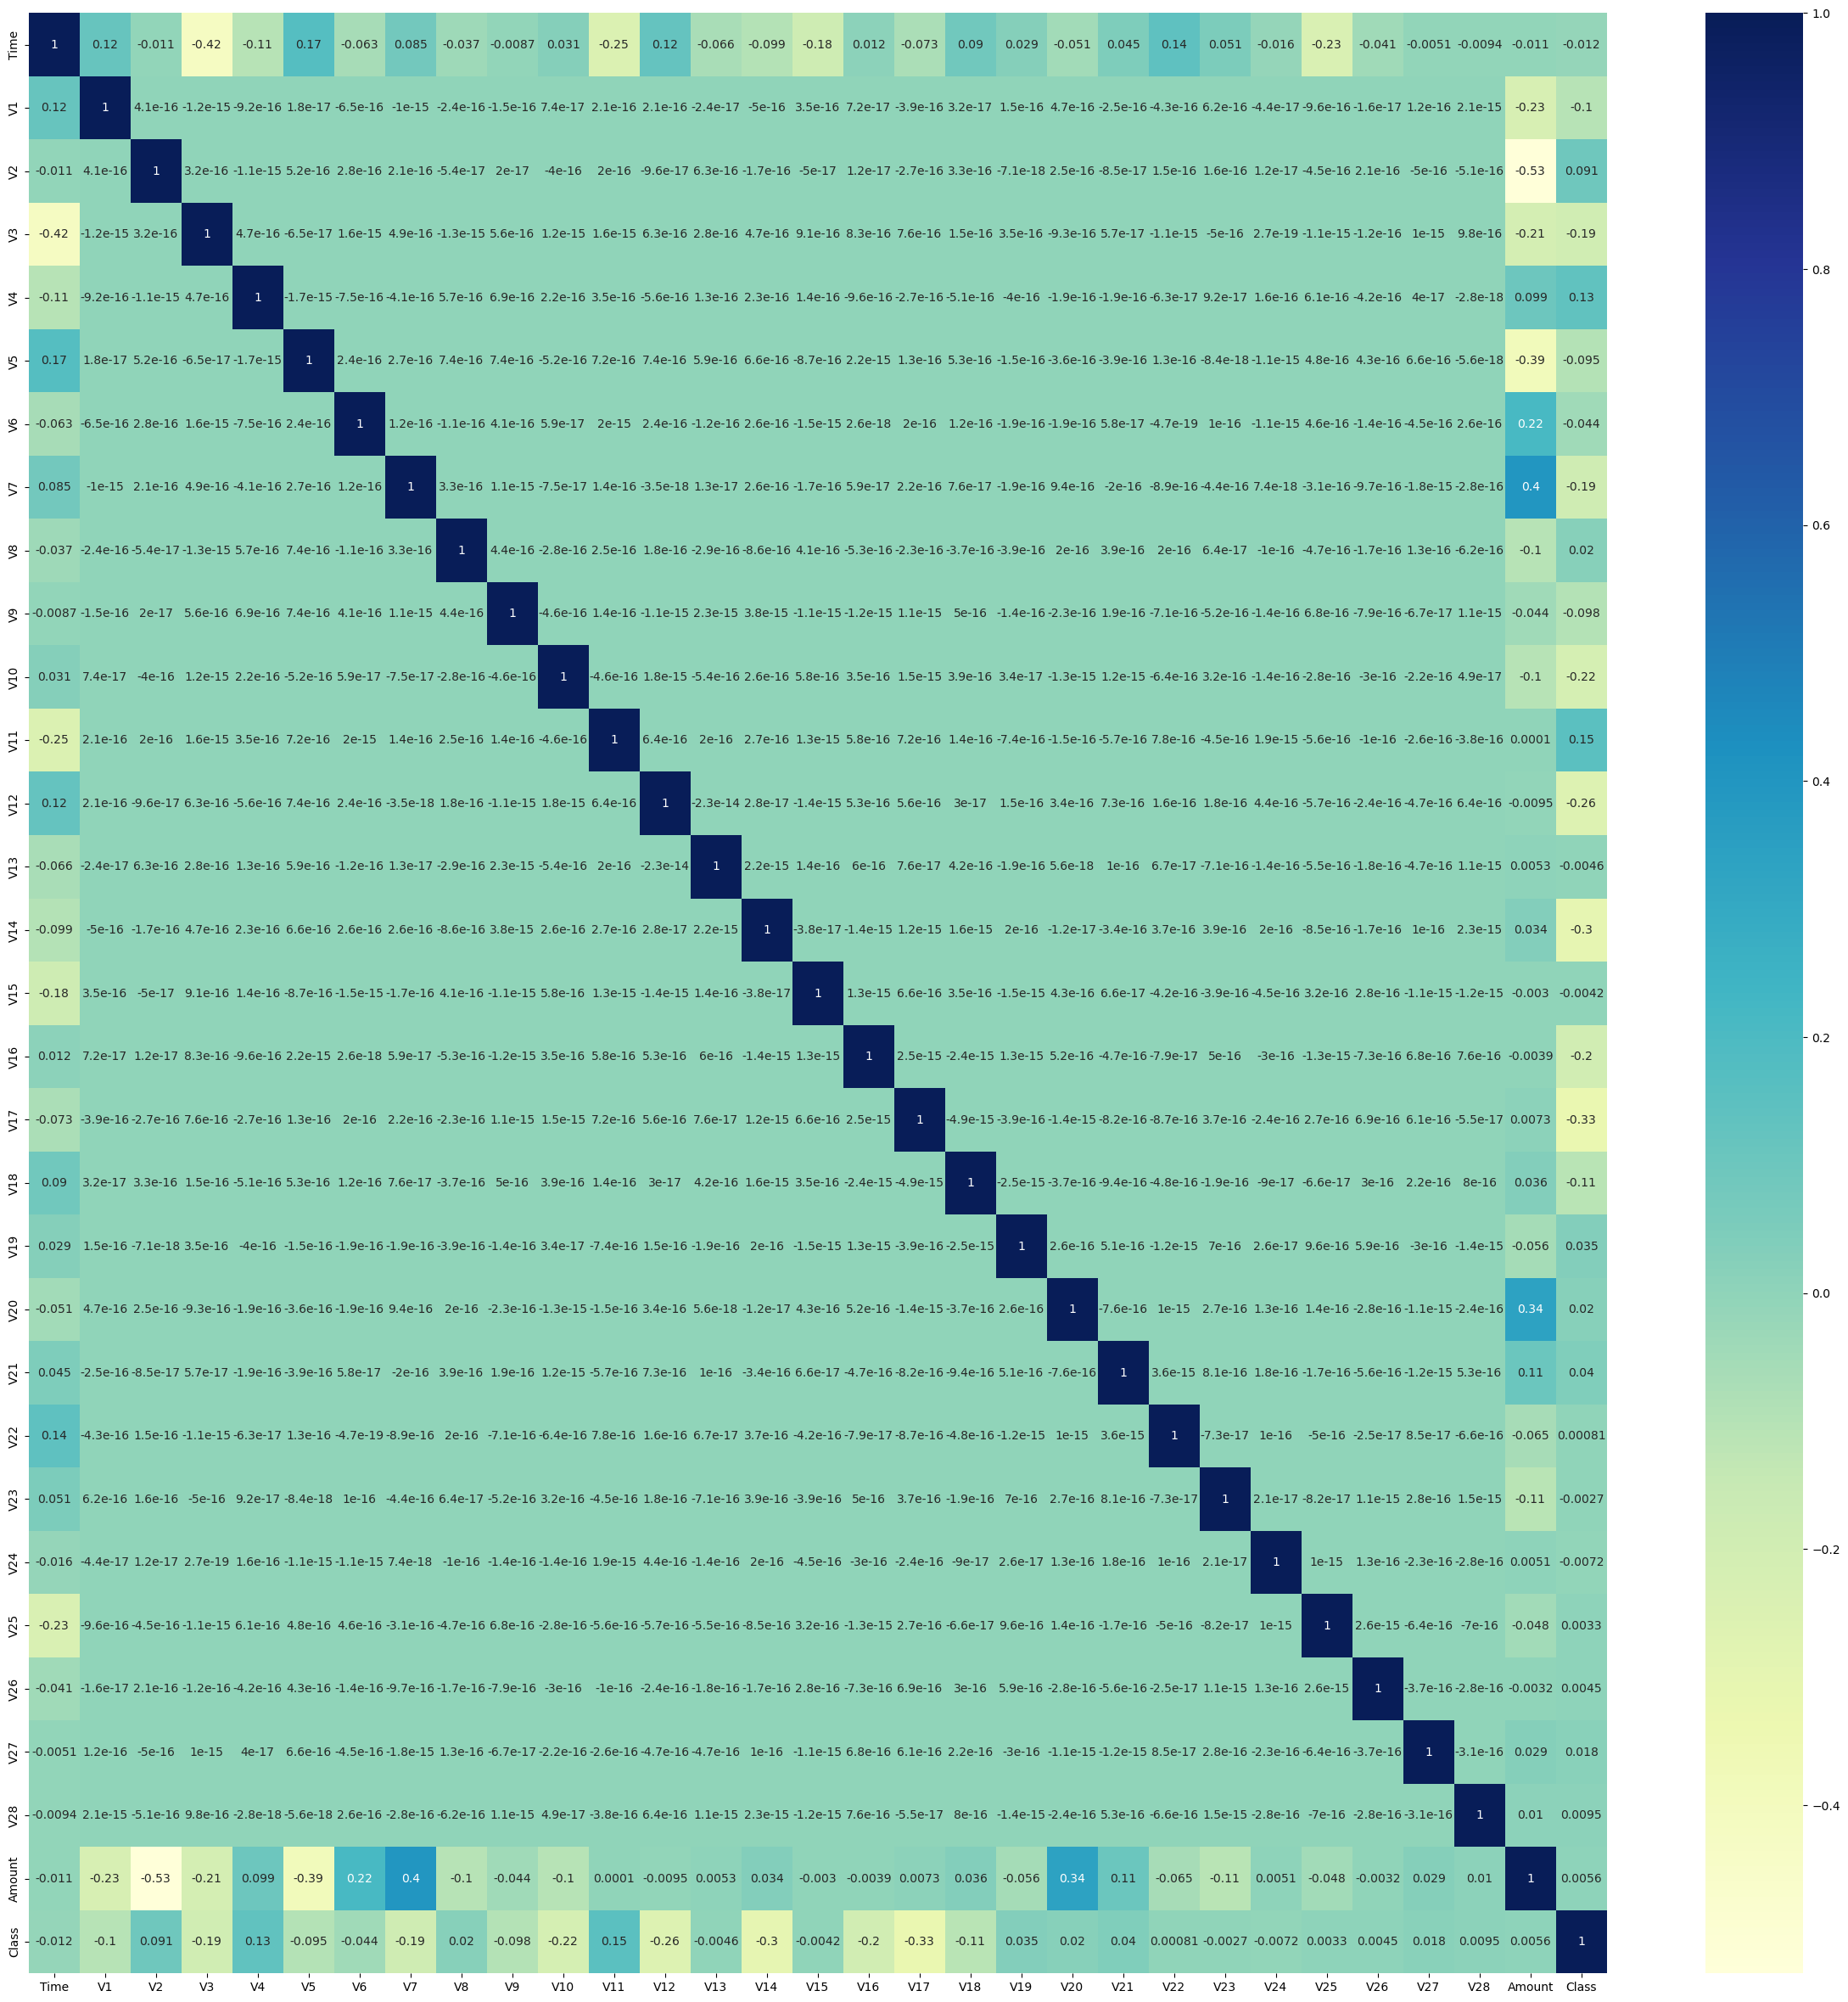

In [12]:
# Plotting correlations on a heatmap

# Setting the Figure size
plt.figure(figsize=(30,30))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Now we will observe the distribution of our classes using Plots

In [13]:
classes=df['Class'].value_counts()
non_fraud_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

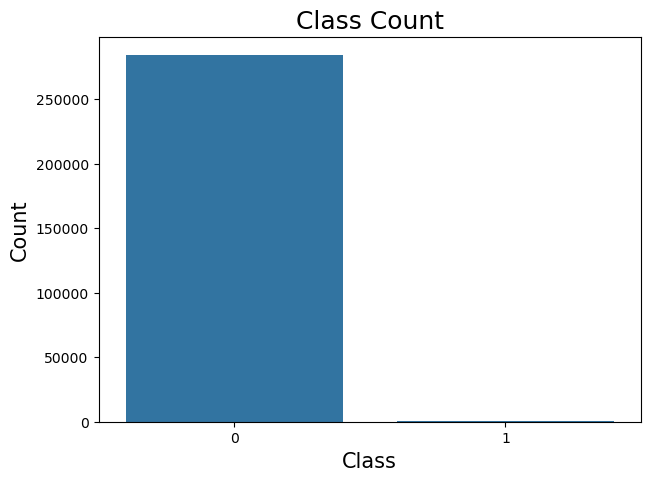

In [14]:
# Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions

counts = df['Class'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts.values)
plt.title("Class Count", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

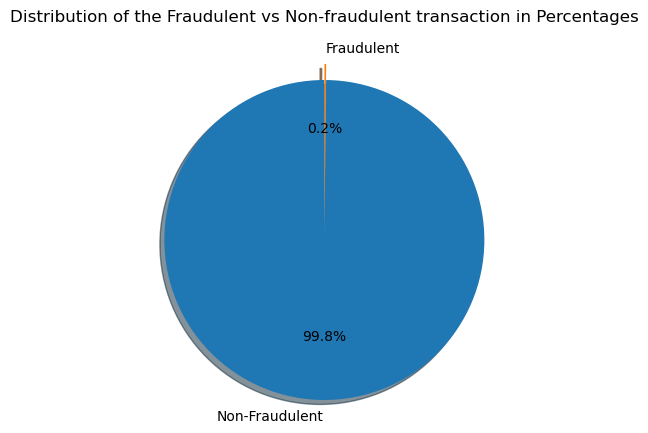

In [15]:
classes=df['Class'].value_counts()
non_fraud_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudulent', 'Fraudulent'
sizes = [non_fraud_share, fraud_share]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
plt.title('Distribution of the Fraudulent vs Non-fraudulent transaction in Percentages\n')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', df['Class'].value_counts()[1]/df['Class'].value_counts()[0])

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.0017304750013189597


### Actionable Insights:

1. **Imbalanced Dataset:** Out of a total of 284,807 credit card transactions, only 492 are classified as fraudulent.
   
2. **Significant Imbalance:** The distribution of fraudulent transactions (0.17%) is markedly lower compared to genuine transactions (99.83%).

3. **Impact on Model Performance:** This imbalance can lead models to achieve high accuracy by favoring predictions of the majority class (non-fraudulent transactions).

4. **Focus on Alternative Metrics:** To address this challenge, we will prioritize alternative evaluation metrics such as ROC-AUC, precision, and recall.

5. **Enhanced Assessment:** These metrics provide a more nuanced evaluation of the model's performance, especially in scenarios with imbalanced datasets, offering insights beyond traditional accuracy measurement.

In [17]:
# As time is given in relative fashion, we will need to use pd.to_timedelta(), which represents a duration, is the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
# Creating derived metrics Days, Hours and Mins
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

#### 📊<code style="background:#fff4e6;color:black">Bivariate Analysis: Creating a scatter plot to observe the distribution of classes with time</code>

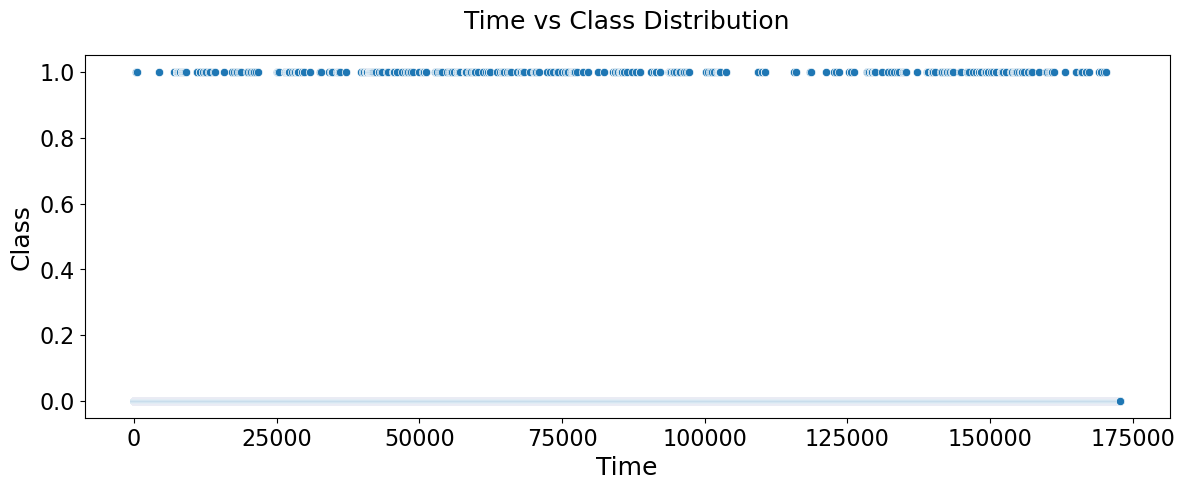

In [18]:
fig = plt.figure(figsize=(14, 16))
cmap = sns.color_palette('Set2')

# Plotting the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Time vs Class Distribution', size=18, y=1.05)
plt.show()

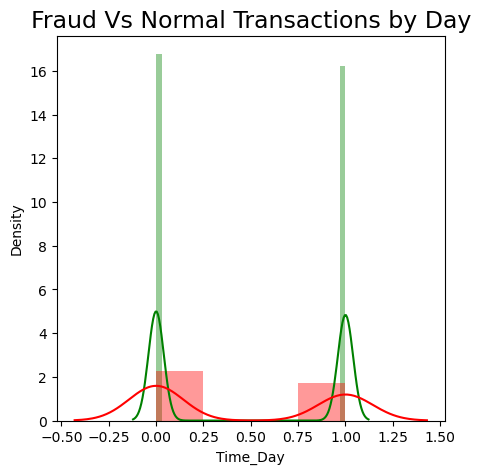

In [19]:
# The frauds vs normal transaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green') #normal
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red') #fraud
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

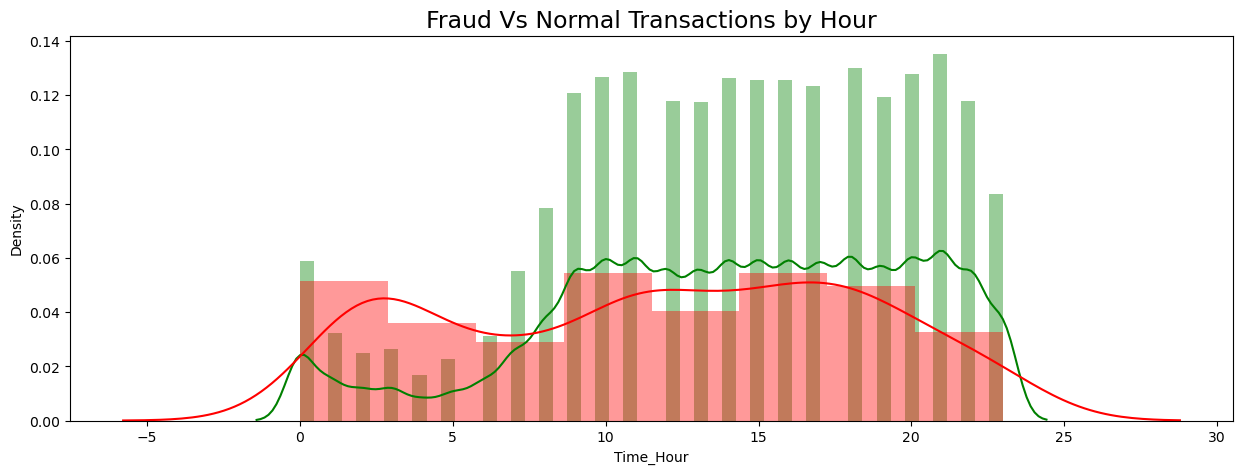

In [20]:
# The frauds Vs normal transaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green') #normal
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red') #fraud
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

**Observations**:
- **Temporal Patterns**: Both plots indicate that there are temporal patterns in transaction data. Understanding these patterns can help in developing more effective fraud detection models.
- **Challenge in Distinction**: The overlap in the distribution of non-fraudulent and fraudulent transactions suggests that time alone may not be a sufficient feature for distinguishing between the two classes. Additional features and more sophisticated models will likely be needed.
- **Focus on Peaks**: The peaks in fraudulent transactions can be particularly useful for targeted fraud detection. By focusing on these peak times, it may be possible to develop more efficient and effective fraud detection strategies.

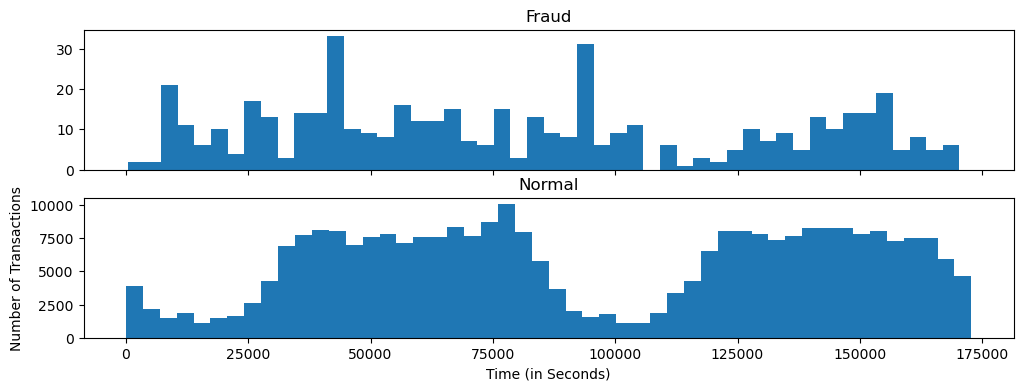

In [21]:
# Plotting histogram of feature "Time" for fraudulent and non-fraudulent transactions.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

**Observations:**
Fraudulent transactions are sparse and irregular over time, while non-fraudulent transactions show consistent activity.

In [22]:
# To clearly distinguish the data of frauds and non-fraud
df_Fraud = df[df['Class'] == 1]
df_Normal = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [23]:
#Regular Transaction Amount Statistics
print(df_Normal["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


#### 📊<code style="background:#fff4e6;color:black">Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount</code>

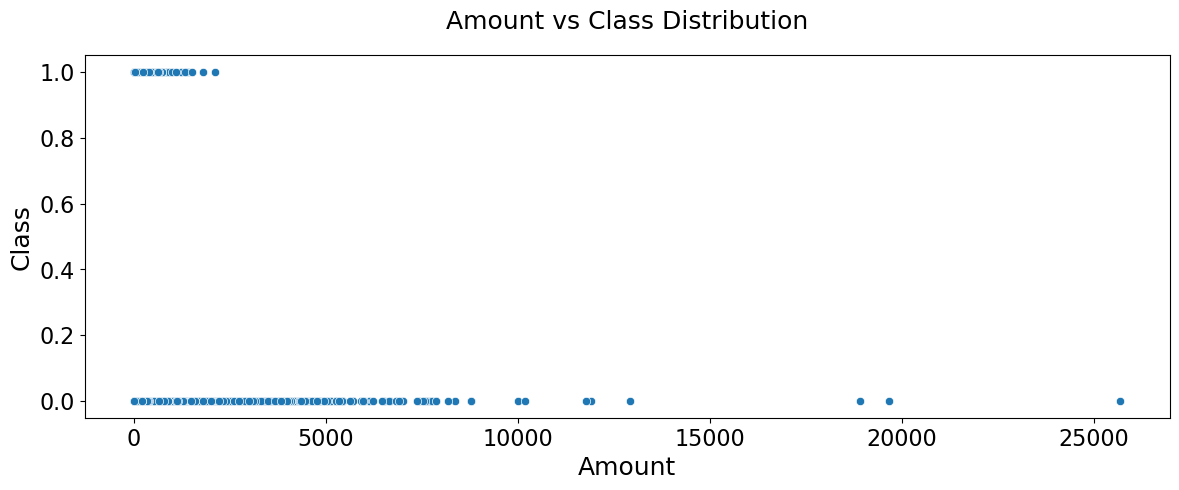

In [24]:
fig = plt.figure(figsize=(14, 16))
cmap = sns.color_palette('Set1')

# PLotting the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.title('Amount vs Class Distribution', size=18, y=1.05)
plt.show()

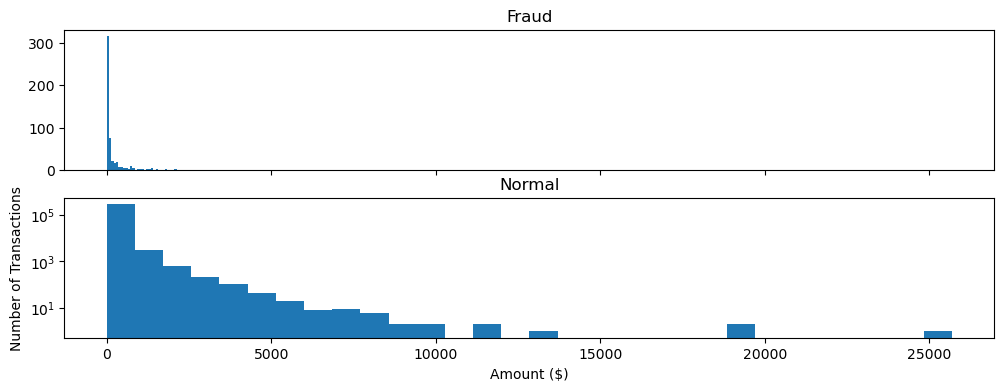

In [25]:
# Plotting histogram of feature "Amount" for fraudulent and non-fraudulent transactions.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

**Observations:**
Fraudulent transaction amounts are generally low, with a few high outliers, whereas non-fraudulent transactions have a broader and more evenly distributed range of amounts.

### <code style="background:lightcyan;color:black">2.3 Understanding more on the correlation in data</code>

In [26]:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# Converting series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# Correcting column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# Sorting correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

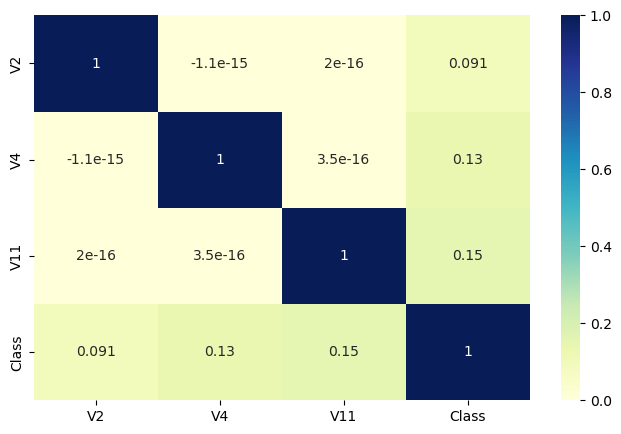

In [27]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, cmap="YlGnBu", annot=True)
plt.show()

#### Plotting the distribution of numerical attributes

In [28]:
# Plotting using a Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical features from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as it's not needed for transformation :
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))

ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

#### Dropping unnecessary columns

In [29]:
# As we have derived the Day/Hour/Minutes from the "Time" column, we will drop "Time"
df.drop('Time', axis = 1, inplace= True)
# Also day/minutes might not be very useful as this is not time series data, we will keep only the derived column "Time_Hour"
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

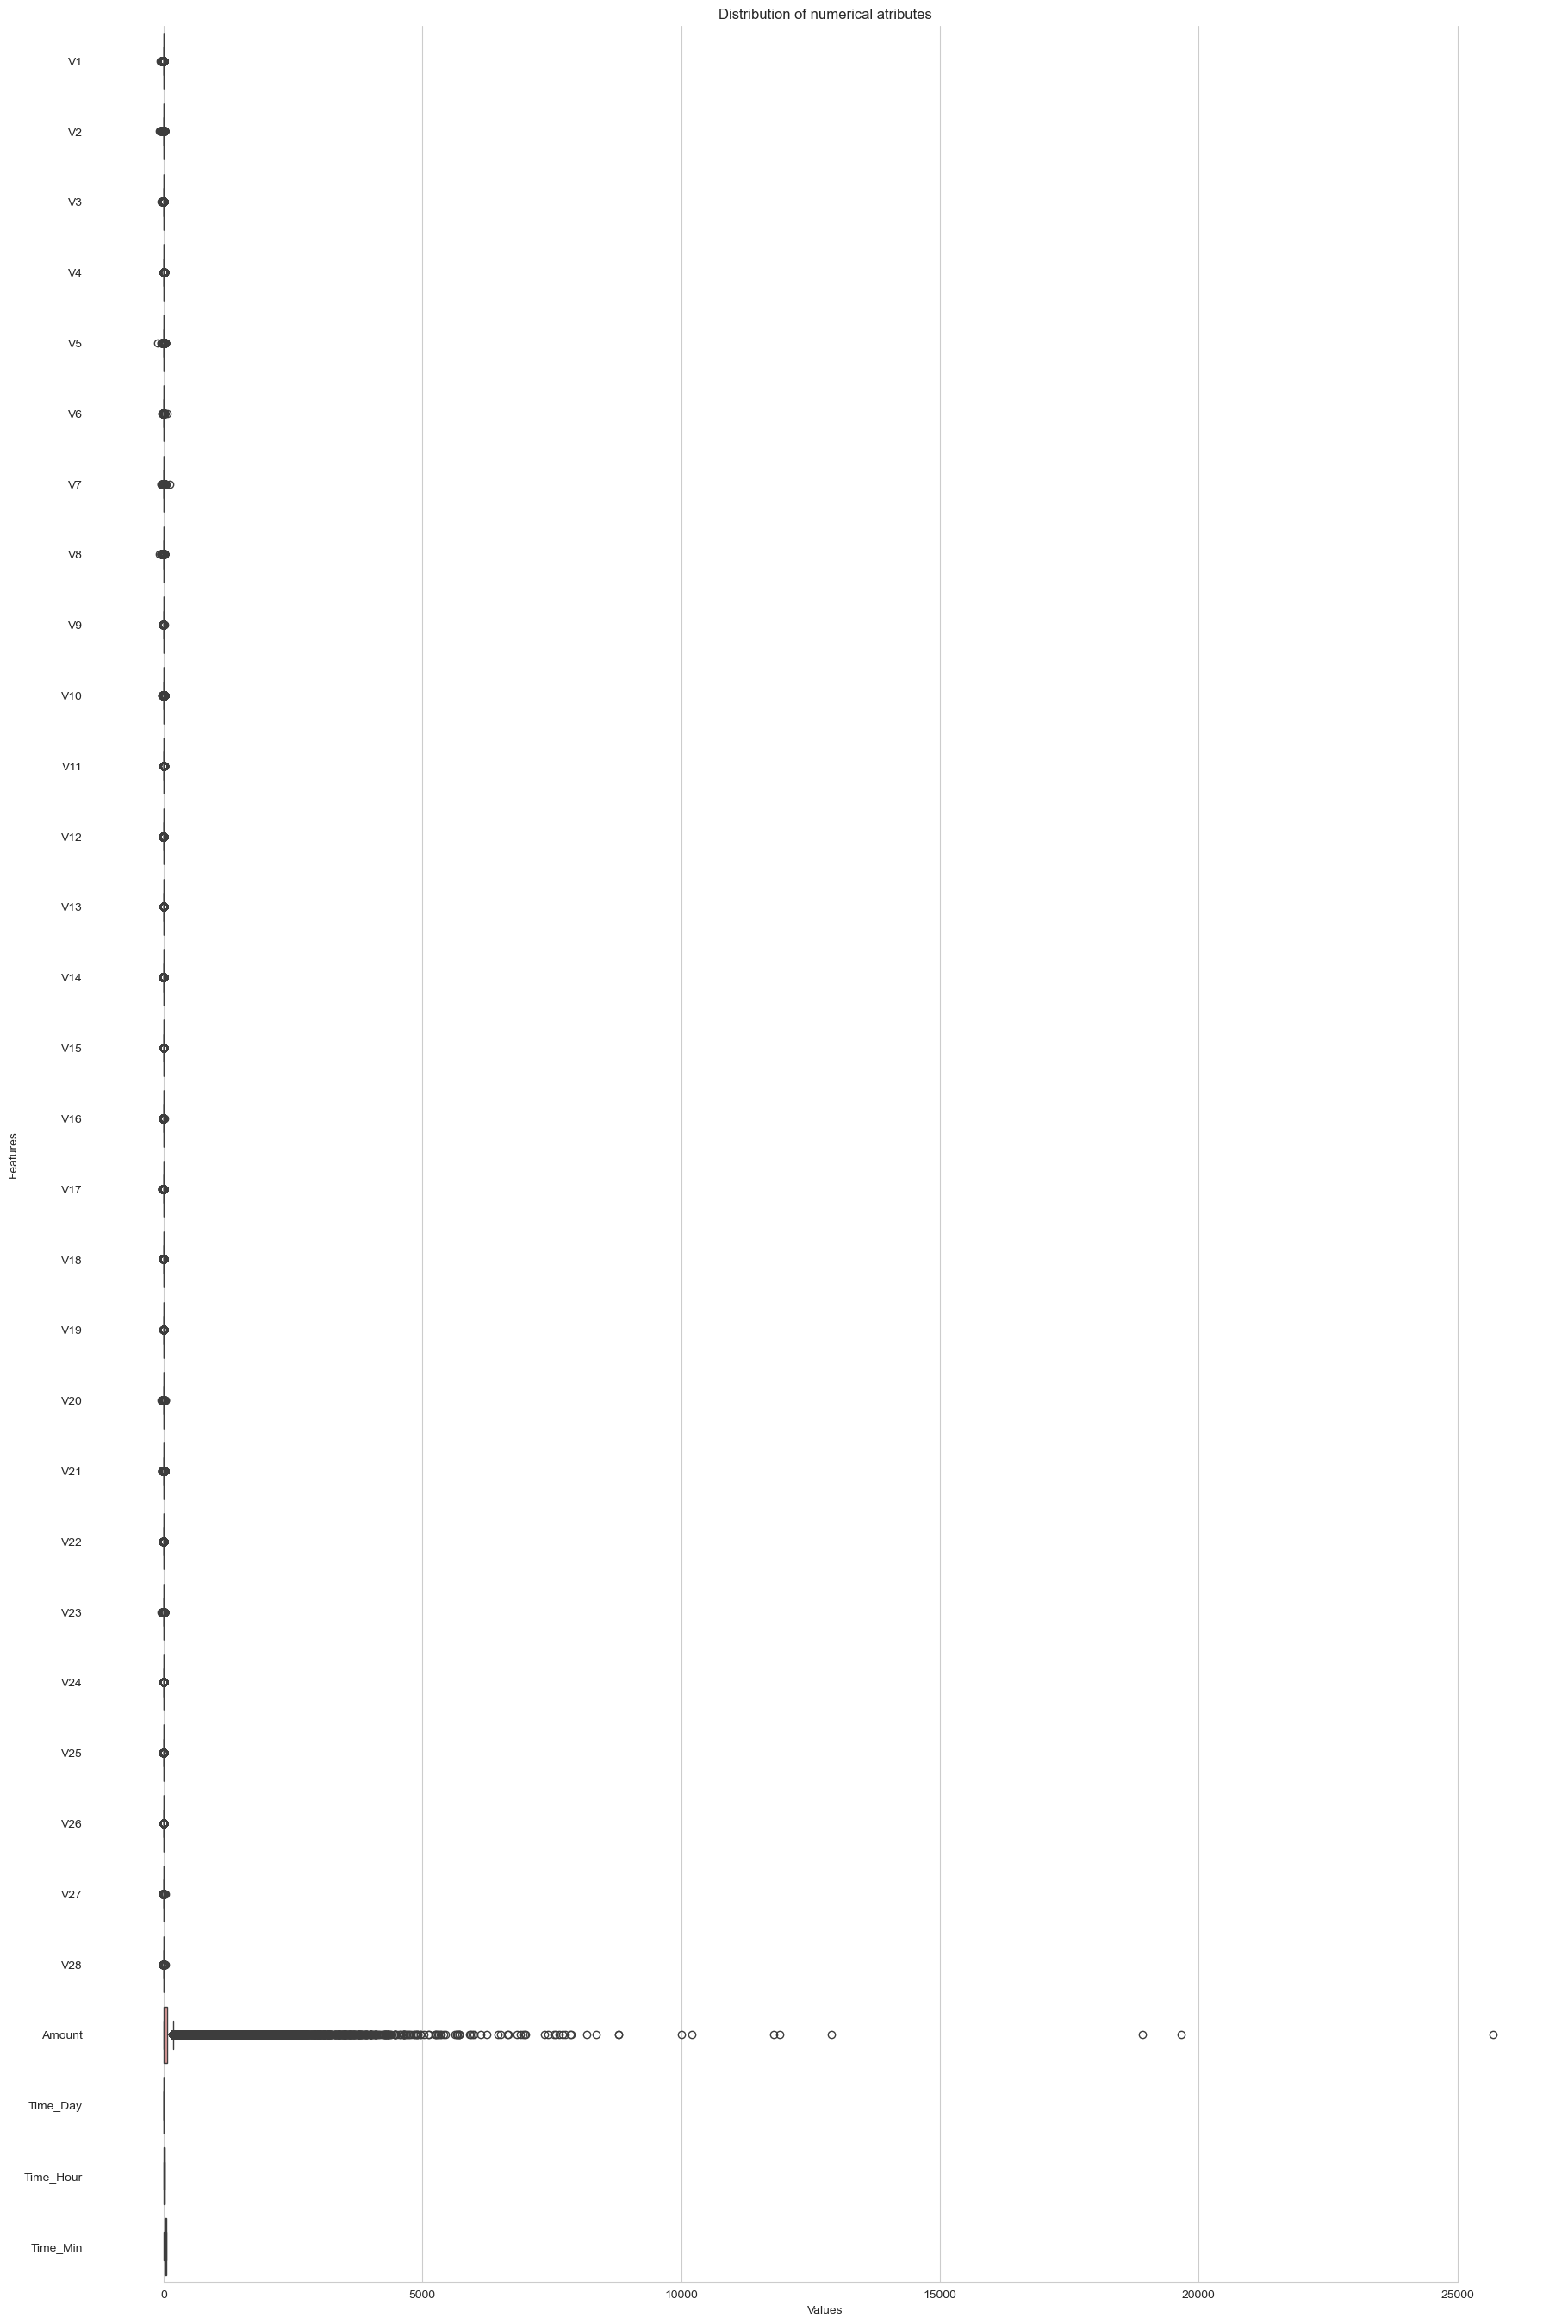

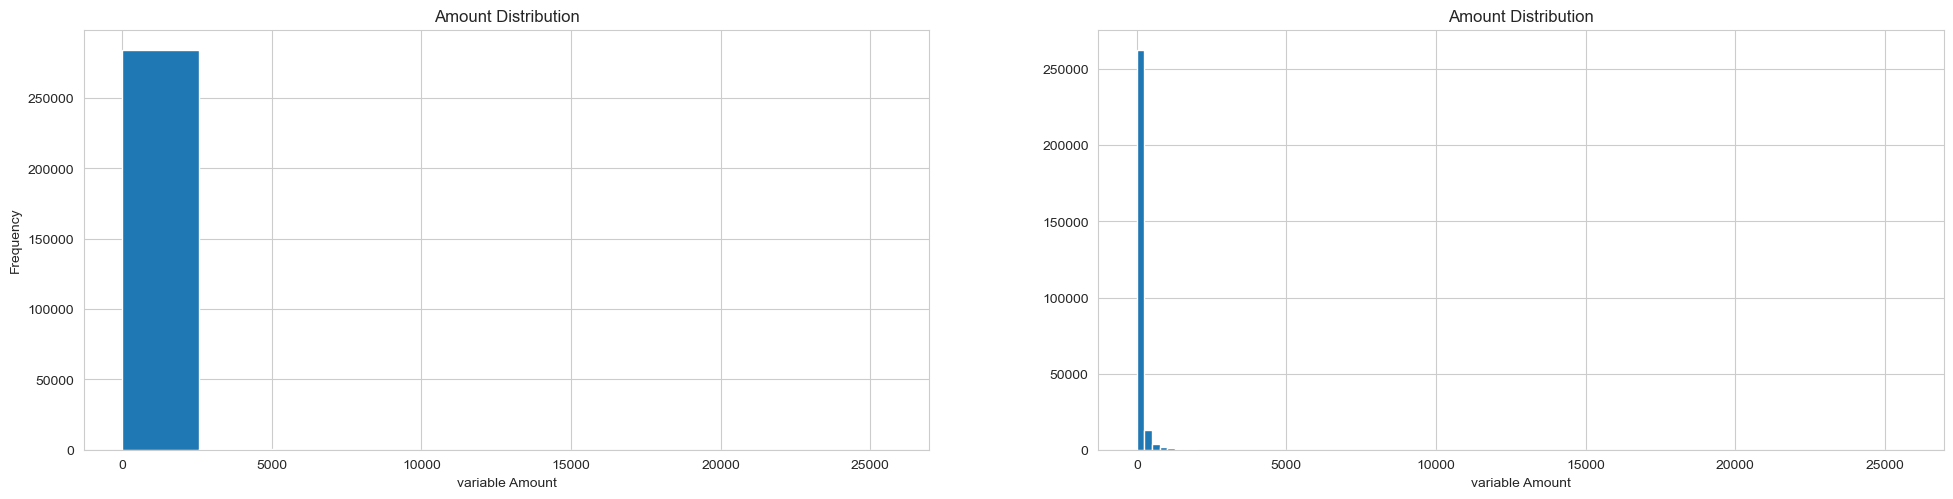

In [30]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()


### <code style="background:lightcyan;color:black">2.4 Splitting data into 'Test' and 'Train' set</code>

In [31]:
# Creating X and y dataset for independent and dependent data
y = df['Class']
X = df.drop(['Class'], axis=1)

In [32]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [33]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [34]:
# Checking the shapes of y_train, X_test, and X_train

# Check the shape of X_train
X_train_shape = X_train.shape
print(f"The shape of X_train is: {X_train_shape}")

# Check the shape of X_test
X_test_shape = X_test.shape
print(f"The shape of X_test is: {X_test_shape}")

# Check the shape of y_train
y_train_shape = y_train.shape
print(f"The shape of y_train is: {y_train_shape}")

The shape of X_train is: (227845, 30)
The shape of X_test is: (56962, 30)
The shape of y_train is: (227845,)


##### Preserving the X_test & y_test to evaluate on the test data once you build the model

In [35]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### <code style="background:lightcyan;color:black">2.5 Charting the distribution of a variable</code>

In [36]:
cols = list(X.columns.values)

In [37]:
print(cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_Hour']


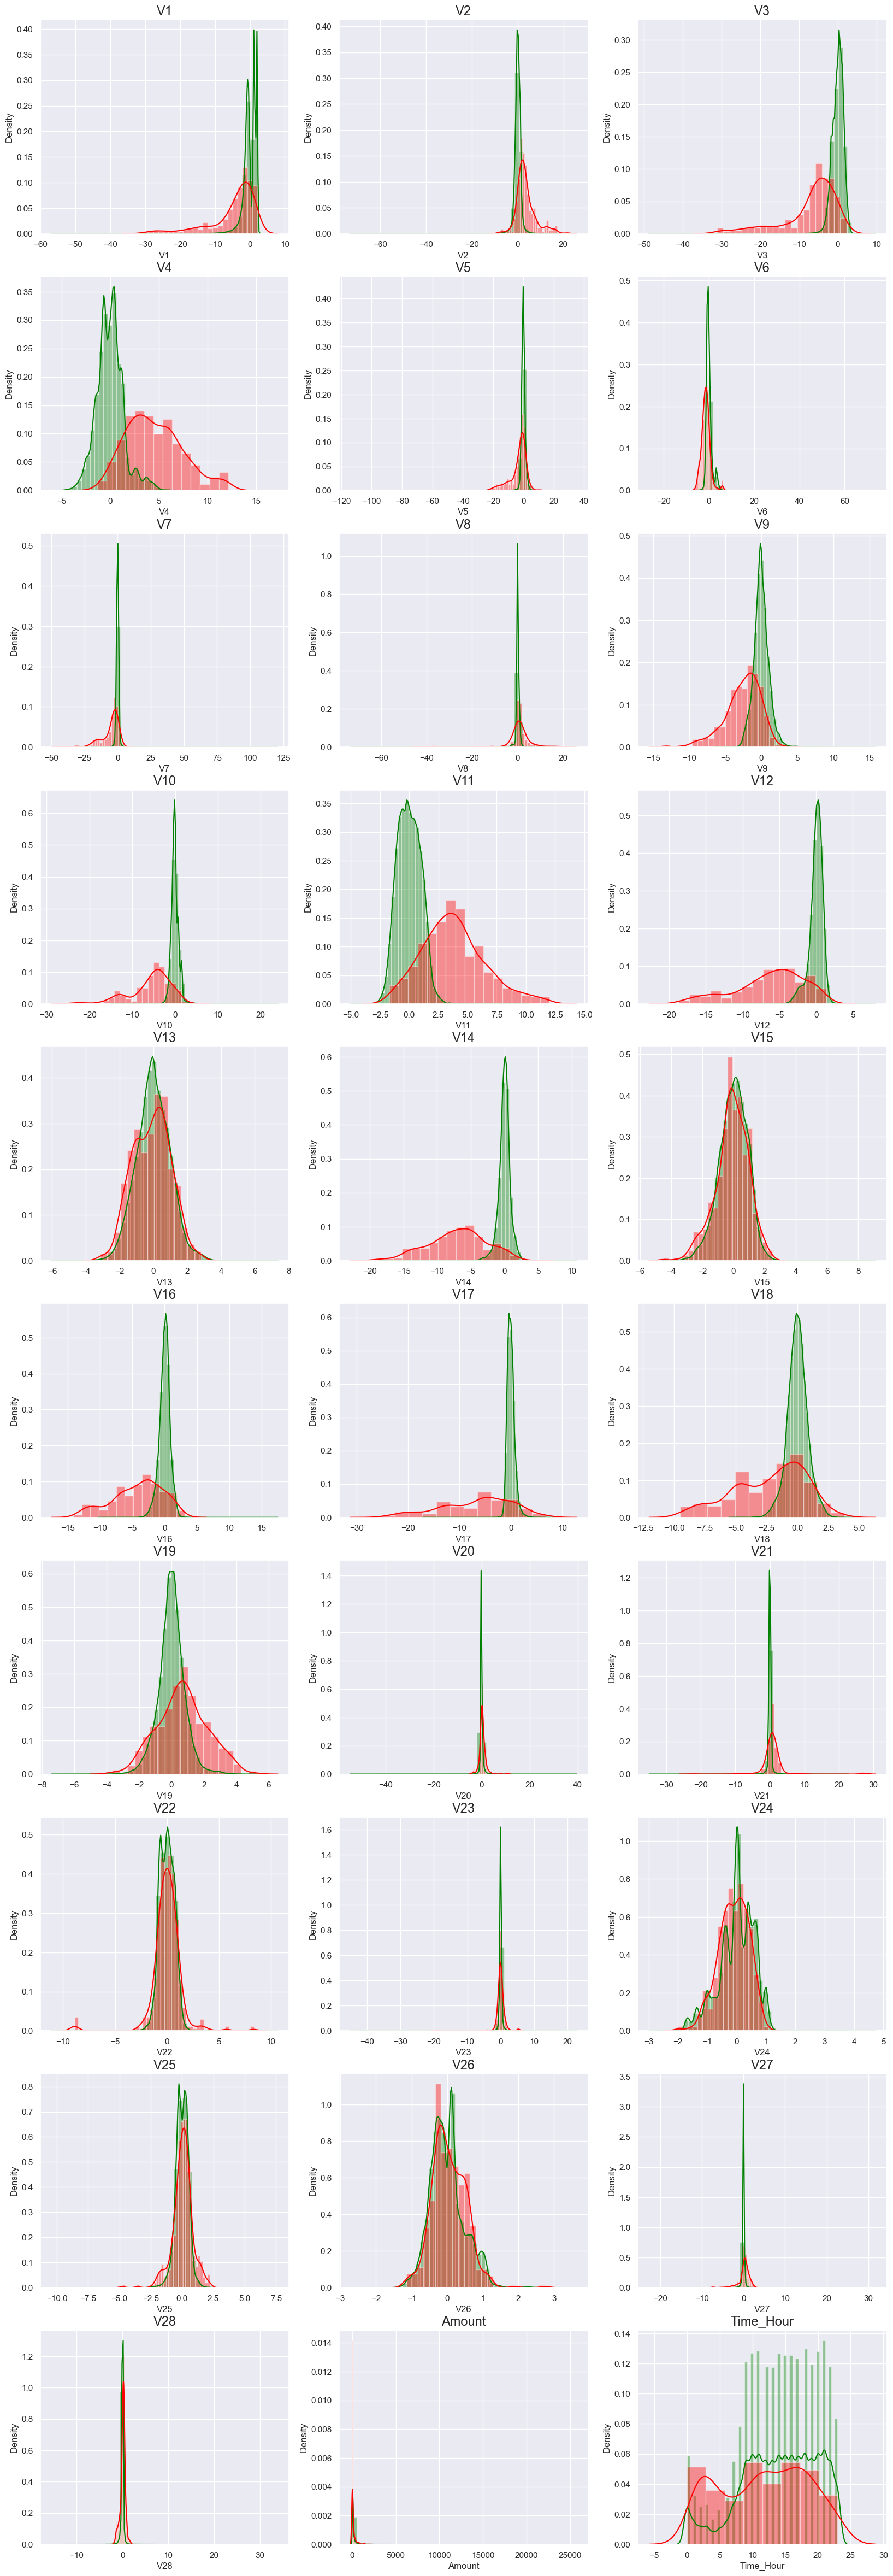

In [38]:
# Plotting the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

---

## <code style="background:lavender;color:black">Step 3: Handling Skewness in the Distribution</code>📄

- Using the **PowerTransformer** class from the **preprocessing module in sklearn** to transform the distribution to be more Gaussian.

In [39]:
# Applying: preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fitting the PT on training data
X_train_pt = pt.transform(X_train)    ## Then applying on all data
X_test_pt = pt.transform(X_test)


In [40]:
# Creating the Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=cols)

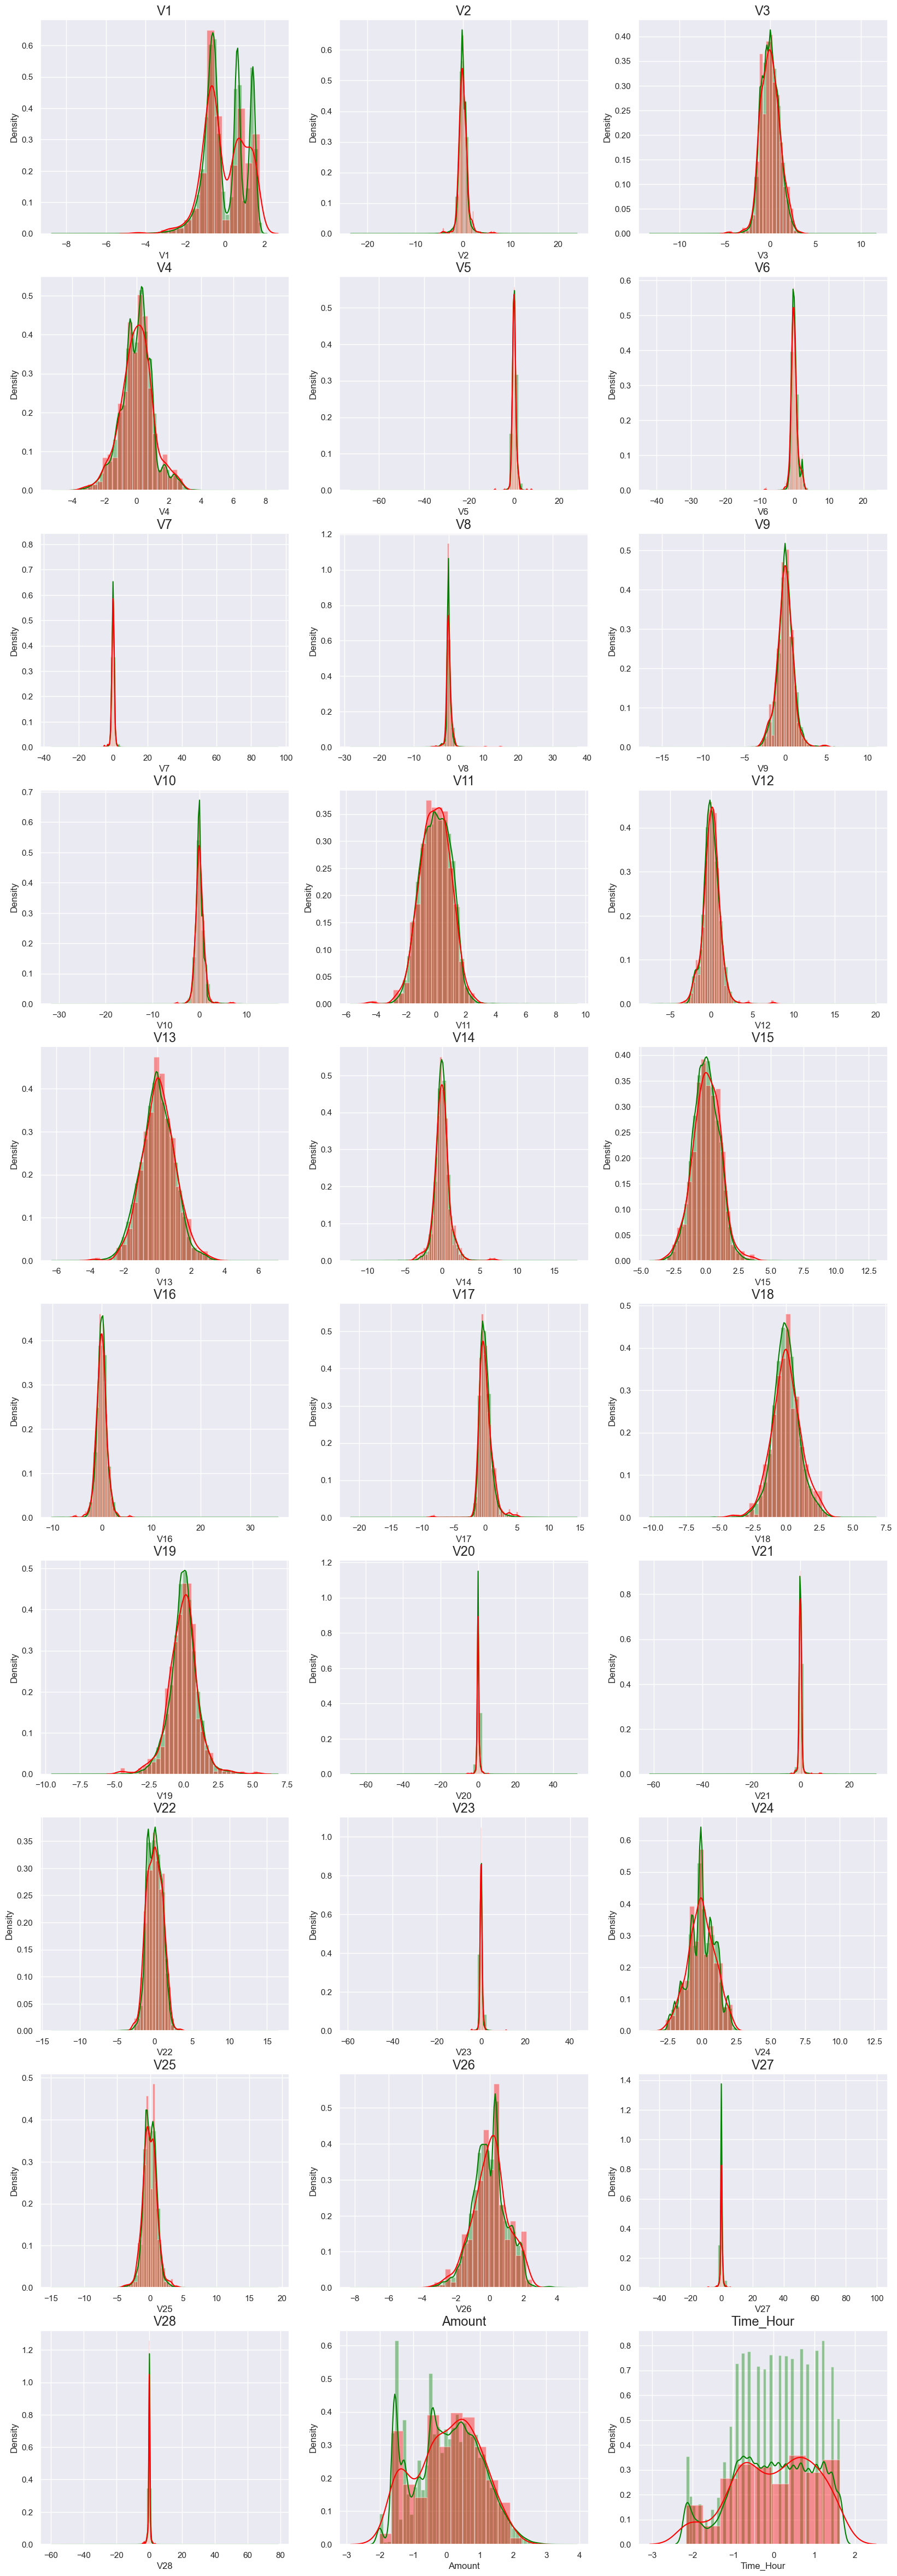

In [41]:
# Plotting the histogram of a variable from the train dataset again to see the result

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

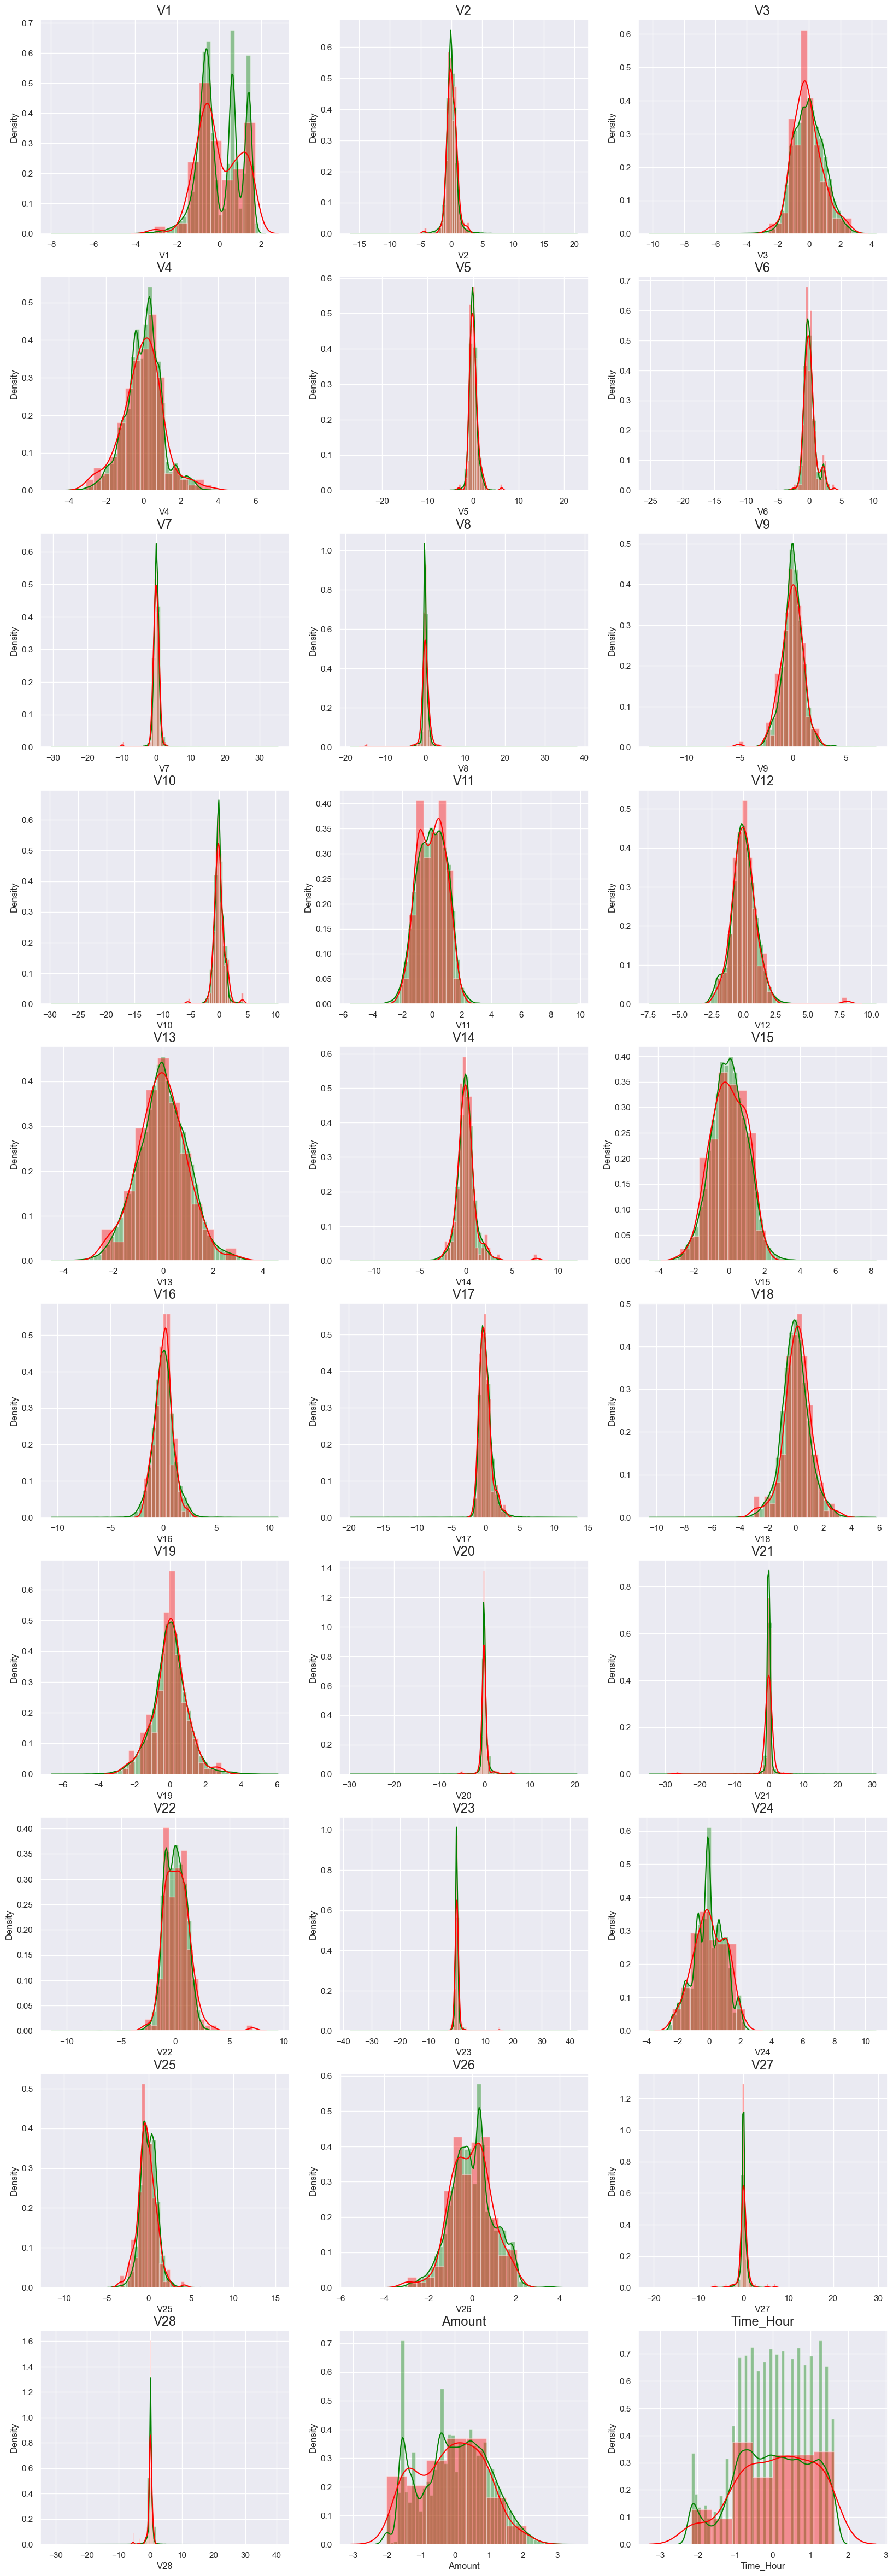

In [42]:
# Plotting the histogram of a variable from the test dataset again to see the result
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

---

## <code style="background:lavender;color:black">Step 4: Model Engineering (Handling Class Imbalance + Model Buidling + Model Evaluation + Hyperparameter Tuning)</code>⚙️💻

### <code style="background:lightcyan;color:black">4.1 Building Model Functions for Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, and XGBoost</code> 

In [43]:
# Creating a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value','threshold'])

In [44]:
# A function to plot confusion matrix

def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

#### <code style="background:#fff4e6;color:black">4.1.1 Logistic Regression Model Function</code>

In [45]:
def BuildAndRunLogisticModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = np.logspace(-4, 4, 20)
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=1000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=1e-3
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=1000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=1e-1
      )
  
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)


  # Finding predicted values
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)


  # Finding predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]

  # Accuracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0])], ignore_index= True)
  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
  return df_Results

#### <code style="background:#fff4e6;color:black">4.1.2 KNN Model Function</code>

In [46]:
def BuildAndRunKNNModel(df_Results,DataImbalance, X_train,y_train, X_test, y_test ):
  # Evaluating KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  # Creating KNN model and fitting the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)

  # For finding Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculating roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
  return df_Results

#### <code style="background:#fff4e6;color:black">4.1.3 SVM Model Function</code>

In [1]:
def BuildAndRunSVMModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  # Evaluating SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Running the classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculating roc auc
  roc_value = roc_auc_score(y_test, svm_probs)

  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
  return df_Results

#### <code style="background:#fff4e6;color:black">4.1.4 Decision Tree Model Function</code>

In [48]:
def BuildAndRunTreeModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  # Evaluating Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
      dt = DecisionTreeClassifier(criterion = c, random_state=42)
      dt.fit(X_train, y_train)
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test)
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()

      df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
  return df_Results

#### <code style="background:#fff4e6;color:black">4.1.5 Random Forest Model Function</code>

In [49]:
def BuildAndRunRandomForestModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  # Evaluating Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Creating the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fitting on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculating roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
  return df_Results

#### <code style="background:#fff4e6;color:black">4.1.6 XGBoost Model Function</code>

In [50]:
def BuildAndRunXGBoostModel(df_Results, DataImbalance,X_train,y_train, X_test, y_test ):
  # Evaluating XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # Fitting model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculating roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0])],ignore_index= True)
  return df_Results

---

### <code style="background:lightcyan;color:black">4.2 Building Models</code>

#### Developing and evaluating various models on the `imbalanced dataset` to compare their performance

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9838494078710429
Max auc_roc for l1: 0.9831457713745216
Parameters for l2 regularisations
[[-0.11417091 -0.08252351 -0.28914615  0.5584786   0.02187157  0.02713796
  -0.0835582  -0.18727266 -0.16083335 -0.17891694  0.16833511 -0.4977388
  -0.09350988 -0.63386628 -0.09225667 -0.15053038 -0.06329841  0.03910211
  -0.03263048 -0.03344684  0.08462918  0.095628   -0.04066663 -0.03341866
   0.00736368  0.00554352 -0.06549465 -0.03108793  0.02896211  0.08840478]]
[-7.80659093]
{1: array([[0.96847358, 0.98868448, 0.99188609, 0.99345637, 0.99345637,
        0.99469207, 0.99469207, 0.99469207, 0.99469207, 0.99469207,
        0.99469207, 0.99469207, 0.99469207, 0.99469207, 0.99469207,
        0.99469207, 0.99469207, 0.99469207, 0.99469207, 0.99469207],
       [0.96559686, 0.97591185, 0.98030339, 0.98003061, 0.98003061,
        0.97671208, 0.97671208, 0.97671208, 0.97671208, 0.97671208,
        0.97671208, 0.97671208, 0.976712

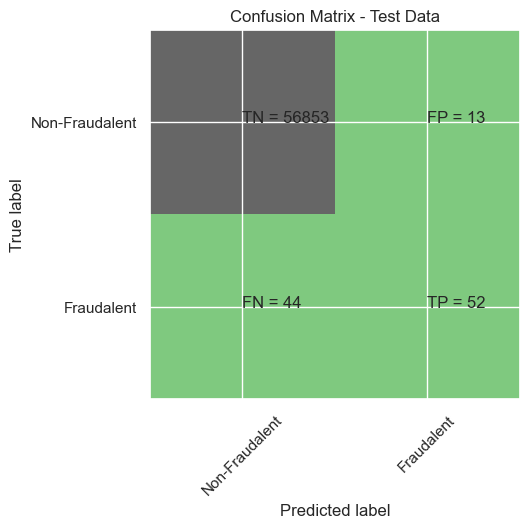

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.80      0.54      0.65        96

    accuracy                           1.00     56962
   macro avg       0.90      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9989817773252344
Confusion Matrix


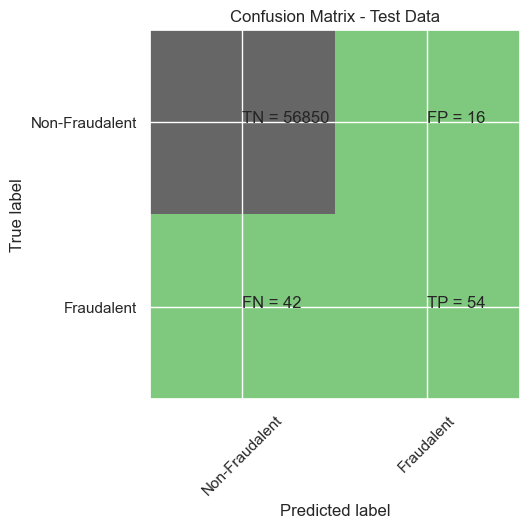

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9685404430298127
l2 threshold: 0.0015601685060372377
ROC for the test dataset 96.9%


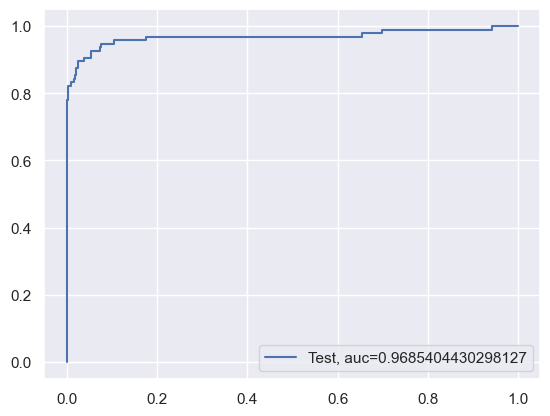

l1 roc_value: 0.9656273446933727
l1 threshold: 0.0013294493622448568
ROC for the test dataset 96.6%


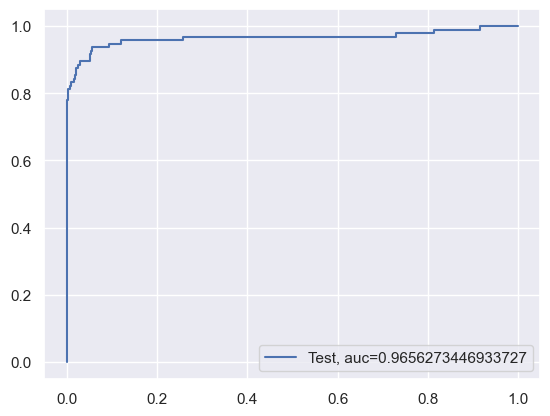

Time Taken by Model: --- 279.94999718666077 seconds ---
--------------------------------------------------------------------------------
KNN Model


  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


model score
0.9992977774656788
Confusion Matrix


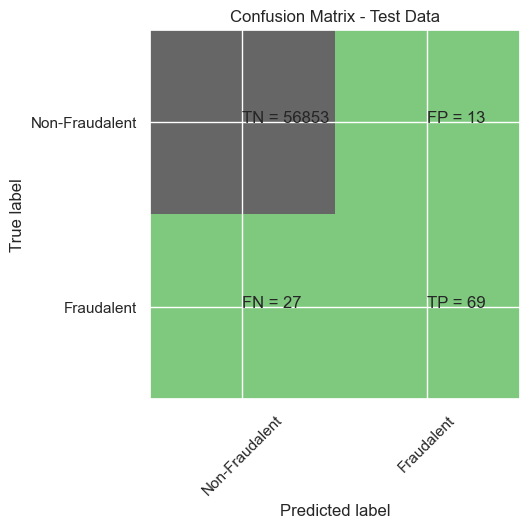

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


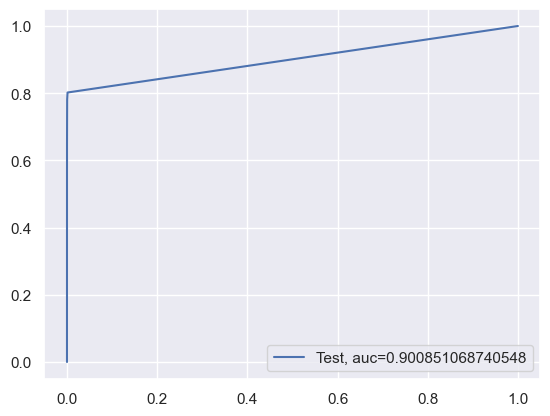

Time Taken by Model: --- 44.42007064819336 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


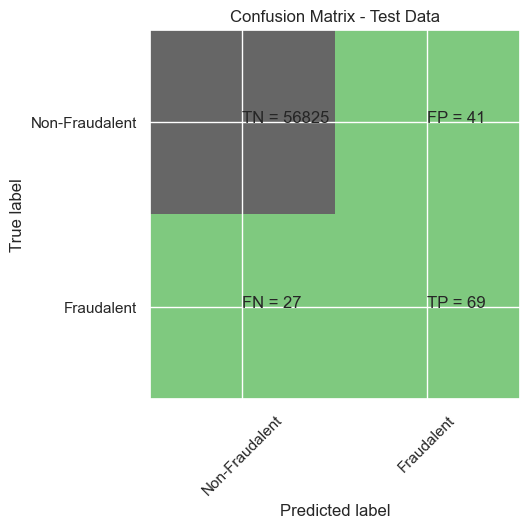

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


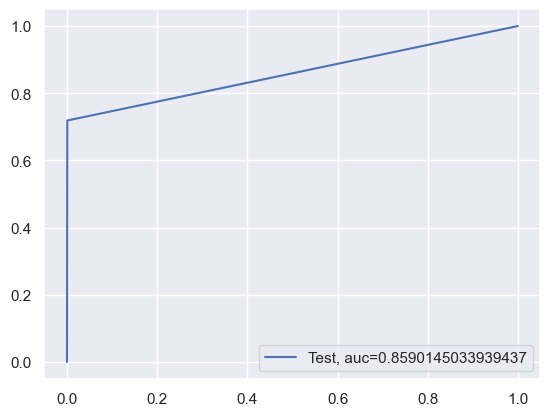

entropy score: 0.9990519995786665
Confusion Matrix


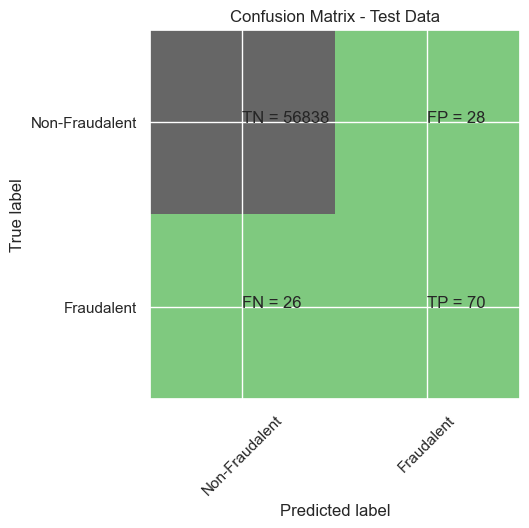

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


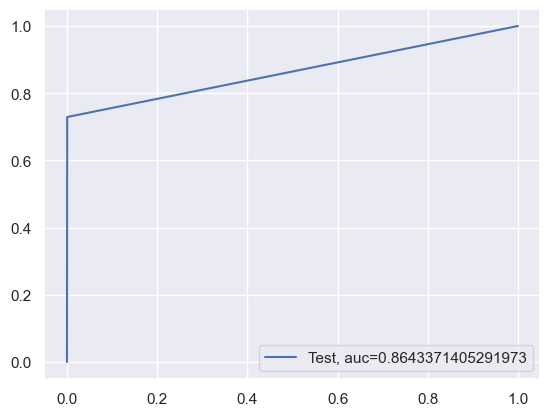

Time Taken by Model: --- 59.87746715545654 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


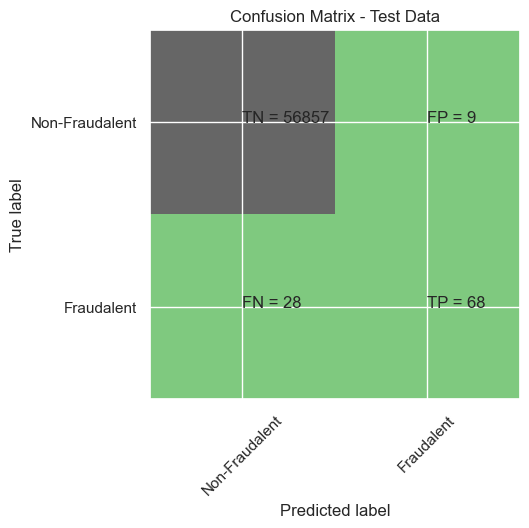

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


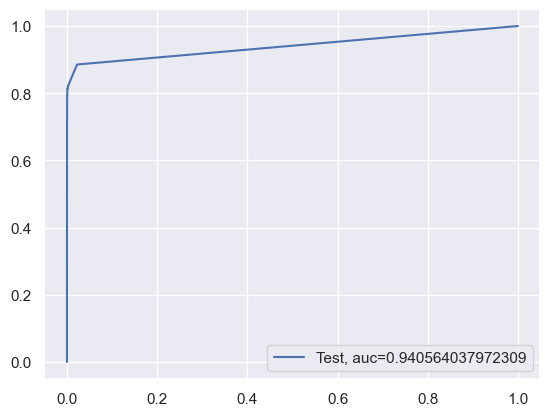

Time Taken by Model: --- 396.9725351333618 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9992977774656788
Confusion Matrix


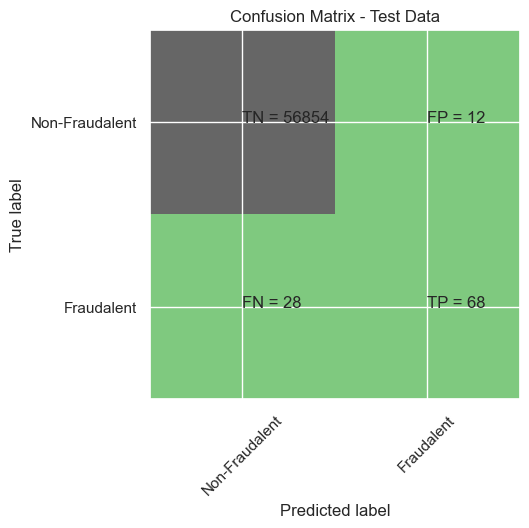

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.85      0.71      0.77        96

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9277588981113495
XGBoost threshold: 2.799136927933432e-05
ROC for the test dataset 92.8%


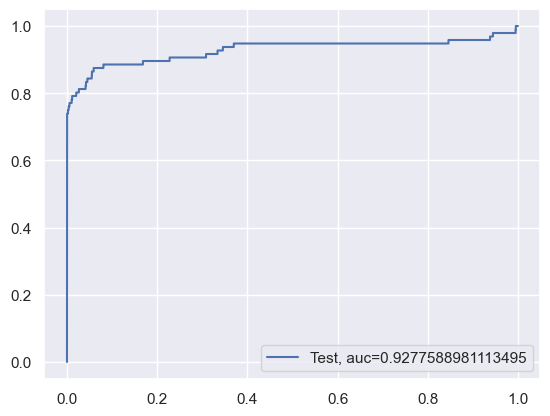

Time Taken by Model: --- 1.7551472187042236 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


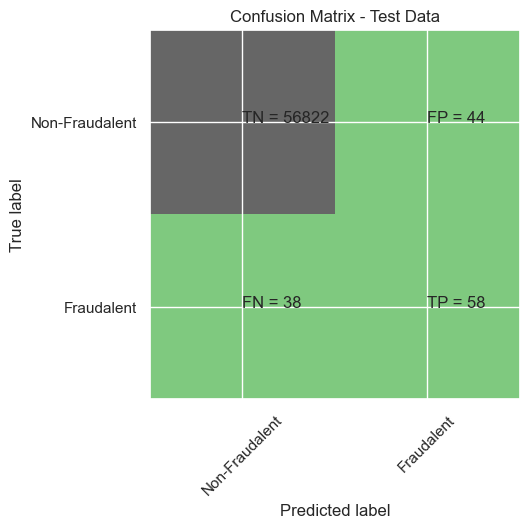

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913403146578507
SVM threshold: 0.0009042813537725421
ROC for the test dataset 89.1%


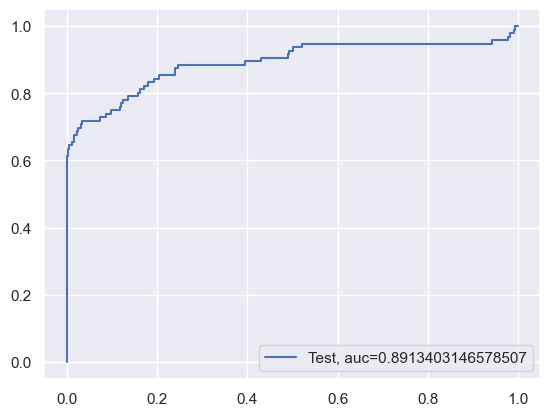

Time Taken by Model: --- 112.54539179801941 seconds ---


In [51]:
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = BuildAndRunSVMModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [52]:
df_Results.head()

Data_Imbalance_Handling                                       Model  \
0       Power Transformer  Logistic Regression with L2 Regularisation   
1       Power Transformer  Logistic Regression with L1 Regularisation   
2       Power Transformer                                         KNN   
3       Power Transformer               Tree Model with gini criteria   
4       Power Transformer            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold  
0  0.998999   0.968540   0.001560  
1  0.998982   0.965627   0.001329  
2  0.999298   0.900851   0.200000  
3  0.998806   0.859015   1.000000  
4  0.999052   0.864337   1.000000

---

### <code style="background:lightcyan;color:black">4.3 Utilize RepeatedKFold for enhanced cross-validation</code>

In [53]:
# Let's perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1      4      9 ... 284785 284788 284795]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      7     11 ... 284800 284802 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      6     17 ... 284793 284796 284801]
TRAIN: [     0      1      2 ... 284801 284802 284804] TEST: [    10     15     22 ... 284803 284805 284806]
TRAIN: [     1      2      4 ... 284804 284805 284806] TEST: [     0      3      8 ... 284781 284794 284797]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    12     27     39 ... 284774 284785 284787]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     14     15 ... 284786 284789 284798]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5     13     17 ... 284795 284799 284802]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     9     10     11 ... 284796 284801 284804]
TRAIN: [     1     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9792157468263571
Max auc_roc for l1: 0.9709763554885111
Parameters for l2 regularisations
[[ 8.35575355e-03  5.06362440e-02 -7.52090424e-02  2.96709398e-01
   9.55564406e-02 -5.25243493e-02 -1.90584502e-02 -1.35904478e-01
  -9.51612504e-02 -2.09799287e-01  1.39645095e-01 -2.10521758e-01
  -6.24439179e-02 -4.20384177e-01 -1.68724710e-02 -1.09116298e-01
  -7.21711289e-02 -7.97498812e-03  9.74380777e-03 -3.94191633e-02
   3.13527678e-02  5.76313645e-02 -1.94217538e-02 -9.57463514e-03
   2.57680959e-03  8.54734254e-03 -8.71696415e-03 -3.20335022e-03
   4.06322347e-04  2.30196966e-02]]
[-7.93359073]
{1: array([[0.98480775, 0.99228103, 0.98945596, 0.98724467, 0.98724467,
        0.98724467, 0.98444446, 0.98444446, 0.98444446, 0.98444446,
        0.98444446, 0.98444446, 0.98444446, 0.98444446, 0.98444446,
        0.98444446, 0.98444446, 0.98444446, 0.98444446, 0.98444446],
       [0.98466771, 0.98521068, 0.99032428, 0.988

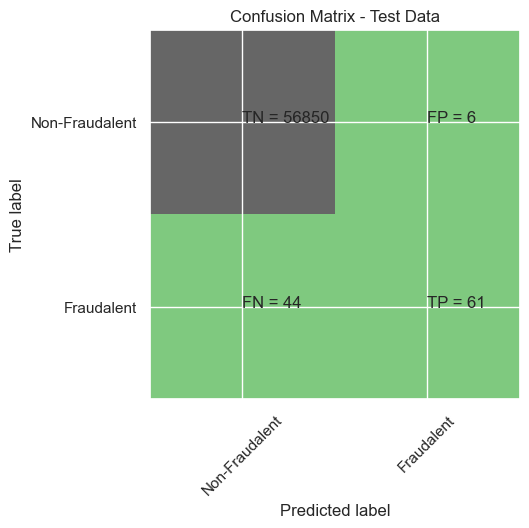

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.91      0.58      0.71       105

    accuracy                           1.00     56961
   macro avg       0.95      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991748740366215
Confusion Matrix


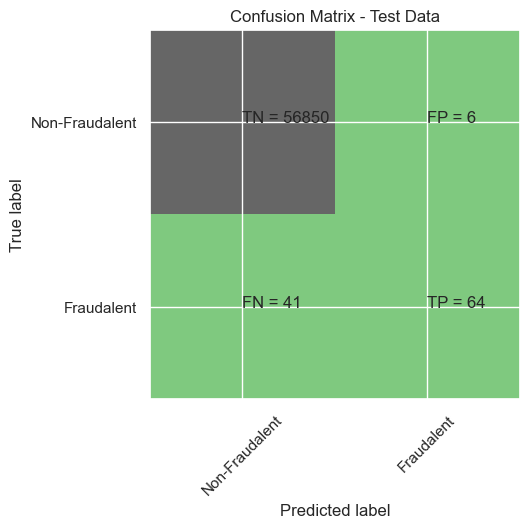

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.91      0.61      0.73       105

    accuracy                           1.00     56961
   macro avg       0.96      0.80      0.87     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9925660147272641
l2 threshold: 0.0020318949849917273
ROC for the test dataset 99.3%


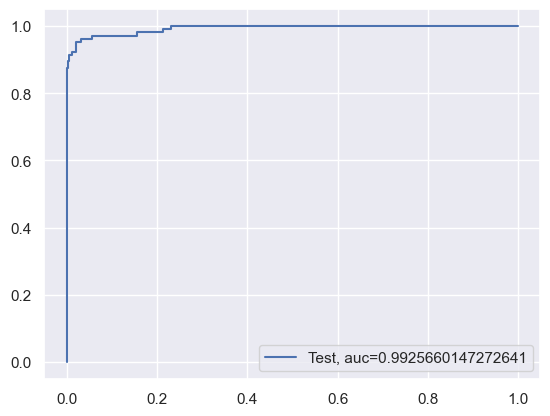

l1 roc_value: 0.9831788913680009
l1 threshold: 0.0033346782019745736
ROC for the test dataset 98.3%


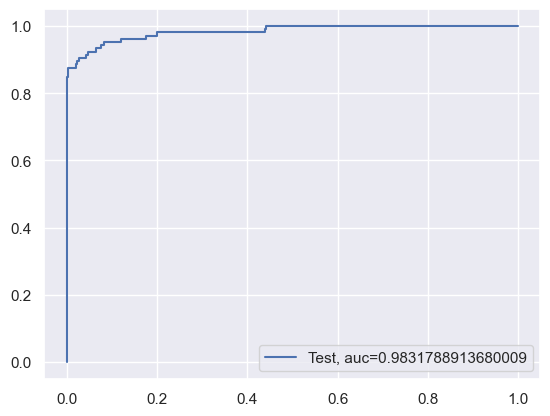

Time Taken by Model: --- 318.25272274017334 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992099857797441
Confusion Matrix


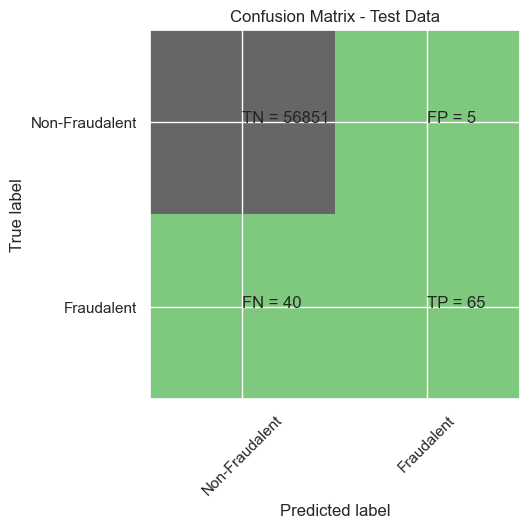

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.93      0.62      0.74       105

    accuracy                           1.00     56961
   macro avg       0.96      0.81      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8950136351149436
KNN threshold: 0.2
ROC for the test dataset 89.5%


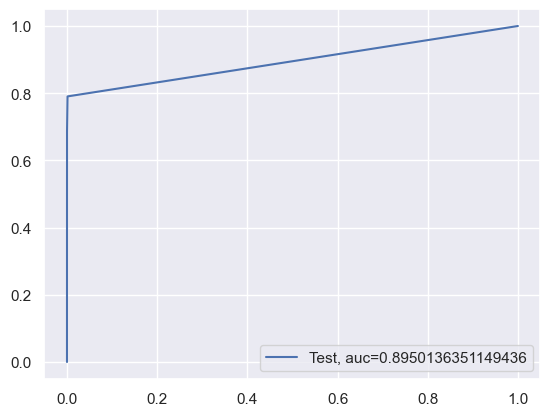

Time Taken by Model: --- 42.07087063789368 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992450975228665
Confusion Matrix


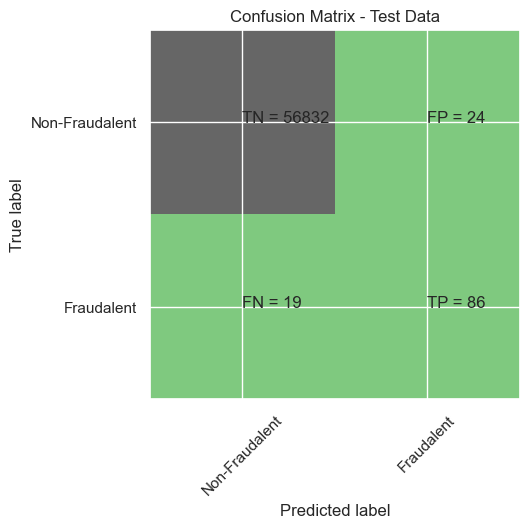

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.78      0.82      0.80       105

    accuracy                           1.00     56961
   macro avg       0.89      0.91      0.90     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.9093127500050252
Tree threshold: 1.0
ROC for the test dataset 90.9%


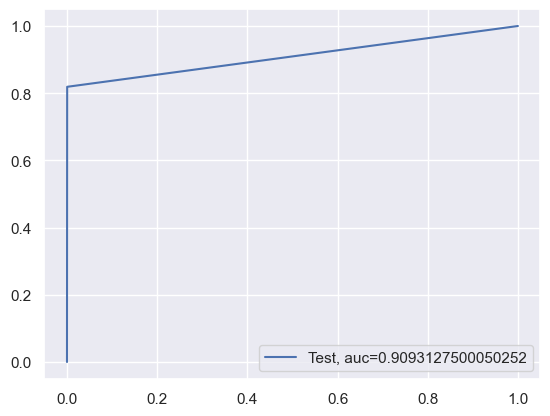

entropy score: 0.9990344270641316
Confusion Matrix


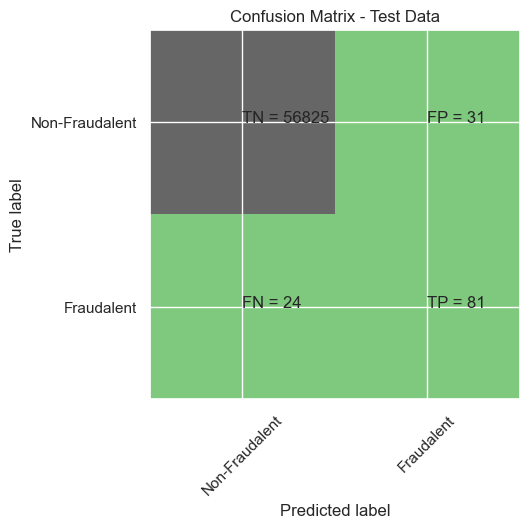

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.72      0.77      0.75       105

    accuracy                           1.00     56961
   macro avg       0.86      0.89      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8854416671691894
Tree threshold: 1.0
ROC for the test dataset 88.5%


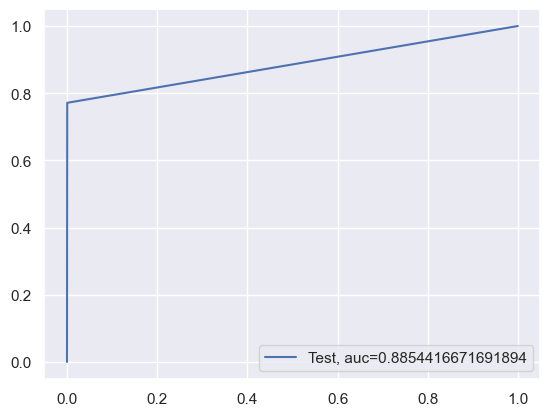

Time Taken by Model: --- 61.85519289970398 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995786590825302
Confusion Matrix


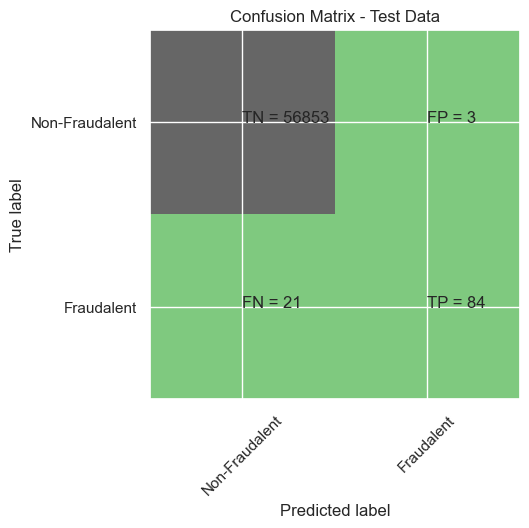

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.97      0.80      0.88       105

    accuracy                           1.00     56961
   macro avg       0.98      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9556082366814742
Random Forest threshold: 0.01
ROC for the test dataset 95.6%


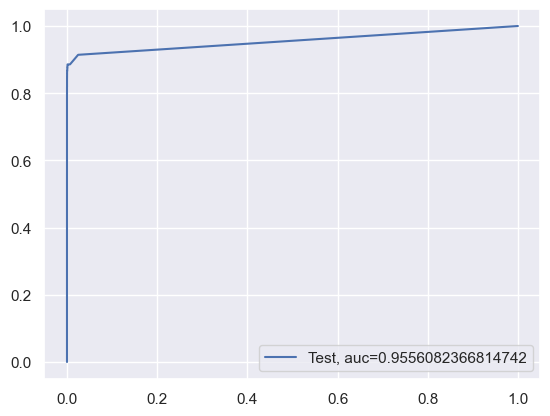

Time Taken by Model: --- 400.15108346939087 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


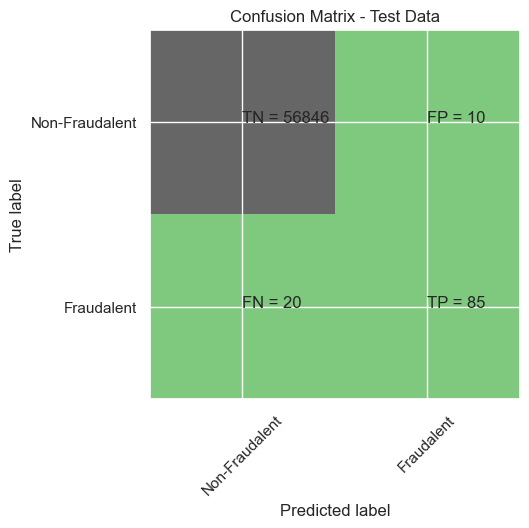

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.89      0.81      0.85       105

    accuracy                           1.00     56961
   macro avg       0.95      0.90      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9494211776451118
XGBoost threshold: 0.00011233753320993856
ROC for the test dataset 94.9%


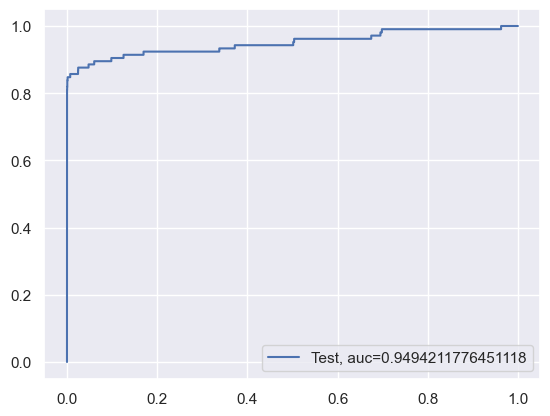

Time Taken by Model: --- 1.7597050666809082 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982444128438757
Confusion Matrix


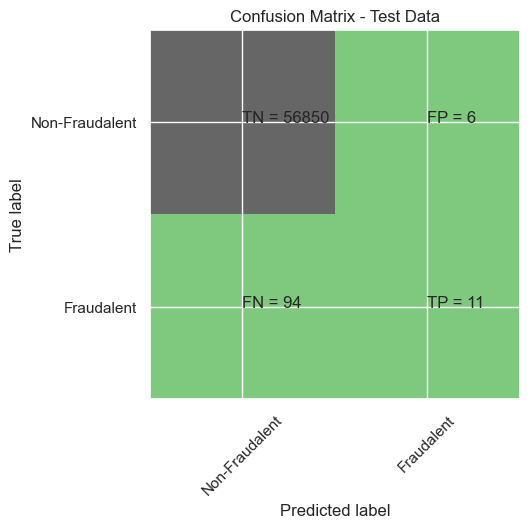

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.65      0.10      0.18       105

    accuracy                           1.00     56961
   macro avg       0.82      0.55      0.59     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4950796330914524
SVM threshold: 0.004471505431068877
ROC for the test dataset 49.5%


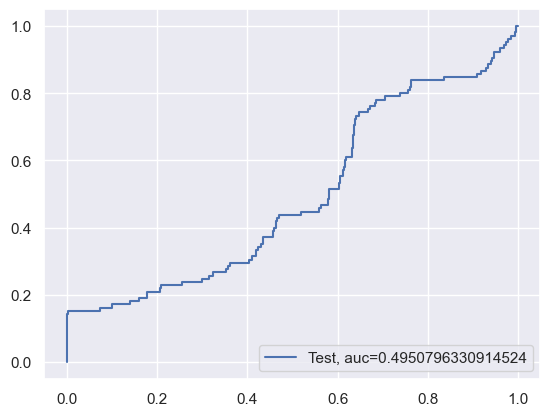

Time Taken by Model: --- 177.21654438972473 seconds ---


In [54]:
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = BuildAndRunSVMModel(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [55]:
df_Results

Data_Imbalance_Handling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.968540   0.001560  
1   Logistic Regression with L1 Regularisation  0.998982   0.965627   0.001329  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999298   0.927759   0.000028  
7                                          SVM  0.998560   0.891340   0.000904  
8   Logistic Regression with L2 Regularisation  0.999122   0.992566   0.002032  
9   Logistic Regression with L1 Regularisation  0.999175   0.983179   0.003335  
10                                         KNN  0.999210   0.895014   0.200000  
11               Tree Model with gini criteria  0.999245   0.909313   1.000000  
12            Tree Model with entropy criteria  0.999034   0.885442   1.000000  
13                               Random Forest  0.999579   0.955608   0.010000  
14                                     XGBoost  0.999473   0.949421   0.000112  
15                                         SVM  0.998244   0.495080   0.004472

#### _**Observation:**_
- **As the results show, `Logistic Regression with L2 Regularization` has delivered the `best performance`, achieving a ROC value of 0.99256 using `Repeated KFold cross-validation`.**

In [56]:
# Evaluating for the XGBoost model
from xgboost import XGBClassifier

# Fitting model on training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

# Creating a DataFrame with feature importances
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


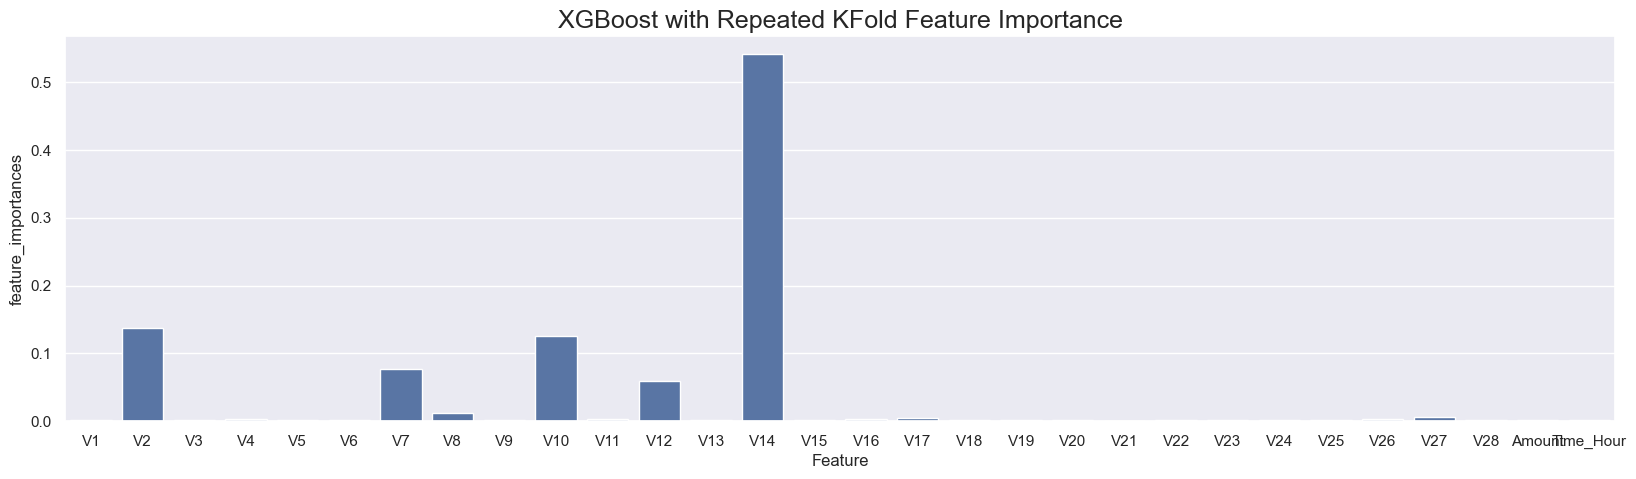

In [57]:
# Plotting its feature importances
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

---

### <code style="background:lightcyan;color:black">4.4 Conducting cross-validation using StratifiedKFold</code>

In [58]:
# Initializing StratifiedKFold with 5 splits

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


#### Similarly, exploring other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9827862817148777
Max auc_roc for l1: 0.9748061339602548
Parameters for l2 regularisations
[[ 0.00406061  0.05669898 -0.06971341  0.18728442  0.04436444 -0.03038612
  -0.02616896 -0.095924   -0.065131   -0.14607758  0.11918454 -0.17811898
  -0.03108665 -0.31961836  0.00513811 -0.08454597 -0.08255905 -0.00722258
   0.00533802 -0.01929004  0.03123466  0.01694888 -0.0081352  -0.00890087
  -0.00578382  0.00489537 -0.00585656 -0.00044877  0.00037564 -0.01088975]]
[-7.15474524]
{1: array([[0.99056695, 0.99058273, 0.99497573, 0.99311121, 0.99311121,
        0.99311121, 0.99083186, 0.99083186, 0.99083186, 0.99083186,
        0.99083186, 0.99083186, 0.99083186, 0.99083186, 0.99083186,
        0.99083186, 0.99083186, 0.99083186, 0.99083186, 0.99083186],
       [0.96686398, 0.96819833, 0.9814314 , 0.98207518, 0.98207518,
        0.98207518, 0.98355176, 0.98355176, 0.98355176, 0.98355176,
        0.98355176, 0.98355176, 0.98355

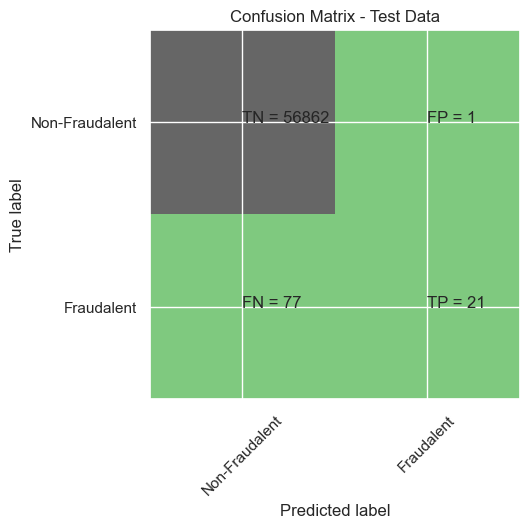

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.21      0.35        98

    accuracy                           1.00     56961
   macro avg       0.98      0.61      0.67     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9989466477063254
Confusion Matrix


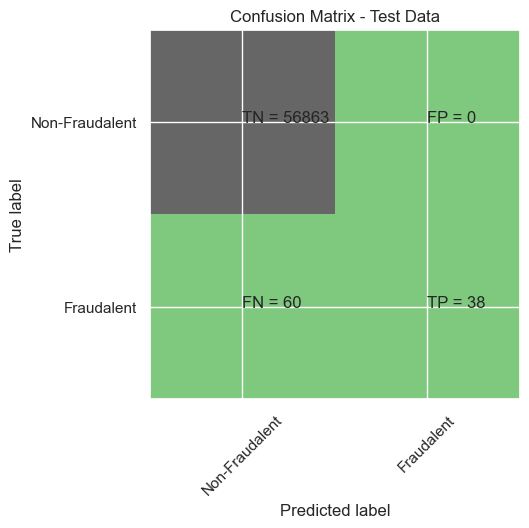

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.39      0.56        98

    accuracy                           1.00     56961
   macro avg       1.00      0.69      0.78     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9842756686586844
l2 threshold: 0.0018190754088154527
ROC for the test dataset 98.4%


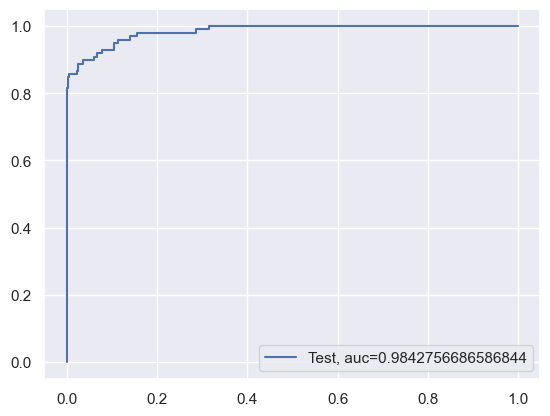

l1 roc_value: 0.9571679084028314
l1 threshold: 0.001762578544360981
ROC for the test dataset 95.7%


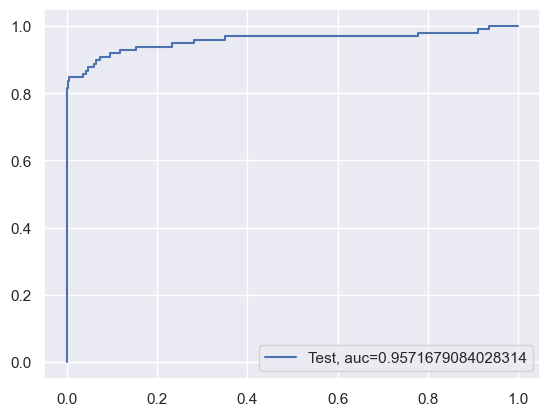

Time Taken by Model: --- 350.43099904060364 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


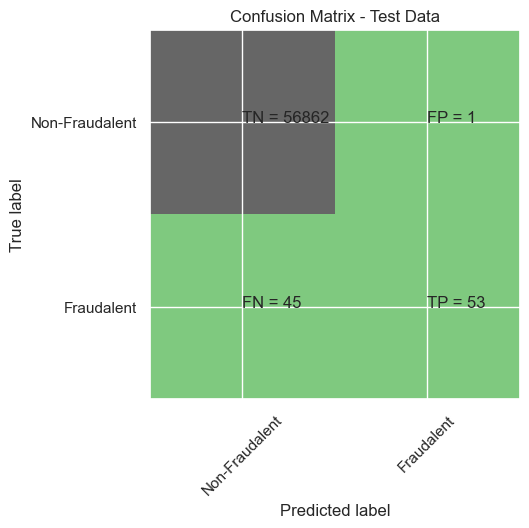

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


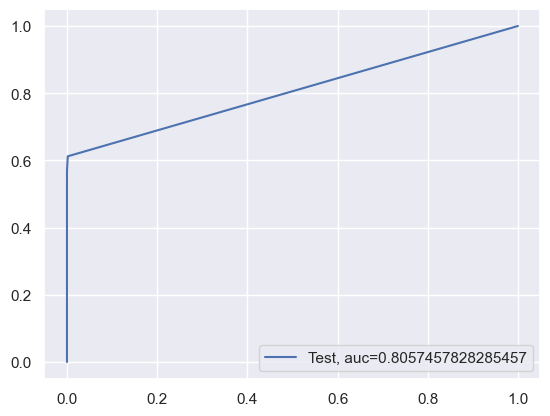

Time Taken by Model: --- 39.64622163772583 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


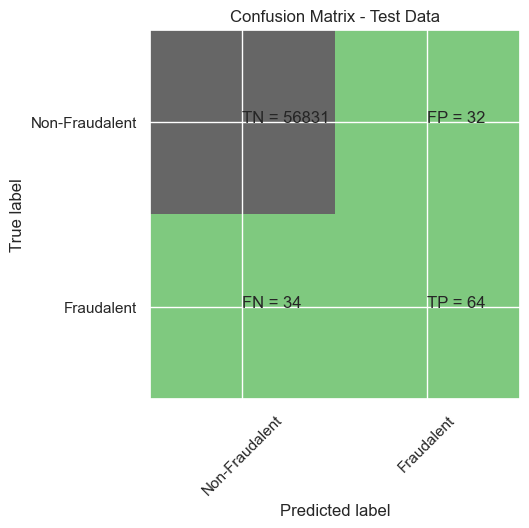

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


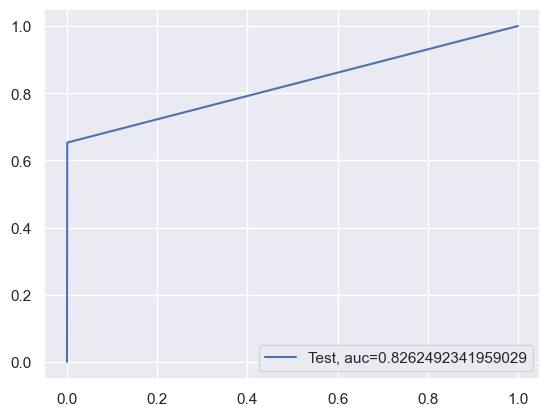

entropy score: 0.9990168711925703
Confusion Matrix


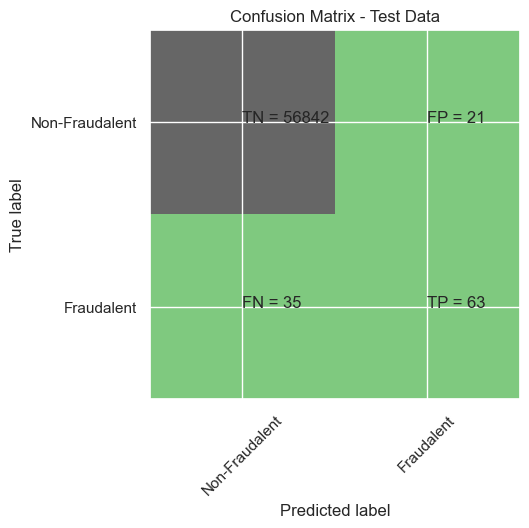

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


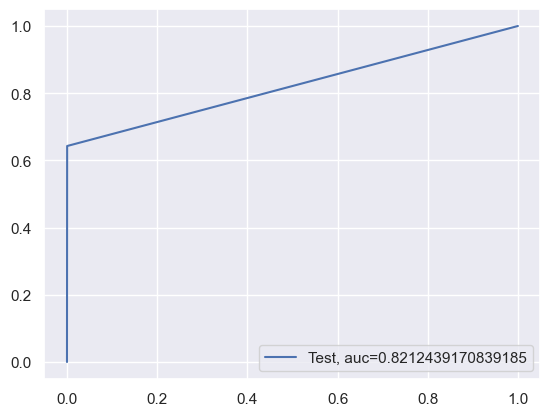

Time Taken by Model: --- 57.84779381752014 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


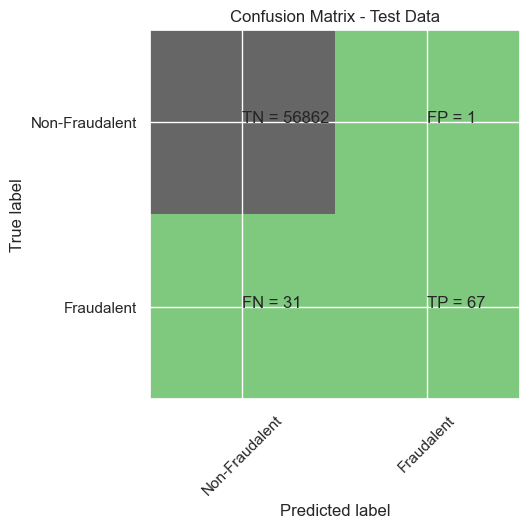

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


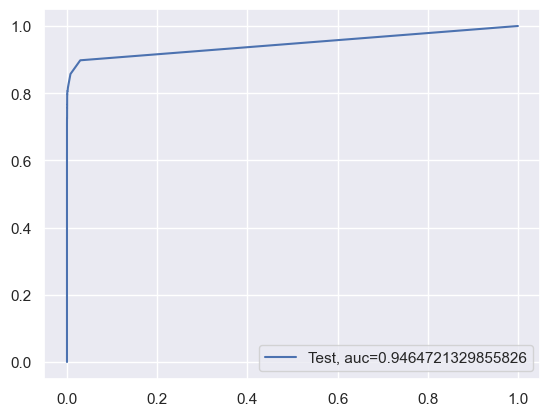

Time Taken by Model: --- 384.67747473716736 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9991748740366215
Confusion Matrix


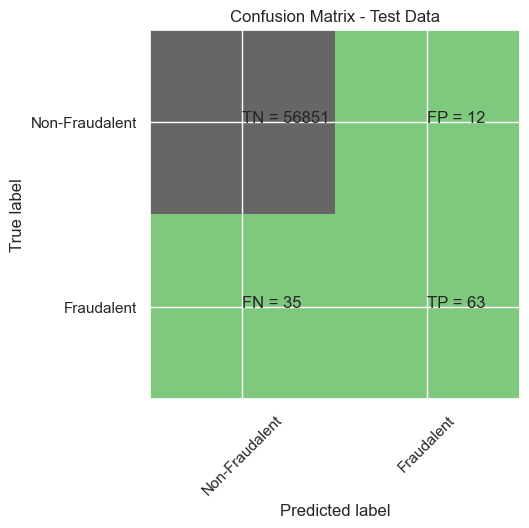

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56961
   macro avg       0.92      0.82      0.86     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9192701613293964
XGBoost threshold: 7.963625103002414e-05
ROC for the test dataset 91.9%


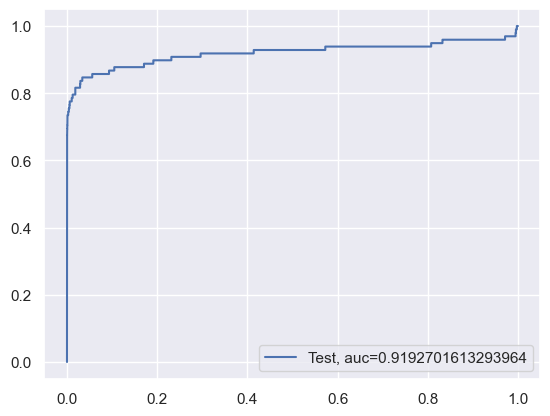

Time Taken by Model: --- 3.0383830070495605 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


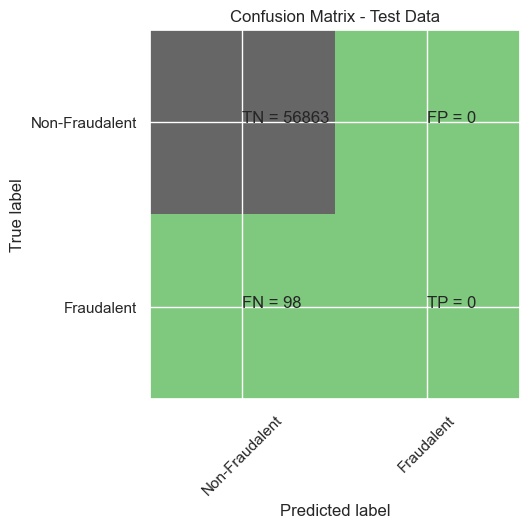

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.004323740895823363
ROC for the test dataset 40.2%


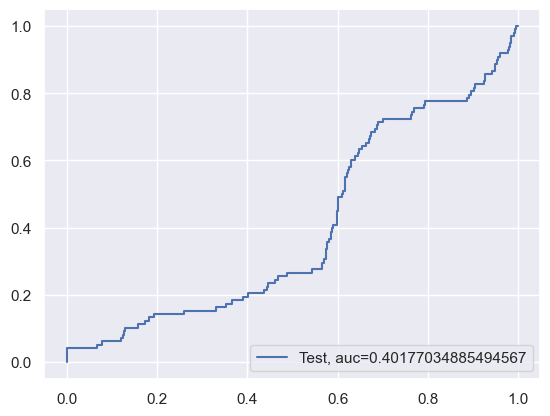

Time Taken by Model: --- 173.89860606193542 seconds ---


In [59]:
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = BuildAndRunSVMModel(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [60]:
df_Results

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.968540   0.001560  
1   Logistic Regression with L1 Regularisation  0.998982   0.965627   0.001329  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999298   0.927759   0.000028  
7                                          SVM  0.998560   0.891340   0.000904  
8   Logistic Regression with L2 Regularisation  0.999122   0.992566   0.002032  
9   Logistic Regression with L1 Regularisation  0.999175   0.983179   0.003335  
10                                         KNN  0.999210   0.895014   0.200000  
11               Tree Model with gini criteria  0.999245   0.909313   1.000000  
12            Tree Model with entropy criteria  0.999034   0.885442   1.000000  
13                               Random Forest  0.999579   0.955608   0.010000  
14                                     XGBoost  0.999473   0.949421   0.000112  
15                                         SVM  0.998244   0.495080   0.004472  
16  Logistic Regression with L2 Regularisation  0.998631   0.984276   0.001819  
17  Logistic Regression with L1 Regularisation  0.998947   0.957168   0.001763  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999175   0.919270   0.000080  
23                                         SVM  0.998280   0.401770   0.004324

#### **_Observation:_**
- **As the results show `Logistic Regression` with `L2 Regularisation` for `StratifiedFold cross validation` provided `best results`.**

---

### <code style="background:lightcyan;color:black">4.5 Proceed with the Best Performing Model</code>

- Apply the optimal hyperparameters to the model
- Make predictions on the test dataset

In [61]:
# Logistic Regression
from sklearn import linear_model # Importing the package
from sklearn.model_selection import KFold

# Defining hyperparameters and cross-validation strategy
num_C = np.logspace(-10, 10, 20)
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=1000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=1e-3
      )

searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

# Displaying results
print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_)
print(searchCV_l2.scores_)

# Finding predicted values on the test dataset
y_pred_l2 = searchCV_l2.predict(X_test)

# Finding predicted probabilities on the test dataset
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]

# Accuaracy of the L2 model
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))

# Calculating ROC-AUC
from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))

# Calculating optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.982836698480918
Parameters for l2 regularisations
[[ 3.42201492e-02  2.07757382e-02 -7.95385734e-02  3.03082614e-01
   9.74364044e-02 -5.06436073e-02 -2.46116942e-02 -1.45586026e-01
  -1.19883972e-01 -2.16759625e-01  1.37602585e-01 -2.15803011e-01
  -7.23378429e-02 -4.58027144e-01 -2.11477141e-02 -1.17963537e-01
  -1.17261149e-01 -3.01831800e-03  1.86436004e-02 -1.75924033e-02
   5.89408033e-02  4.26395957e-02 -5.23124747e-04 -1.86999495e-02
  -1.08448723e-02  6.97491037e-03 -7.34966141e-03 -3.07027300e-03
   2.57576538e-04 -7.36823863e-03]]
[-7.51941018]
{1: array([[0.69455556, 0.69446642, 0.73281732, 0.81417865, 0.95686257,
        0.99086529, 0.99450403, 0.99348079, 0.99348079, 0.99348079,
        0.99348079, 0.99348079, 0.99348079, 0.99348079, 0.99348079,
        0.99348079, 0.99348079, 0.99348079, 0.99348079, 0.99348079],
       [0.87730597, 0.87748826, 0.58295692, 0.75397849, 0.90601577,
        0.94858403, 0.97544646, 0.9771723 , 0.9771723 , 0.9771723 ,
   

In [62]:
# Coefficients
searchCV_l2.coef_

array([[ 3.42201492e-02,  2.07757382e-02, -7.95385734e-02,
         3.03082614e-01,  9.74364044e-02, -5.06436073e-02,
        -2.46116942e-02, -1.45586026e-01, -1.19883972e-01,
        -2.16759625e-01,  1.37602585e-01, -2.15803011e-01,
        -7.23378429e-02, -4.58027144e-01, -2.11477141e-02,
        -1.17963537e-01, -1.17261149e-01, -3.01831800e-03,
         1.86436004e-02, -1.75924033e-02,  5.89408033e-02,
         4.26395957e-02, -5.23124747e-04, -1.86999495e-02,
        -1.08448723e-02,  6.97491037e-03, -7.34966141e-03,
        -3.07027300e-03,  2.57576538e-04, -7.36823863e-03]])

In [63]:
# Creating a DataFrame with feature names and their corresponding importance coefficients
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [64]:
# Displaying the DataFrame
coefficients

Feature  Importance Coefficient
0          V1                0.034220
1          V2                0.020776
2          V3               -0.079539
3          V4                0.303083
4          V5                0.097436
5          V6               -0.050644
6          V7               -0.024612
7          V8               -0.145586
8          V9               -0.119884
9         V10               -0.216760
10        V11                0.137603
11        V12               -0.215803
12        V13               -0.072338
13        V14               -0.458027
14        V15               -0.021148
15        V16               -0.117964
16        V17               -0.117261
17        V18               -0.003018
18        V19                0.018644
19        V20               -0.017592
20        V21                0.058941
21        V22                0.042640
22        V23               -0.000523
23        V24               -0.018700
24        V25               -0.010845
25        V26                0.006975
26        V27               -0.007350
27        V28               -0.003070
28     Amount                0.000258
29  Time_Hour               -0.007368

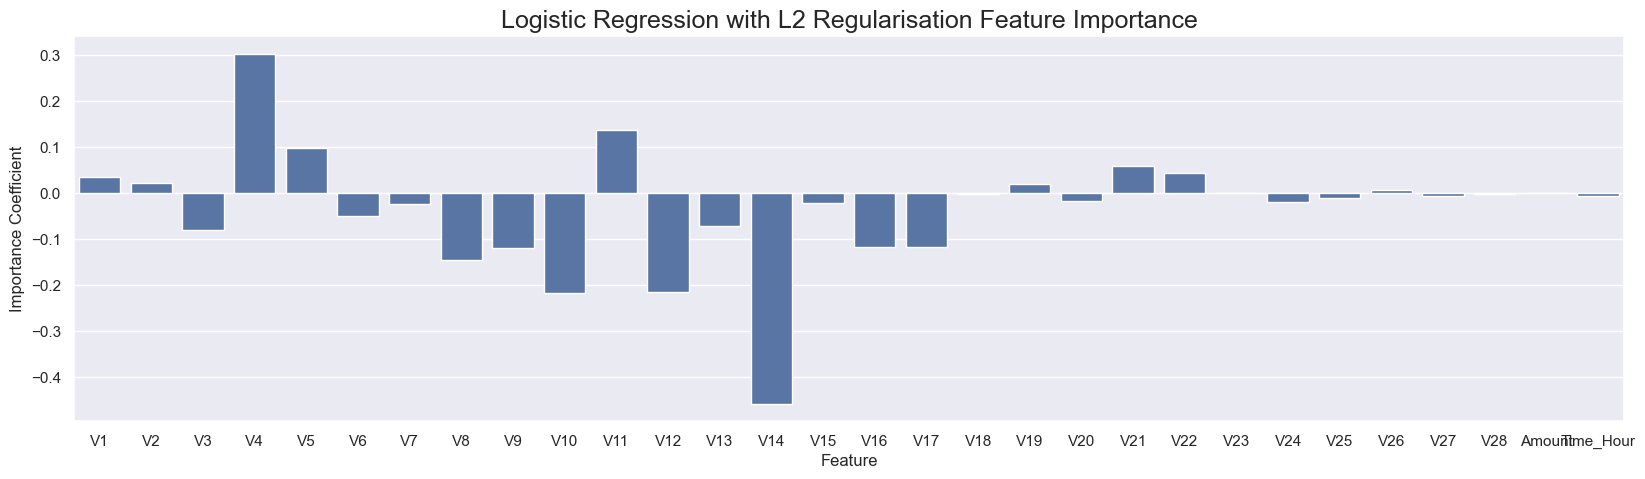

In [65]:
# Plotting feature importances
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

- From the above results for the coefficients it is evident that `V10, V12, V14` have a `negative impact on the predictions`, whereas `V4, V5, V11` have a `positive impact on the predictions`.

---

#### Due to the extended processing time required for models utilizing oversampling techniques, we will explore the implementation of undersampling methods.

In [66]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Defining UnderSampler
RUS = RandomUnderSampler(sampling_strategy=0.5)

# Fitting and applying the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)

# Creating DataFrame directly from the resampled data
X_Under = pd.DataFrame(data=X_Under, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.986358108845326
Max auc_roc for l1: 0.9837314005760318
Parameters for l2 regularisations
[[-0.02340073  0.0720668  -0.15097799  0.3170504   0.0556185  -0.04751772
  -0.05892565 -0.06817577 -0.05565257 -0.13571565  0.15406118 -0.2318162
  -0.03988754 -0.35663223 -0.0197547  -0.05283061 -0.05508033  0.01423136
  -0.03577533 -0.01768361  0.02044803  0.01332224  0.00141622 -0.02073534
   0.01404862 -0.01873269  0.00579149  0.01231764  0.00199003  0.00968374]]
[-3.0306398]
{1: array([[0.97820513, 0.98461538, 0.98878205, 0.99198718, 0.99519231,
        0.99647436, 0.99711538, 0.99711538, 0.99711538, 0.9974359 ,
        0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 ,
        0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 ],
       [0.92430149, 0.9431449 , 0.95614035, 0.96426251, 0.9691358 ,
        0.97076023, 0.96816114, 0.96491228, 0.96231319, 0.96263808,
        0.96036387, 0.96036387, 0.96036387

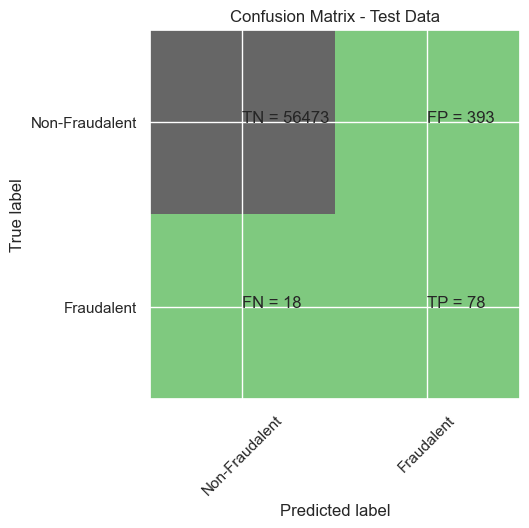

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.17      0.81      0.28        96

    accuracy                           0.99     56962
   macro avg       0.58      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9866226607211825
Confusion Matrix


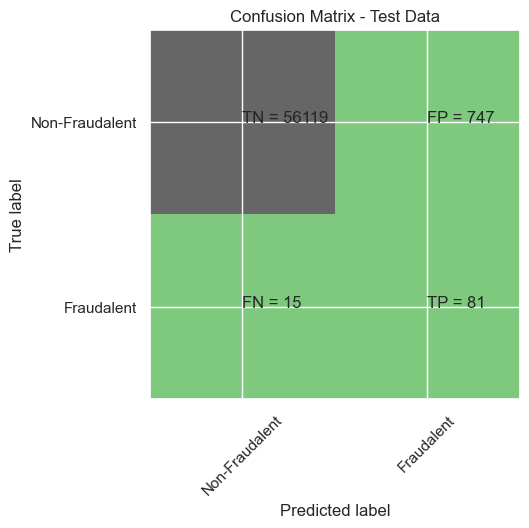

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.84      0.18        96

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.58     56962
weighted avg       1.00      0.99      0.99     56962

l2 roc_value: 0.9703139837512749
l2 threshold: 0.11566700989954189
ROC for the test dataset 97.0%


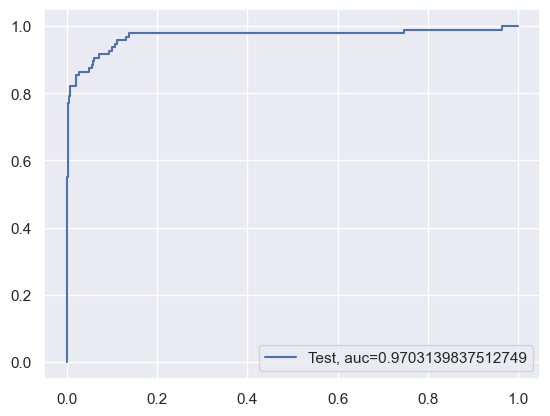

l1 roc_value: 0.9710664837805836
l1 threshold: 0.20099901704777565
ROC for the test dataset 97.1%


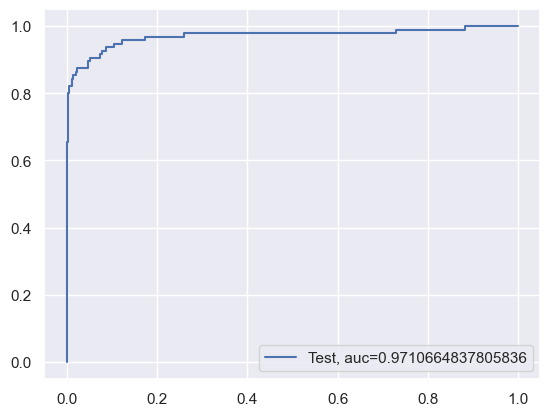

Time Taken by Model: --- 5.42562198638916 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9759488781995014
Confusion Matrix


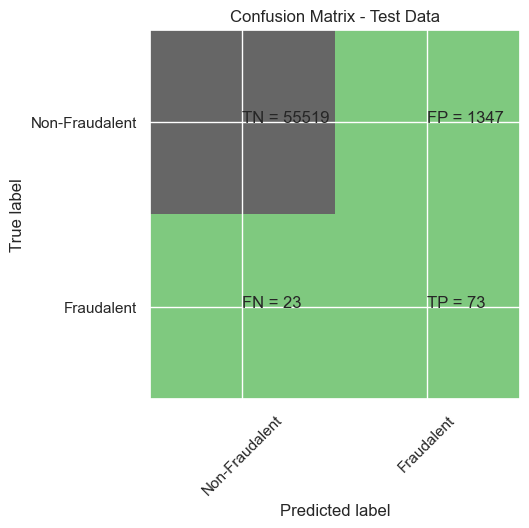

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.05      0.76      0.10        96

    accuracy                           0.98     56962
   macro avg       0.53      0.87      0.54     56962
weighted avg       1.00      0.98      0.99     56962

KNN roc_value: 0.9387307808415105
KNN threshold: 0.4
ROC for the test dataset 93.9%


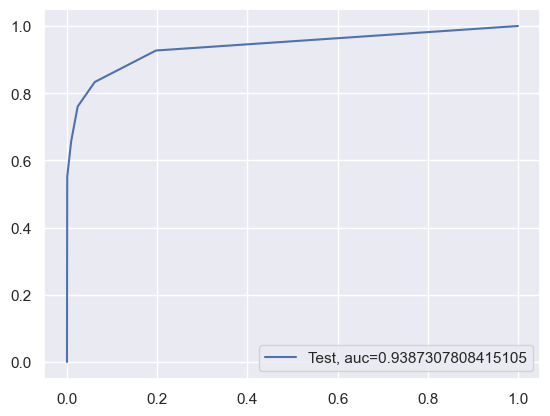

Time Taken by Model: --- 8.153103351593018 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9455953091534708
Confusion Matrix


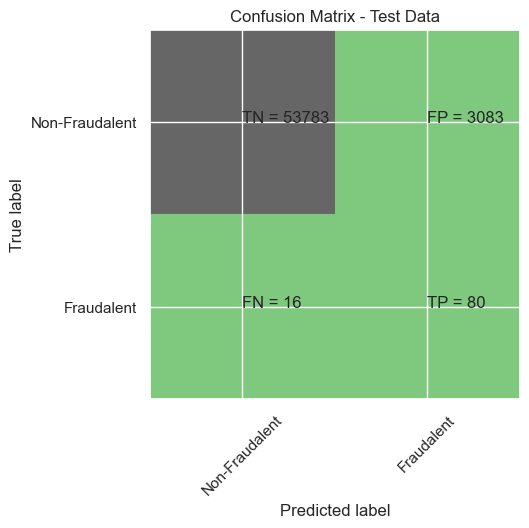

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.83      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.95      0.97     56962

gini tree_roc_value: 0.8895590804112593
Tree threshold: 1.0
ROC for the test dataset 89.0%


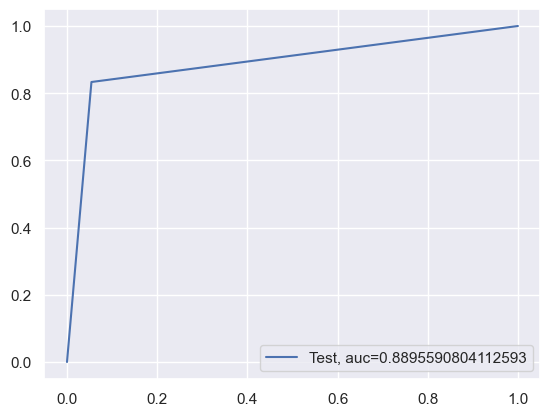

entropy score: 0.9412064183139637
Confusion Matrix


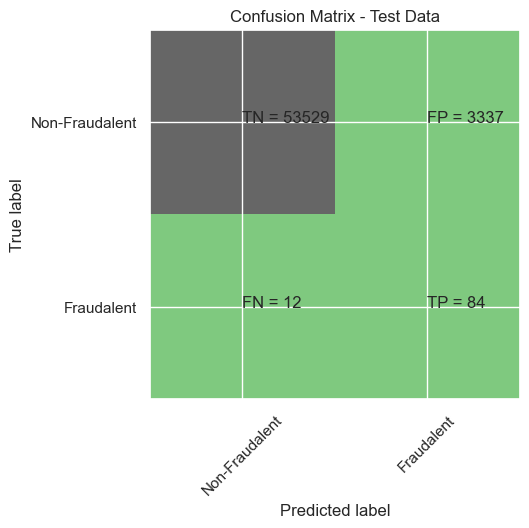

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.88      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.91      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.9081590933070728
Tree threshold: 1.0
ROC for the test dataset 90.8%


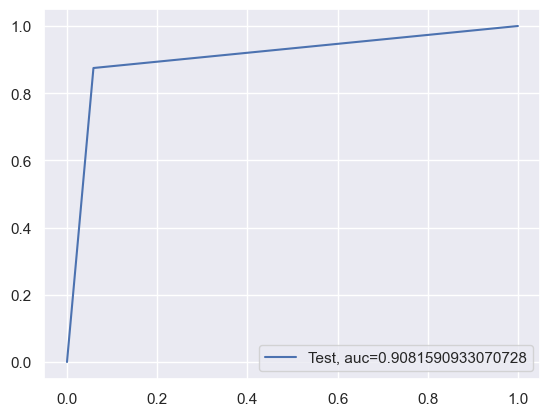

Time Taken by Model: --- 1.6713182926177979 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9899055510691338
Confusion Matrix


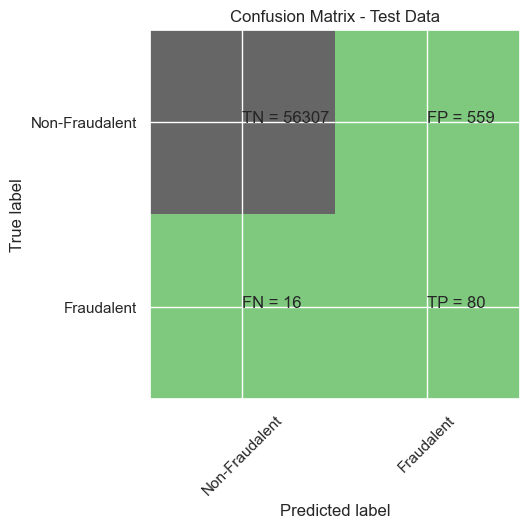

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.13      0.83      0.22        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9717265699187564
Random Forest threshold: 0.31
ROC for the test dataset 97.2%


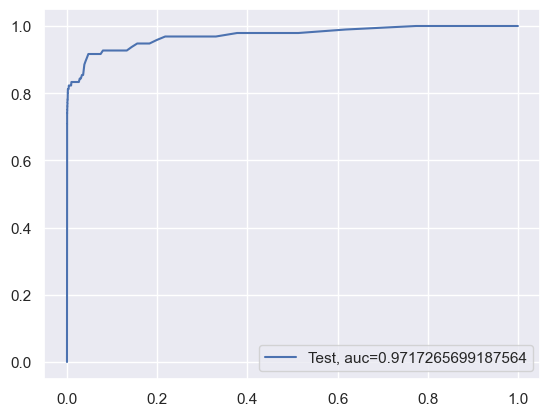

Time Taken by Model: --- 3.306307554244995 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9860082160036515
Confusion Matrix


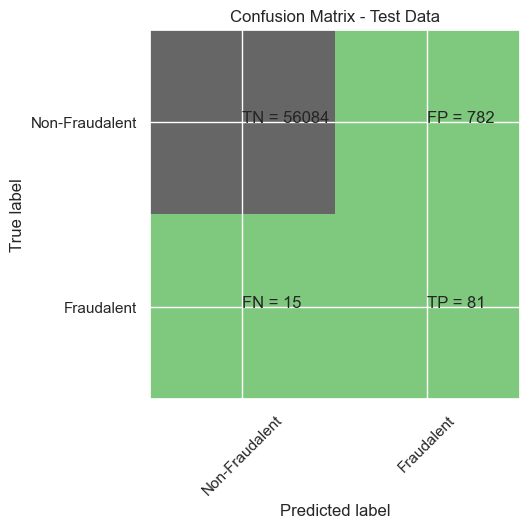

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.84      0.17        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9783047170834359
XGBoost threshold: 0.035369161516427994
ROC for the test dataset 97.8%


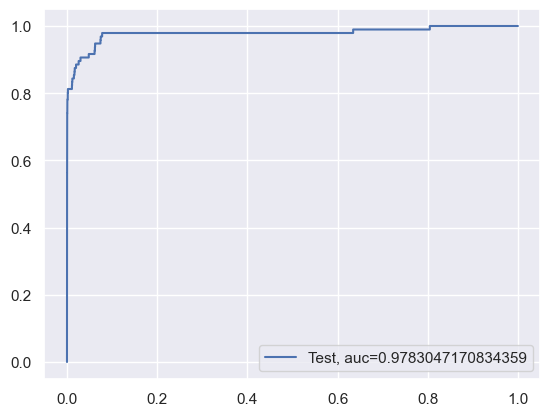

Time Taken by Model: --- 0.7193429470062256 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6423405077068923
Confusion Matrix


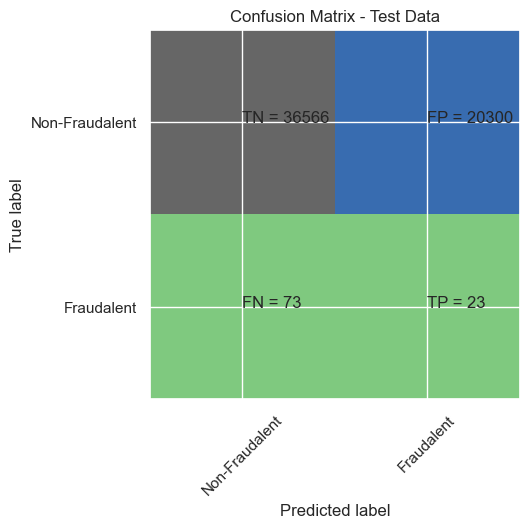

classification Report
              precision    recall  f1-score   support

           0       1.00      0.64      0.78     56866
           1       0.00      0.24      0.00        96

    accuracy                           0.64     56962
   macro avg       0.50      0.44      0.39     56962
weighted avg       1.00      0.64      0.78     56962

SVM roc_value: 0.553323273133331
SVM threshold: 0.3342733820194249
ROC for the test dataset 55.3%


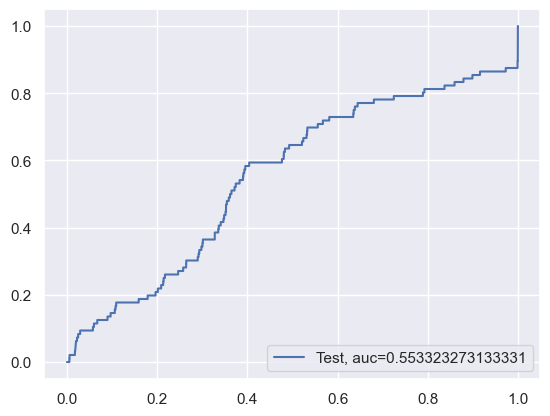

Time Taken by Model: --- 3.9798102378845215 seconds ---


In [67]:
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = BuildAndRunSVMModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [68]:
df_Results

Data_Imbalance_Handling  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.968540   0.001560  
1   Logistic Regression with L1 Regularisation  0.998982   0.965627   0.001329  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999298   0.927759   0.000028  
7                                          SVM  0.998560   0.891340   0.000904  
8   Logistic Regression with L2 Regularisation  0.999122   0.992566   0.002032  
9   Logistic Regression with L1 Regularisation  0.999175   0.983179   0.003335  
10                                         KNN  0.999210   0.895014   0.200000  
11               Tree Model with gini criteria  0.999245   0.909313   1.000000  
12            Tree Model with entropy criteria  0.999034   0.885442   1.000000  
13                               Random Forest  0.999579   0.955608   0.010000  
14                                     XGBoost  0.999473   0.949421   0.000112  
15                                         SVM  0.998244   0.495080   0.004472  
16  Logistic Regression with L2 Regularisation  0.998631   0.984276   0.001819  
17  Logistic Regression with L1 Regularisation  0.998947   0.957168   0.001763  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999175   0.919270   0.000080  
23                                         SVM  0.998280   0.401770   0.004324  
24  Logistic Regression with L2 Regularisation  0.992785   0.970314   0.115667  
25  Logistic Regression with L1 Regularisation  0.986623   0.971066   0.200999  
26                                         KNN  0.975949   0.938731   0.400000  
27               Tree Model with gini criteria  0.945595   0.889559   1.000000  
28            Tree Model with entropy criteria  0.941206   0.908159   1.000000  
29                               Random Forest  0.989906   0.971727   0.310000  
30                                     XGBoost  0.986008   0.978305   0.035369  
31                                         SVM  0.642341   0.553323   0.334273

#### **_Observation:_**

- **Undersampling has notably enhanced the Random Forest model's performance.**

---

### <code style="background:lightcyan;color:black">4.6 Model building with balancing Classes</code>

#### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### <code style="background:#fff4e6;color:black">4.6.1 Handling Class Imbalance with Random Oversampling</code> 

#### Implementing RandomOverSampler with StratifiedKFold Cross-Validation

##### `Class Distribution Analysis`
- First, we will display the class distribution before and after applying Random Oversampling.

##### `Cross-Validation with StratifiedKFold`
- Next, we will utilize StratifiedKFold cross-validation on the oversampled data to generate train and test datasets.

##### `Model Training and Evaluation`
- We will then train and evaluate the following models using the generated datasets:
  - Logistic Regression with L2 Regularization
  - Logistic Regression with L1 Regularization
  - K-Nearest Neighbors (KNN)
  - Decision Tree with Gini Criterion
  - Decision Tree with Entropy Criterion
  - Random Forest
  - XGBoost

##### `SVM Consideration`
- Although we considered using the Support Vector Machine (SVM) model, we decided against it due to its extensive computational requirements.

##### `Model Comparison`
- Finally, after obtaining the results from the aforementioned models, we will compare their performance and select the model that yields the best results with the Random Oversampling technique.

In [69]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Applying RandomOverSampler
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)

# Creating Dataframe for X_over
X_over = pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9864378574423311
Max auc_roc for l1: 0.9842320687926038
Parameters for l2 regularisations
[[ 0.31316481  0.30855436  0.23281417  0.83600708  0.28333414 -0.44993461
  -0.27361589 -0.33451012 -0.2239834  -0.631273    0.26940918 -0.87690273
  -0.3027393  -0.83793503  0.02523698 -0.47477935 -0.2166063  -0.0955656
   0.10592691 -0.62131557  0.08793955  0.50597964  0.04991515 -0.40183178
   0.19250799 -0.1508589  -0.31295486  0.12301179  0.00466702  0.03956704]]
[-5.01350585]
{1: array([[0.98538214, 0.98570377, 0.9858919 , 0.98598942, 0.98598942,
        0.98610069, 0.98610069, 0.98610069, 0.98610069, 0.98610069,
        0.98610069, 0.98610069, 0.98610069, 0.98610069, 0.98610069,
        0.98610069, 0.98610069, 0.98610069, 0.98610069, 0.98610069],
       [0.9862235 , 0.98667252, 0.9868054 , 0.98692257, 0.98702444,
        0.98702444, 0.98702444, 0.98702444, 0.98702444, 0.98702444,
        0.98702444, 0.98702444, 0.987024

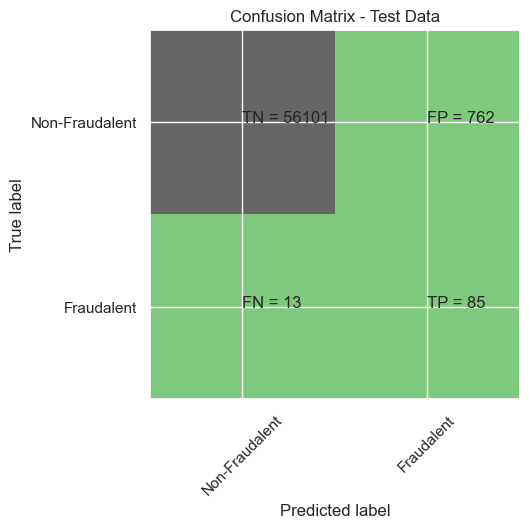

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9964537139446288
Confusion Matrix


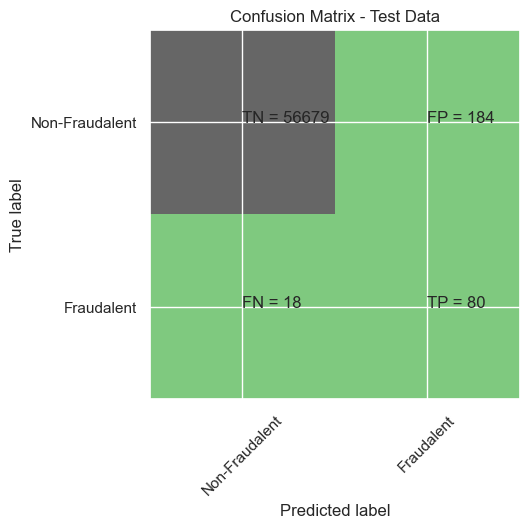

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.30      0.82      0.44        98

    accuracy                           1.00     56961
   macro avg       0.65      0.91      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9808255574533421
l2 threshold: 0.4308412426780414
ROC for the test dataset 98.1%


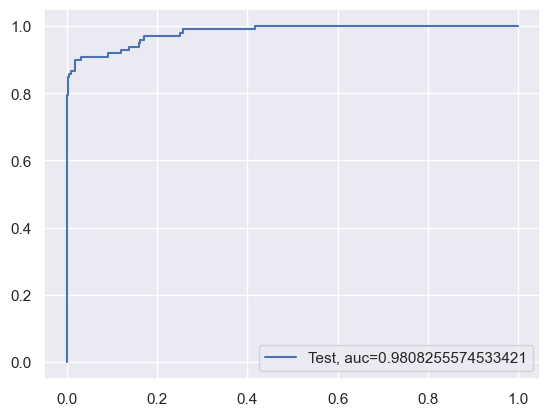

l1 roc_value: 0.9829981620701671
l1 threshold: 0.19848549730945794
ROC for the test dataset 98.3%


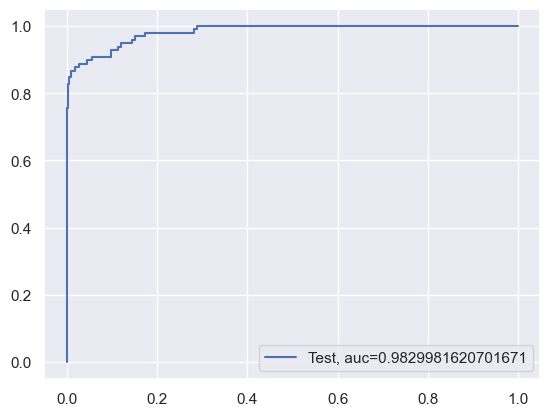

Time Taken by Model: --- 272.03658843040466 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


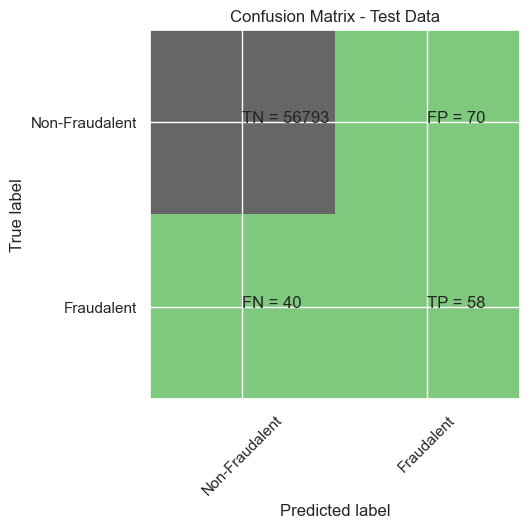

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


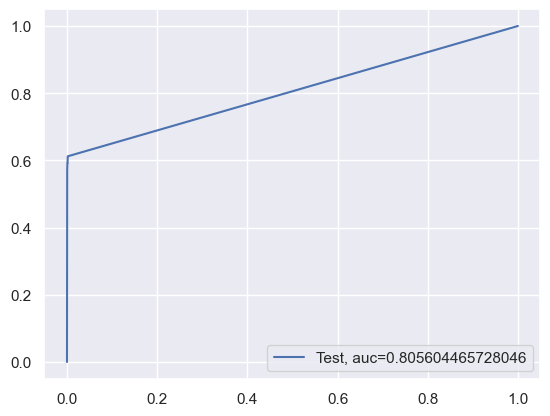

Time Taken by Model: --- 56.973737716674805 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989817594494479
Confusion Matrix


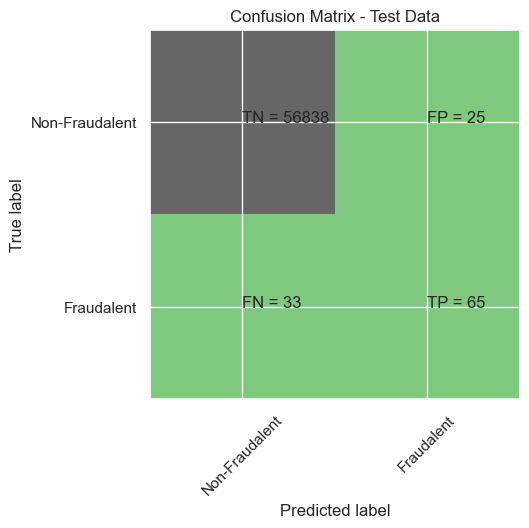

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.72      0.66      0.69        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8314128264604472
Tree threshold: 1.0
ROC for the test dataset 83.1%


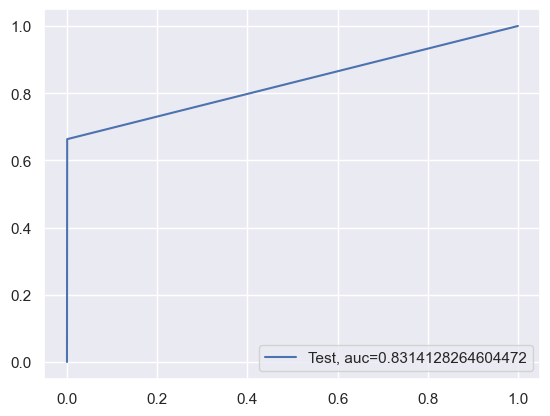

entropy score: 0.9992275416513052
Confusion Matrix


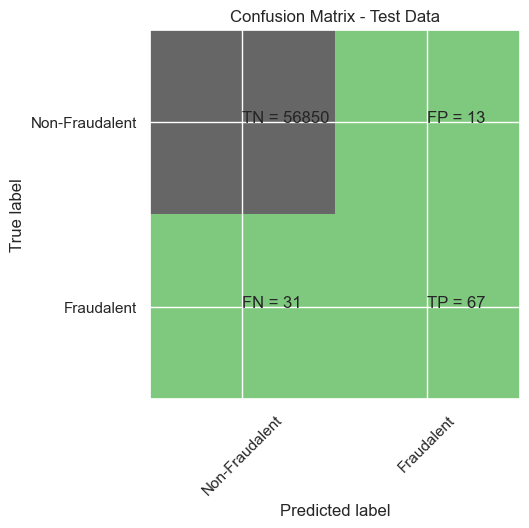

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.68      0.75        98

    accuracy                           1.00     56961
   macro avg       0.92      0.84      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8417224248614734
Tree threshold: 1.0
ROC for the test dataset 84.2%


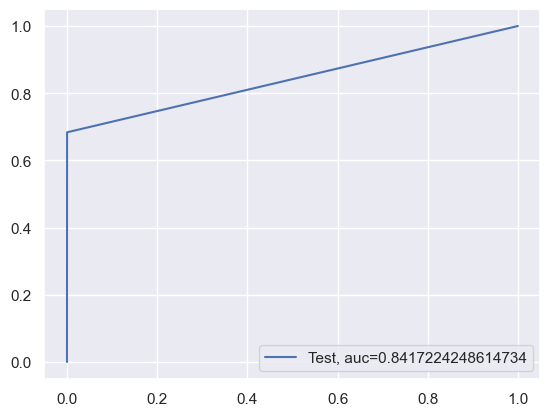

Time Taken by Model: --- 35.92923903465271 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


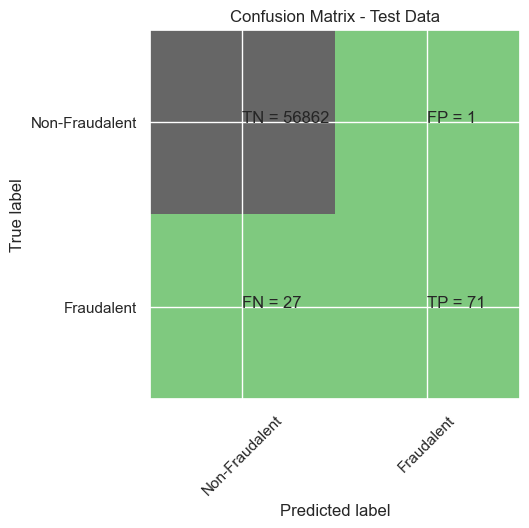

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9407009220514613
Random Forest threshold: 0.02
ROC for the test dataset 94.1%


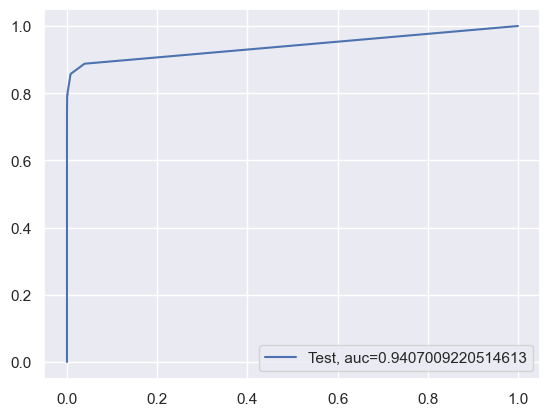

Time Taken by Model: --- 281.7910041809082 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


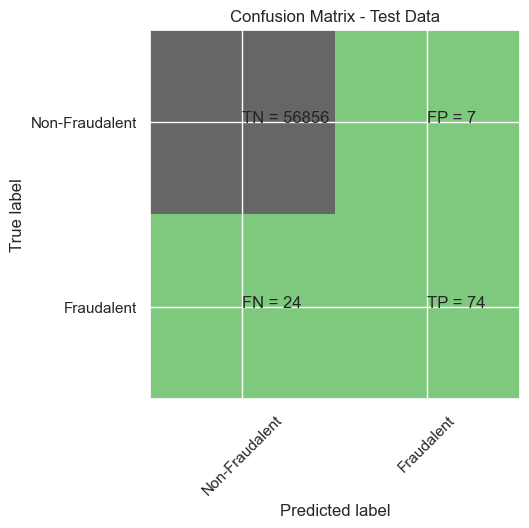

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9796544648846297
XGBoost threshold: 3.977149026468396e-05
ROC for the test dataset 98.0%


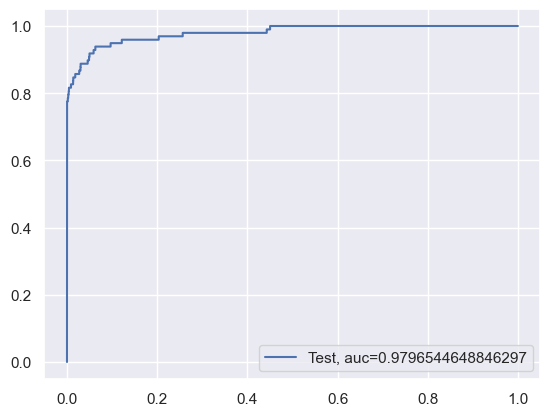

Time Taken by Model: --- 2.3799705505371094 seconds ---
--------------------------------------------------------------------------------


In [70]:
Data_Imbalance_Handling	 = "Random Oversampling with StratifiedKFold CV "
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results , Data_Imbalance_Handling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [71]:
df_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.968540   0.001560  
1   Logistic Regression with L1 Regularisation  0.998982   0.965627   0.001329  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999298   0.927759   0.000028  
7                                          SVM  0.998560   0.891340   0.000904  
8   Logistic Regression with L2 Regularisation  0.999122   0.992566   0.002032  
9   Logistic Regression with L1 Regularisation  0.999175   0.983179   0.003335  
10                                         KNN  0.999210   0.895014   0.200000  
11               Tree Model with gini criteria  0.999245   0.909313   1.000000  
12            Tree Model with entropy criteria  0.999034   0.885442   1.000000  
13                               Random Forest  0.999579   0.955608   0.010000  
14                                     XGBoost  0.999473   0.949421   0.000112  
15                                         SVM  0.998244   0.495080   0.004472  
16  Logistic Regression with L2 Regularisation  0.998631   0.984276   0.001819  
17  Logistic Regression with L1 Regularisation  0.998947   0.957168   0.001763  
18                                         KNN  0.999192   0.805746   0.200000  
19               Tree Model with gini criteria  0.998841   0.826249   1.000000  
20            Tree Model with entropy criteria  0.999017   0.821244   1.000000  
21                               Random Forest  0.999438   0.946472   0.010000  
22                                     XGBoost  0.999175   0.919270   0.000080  


#### **_Results for Random Oversampling:_**

`Random Oversampling has shown a positive impact on XGBoost predictions.` Based on the `Accuracy and ROC values`, `XGBoost` has delivered the `best results` when using this technique.

---

### <code style="background:#fff4e6;color:black">4.6.2 Handling Class Imbalance with SMOTE Oversampling</code>

##### `Class Distribution Analysis`
- First, we will display the class distribution with and without SMOTE Oversampling.

##### `Cross-Validation with StratifiedKFold`
- Then, we will use SMOTE Oversampling along with StratifiedKFold cross-validation to generate train and test datasets.

##### `Model Training and Evaluation`
- Subsequently, we will train and evaluate the following models using the oversampled datasets:
  - Logistic Regression with L2 Regularization
  - Logistic Regression with L1 Regularization
  - K-Nearest Neighbors (KNN)
  - Decision Tree with Gini Criterion
  - Decision Tree with Entropy Criterion
  - Random Forest
  - XGBoost

##### `Model Comparison`
- Finally, we will compare the performance of these models and select the one that provides the best results with the SMOTE Oversampling technique.

#### Print the class distribution after applying SMOTE

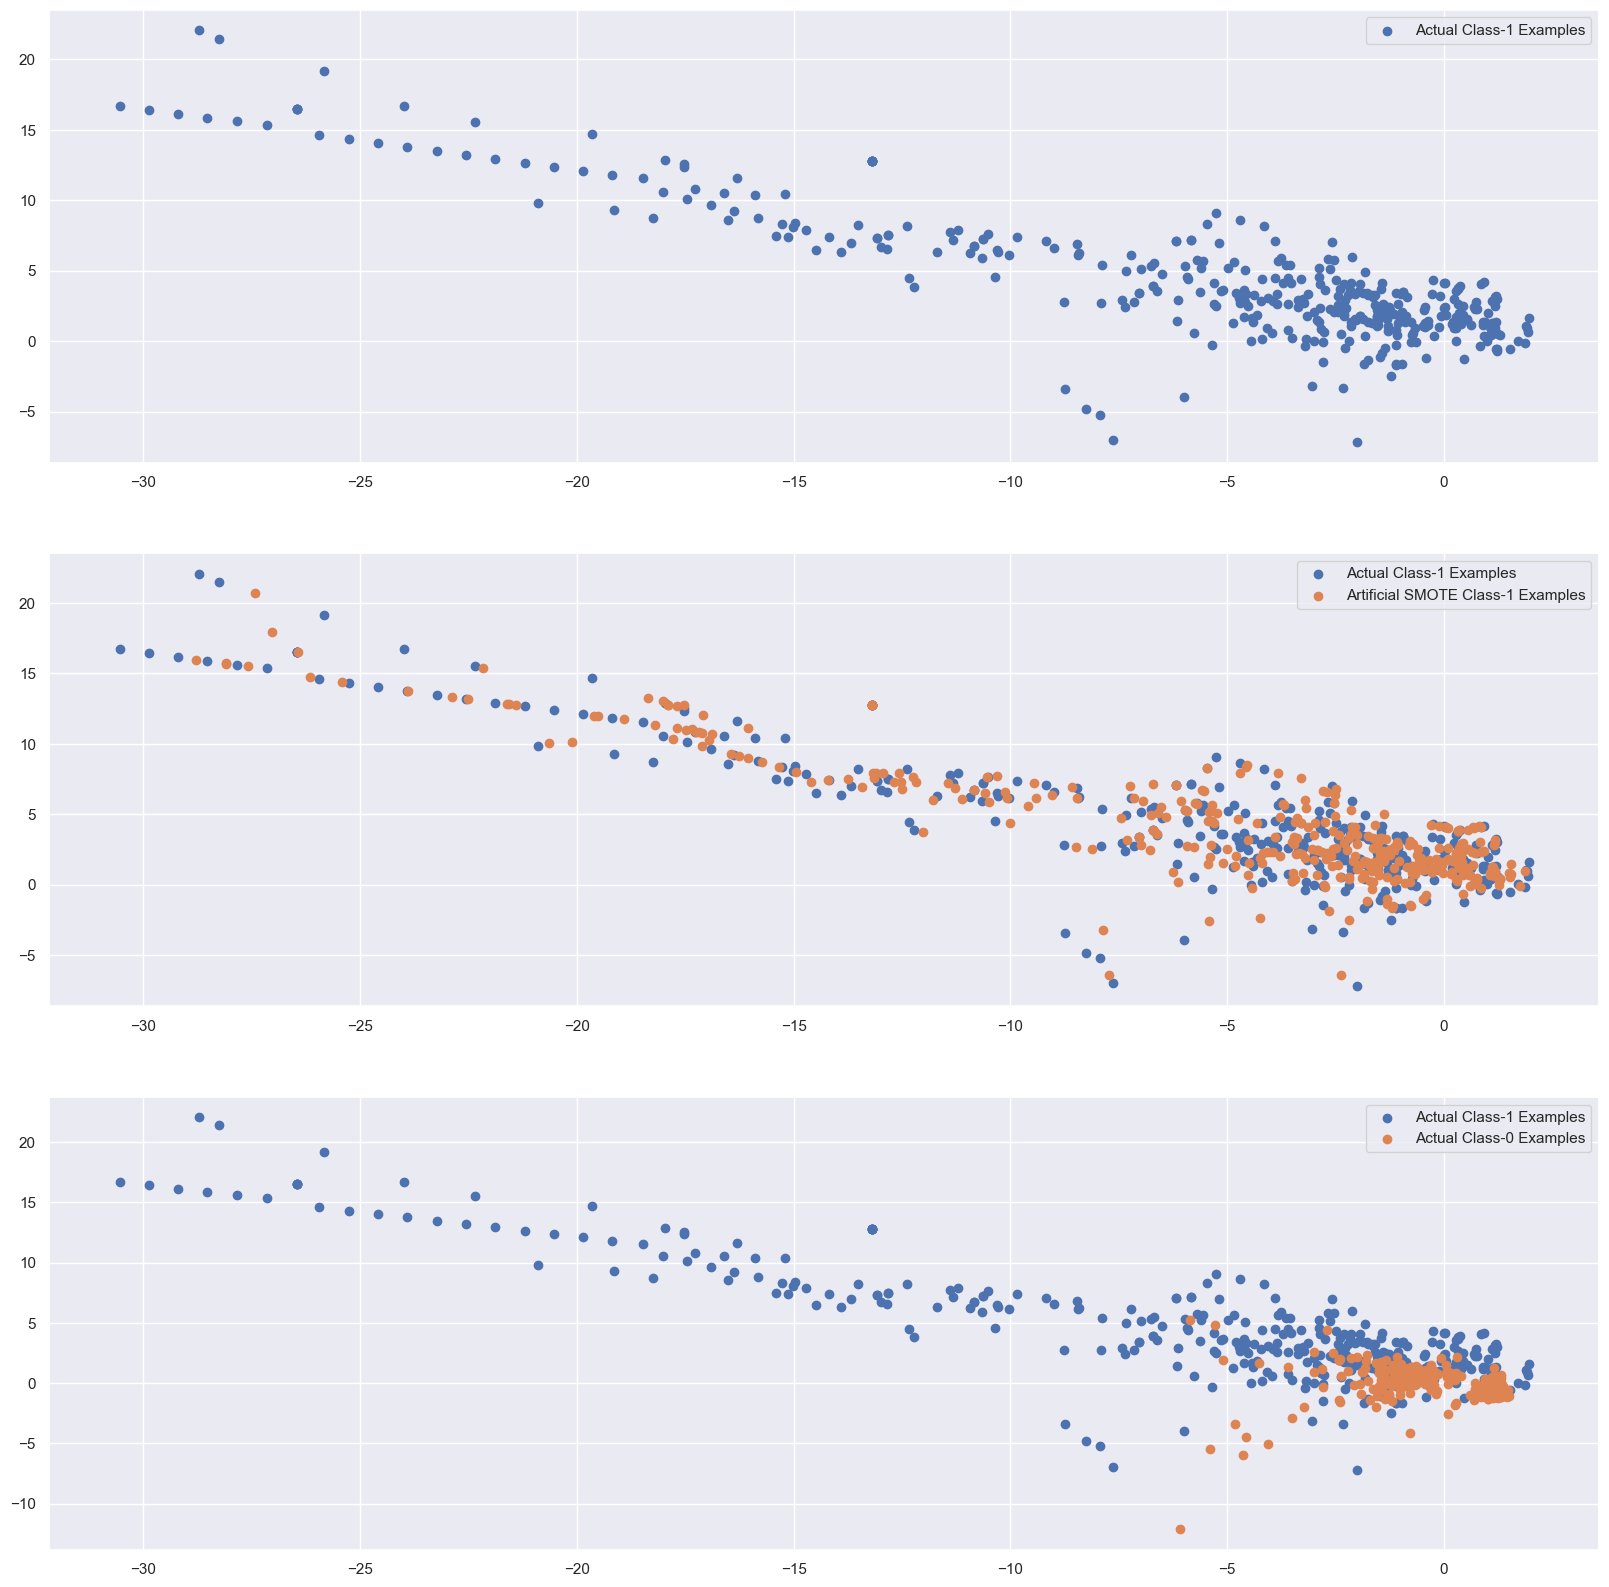

In [72]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

# Applying SMOTE
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

# Extracting artificial minority samples from SMOTE
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

# Converting to numpy arrays for plotting
X_train_1 = X_train.to_numpy()[y_train == 1.0]
X_train_0 = X_train.to_numpy()[y_train == 0.0]

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(3, 1)

axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[0].legend()

axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[1].scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
               label='Artificial SMOTE Class-1 Examples')
axs[1].legend()

axs[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axs[2].scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
axs[2].legend()

plt.show()

#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

In [73]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

# Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

# Creating Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9929185690032641
Max auc_roc for l1: 0.9907398239527663
Parameters for l2 regularisations
[[ 0.58924179  0.44142993  0.52873502  0.95406499  0.31822464 -0.76728482
  -0.44235638 -0.51516633 -0.38690856 -0.87087813  0.55055505 -1.13307333
  -0.2216367  -1.36899632  0.14323779 -0.66333893 -0.66265448 -0.34373031
   0.14108935 -0.81703784  0.02414686  0.46363478  0.16642574 -0.80407384
   0.42666515  0.00691513 -0.08532524  0.59979249  0.00619655  0.01126046]]
[-4.90929646]
{1: array([[0.99069926, 0.99113793, 0.99150282, 0.99172577, 0.99172577,
        0.99198112, 0.99198112, 0.99198112, 0.99198112, 0.99198112,
        0.99198112, 0.99198112, 0.99198112, 0.99198112, 0.99198112,
        0.99198112, 0.99198112, 0.99198112, 0.99198112, 0.99198112],
       [0.9918273 , 0.99225442, 0.99262372, 0.99286026, 0.99286026,
        0.99313395, 0.99313395, 0.99313395, 0.99313395, 0.99313395,
        0.99313395, 0.99313395, 0.99313

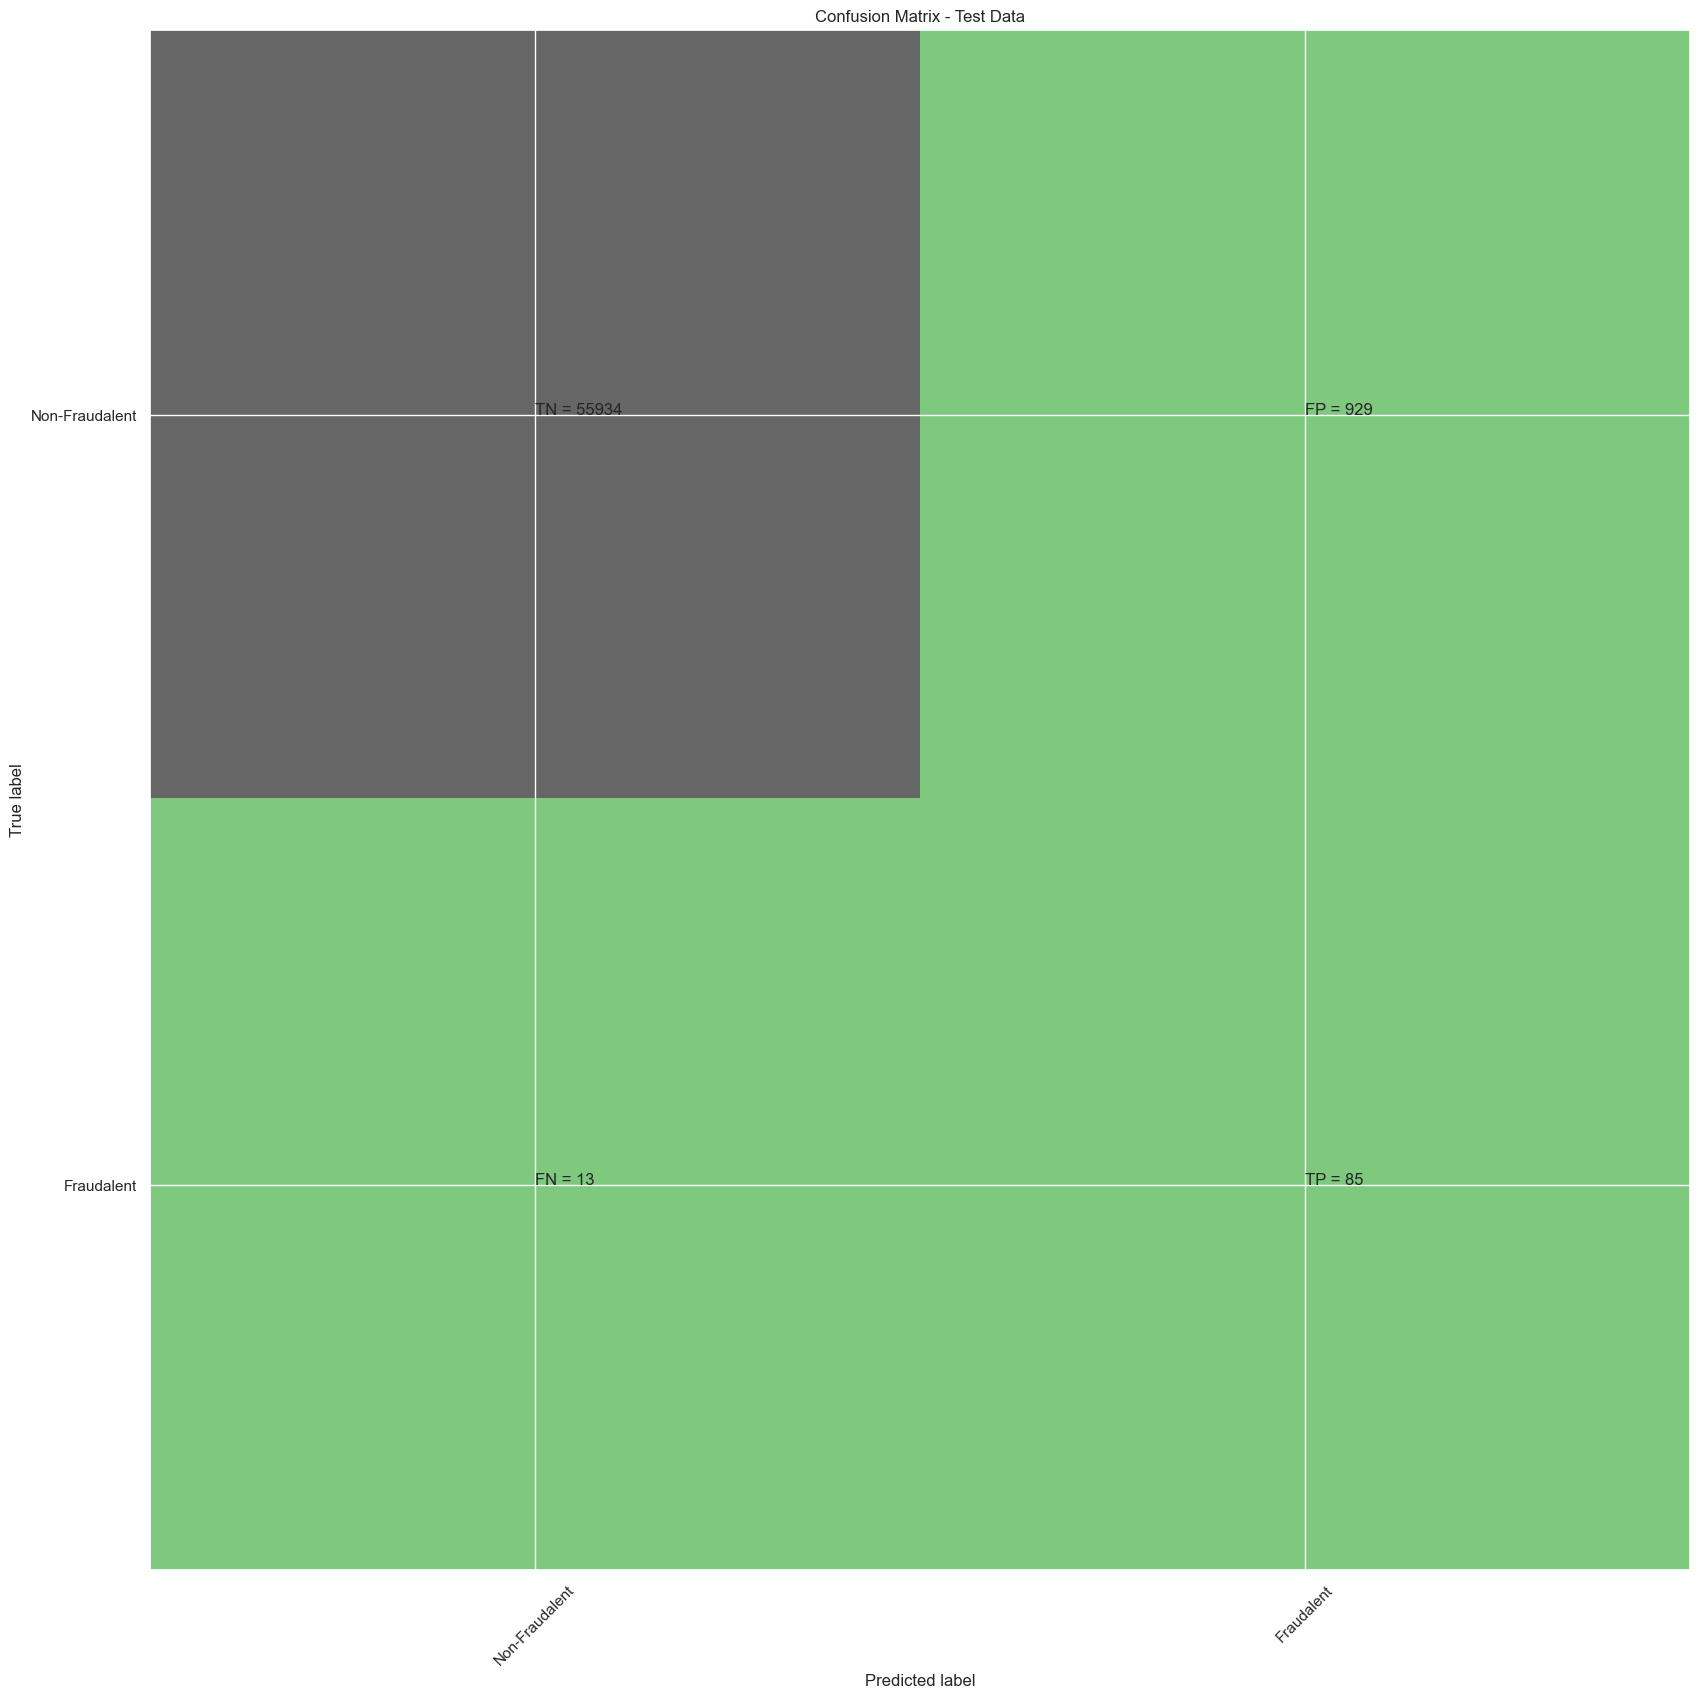

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9926616456874001
Confusion Matrix


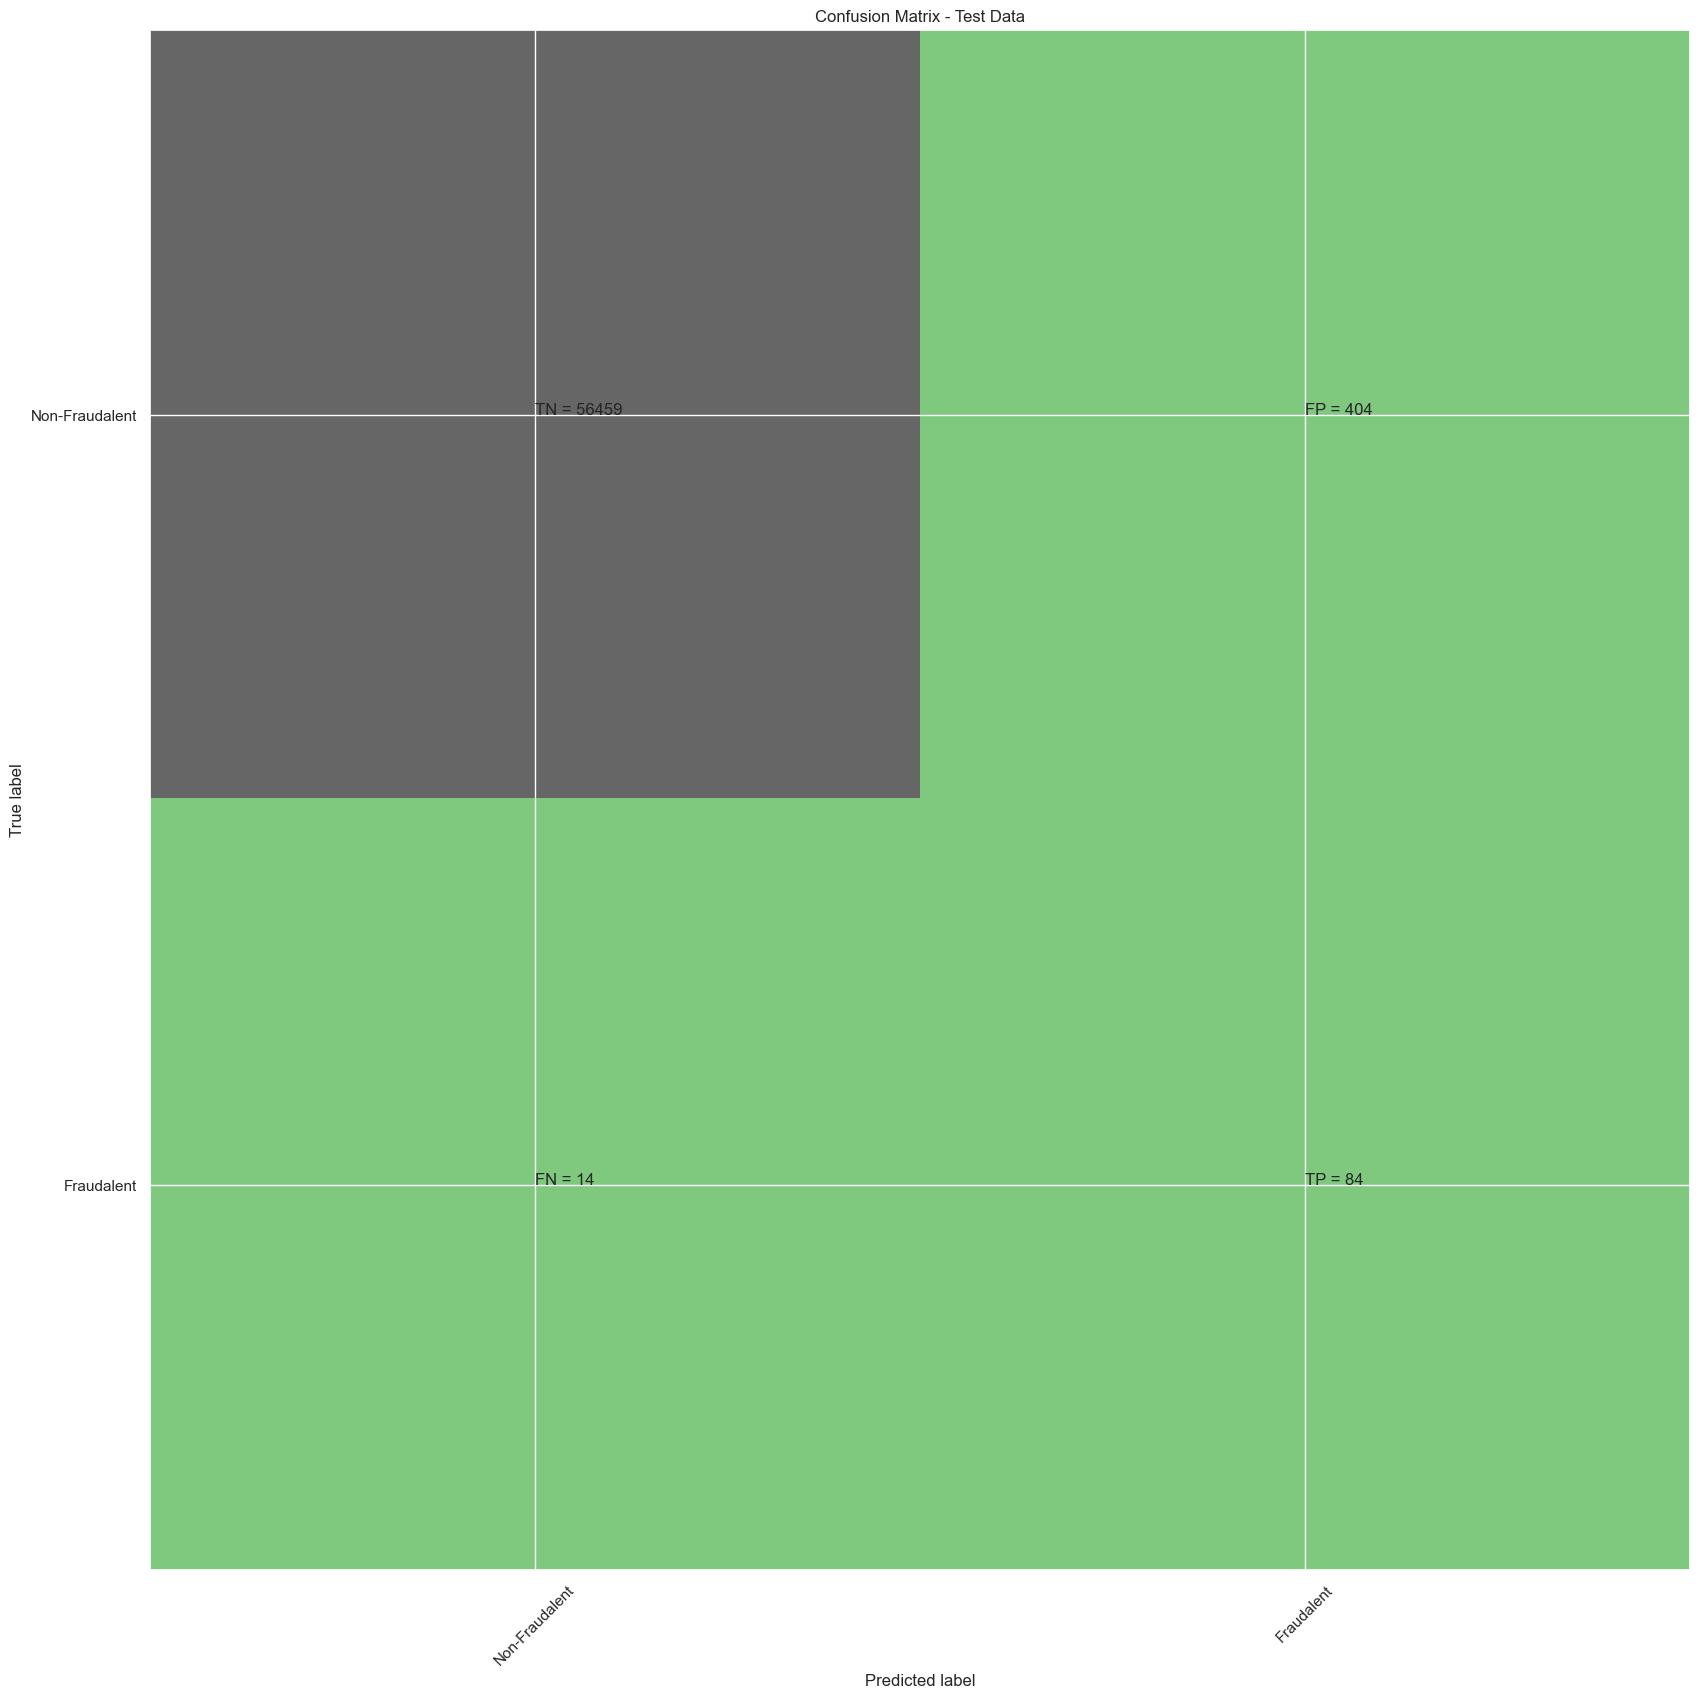

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.17      0.86      0.29        98

    accuracy                           0.99     56961
   macro avg       0.59      0.93      0.64     56961
weighted avg       1.00      0.99      1.00     56961

l2 roc_value: 0.9754668130023936
l2 threshold: 0.41353188802469026
ROC for the test dataset 97.5%


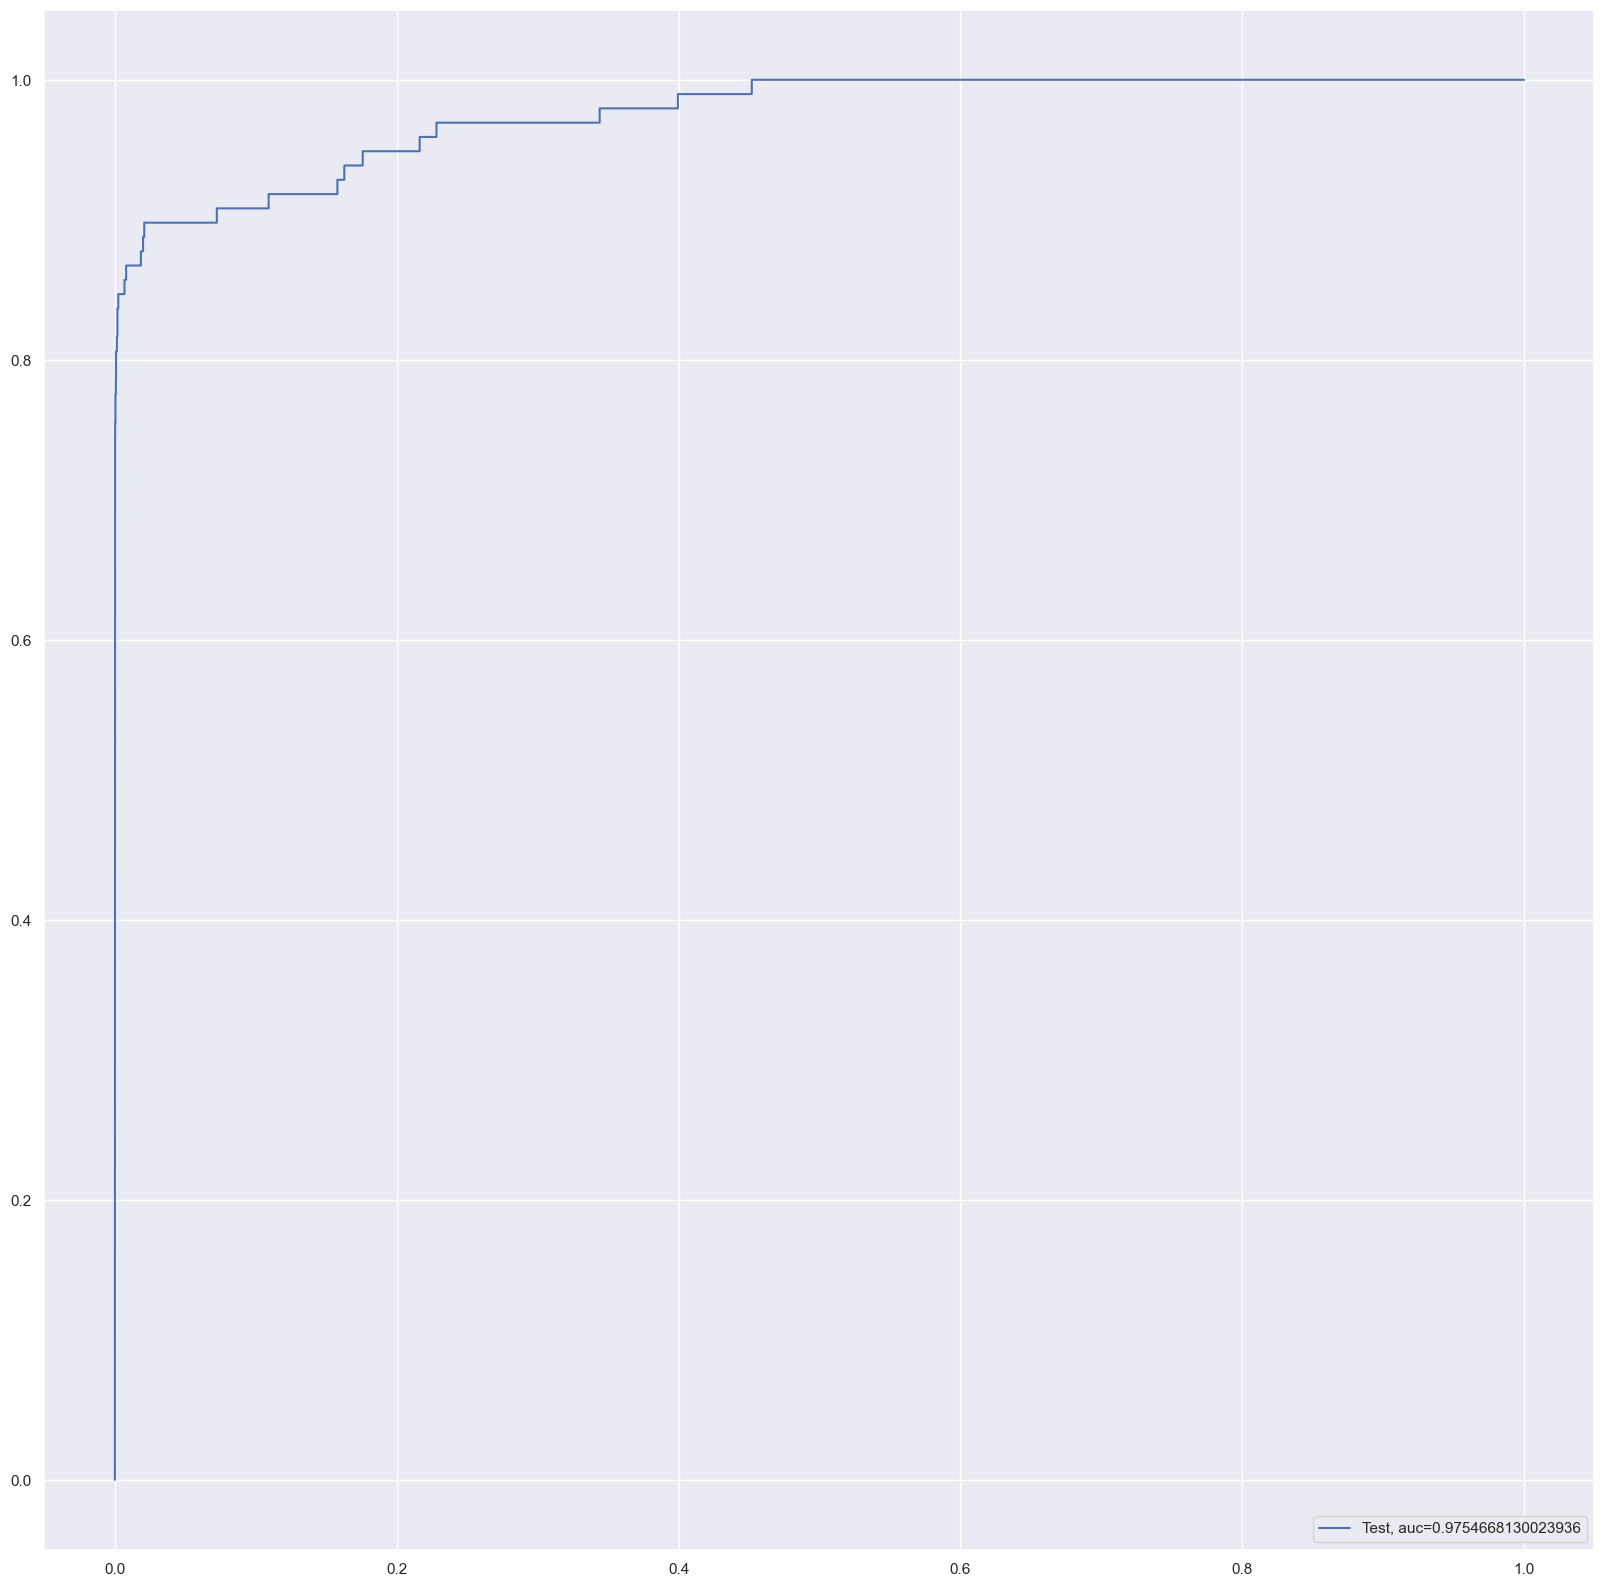

l1 roc_value: 0.9782613923117037
l1 threshold: 0.2614833734475942
ROC for the test dataset 97.8%


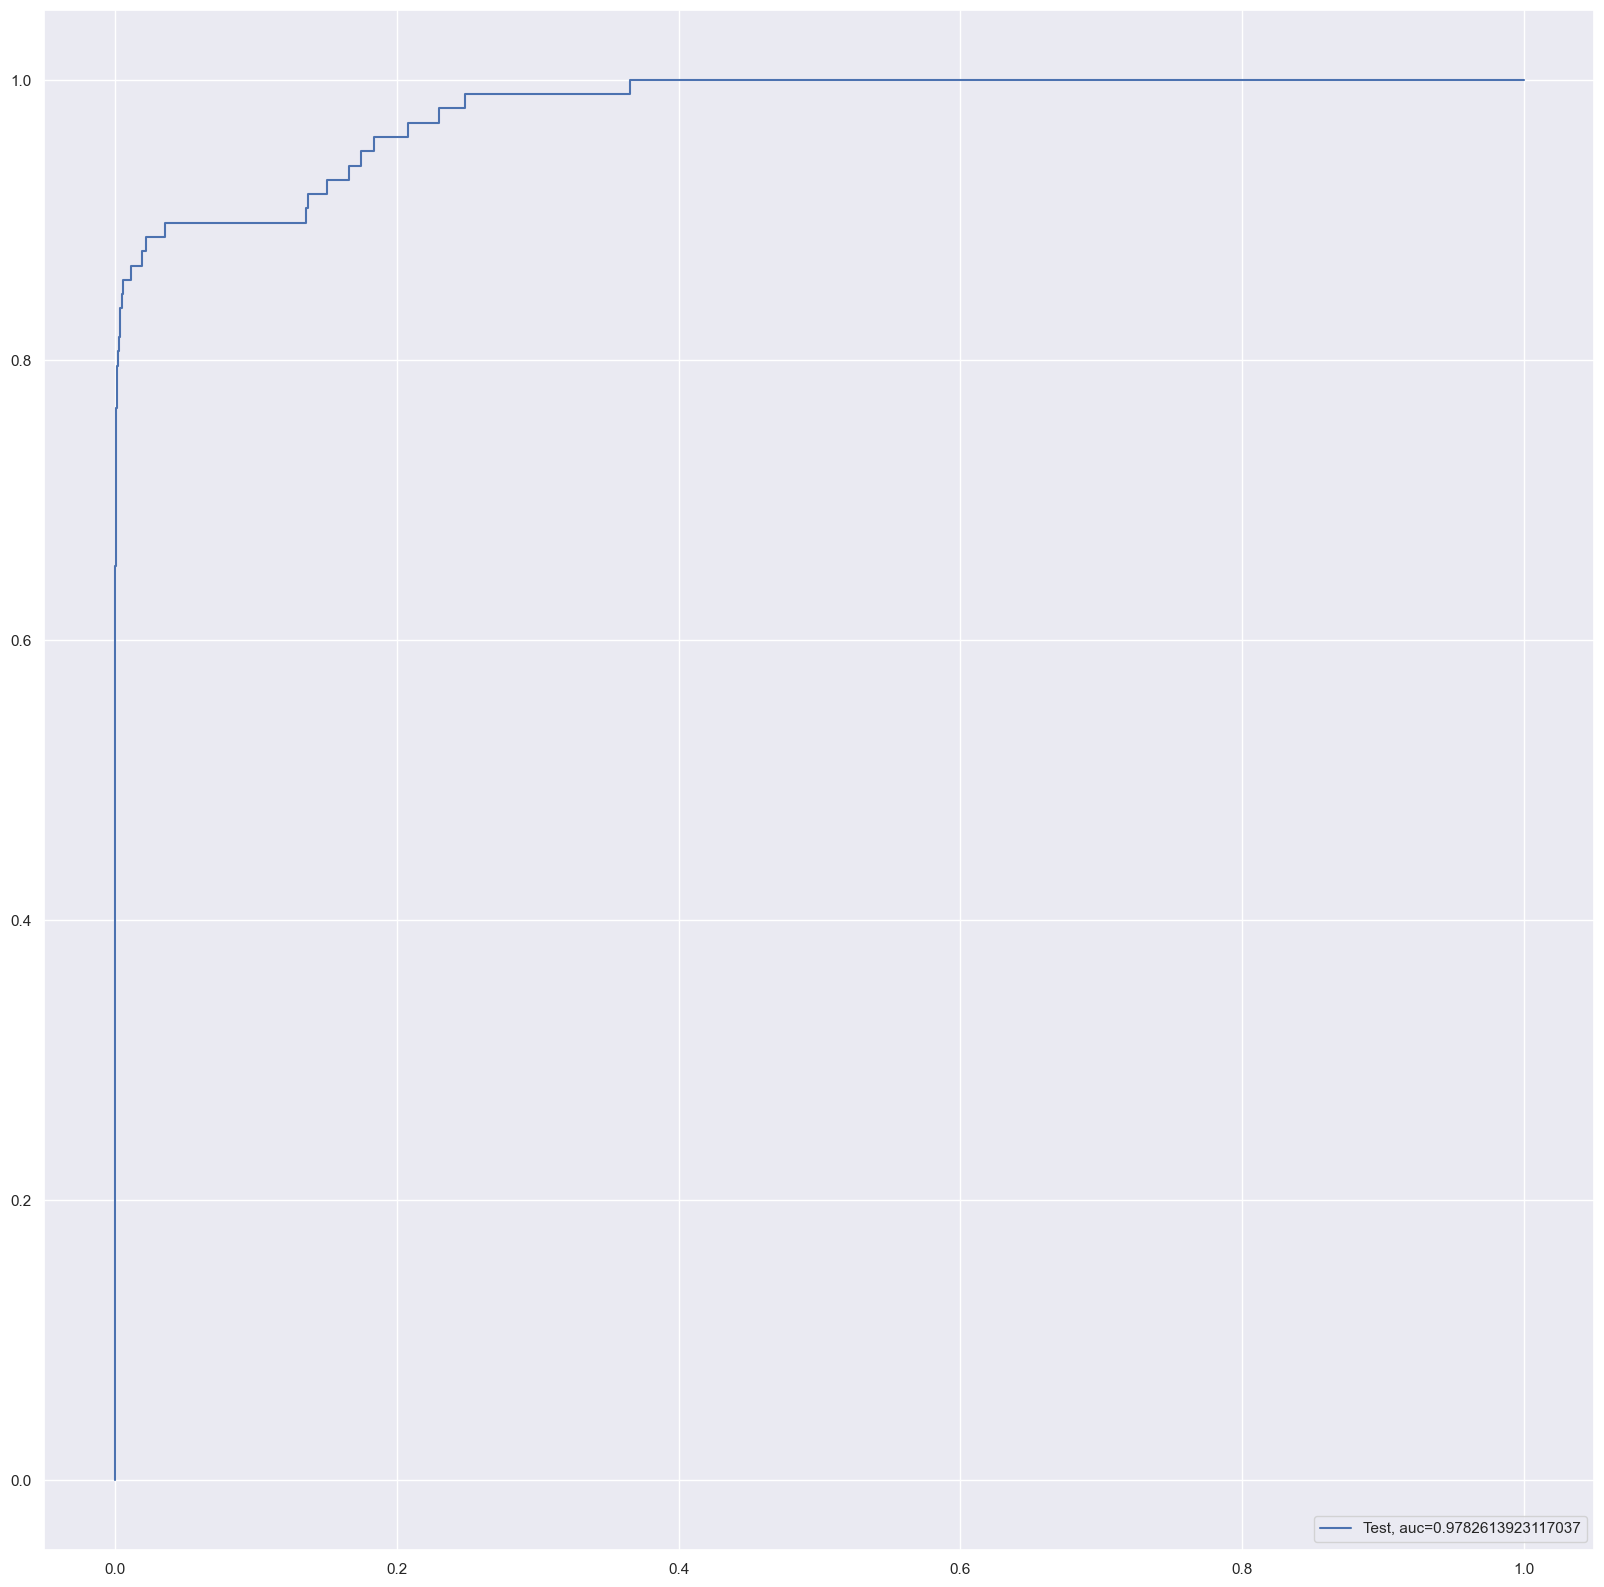

Time Taken by Model: --- 381.96176075935364 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


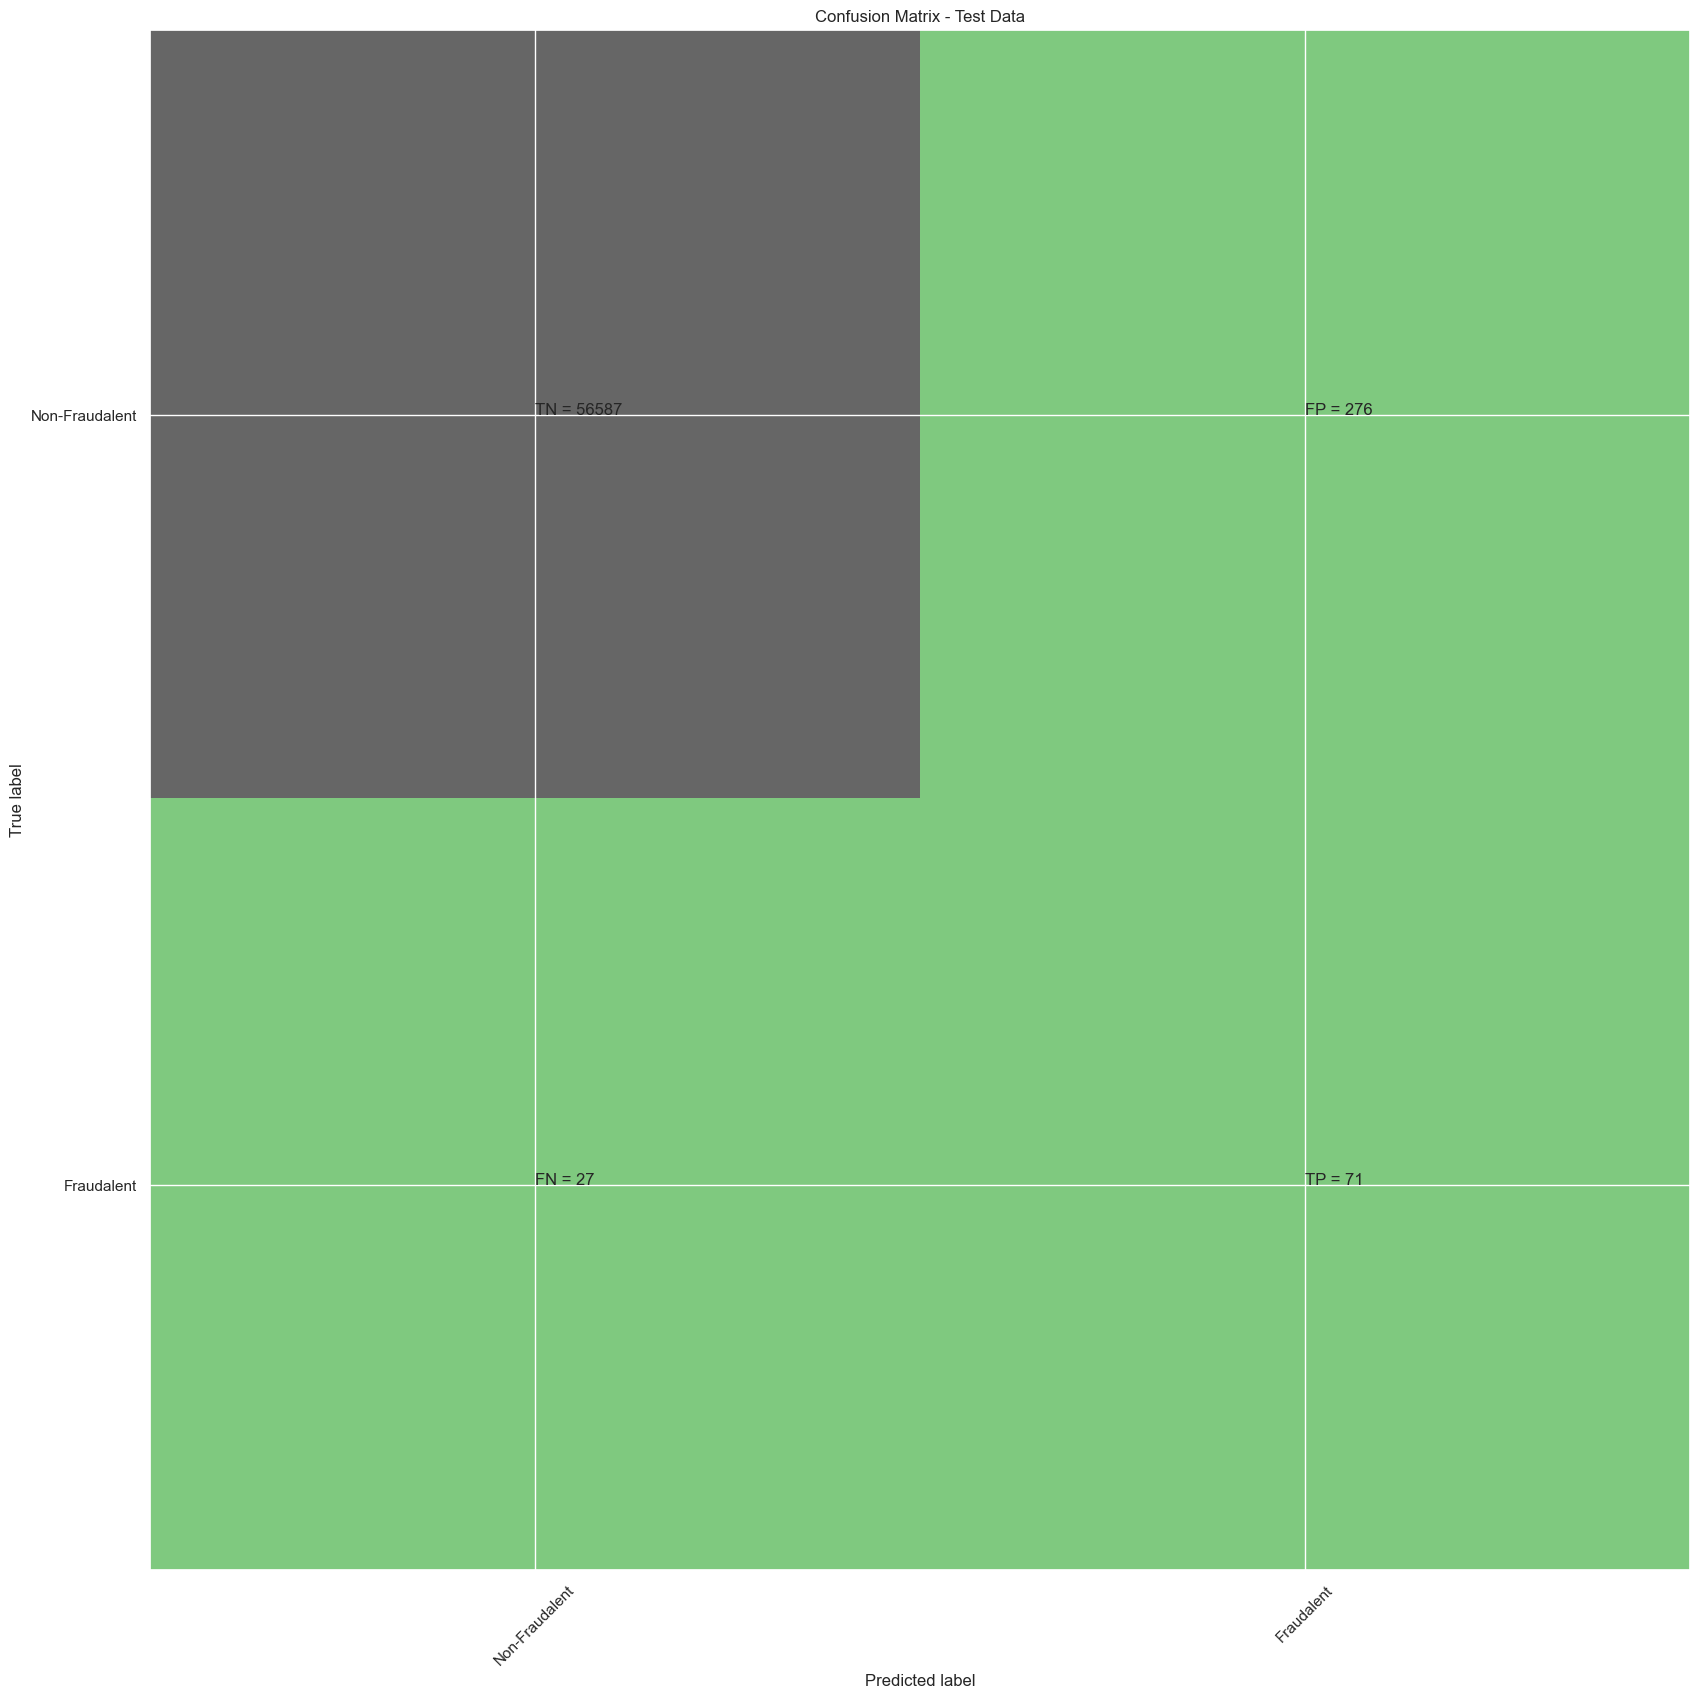

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


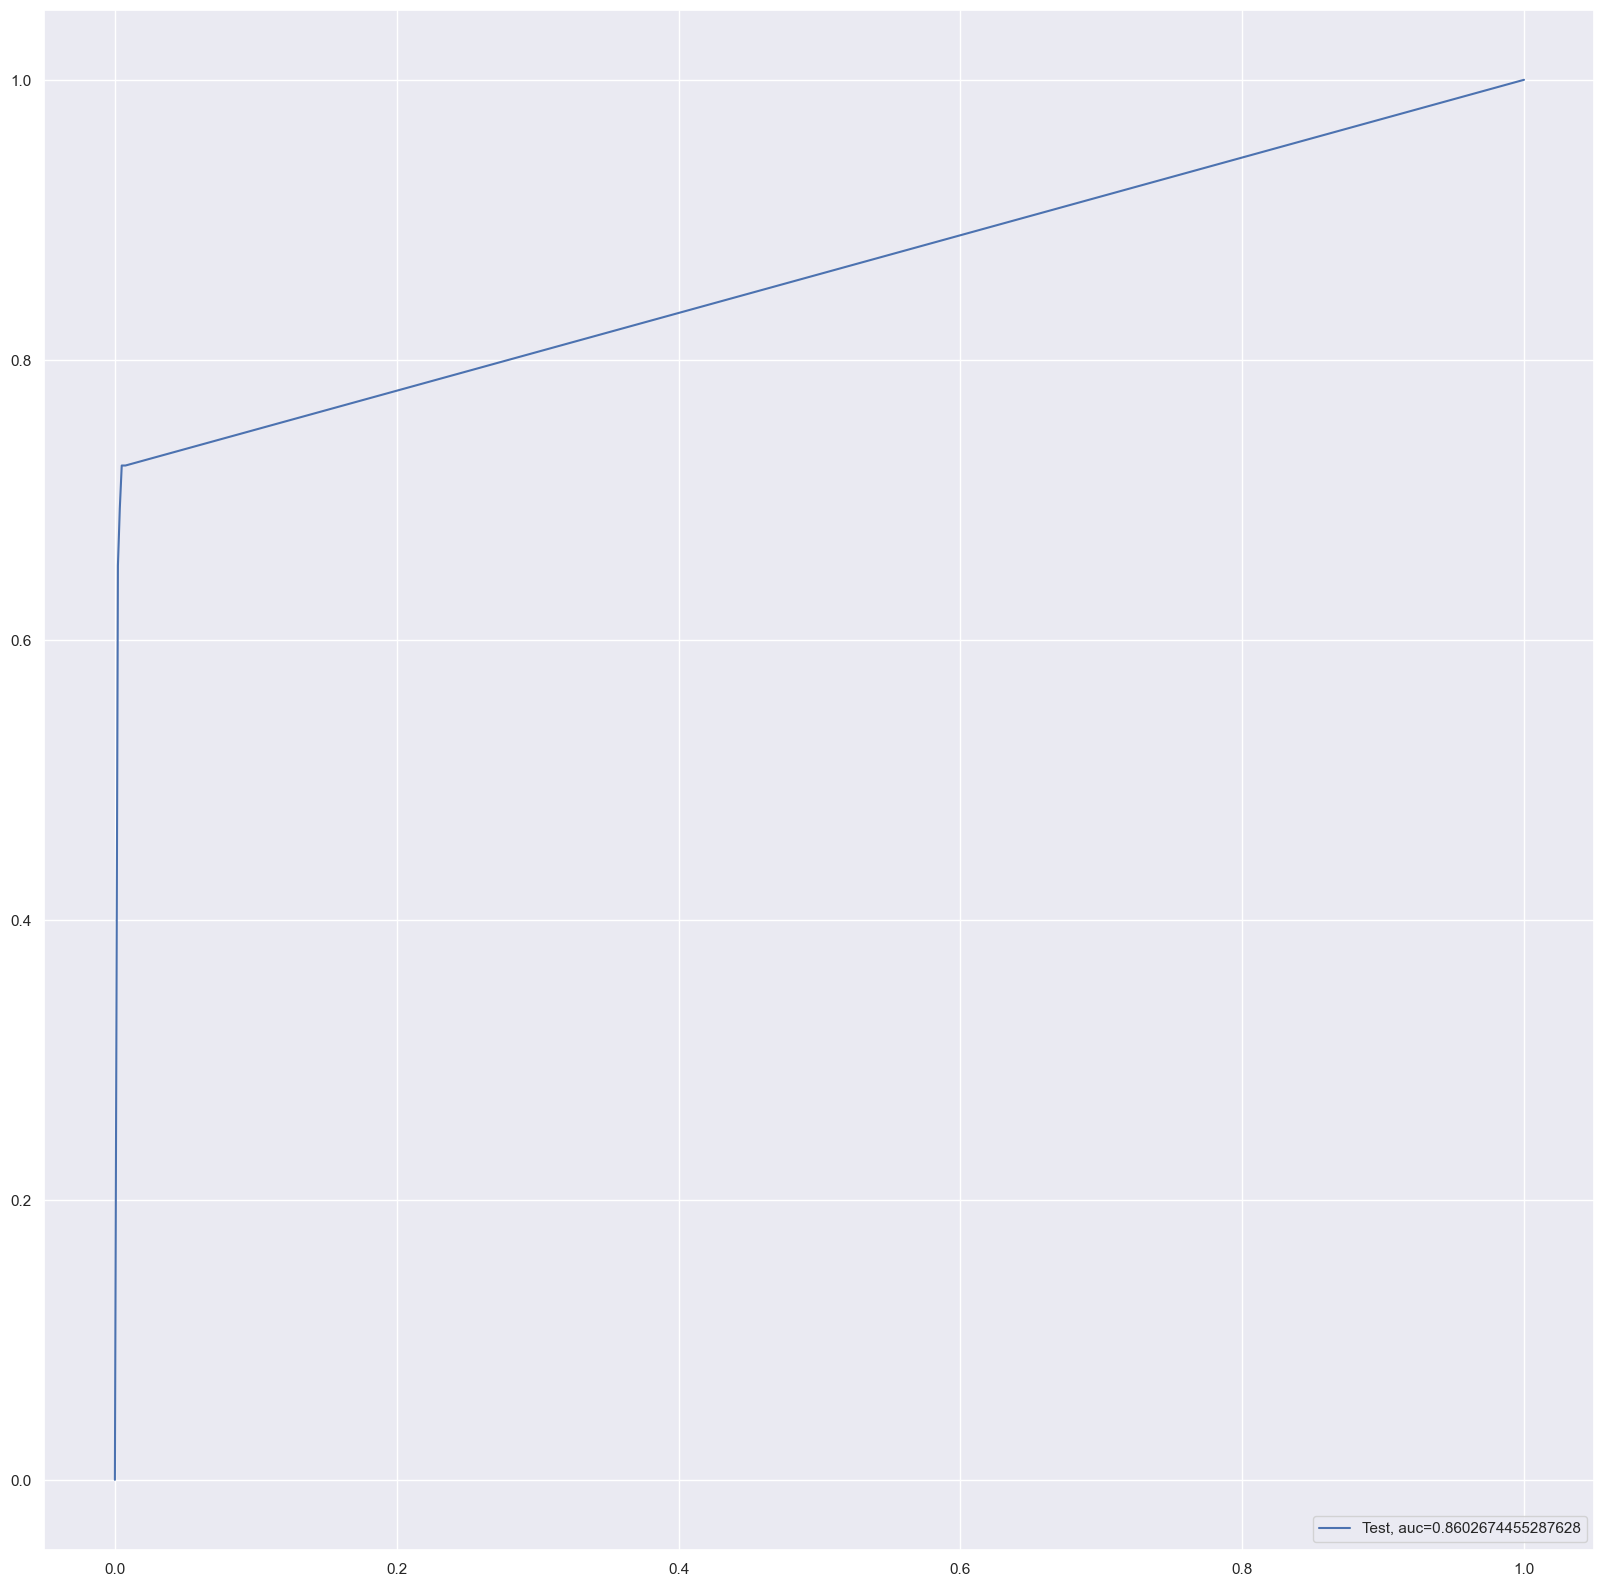

Time Taken by Model: --- 84.95263266563416 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


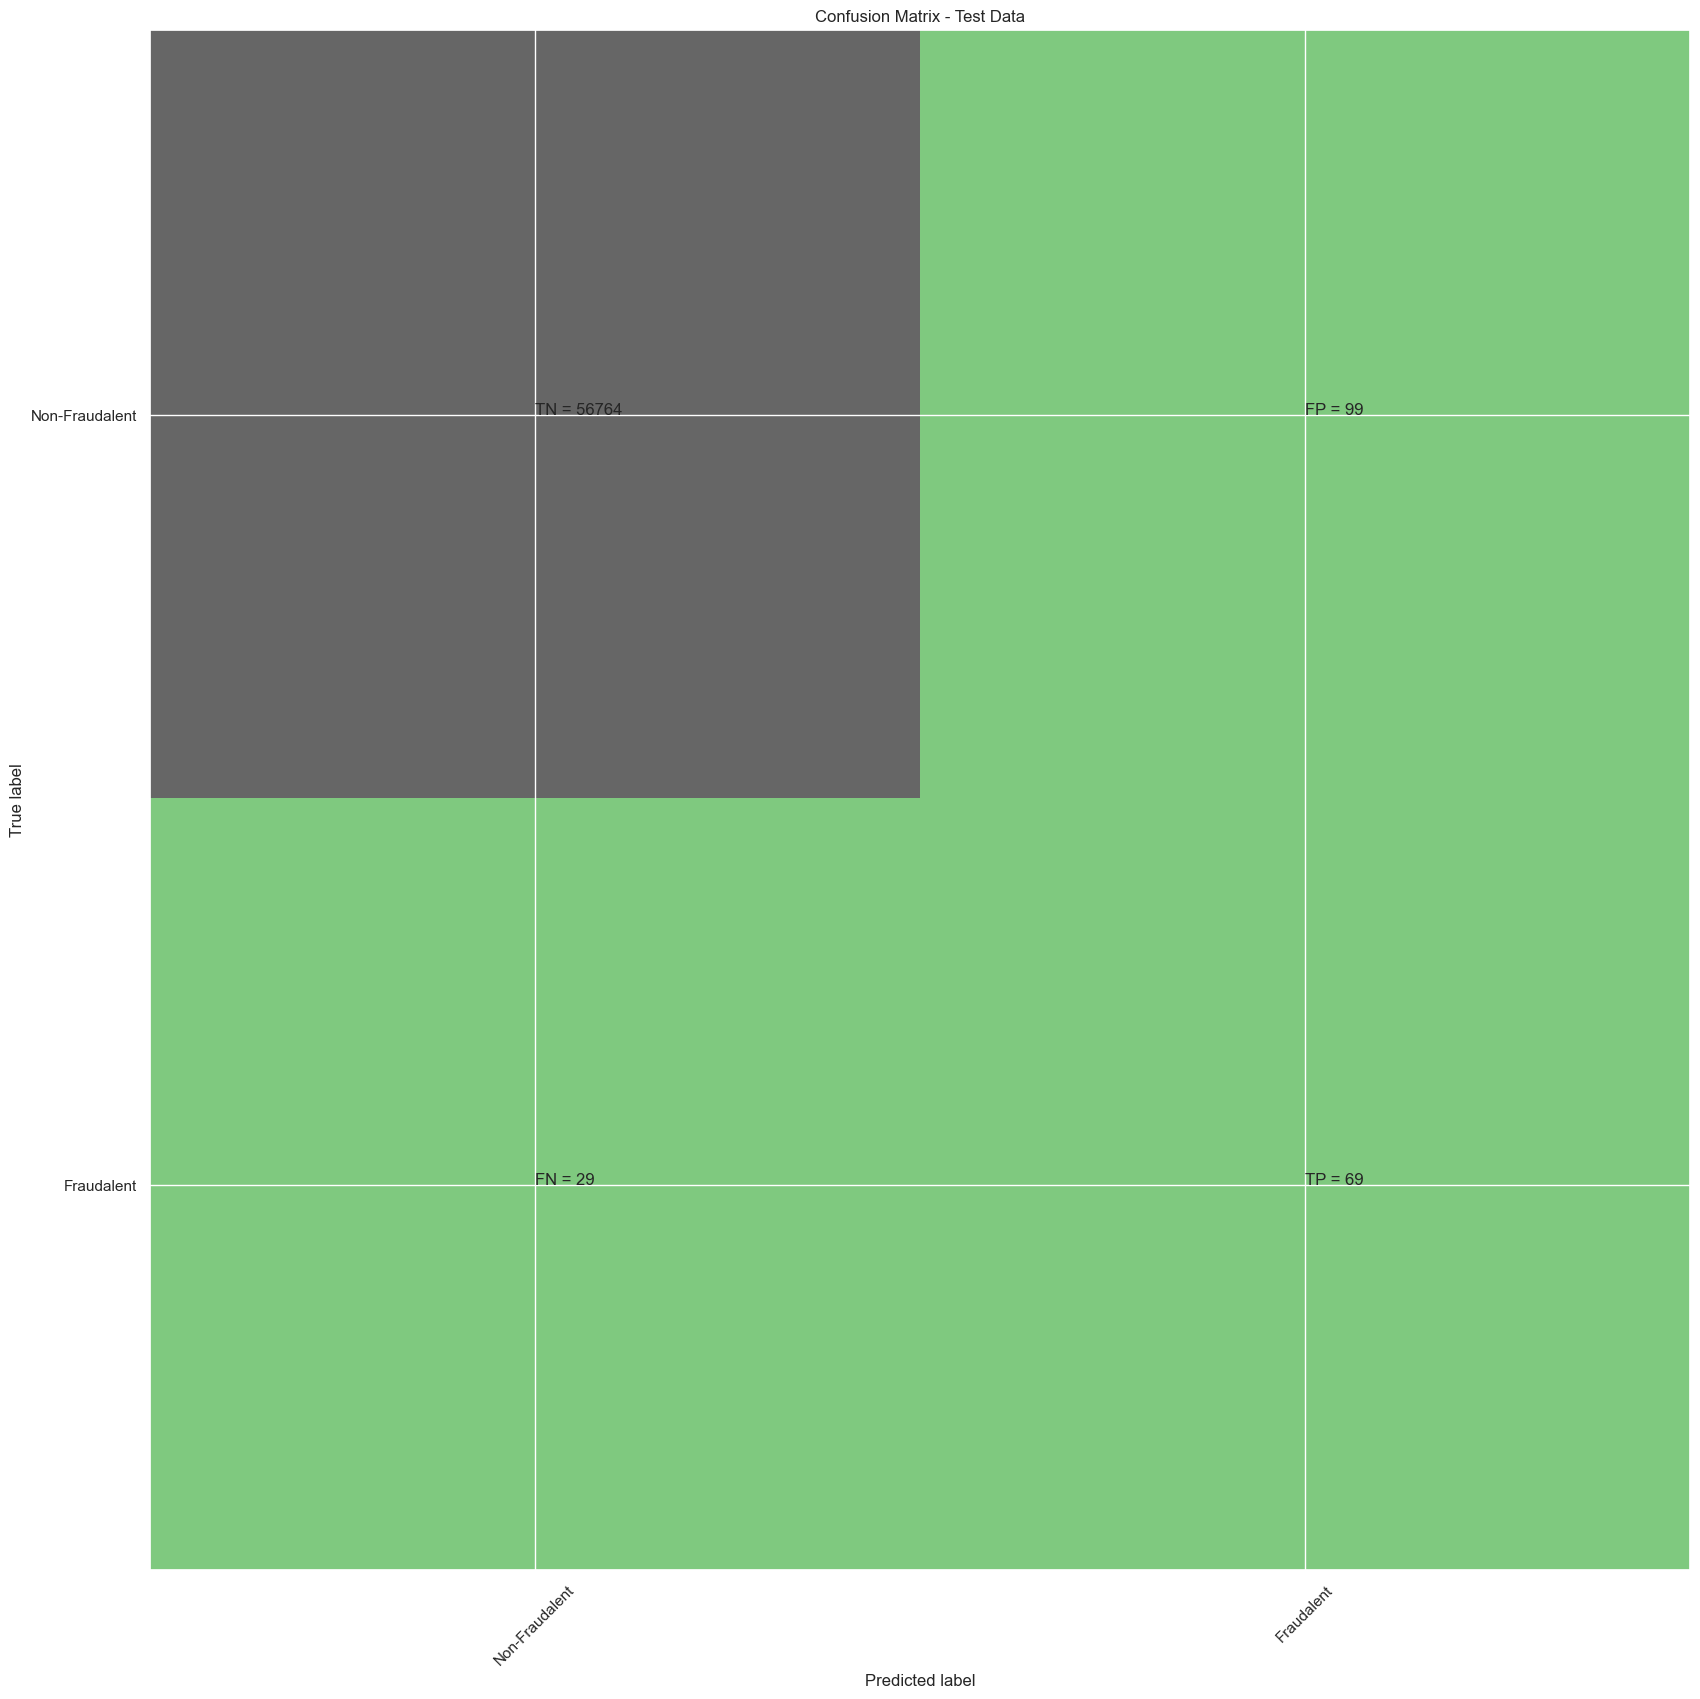

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


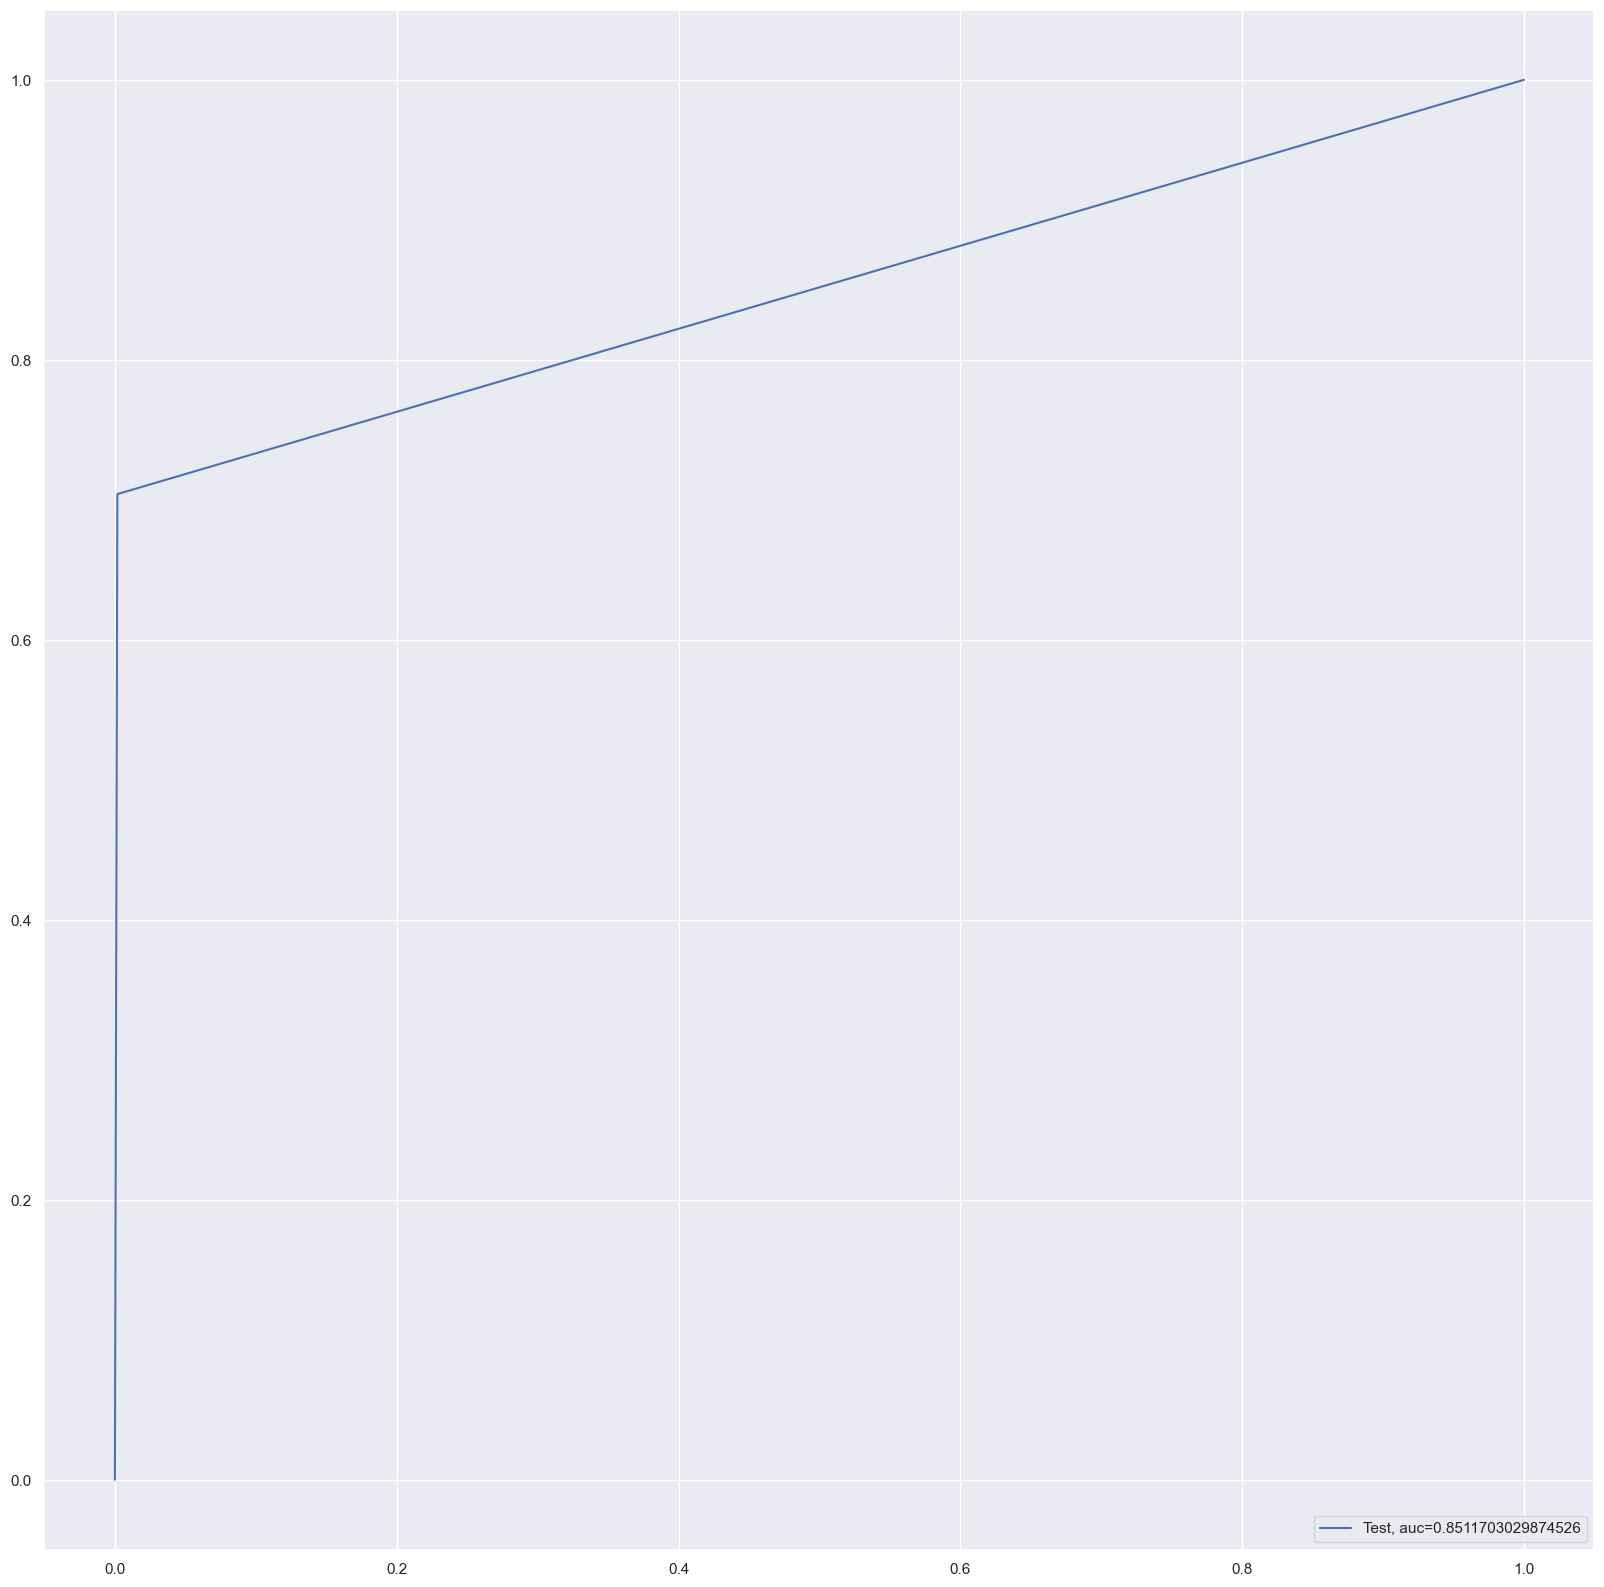

entropy score: 0.9969803900914661
Confusion Matrix


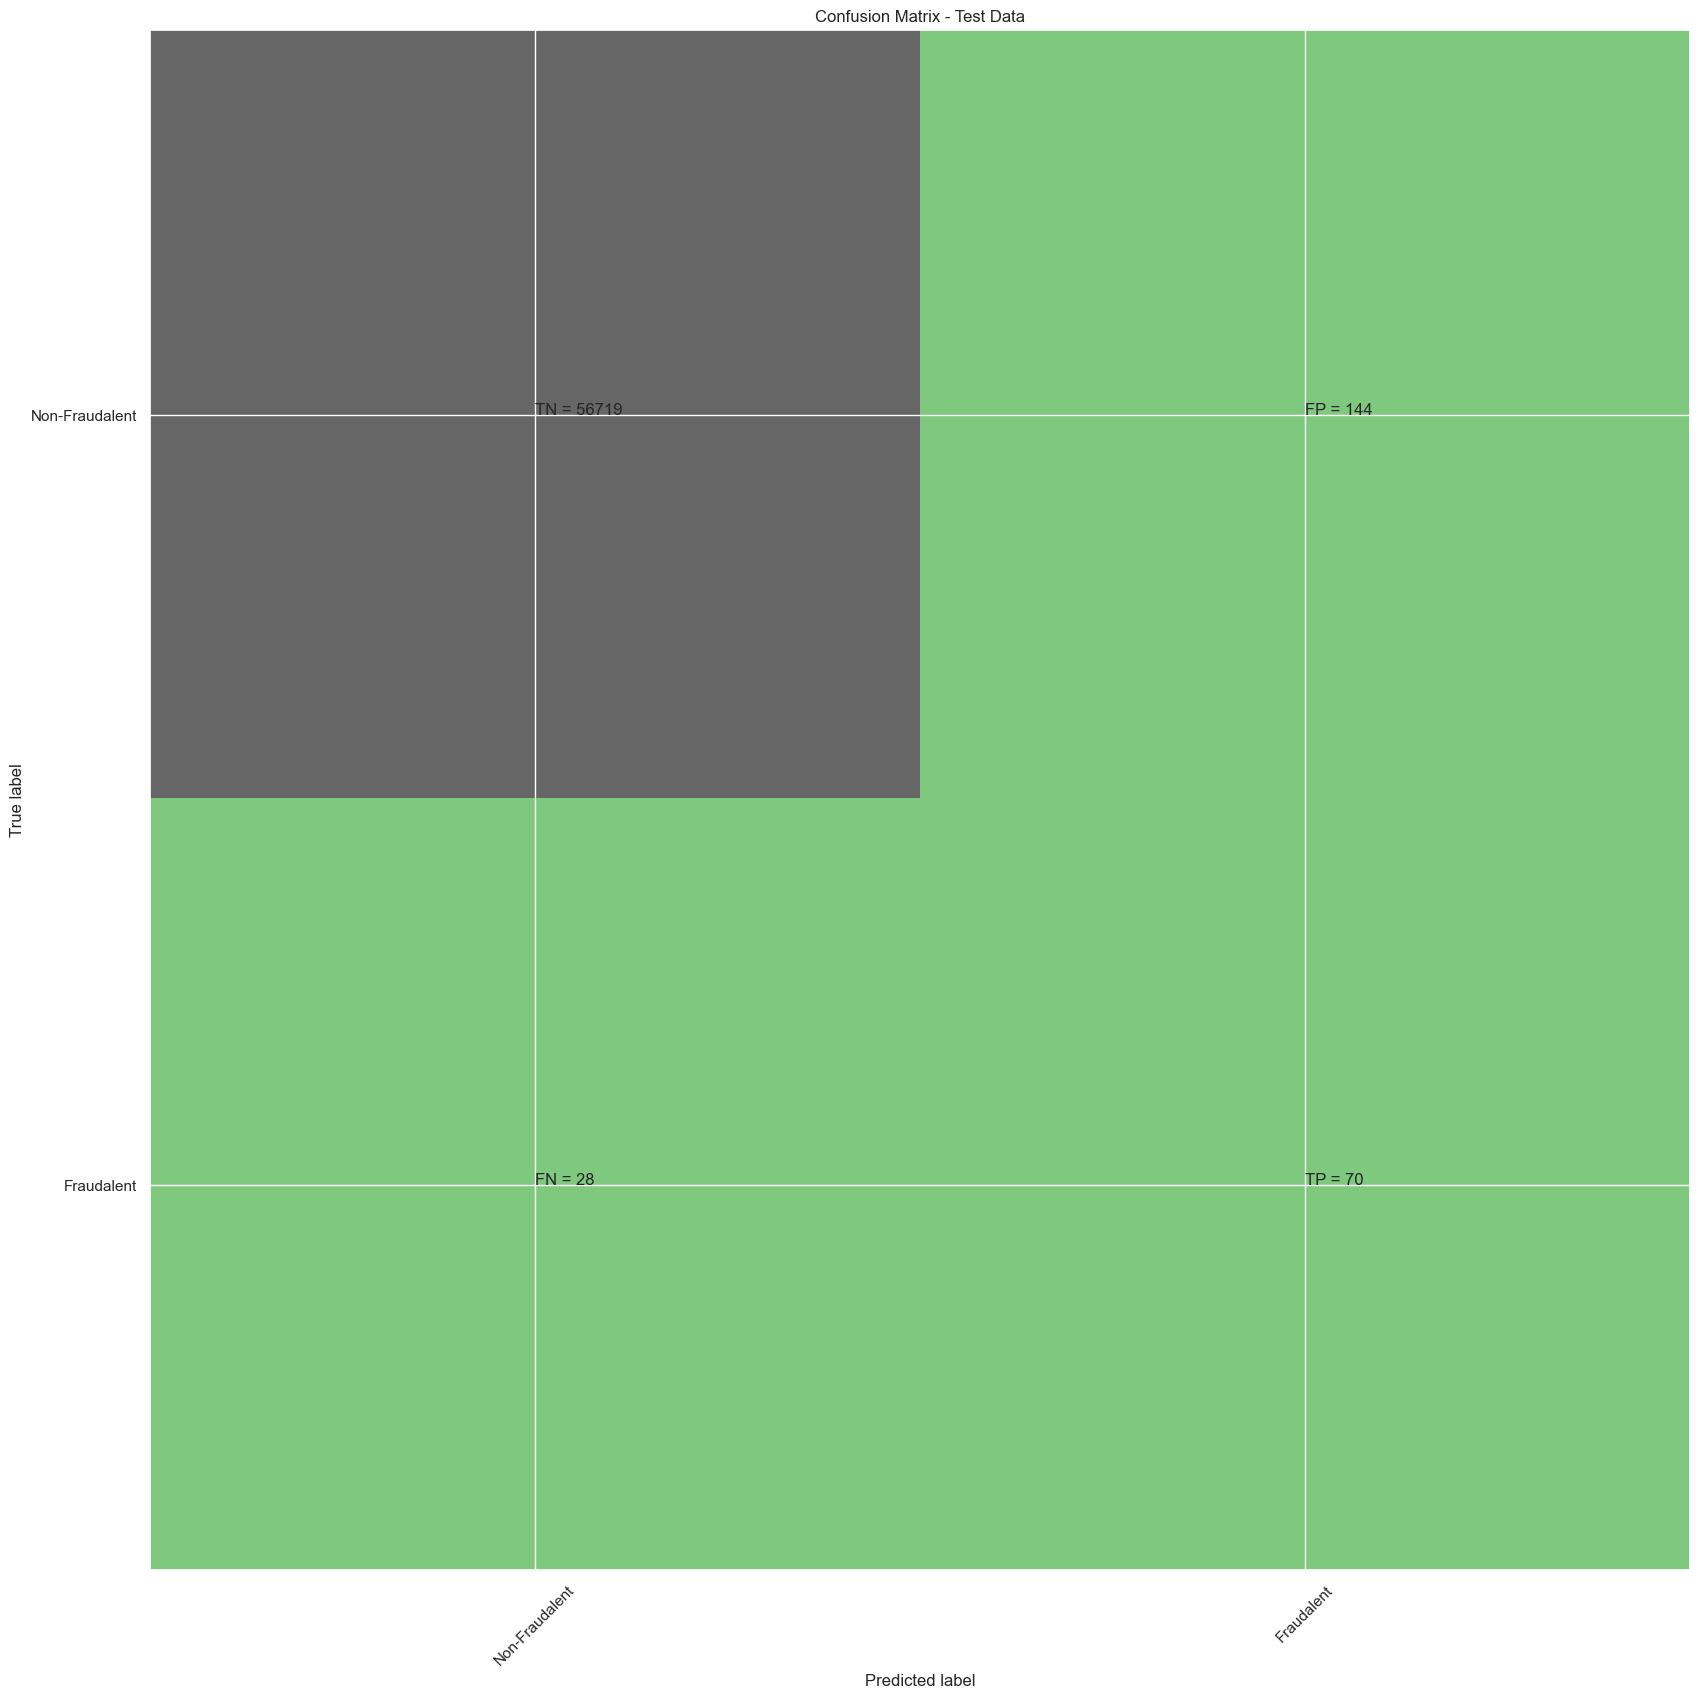

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


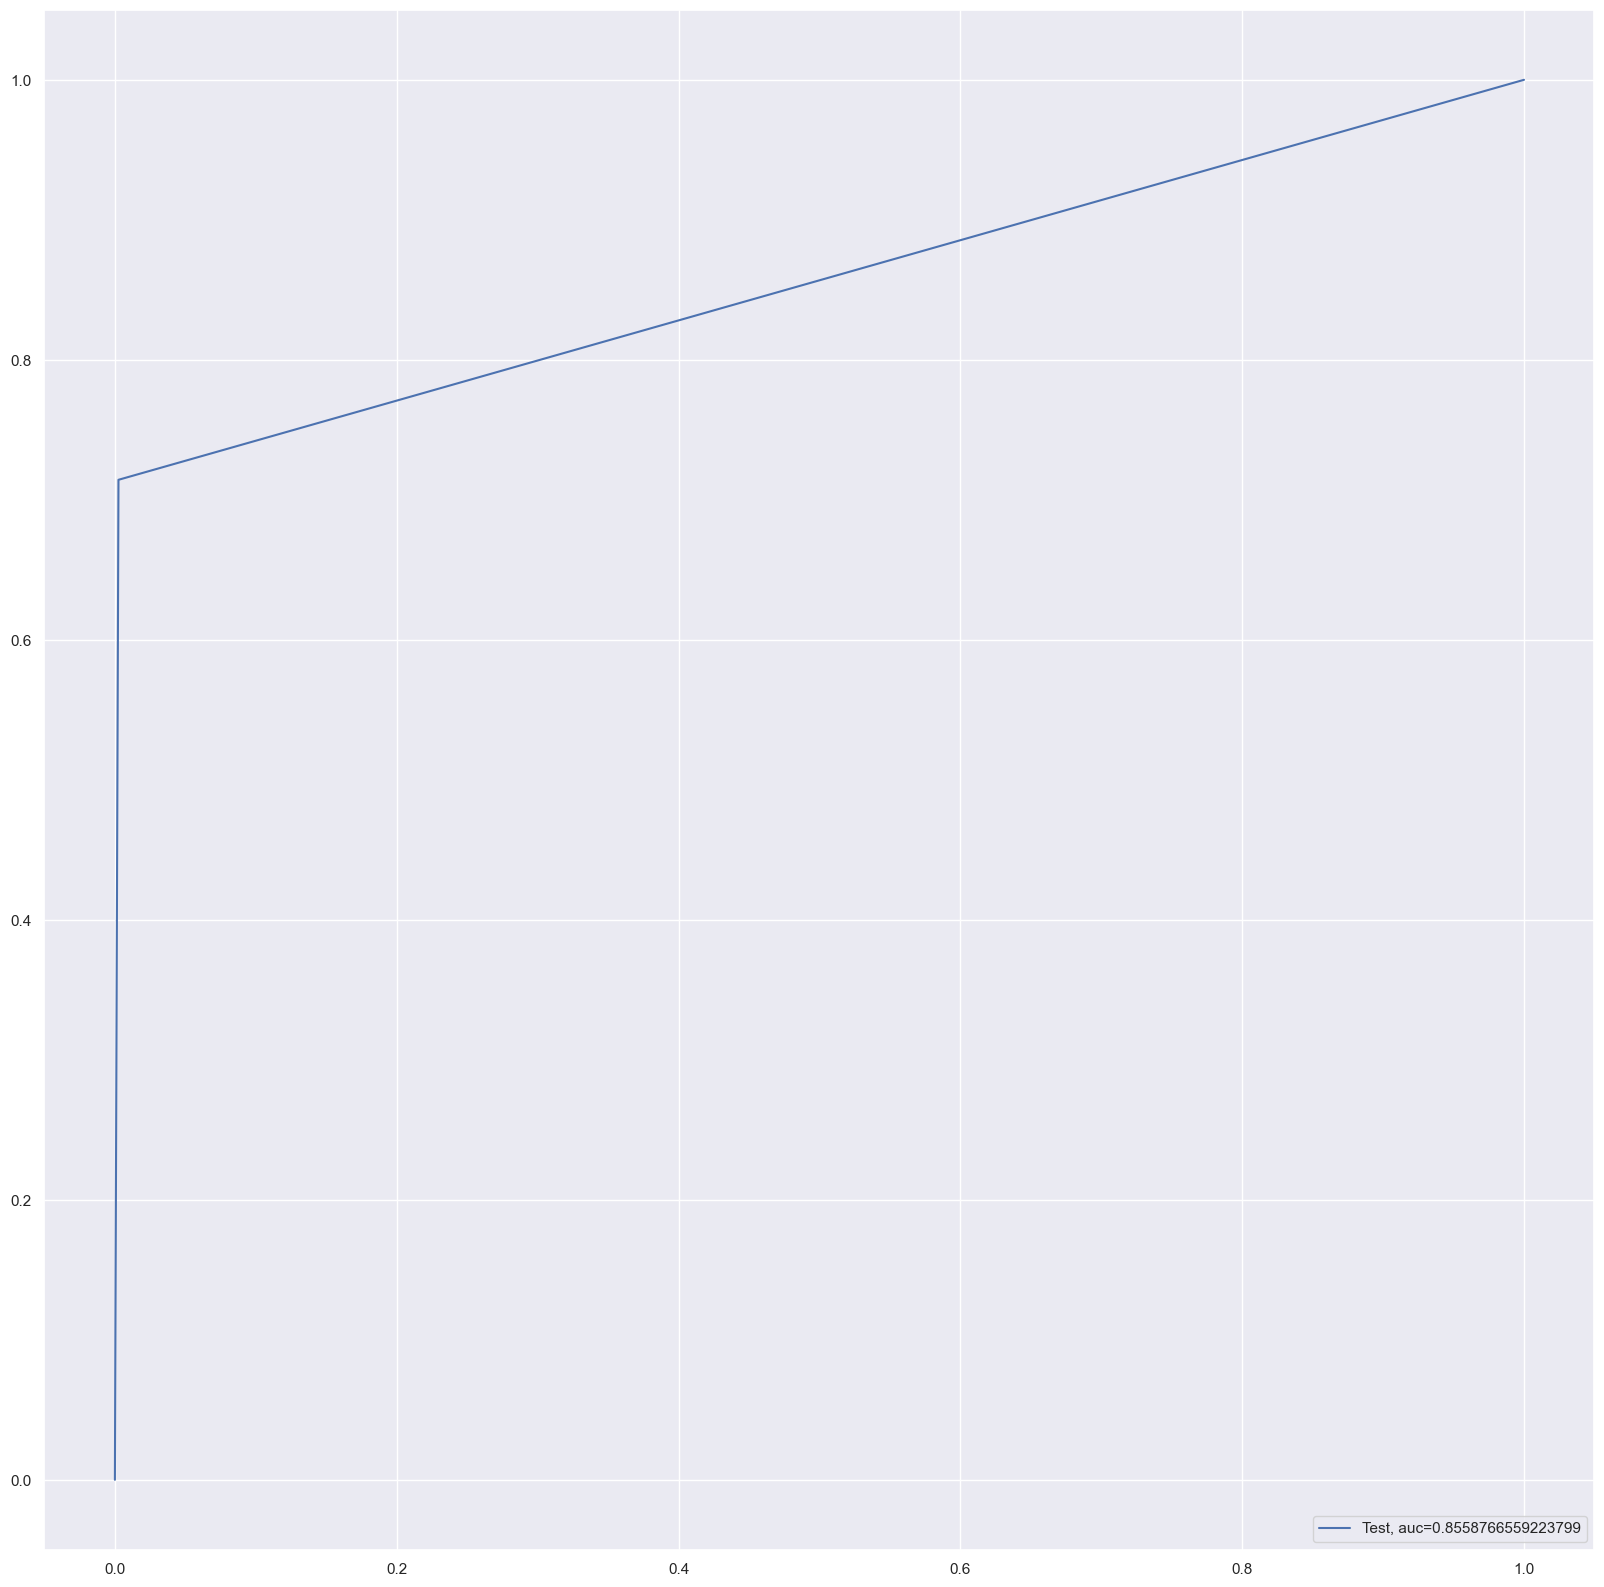

Time Taken by Model: --- 137.97721600532532 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


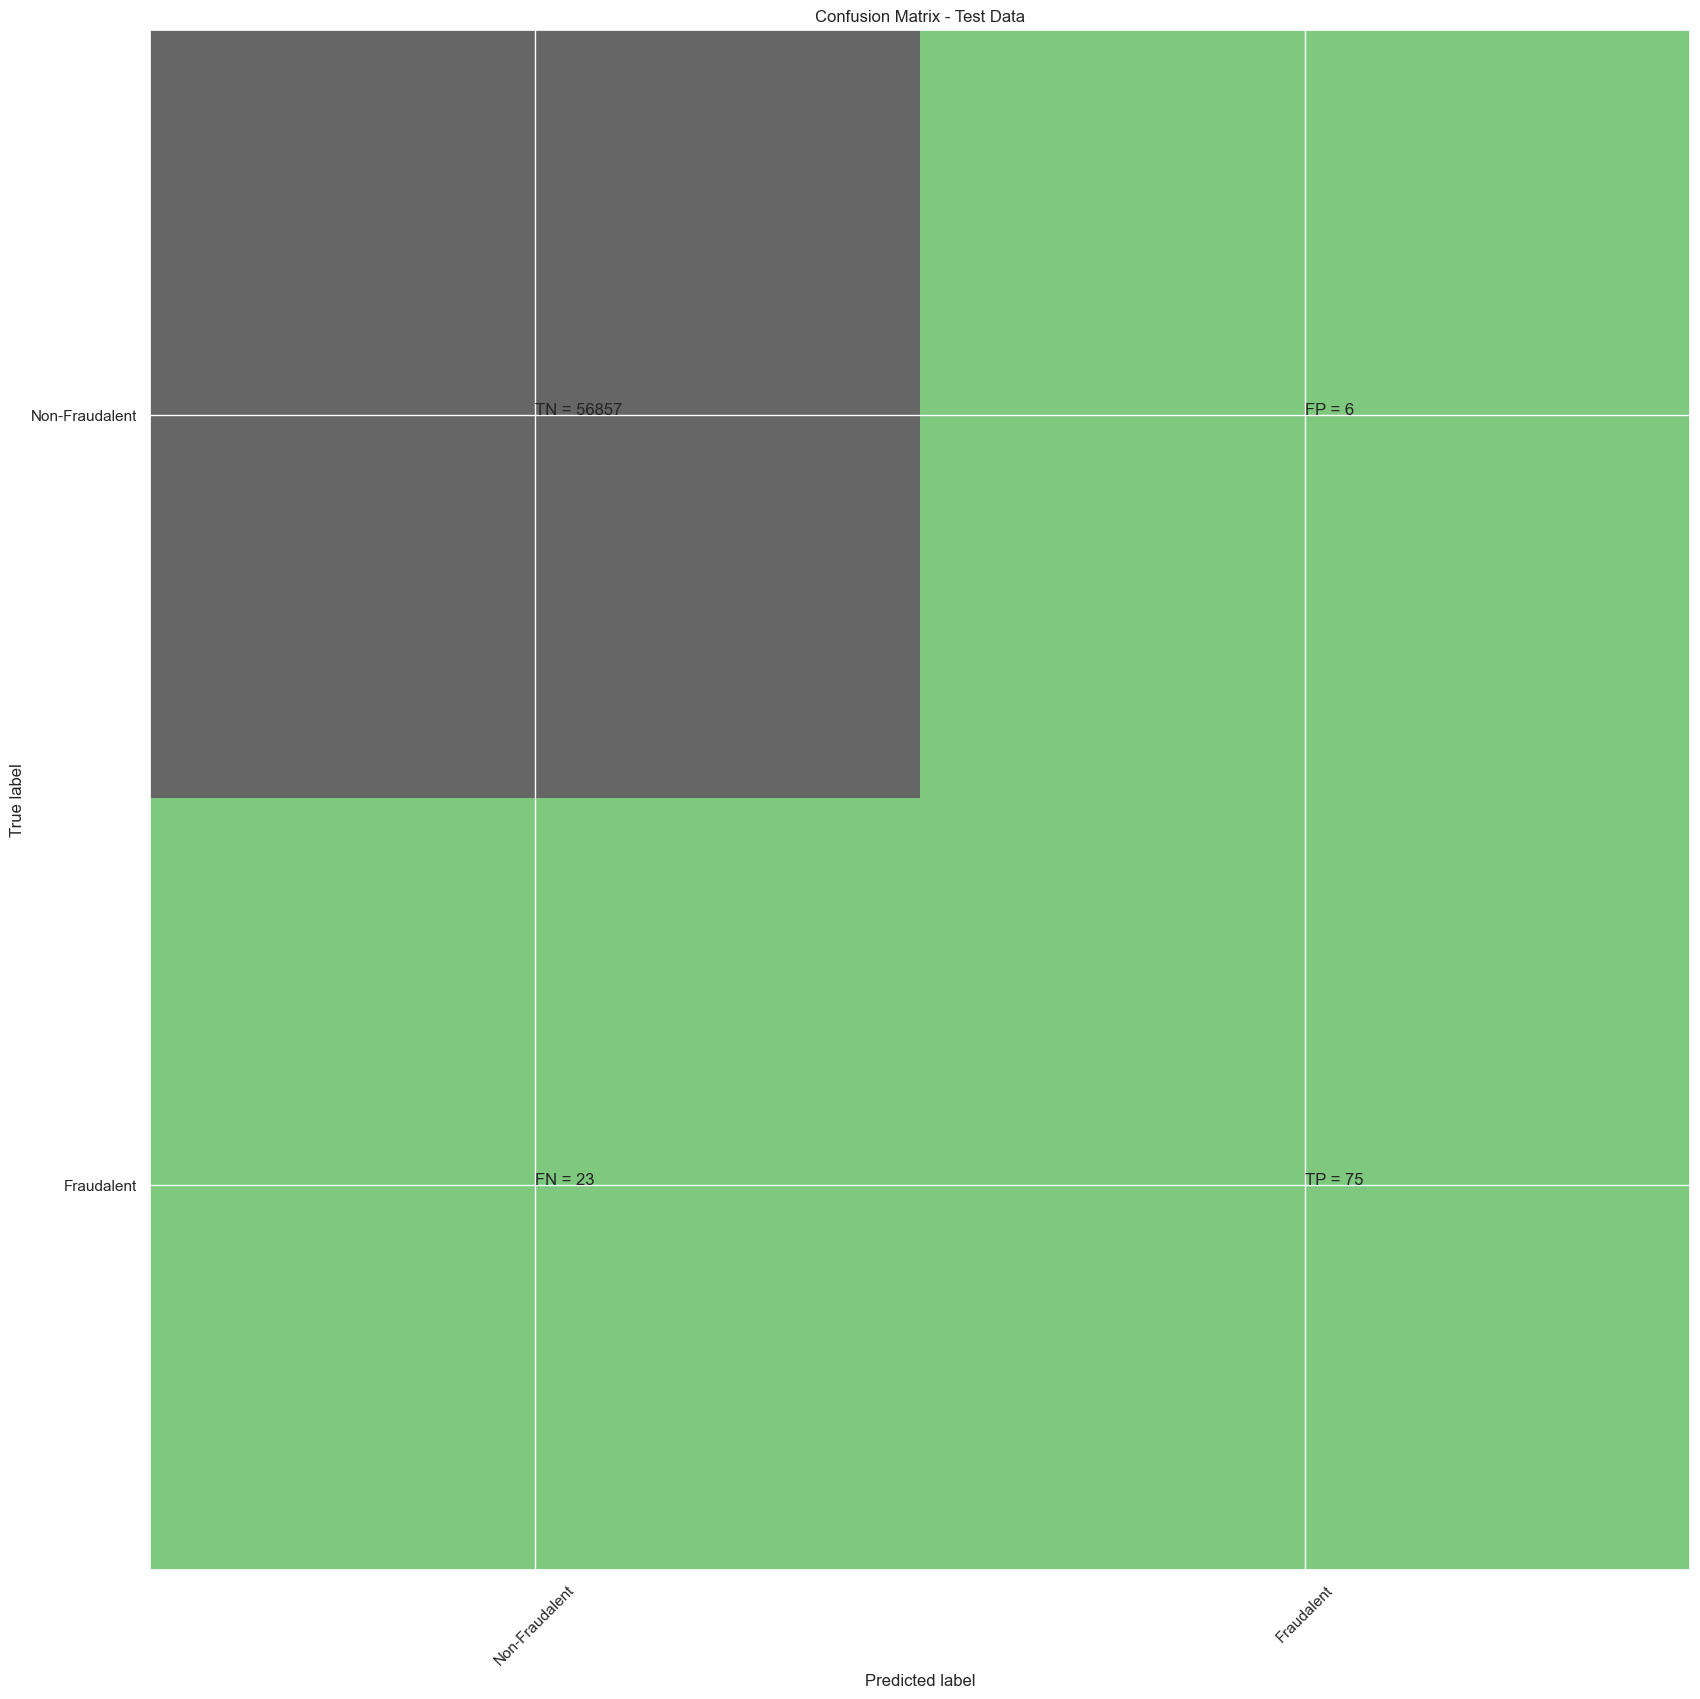

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


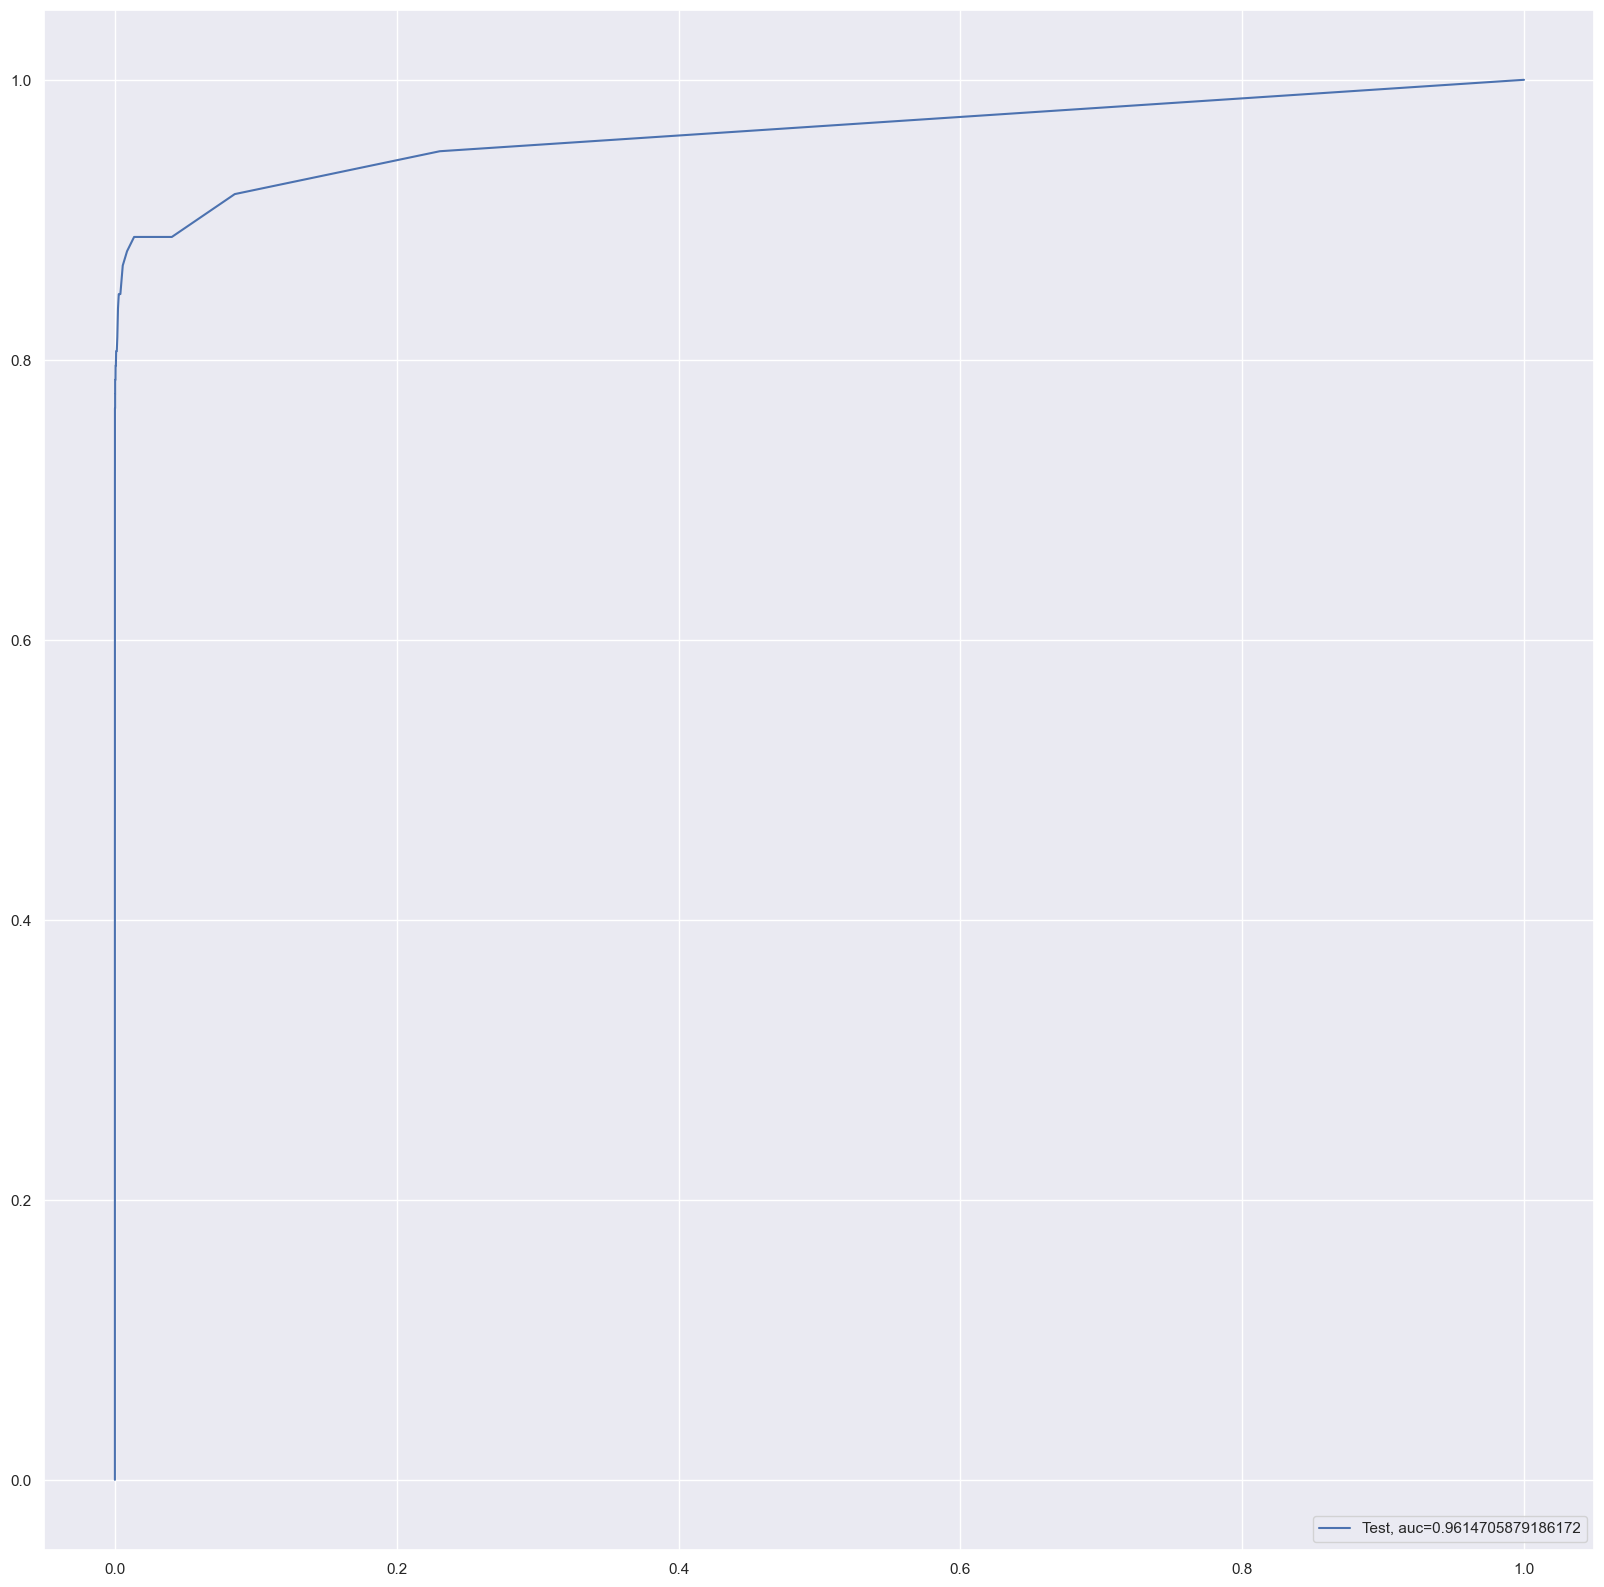

Time Taken by Model: --- 662.6291718482971 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


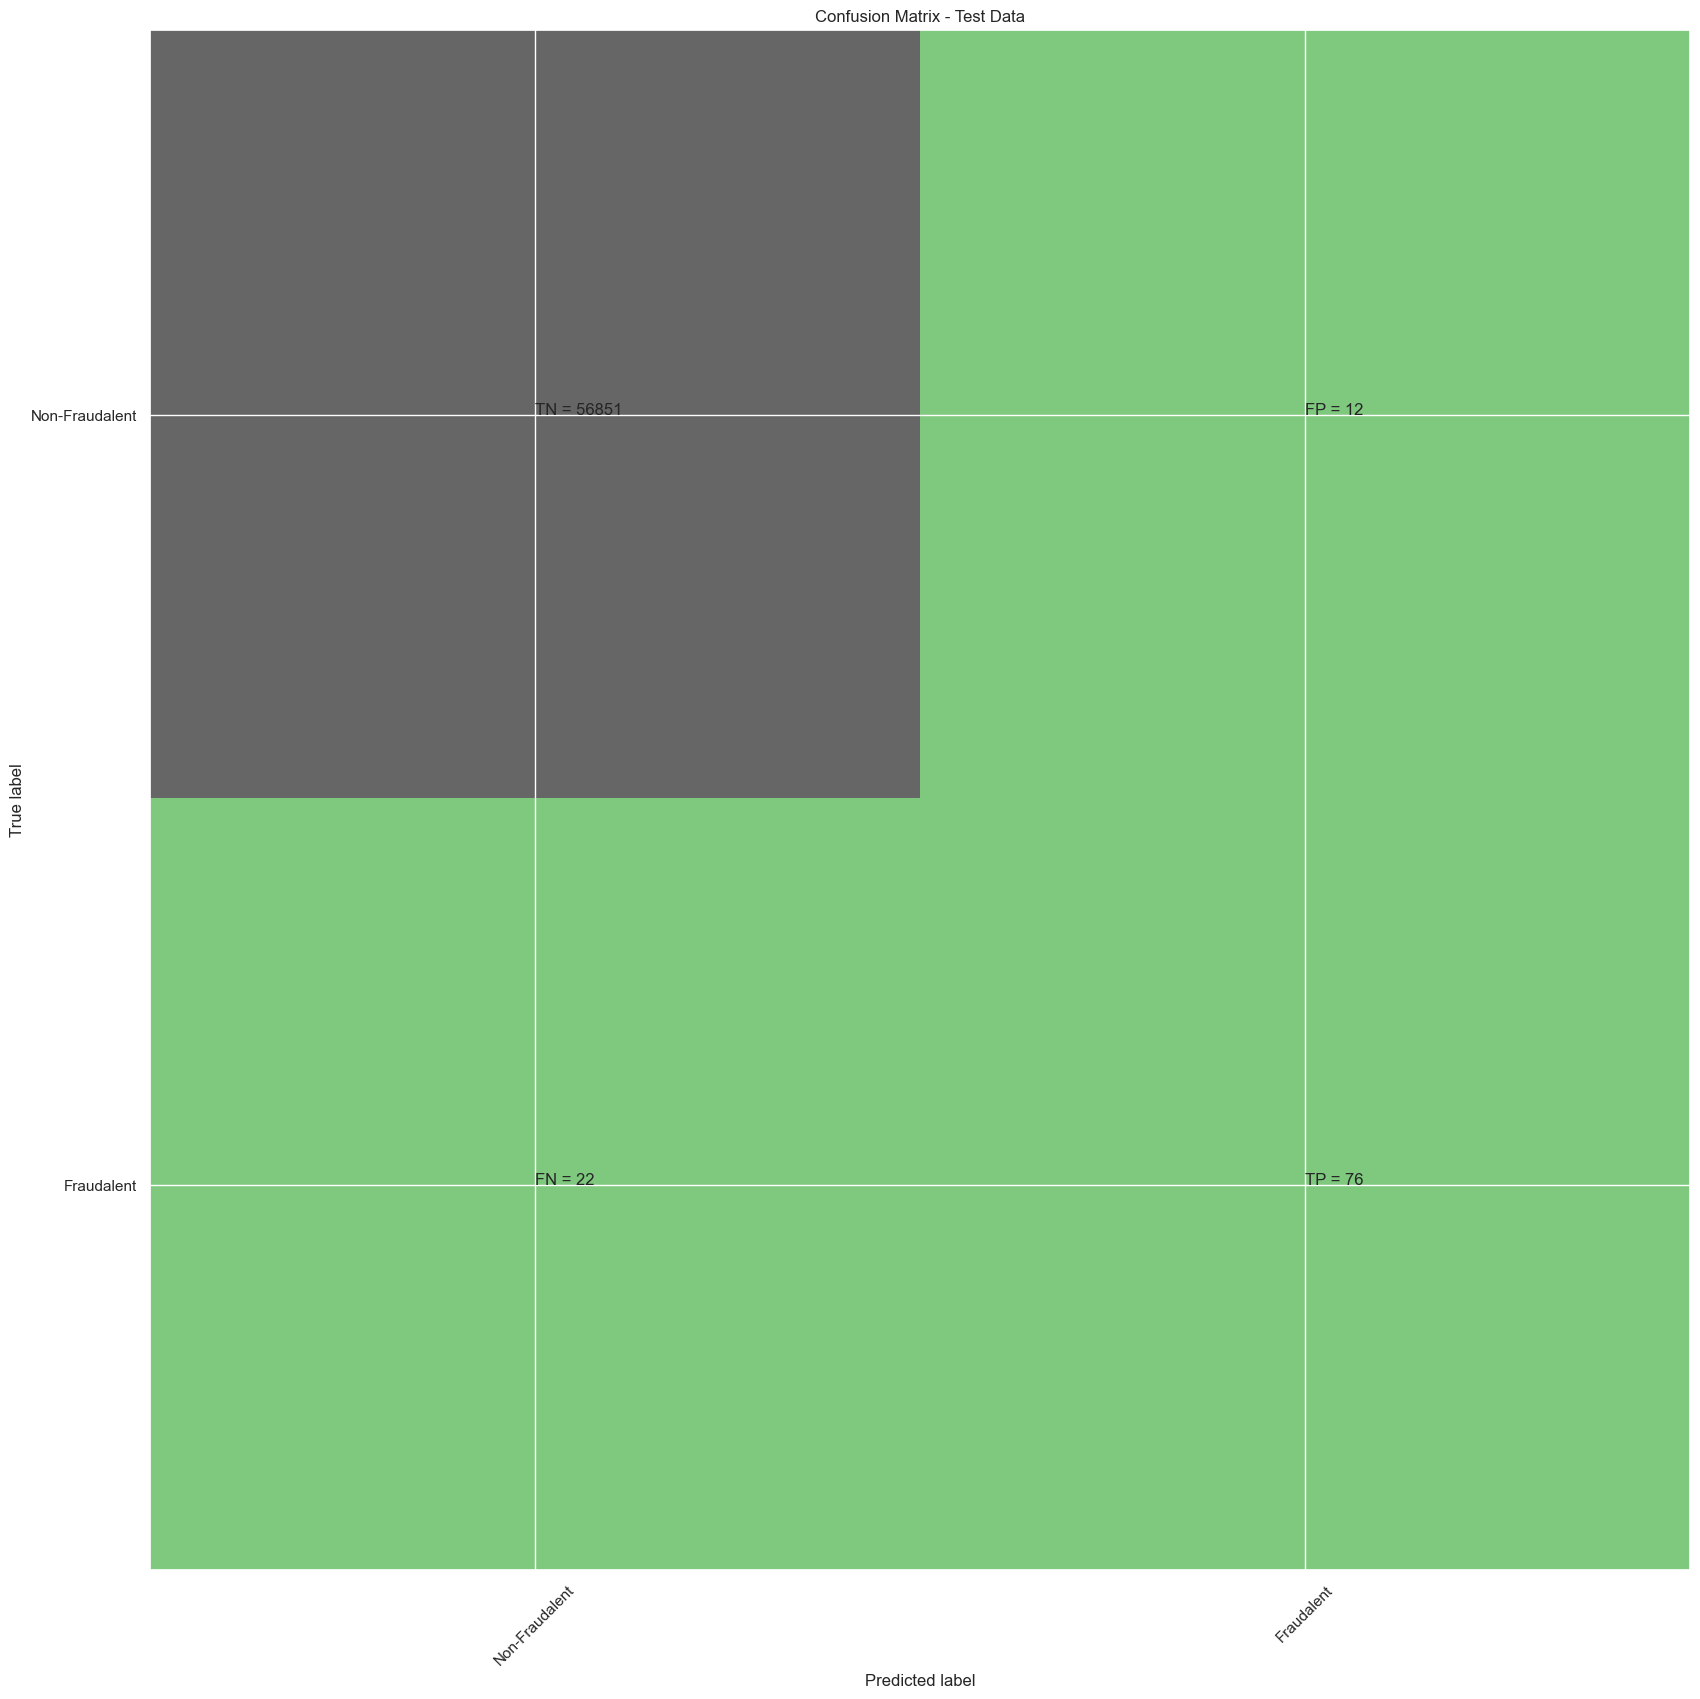

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9704734293344512
XGBoost threshold: 0.000144163059303537
ROC for the test dataset 97.0%


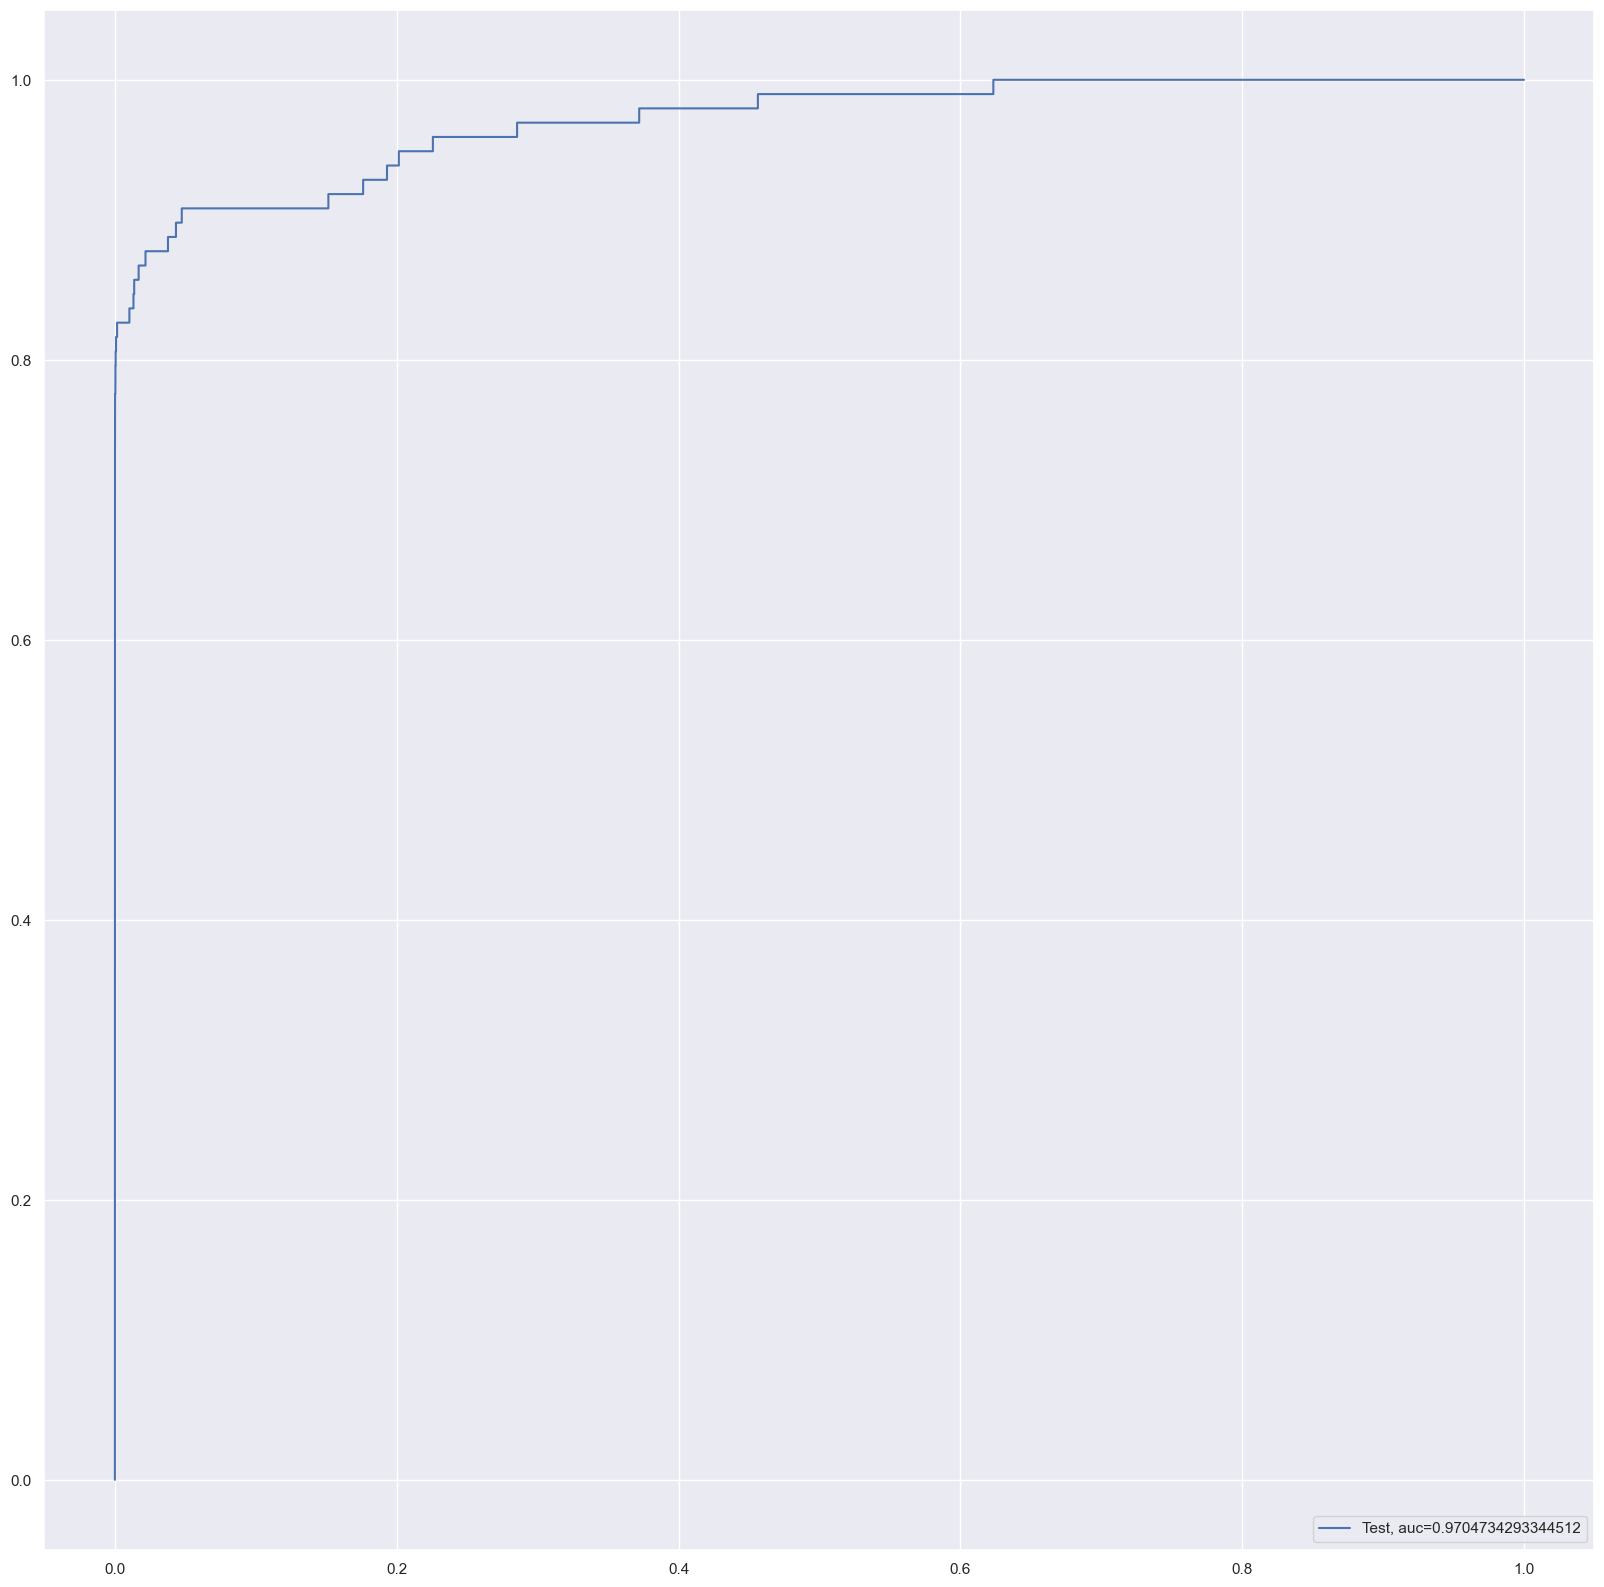

Time Taken by Model: --- 3.6180551052093506 seconds ---
--------------------------------------------------------------------------------


In [74]:
Data_Imbalance_Handling	 = "SMOTE Oversampling with StratifiedKFold CV "
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [75]:
df_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.968540   0.001560  
1   Logistic Regression with L1 Regularisation  0.998982   0.965627   0.001329  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999298   0.927759   0.000028  
7                                          SVM  0.998560   0.891340   0.000904  
8   Logistic Regression with L2 Regularisation  0.999122   0.992566   0.002032  
9   Logistic Regression with L1 Regularisation  0.999175   0.983179   0.003335  
10                                         KNN  0.999210   0.895014   0.200000  
11               Tree Model with gini criteria  0.999245   0.909313   1.000000  
12            Tree Model with entropy criteria  0.999034   0.885442   1.000000  
13                               Random Forest  0.999579   0.955608   0.010000  
14                                     XGBoost  0.999473   0.949421   0.000112  
15                                         SVM  0.998244   0.495080   0.004472  
16  Logistic Regression with L2 Regularisation  0.998631   0.984276   0.001819  
17  Logistic Regression with L1 Regularisation  0.998947   0.957168   0.001763  
18                                       

#### **_Results for SMOTE Oversampling:_**

Based on the `Accuracy and ROC values`, `XGBoost` has delivered the `best results` when using the `SMOTE oversampling technique`.

---

### <code style="background:#fff4e6;color:black">4.6.3 Handling Class Imbalance with ADASYN Oversampling</code>

##### `Class Distribution Analysis`
- Initially, we will examine the class distribution both before and after applying ADASYN Oversampling.

##### `Cross-Validation with StratifiedKFold`
- Next, we will utilize ADASYN Oversampling in conjunction with StratifiedKFold cross-validation to create train and test datasets.

##### `Model Training and Evaluation`
- Following dataset preparation, we will proceed to train and evaluate the performance of the following models using the oversampled datasets:
  - Logistic Regression with L2 Regularization
  - Logistic Regression with L1 Regularization
  - K-Nearest Neighbors (KNN)
  - Decision Tree with Gini Criterion
  - Decision Tree with Entropy Criterion
  - Random Forest
  - XGBoost

##### `Model Comparison`
- Finally, we will compare the results obtained from these models and select the optimal model based on performance using the ADASYN Oversampling technique.

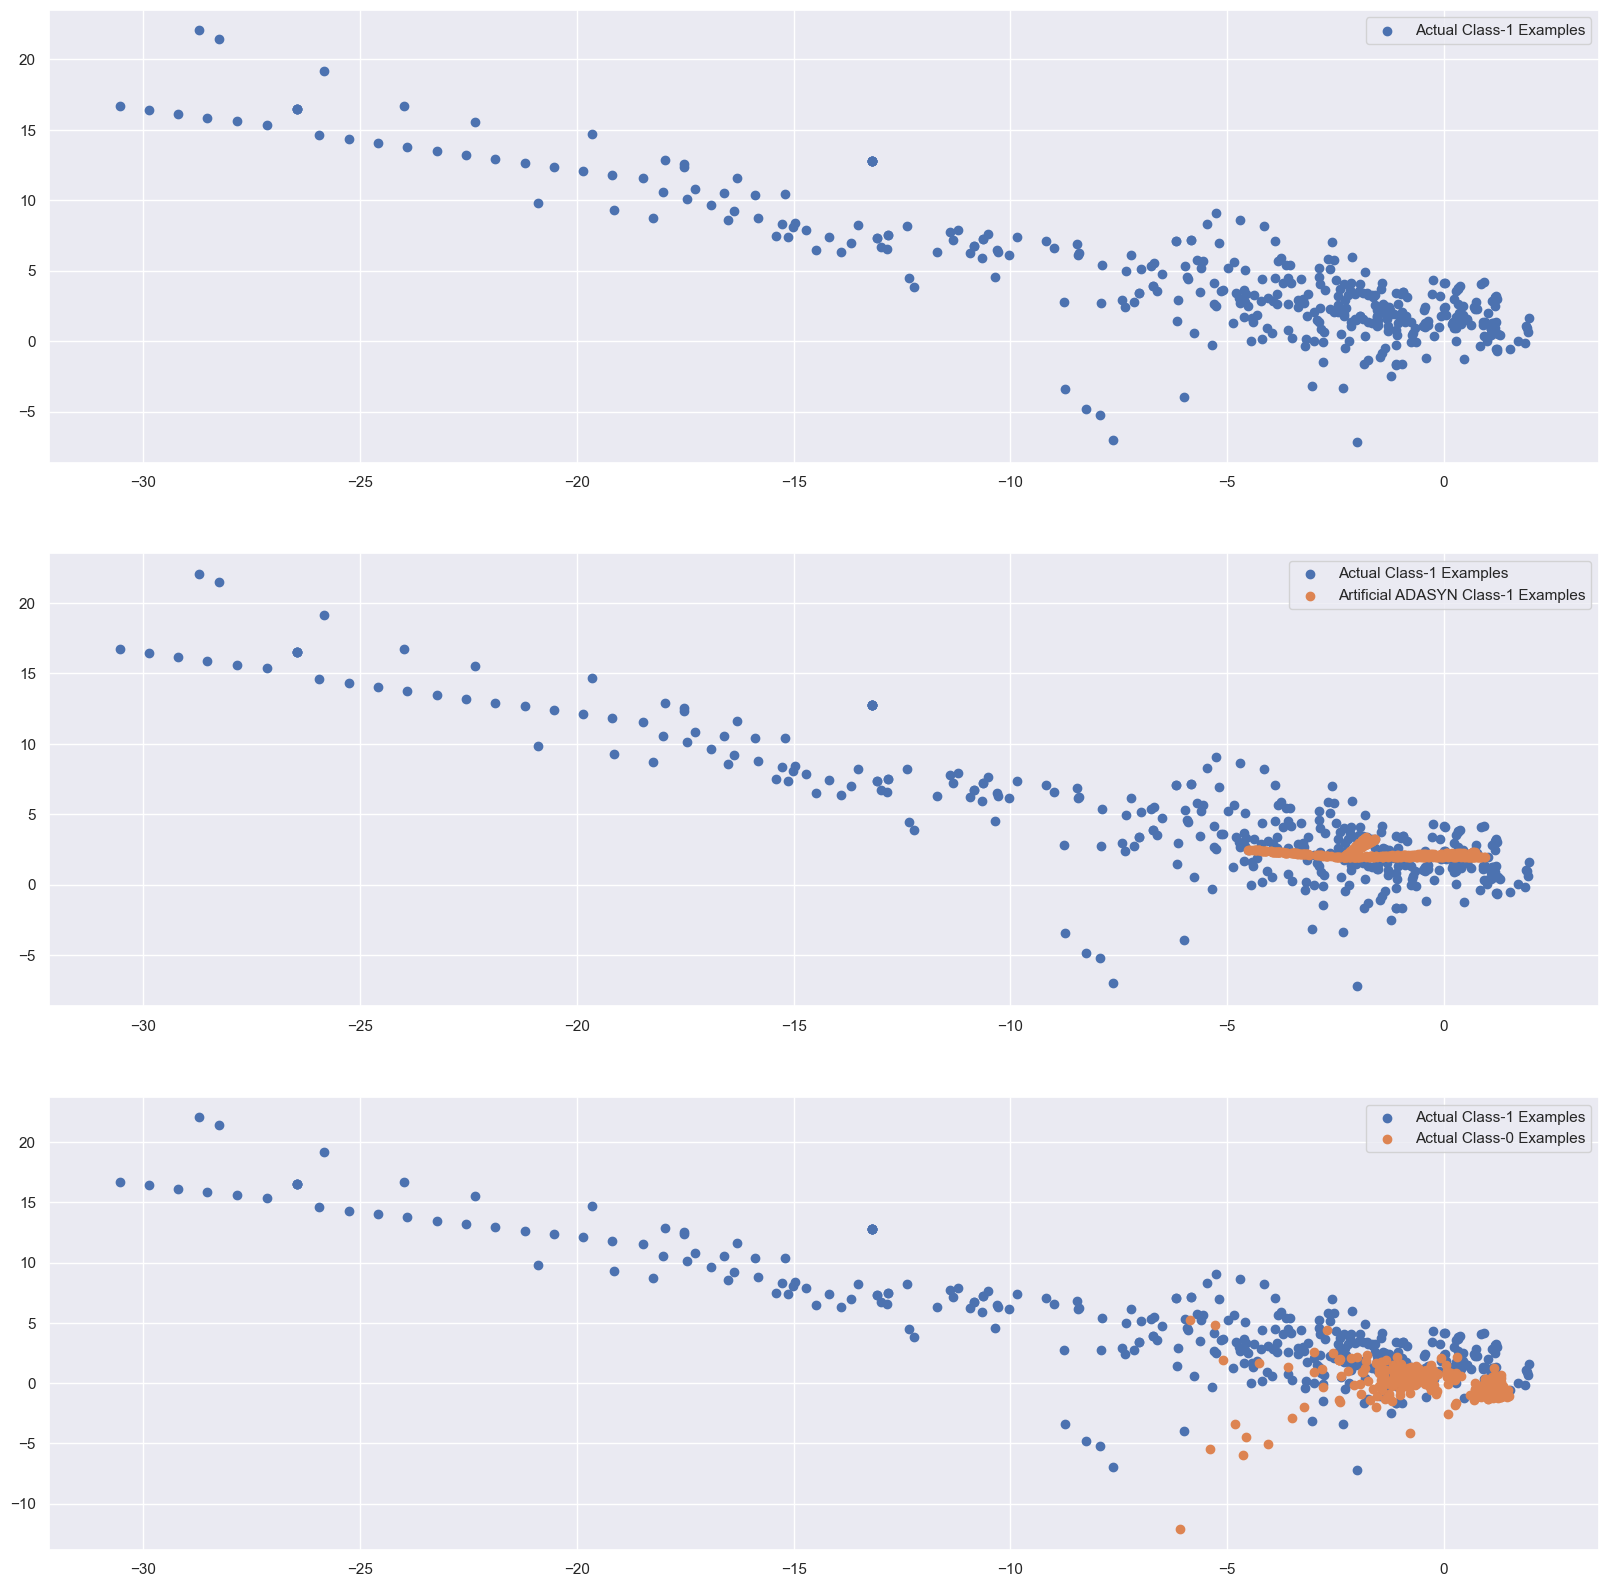

In [76]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

# Extracting artificial minority samples generated by ADASYN
X_train_adasyn_1 = X_train_ADASYN.iloc[X_train.shape[0]:]

# Extracting actual class-1 and class-0 examples
X_train_1 = X_train[y_train == 1.0].to_numpy()
X_train_0 = X_train[y_train == 0.0].to_numpy()

# Plotting
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(3, 1)

# Plot 1: Actual Class-1 Examples
axes[0].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[0].legend()

# Plot 2: Actual Class-1 and Artificial ADASYN Class-1 Examples
axes[1].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[1].scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
                label='Artificial ADASYN Class-1 Examples')
axes[1].legend()

# Plot 3: Actual Class-1 and Class-0 Examples
axes[2].scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
axes[2].scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
axes[2].legend()

plt.show()

In [77]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)

# Creating Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9827618293082763
Max auc_roc for l1: 0.9789707140815926
Parameters for l2 regularisations
[[ 0.64712152  0.45947111  0.59509764  0.97084506  0.41391135 -0.84407766
  -0.36027118 -0.6253193  -0.29900261 -0.76805491  0.60099498 -1.1314292
  -0.13618275 -1.55975811  0.17873043 -0.67378588 -0.62384154 -0.2893959
   0.20514247 -0.89177942 -0.09574261  0.51837042  0.14998026 -0.91433547
   0.51753936  0.12590725  0.21996396  0.74474488  0.0068938   0.02292813]]
[-4.3378162]
{1: array([[0.97838092, 0.97999275, 0.9811569 , 0.98194869, 0.98248987,
        0.98248987, 0.98248987, 0.98248987, 0.98248987, 0.98248987,
        0.98248987, 0.98248987, 0.98248987, 0.98248987, 0.98248987,
        0.98248987, 0.98248987, 0.98248987, 0.98248987, 0.98248987],
       [0.97853486, 0.98021809, 0.98144332, 0.98228593, 0.98275818,
        0.98275818, 0.98275818, 0.98275818, 0.98275818, 0.98275818,
        0.98275818, 0.98275818, 0.98275818

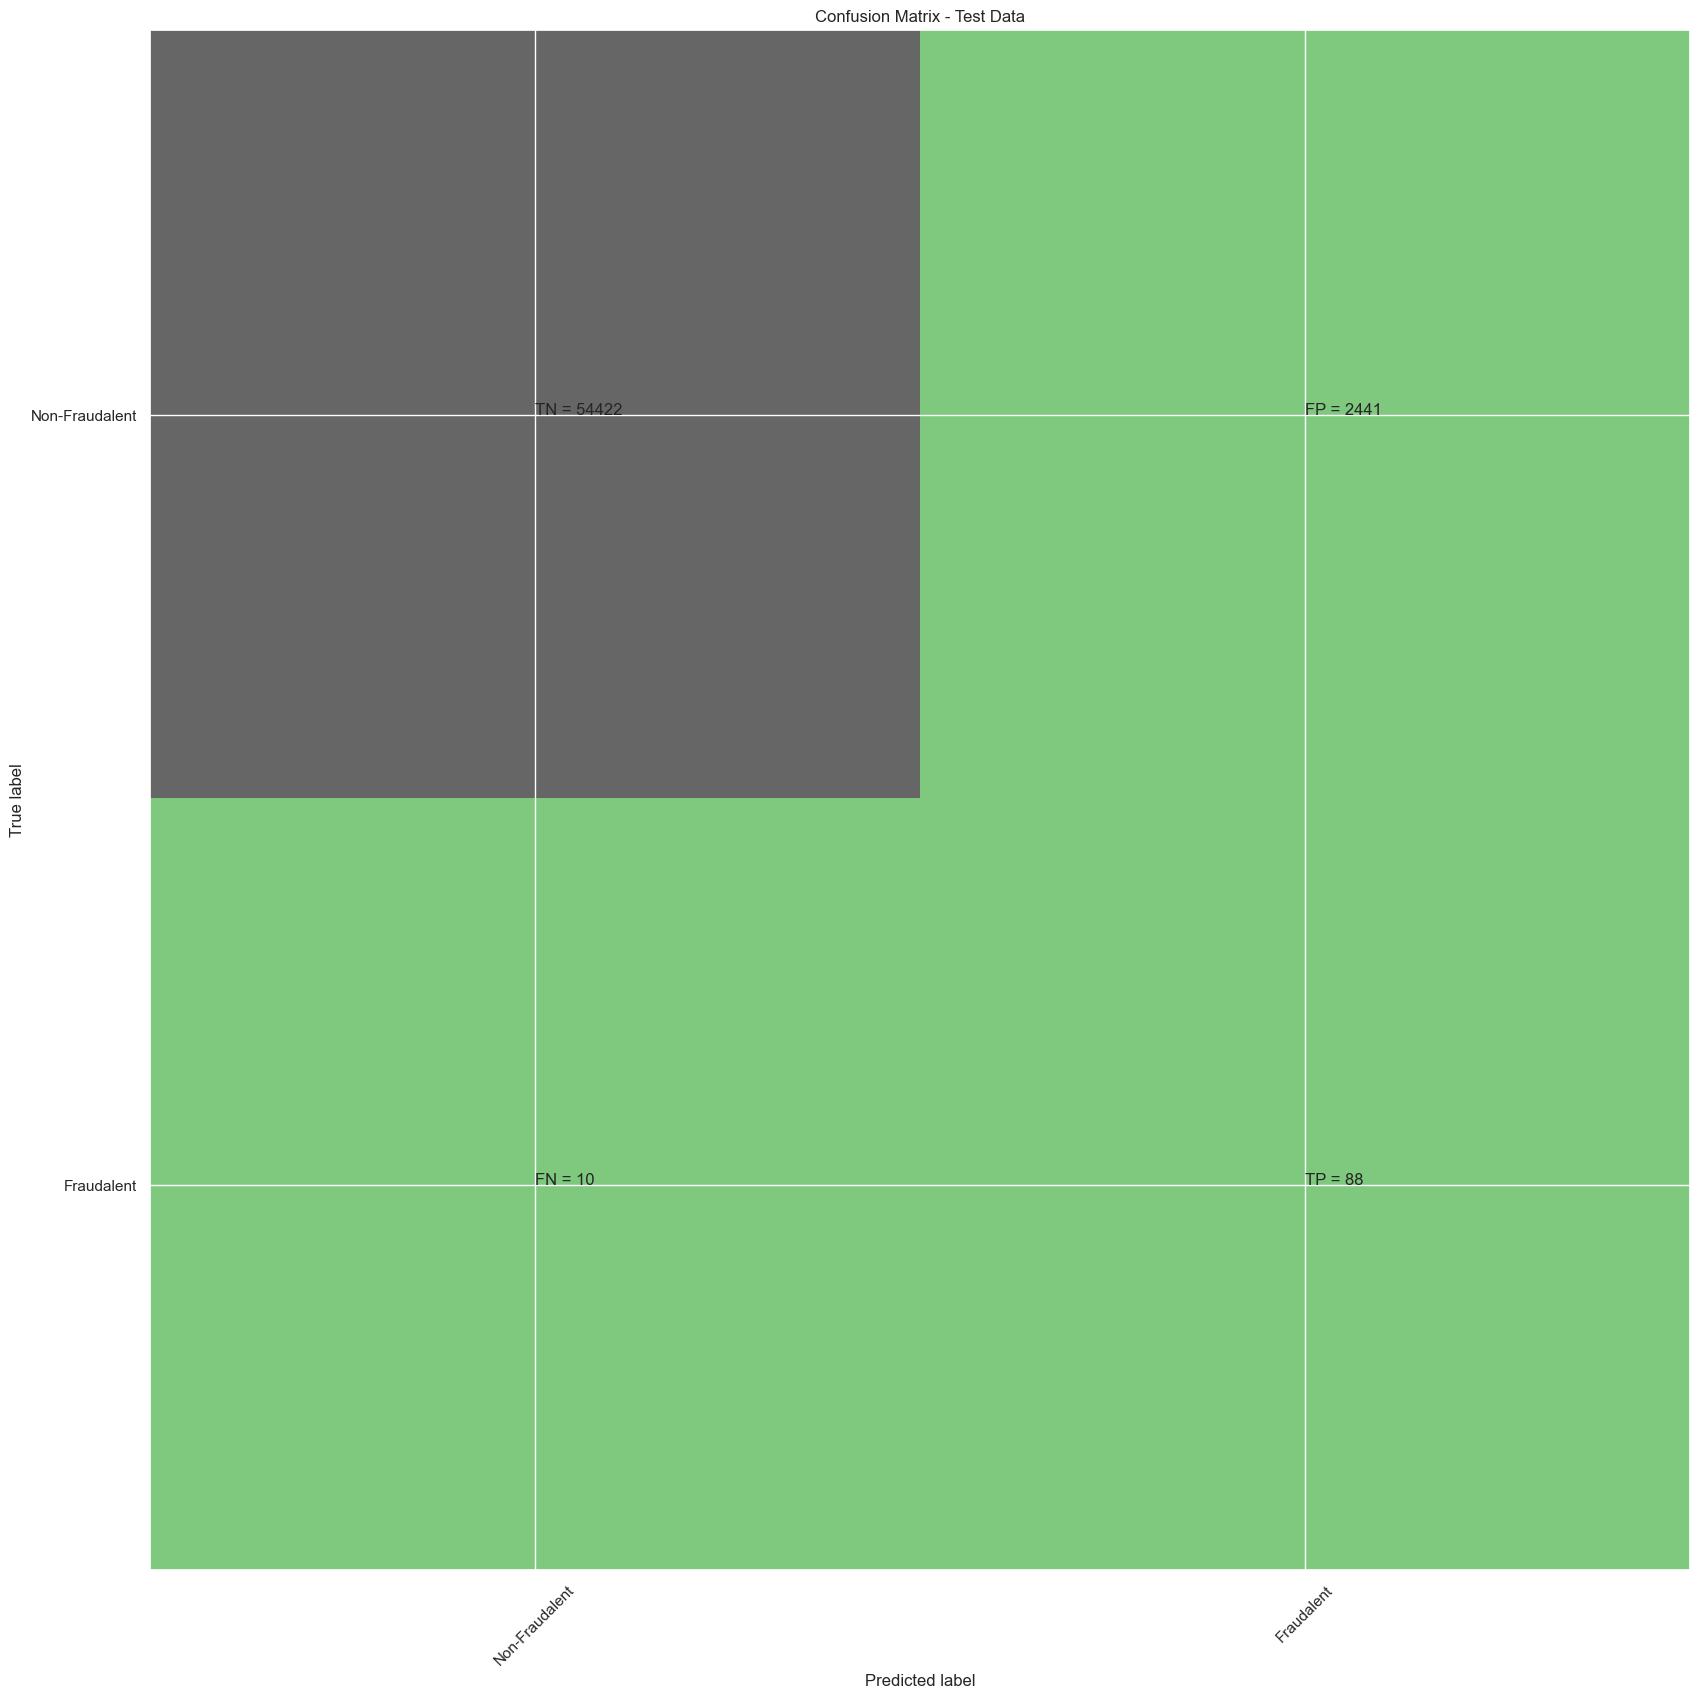

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.03      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9718930496304489
Confusion Matrix


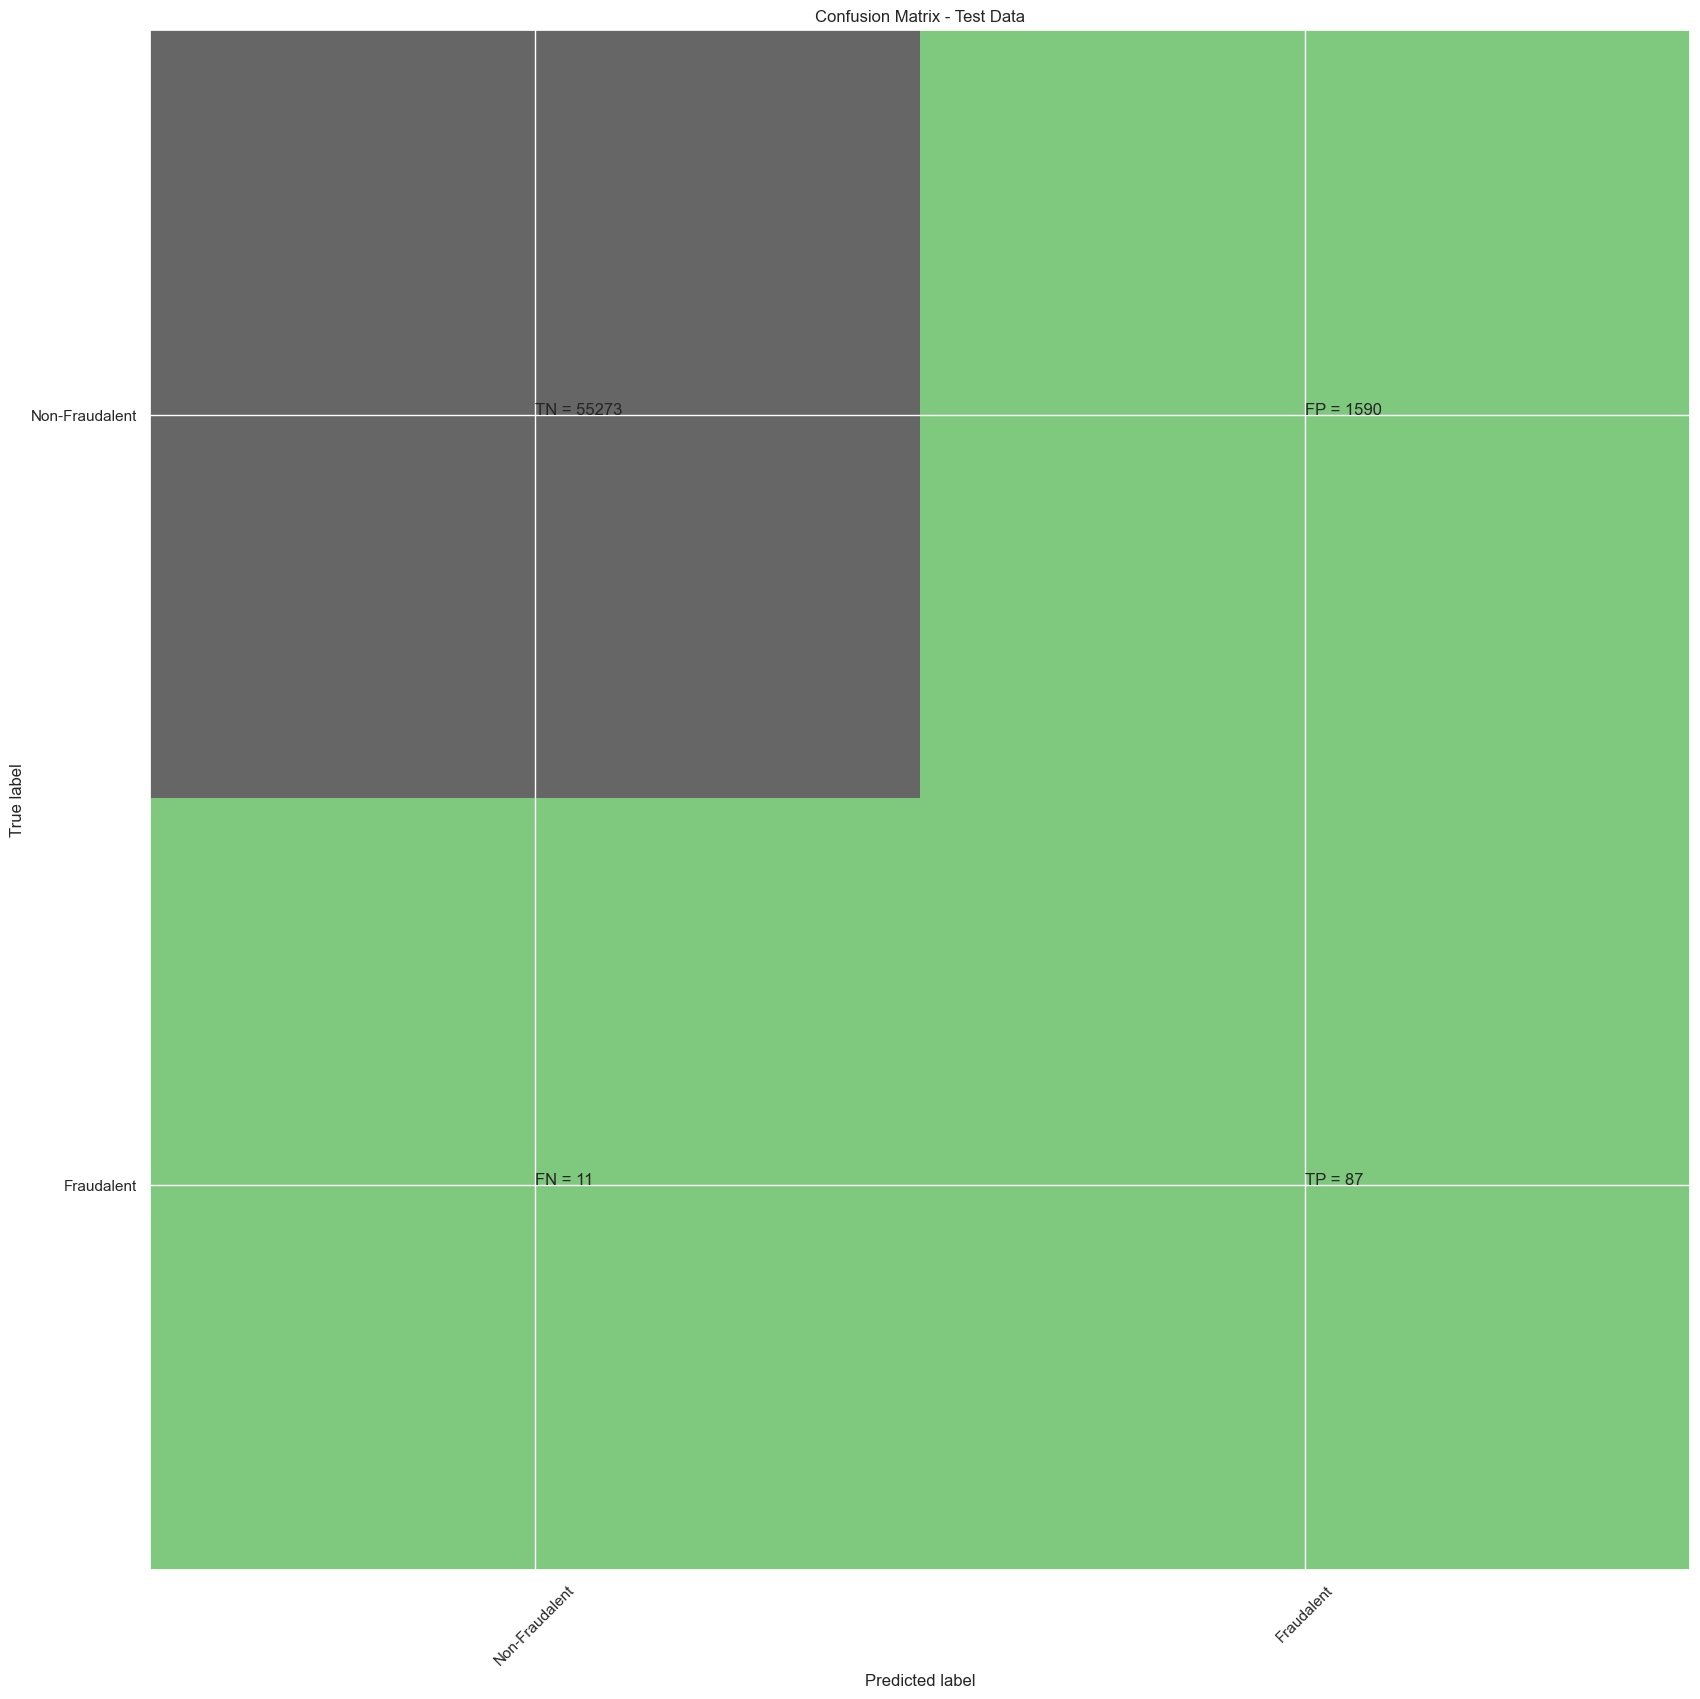

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.89      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.93      0.54     56961
weighted avg       1.00      0.97      0.98     56961

l2 roc_value: 0.9755121241996966
l2 threshold: 0.6233442702808584
ROC for the test dataset 97.6%


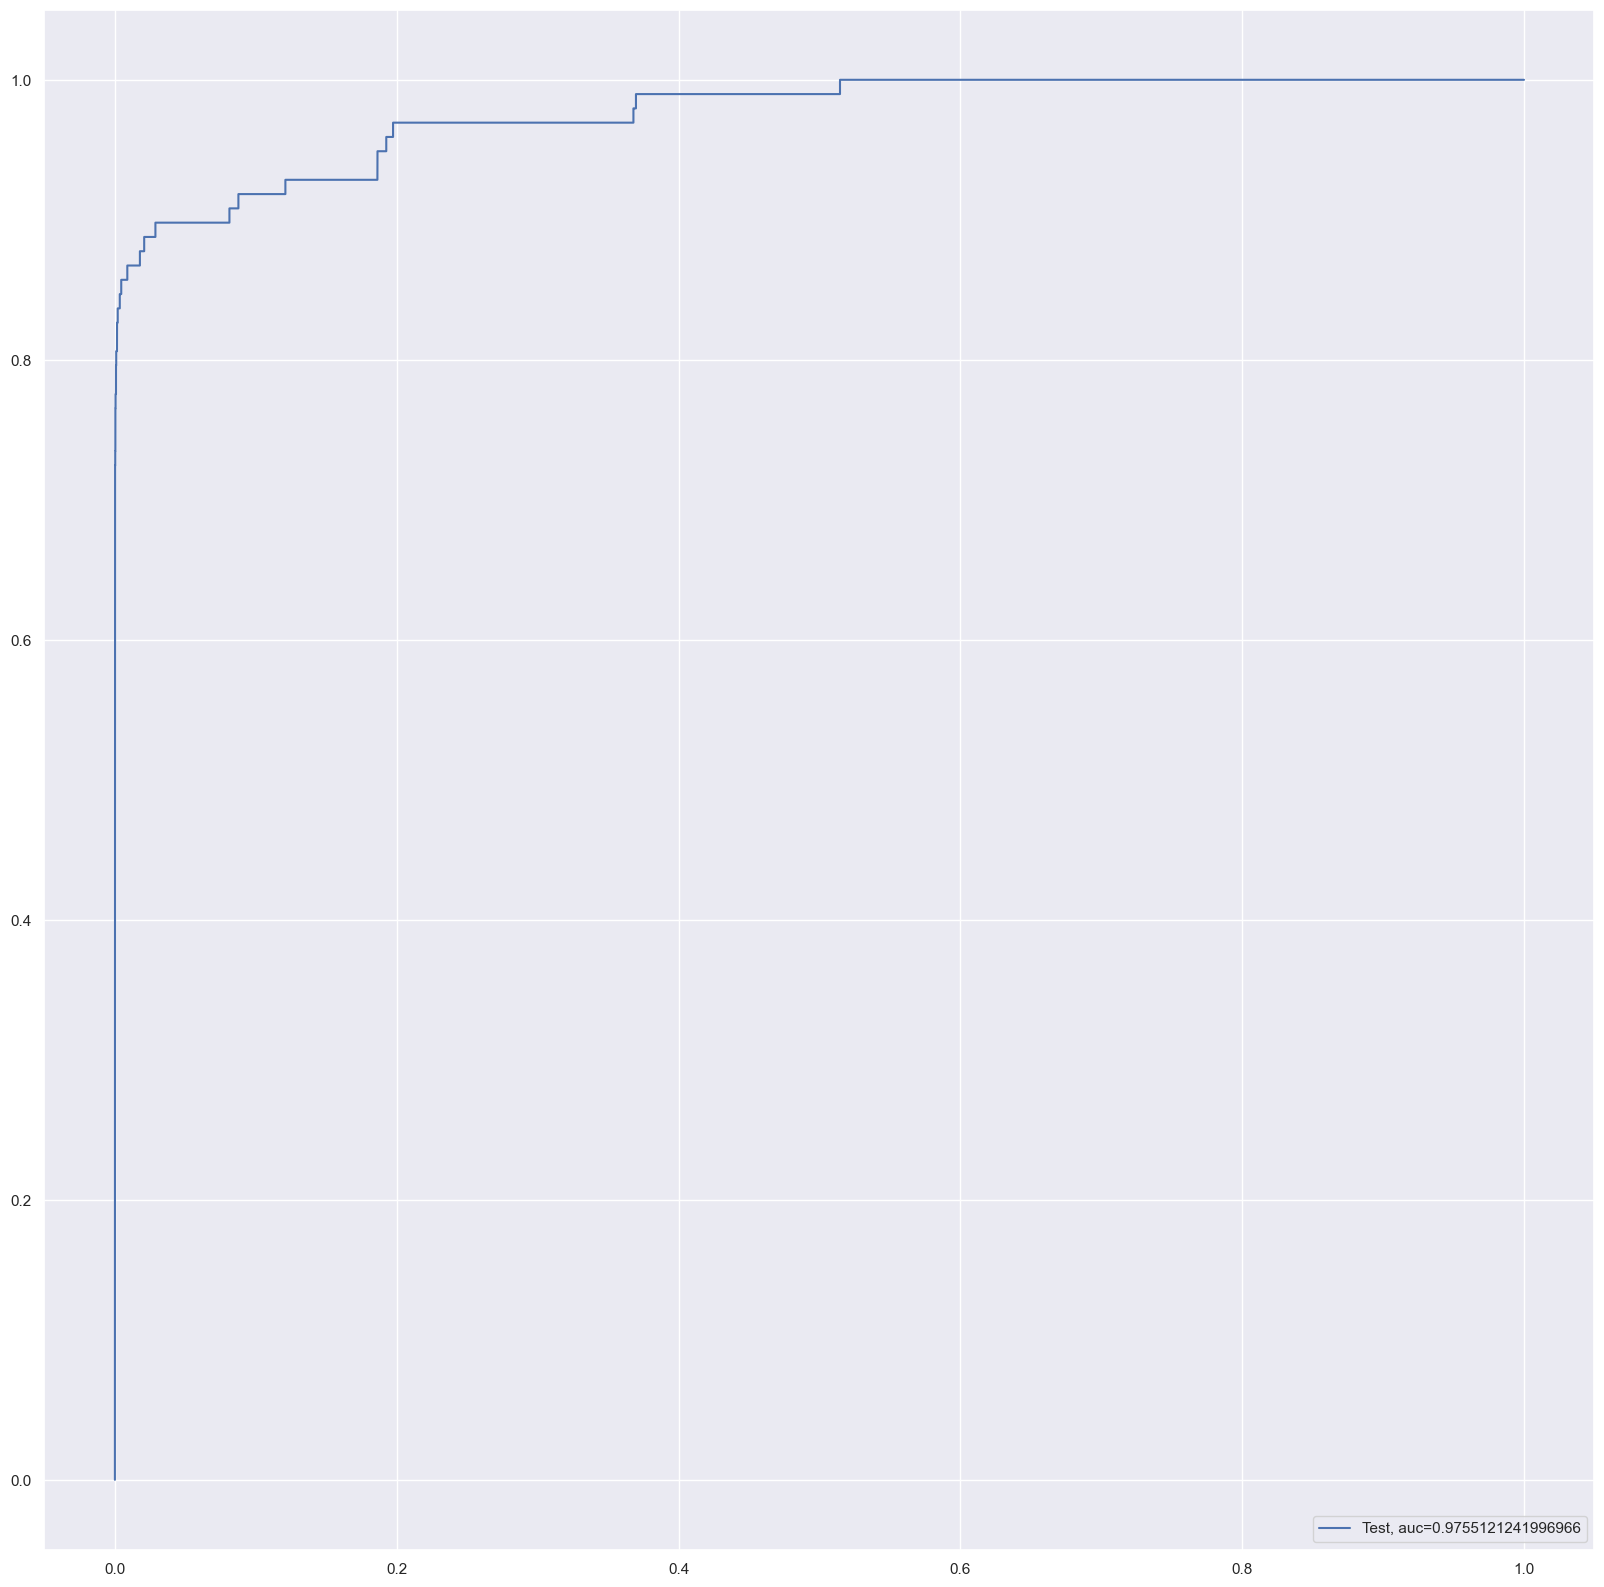

l1 roc_value: 0.9773454780501794
l1 threshold: 0.6069356415265406
ROC for the test dataset 97.7%


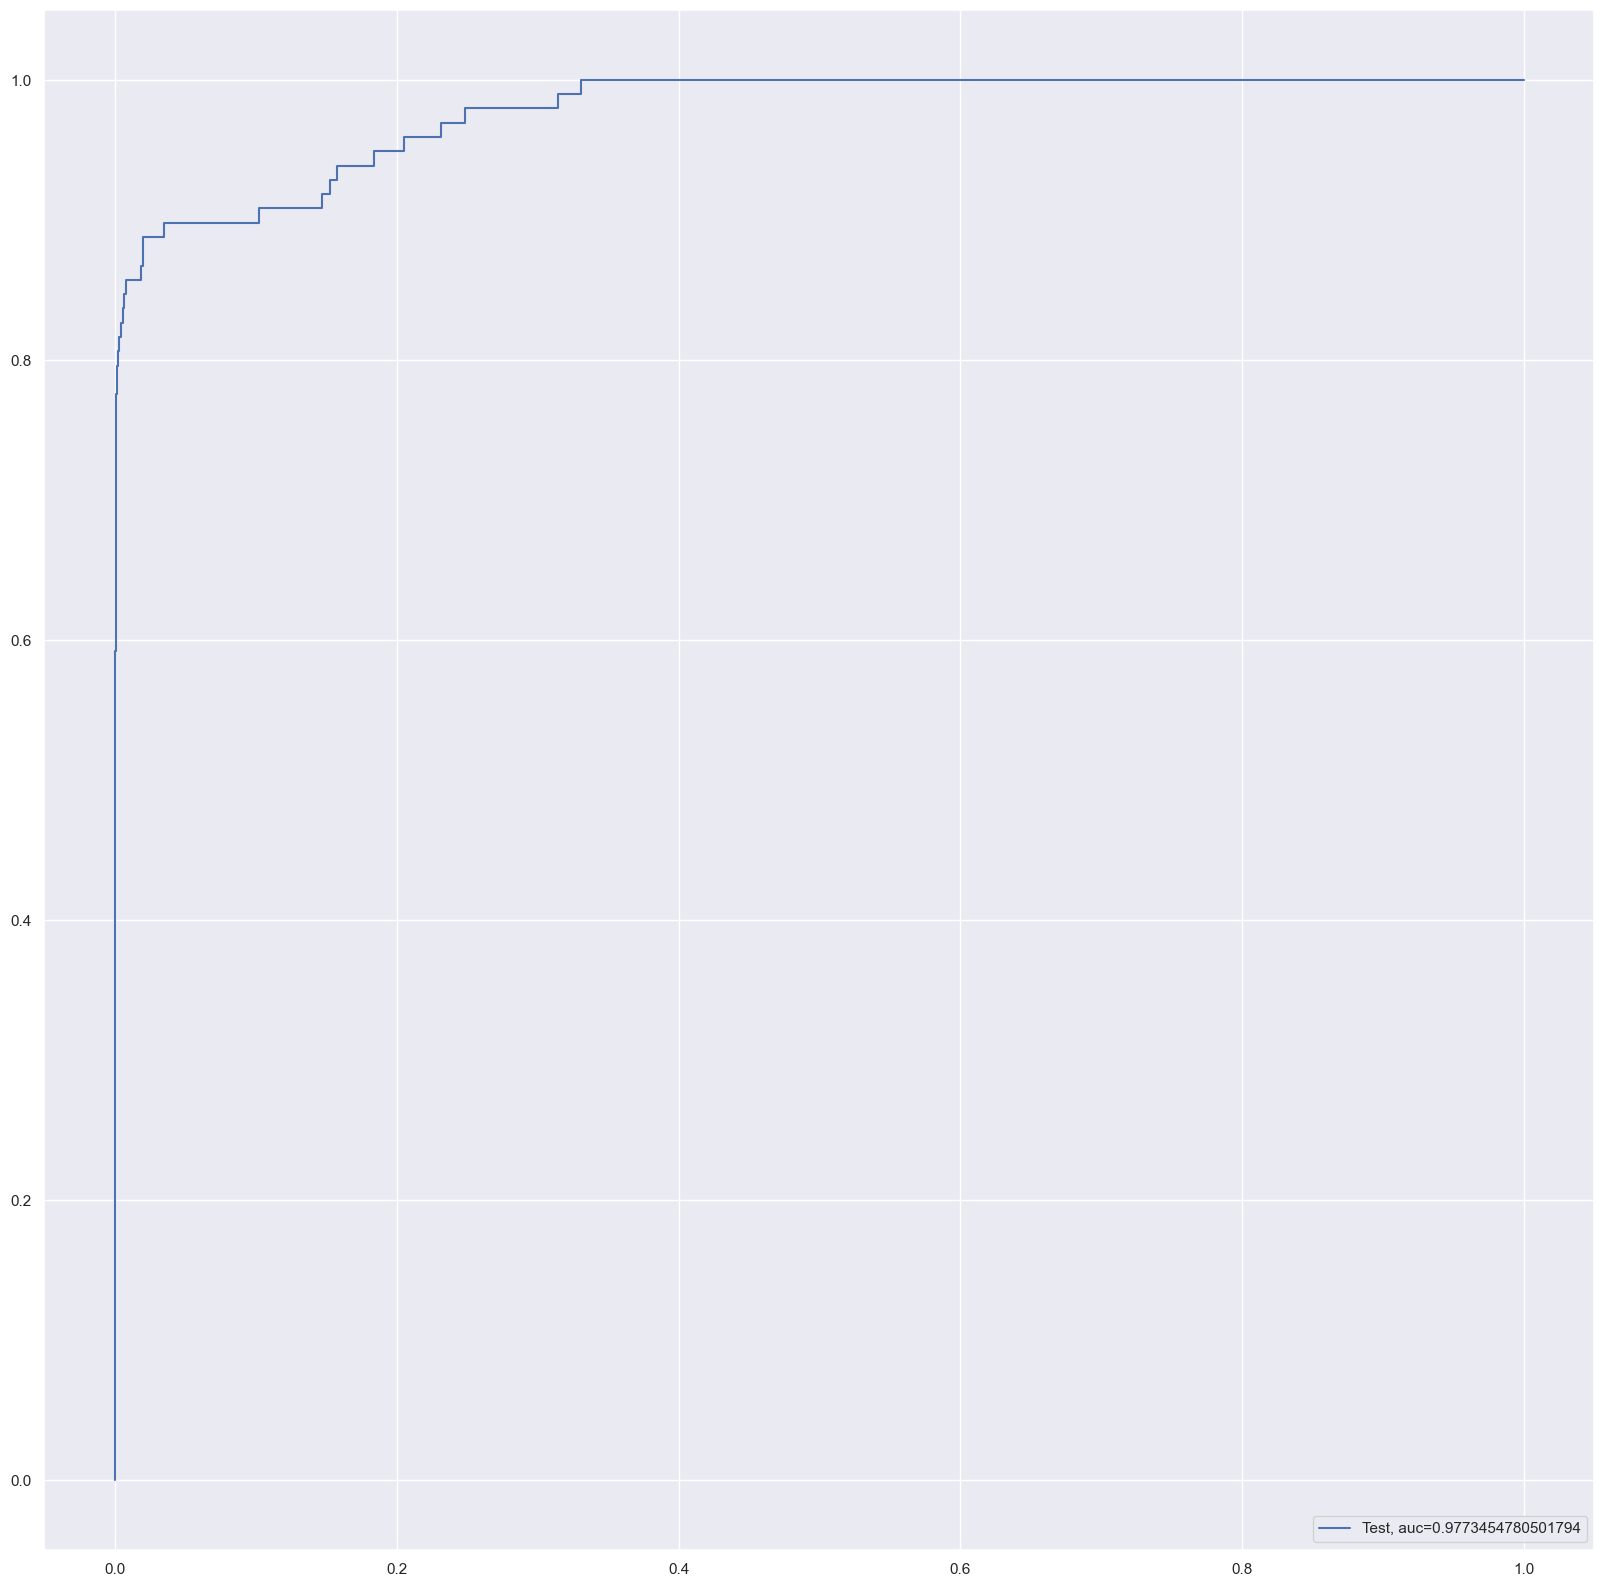

Time Taken by Model: --- 357.37613129615784 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


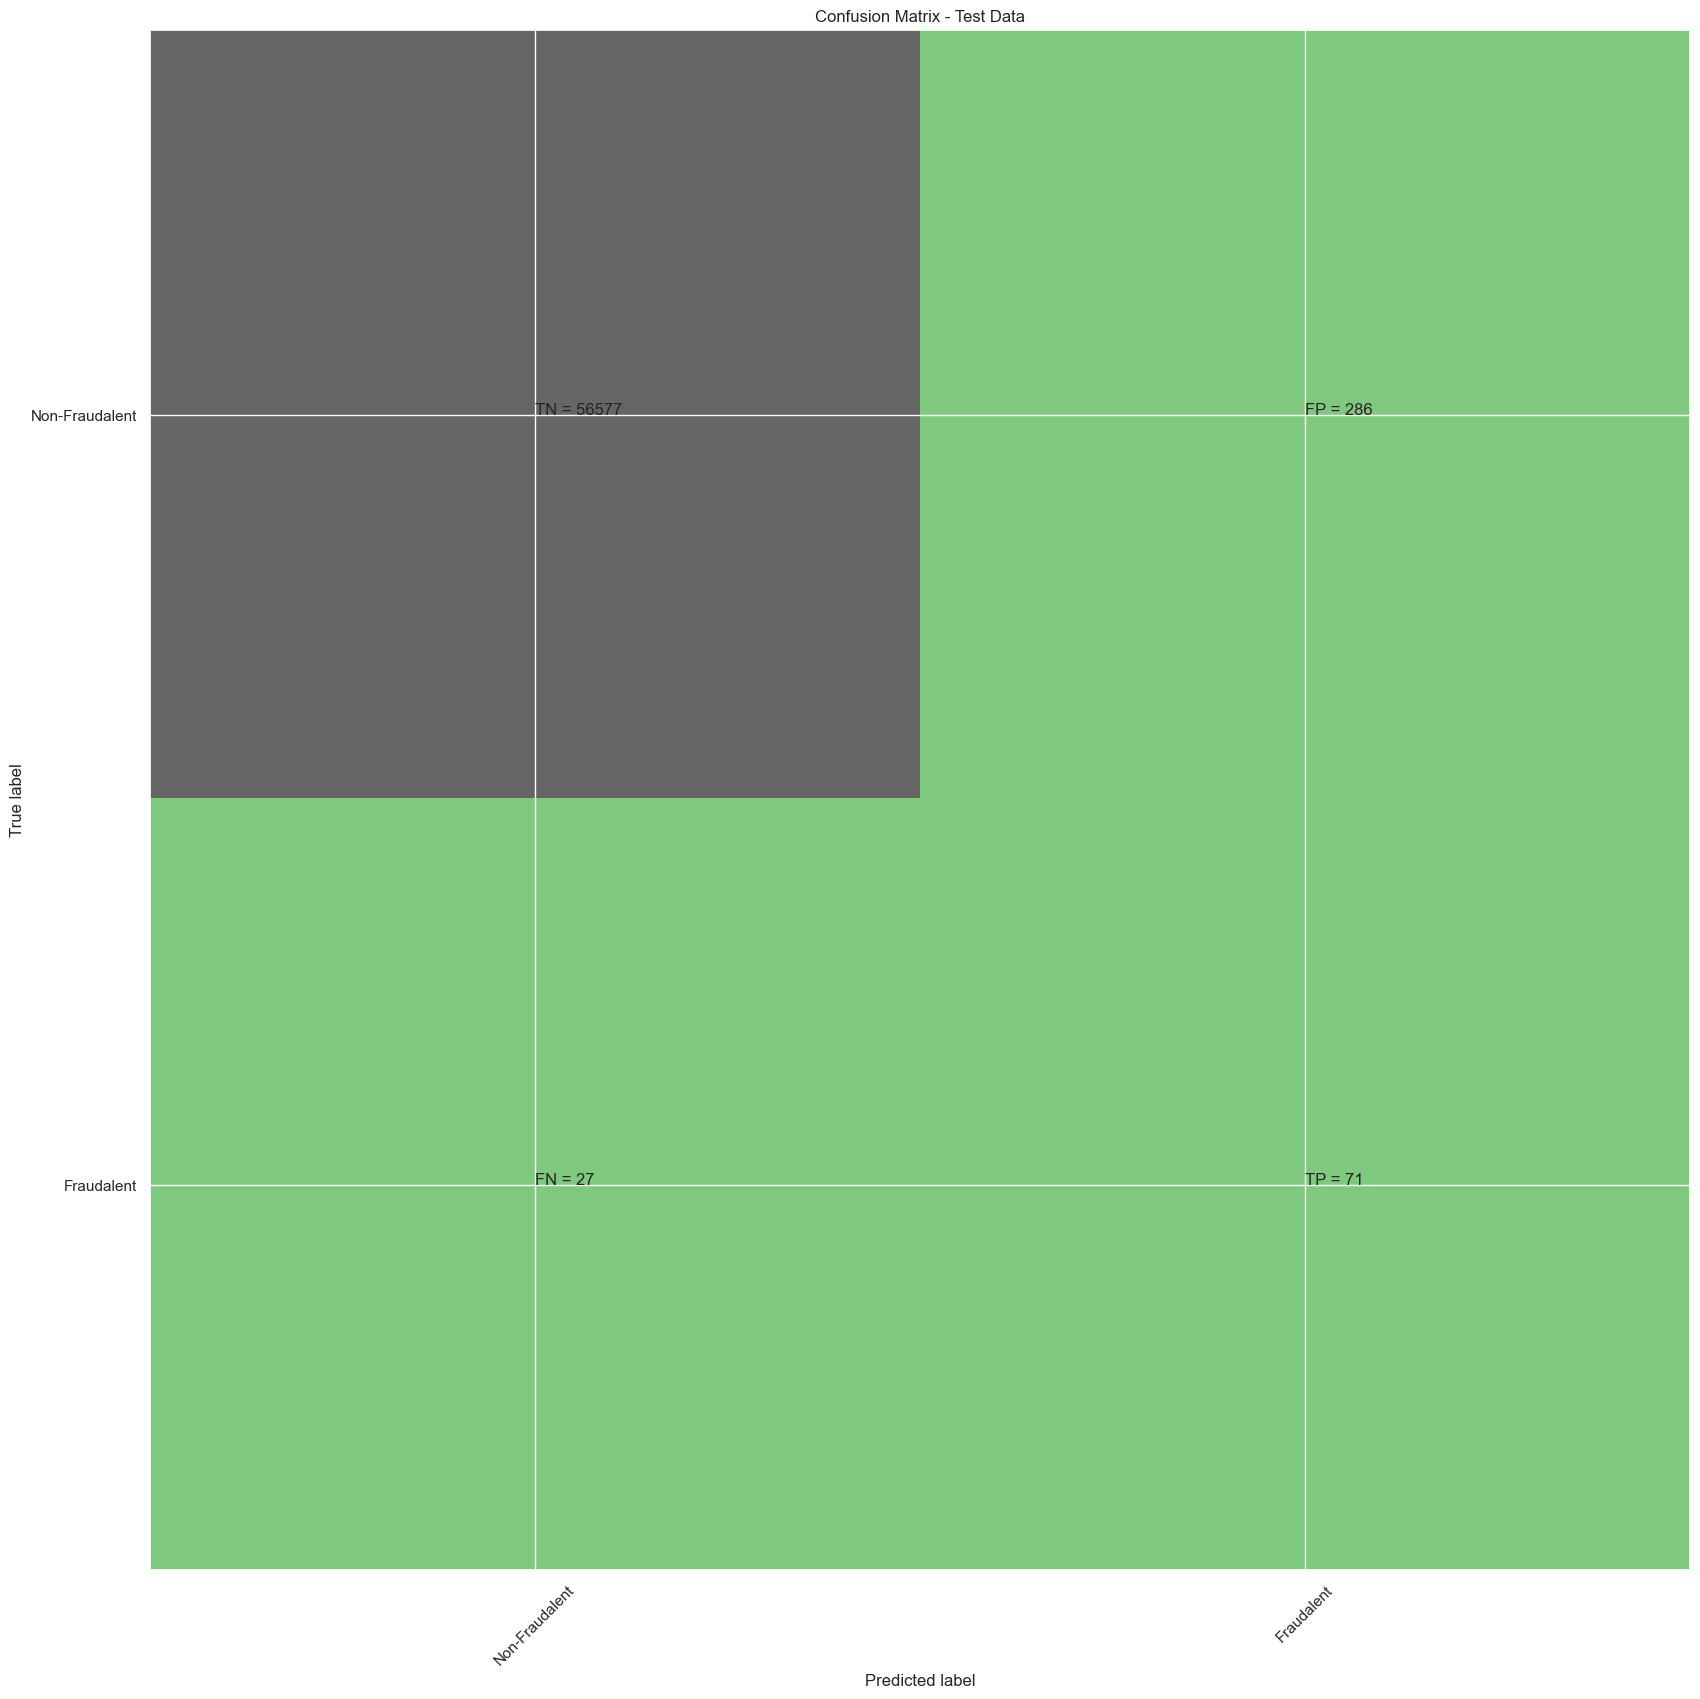

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


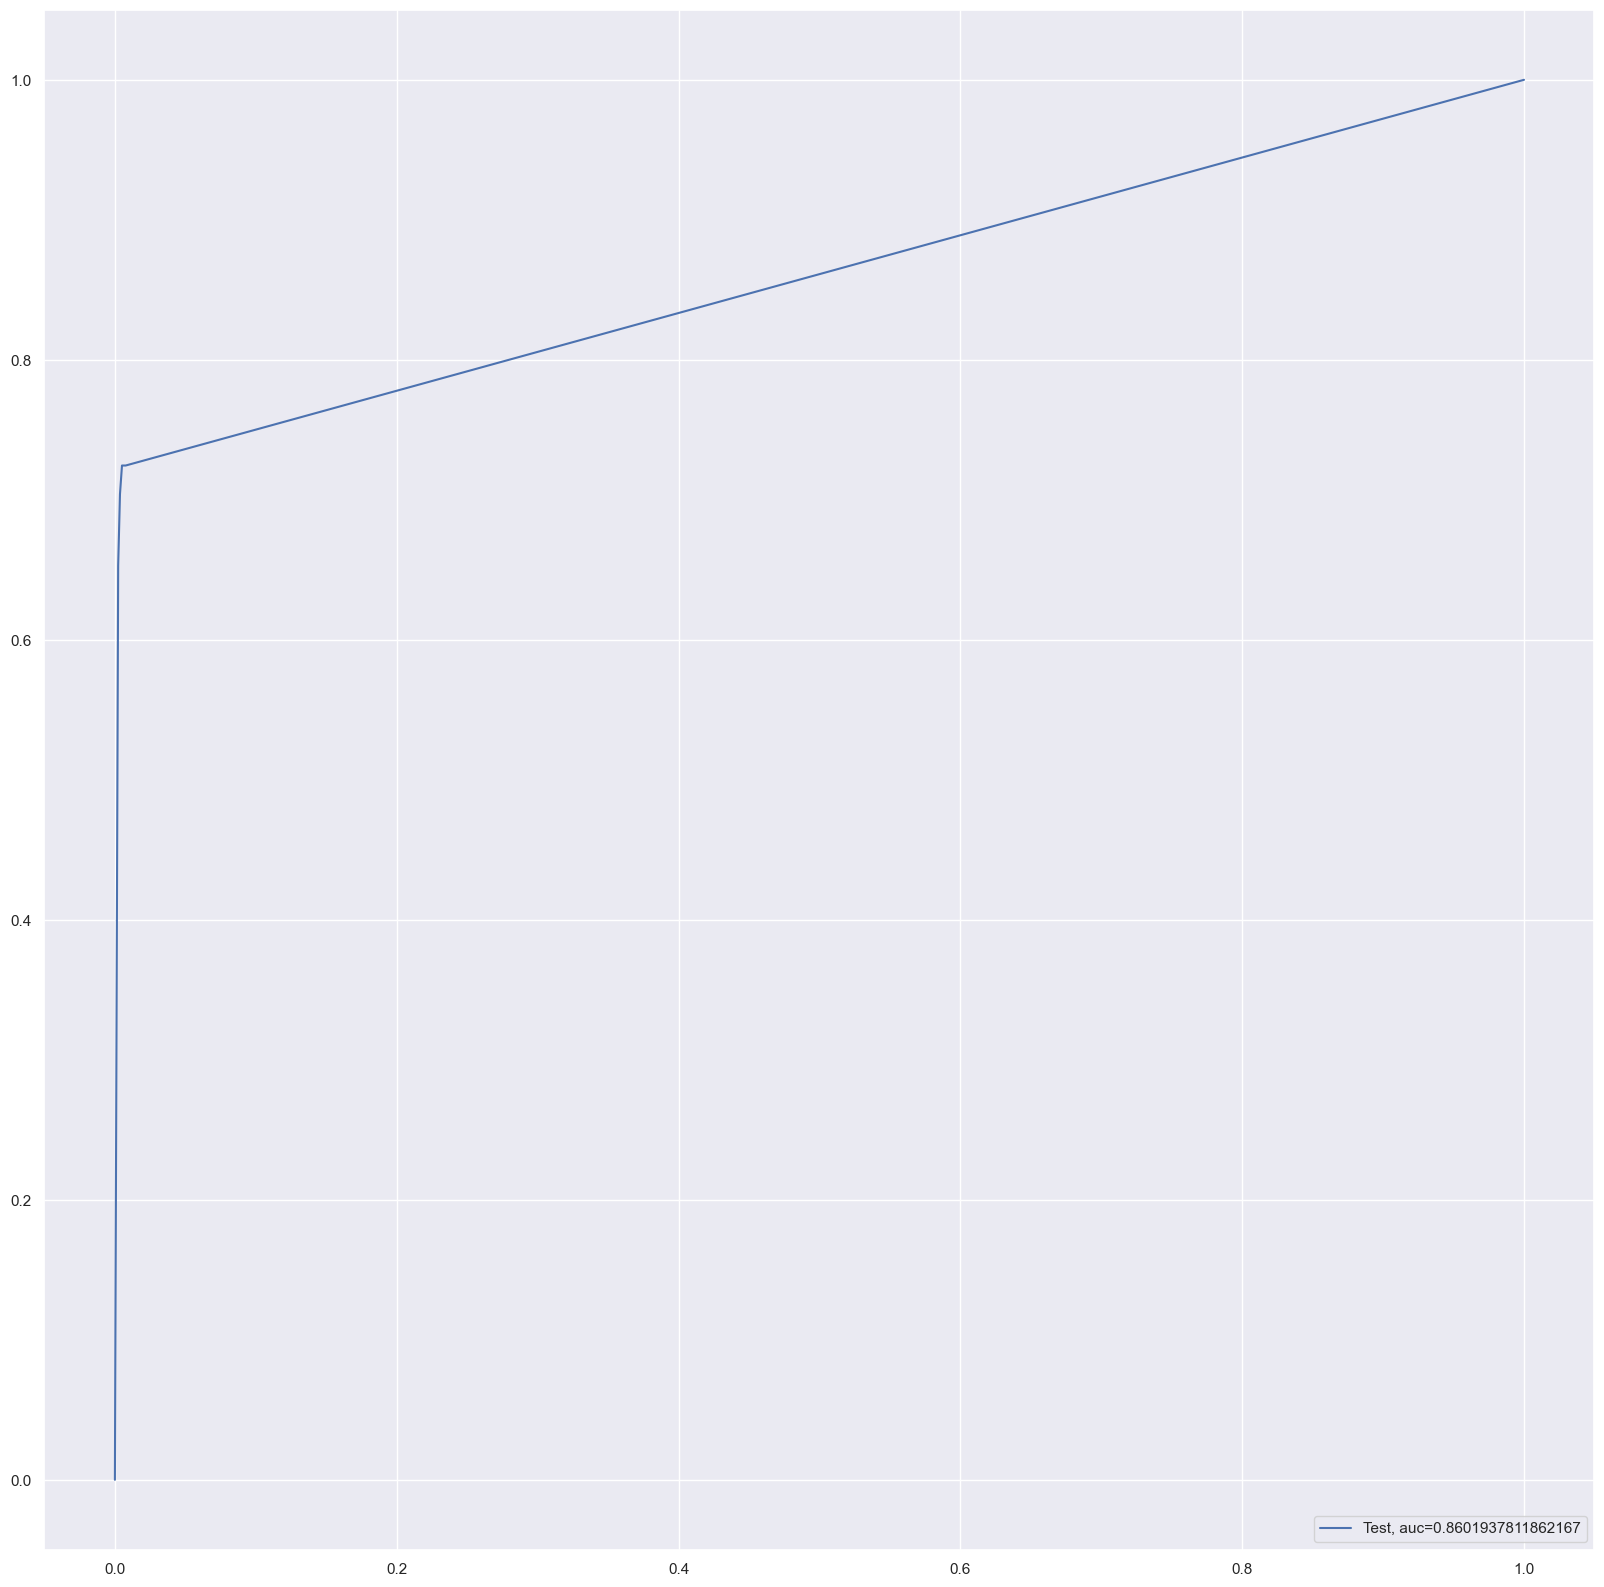

Time Taken by Model: --- 65.28942441940308 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979459630273345
Confusion Matrix


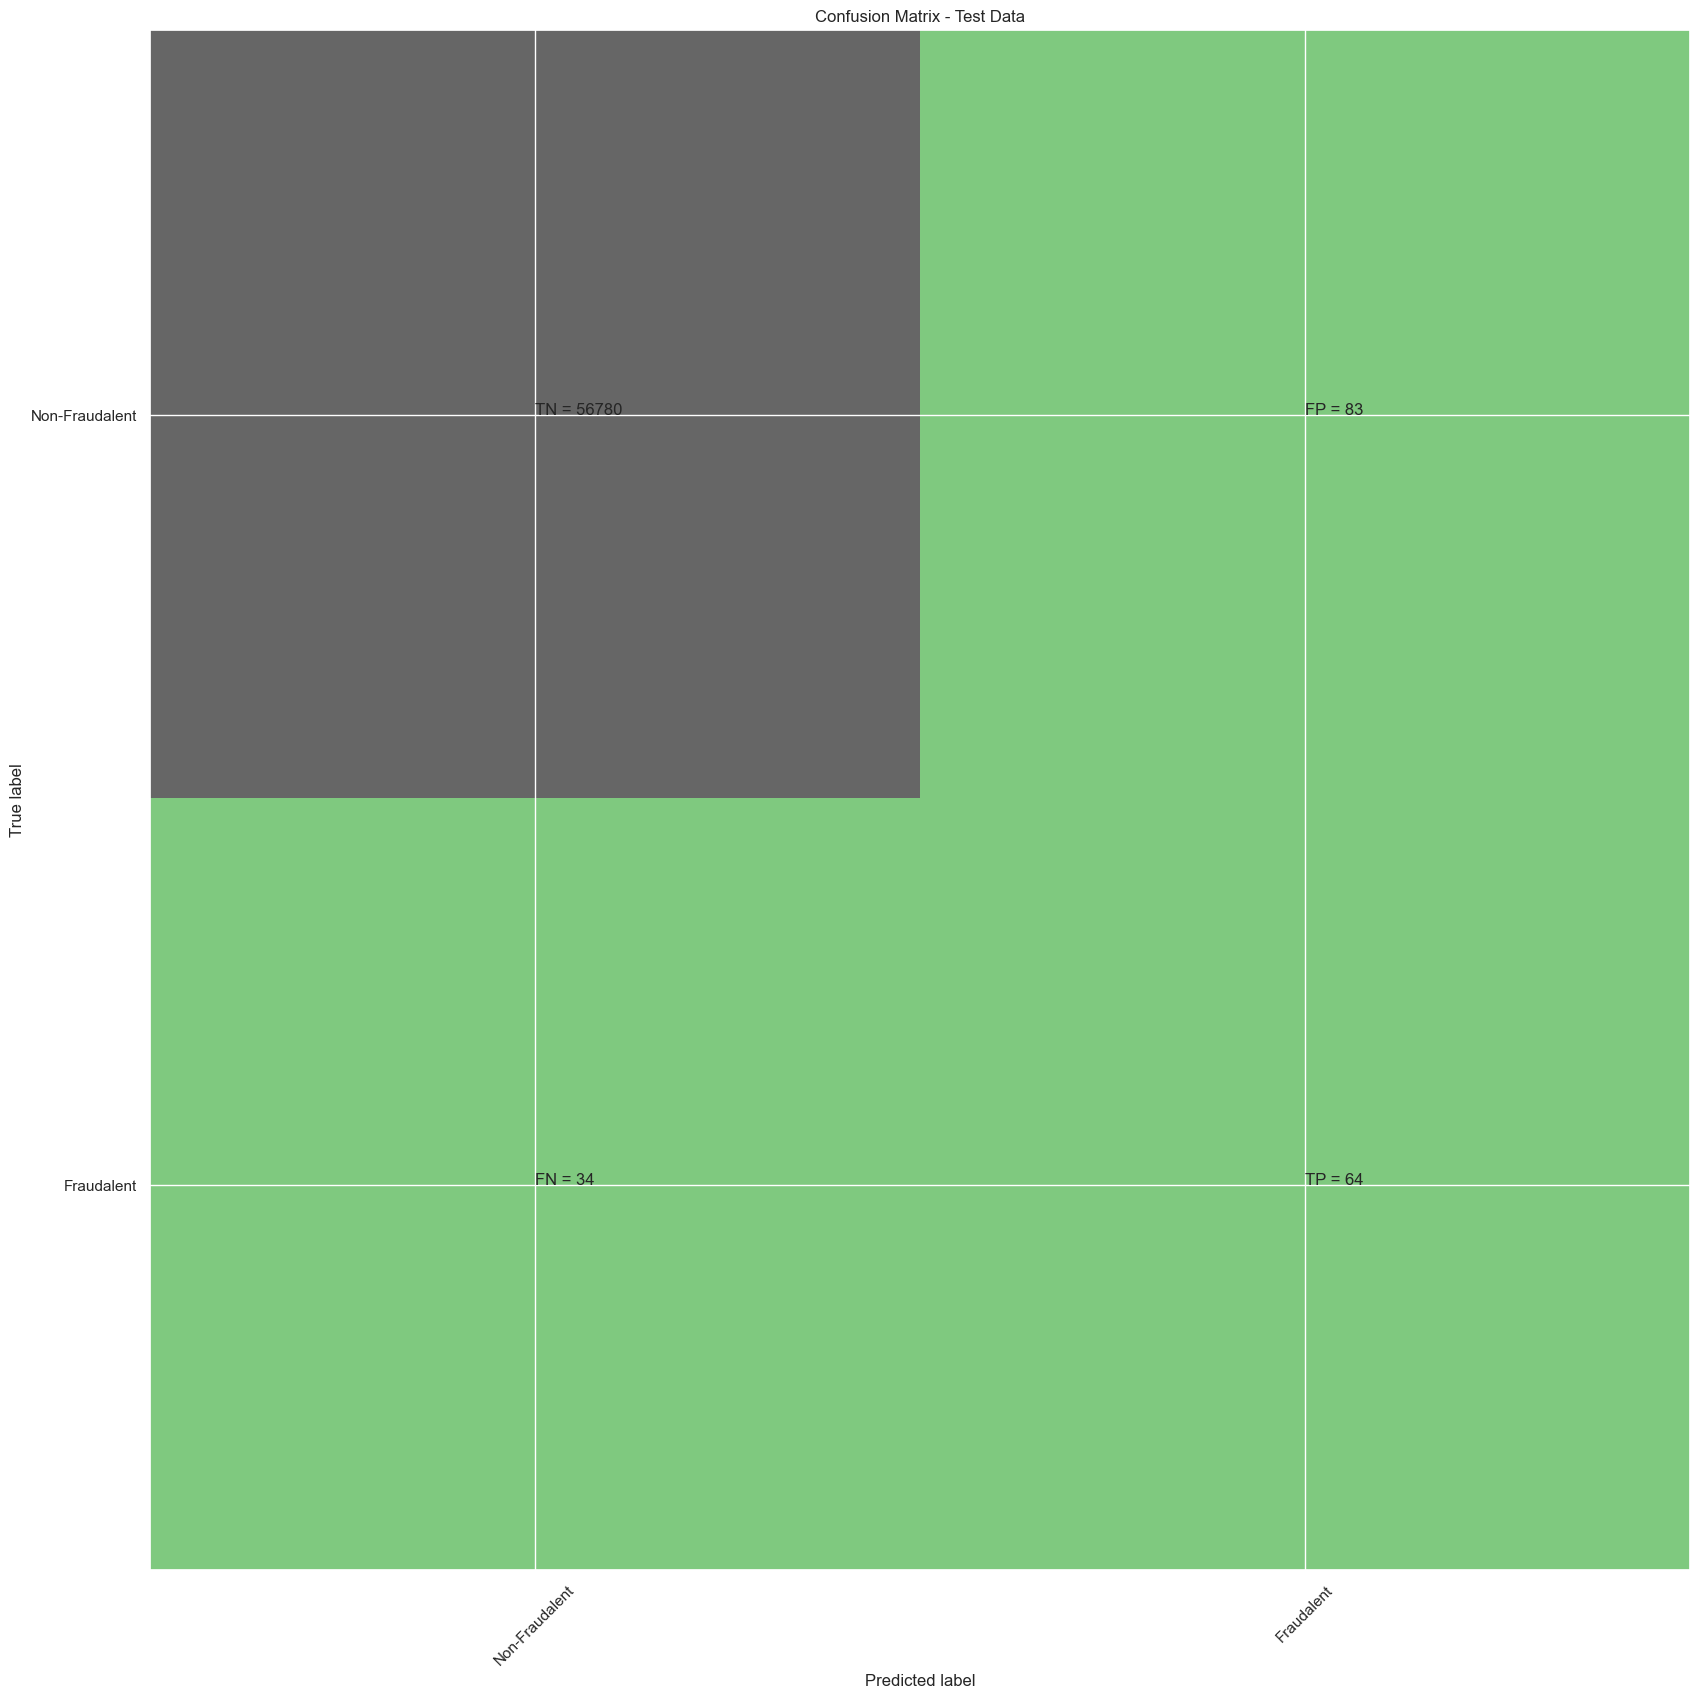

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


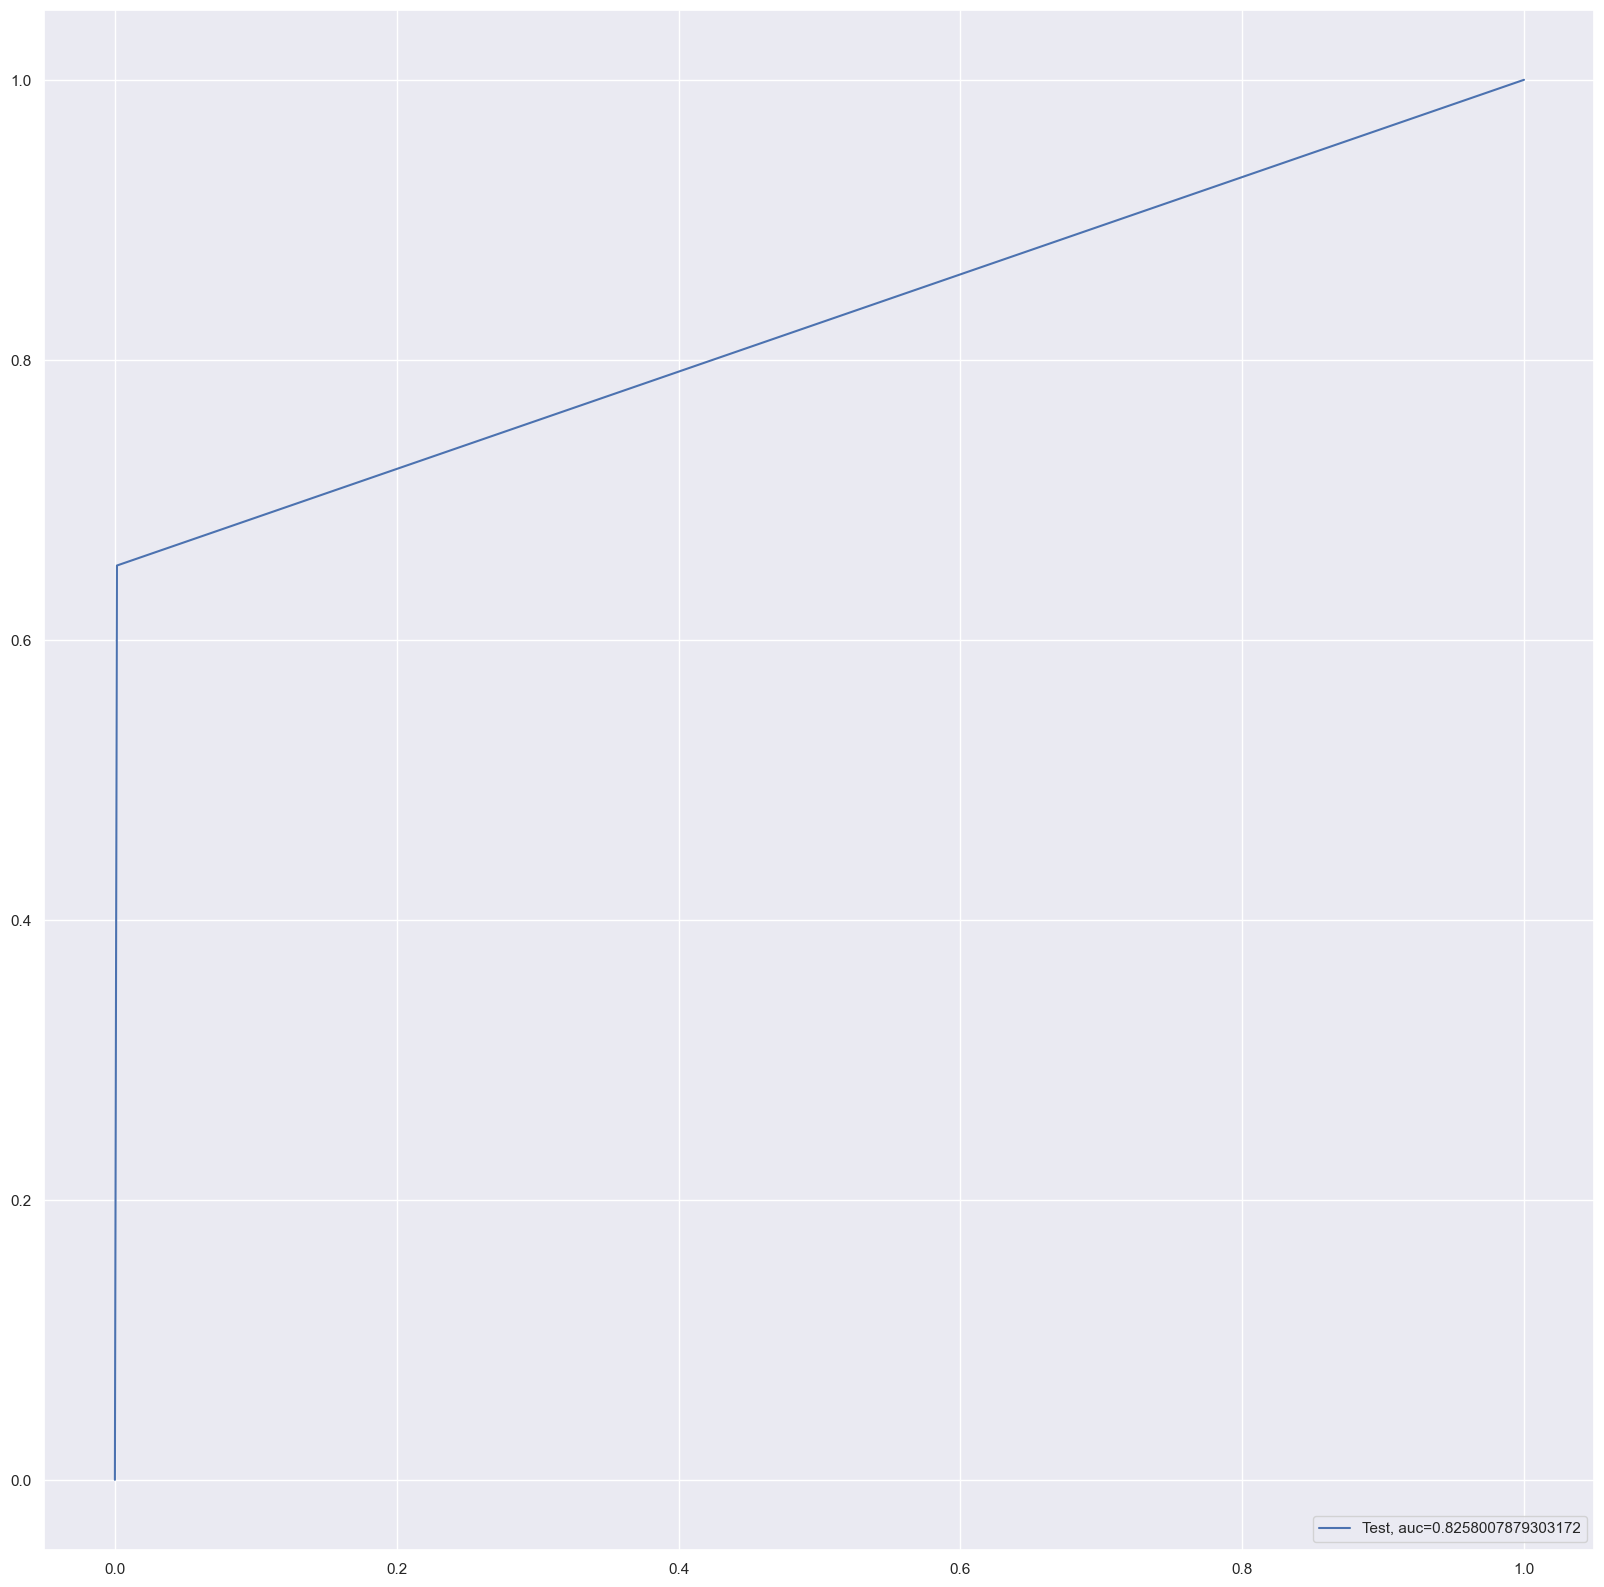

entropy score: 0.9954179175225154
Confusion Matrix


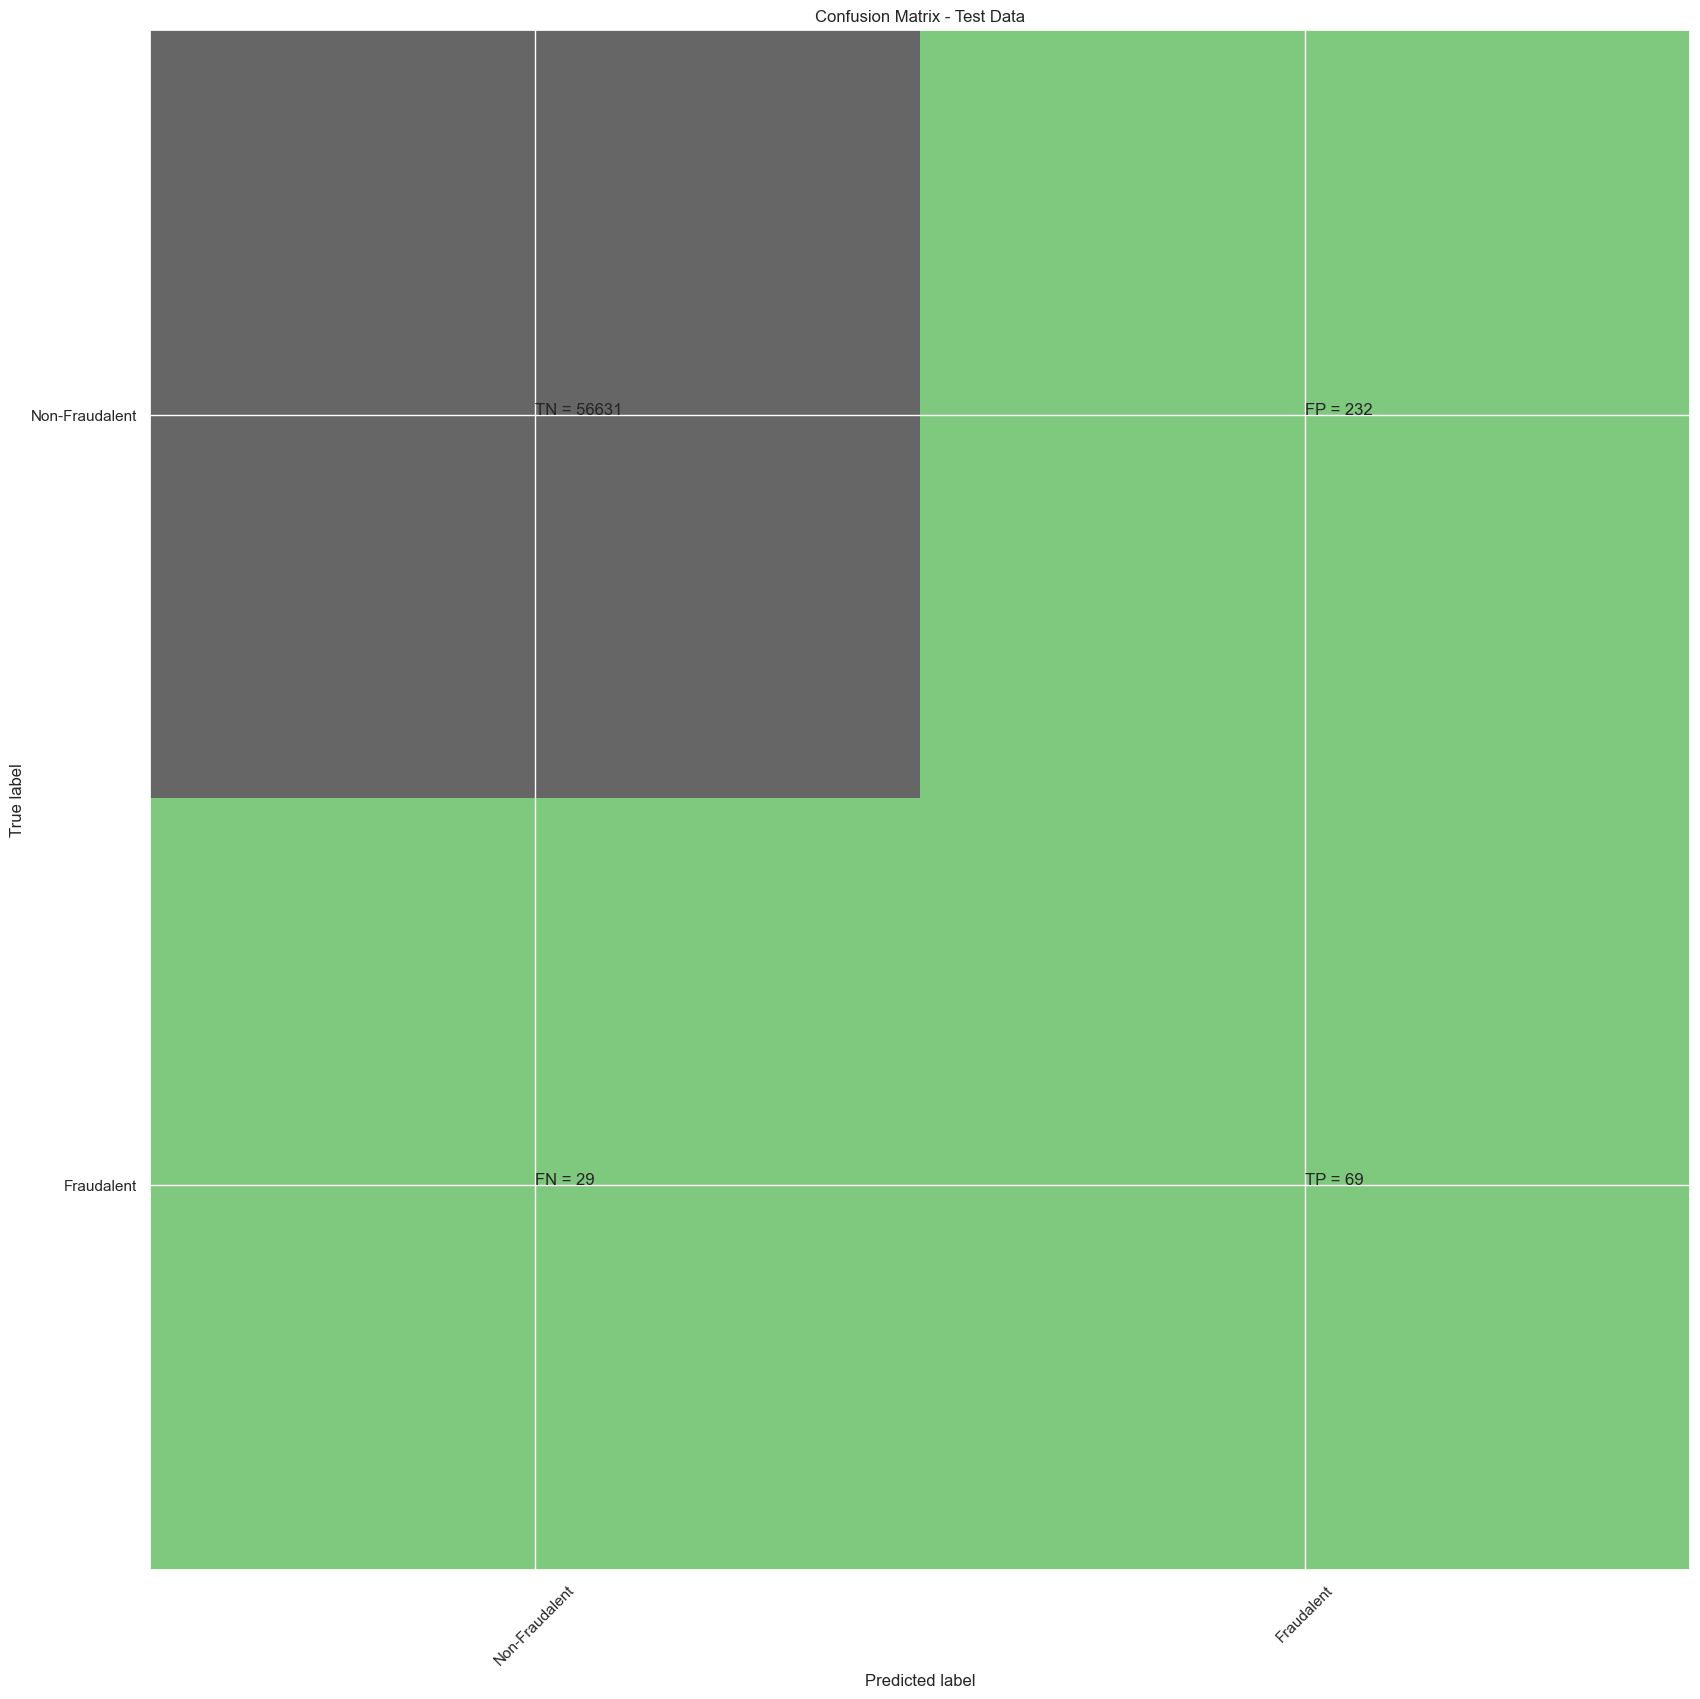

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


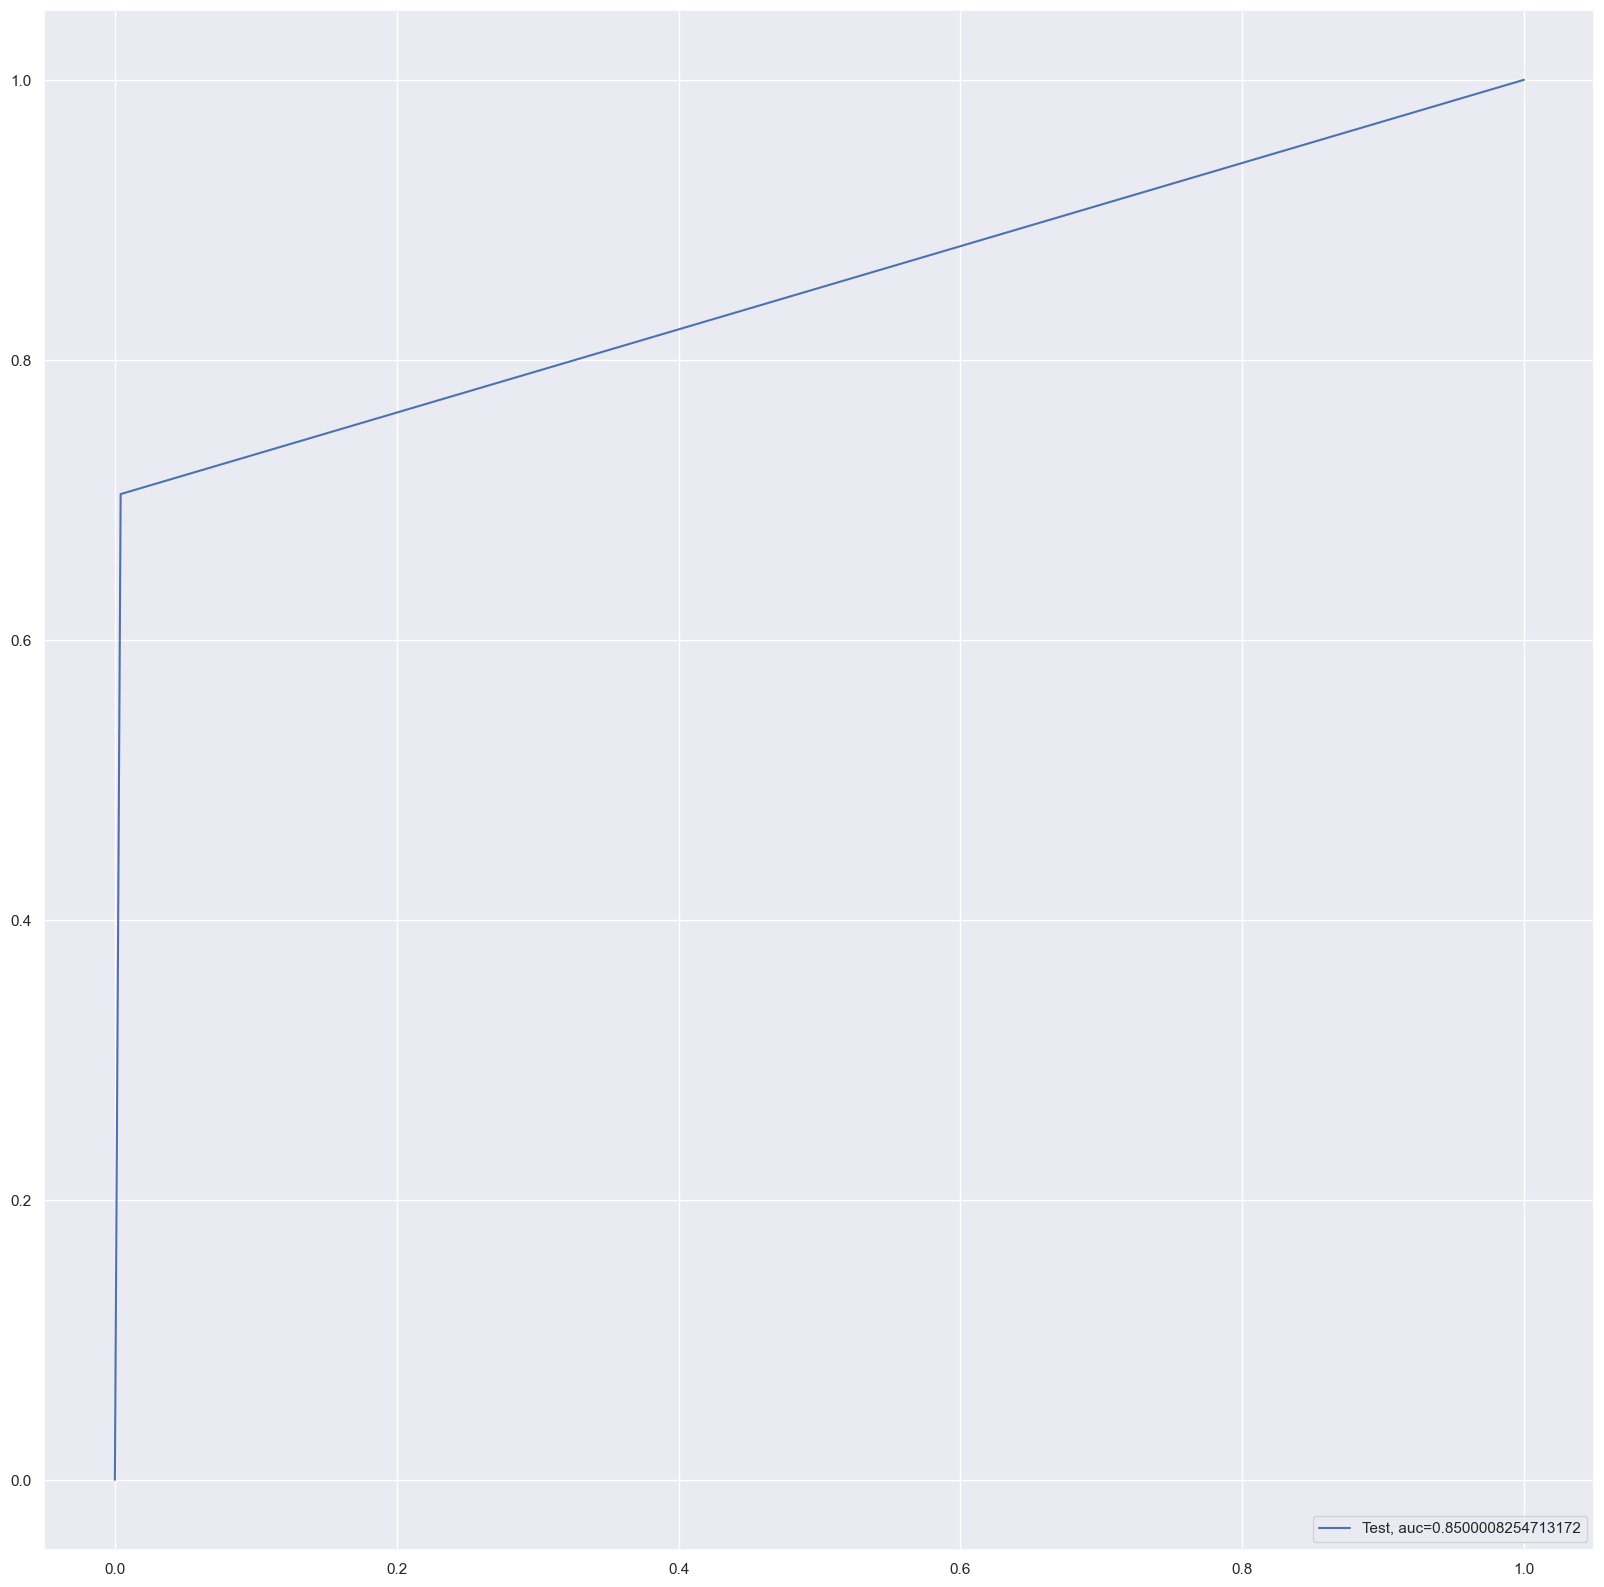

Time Taken by Model: --- 137.13886332511902 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


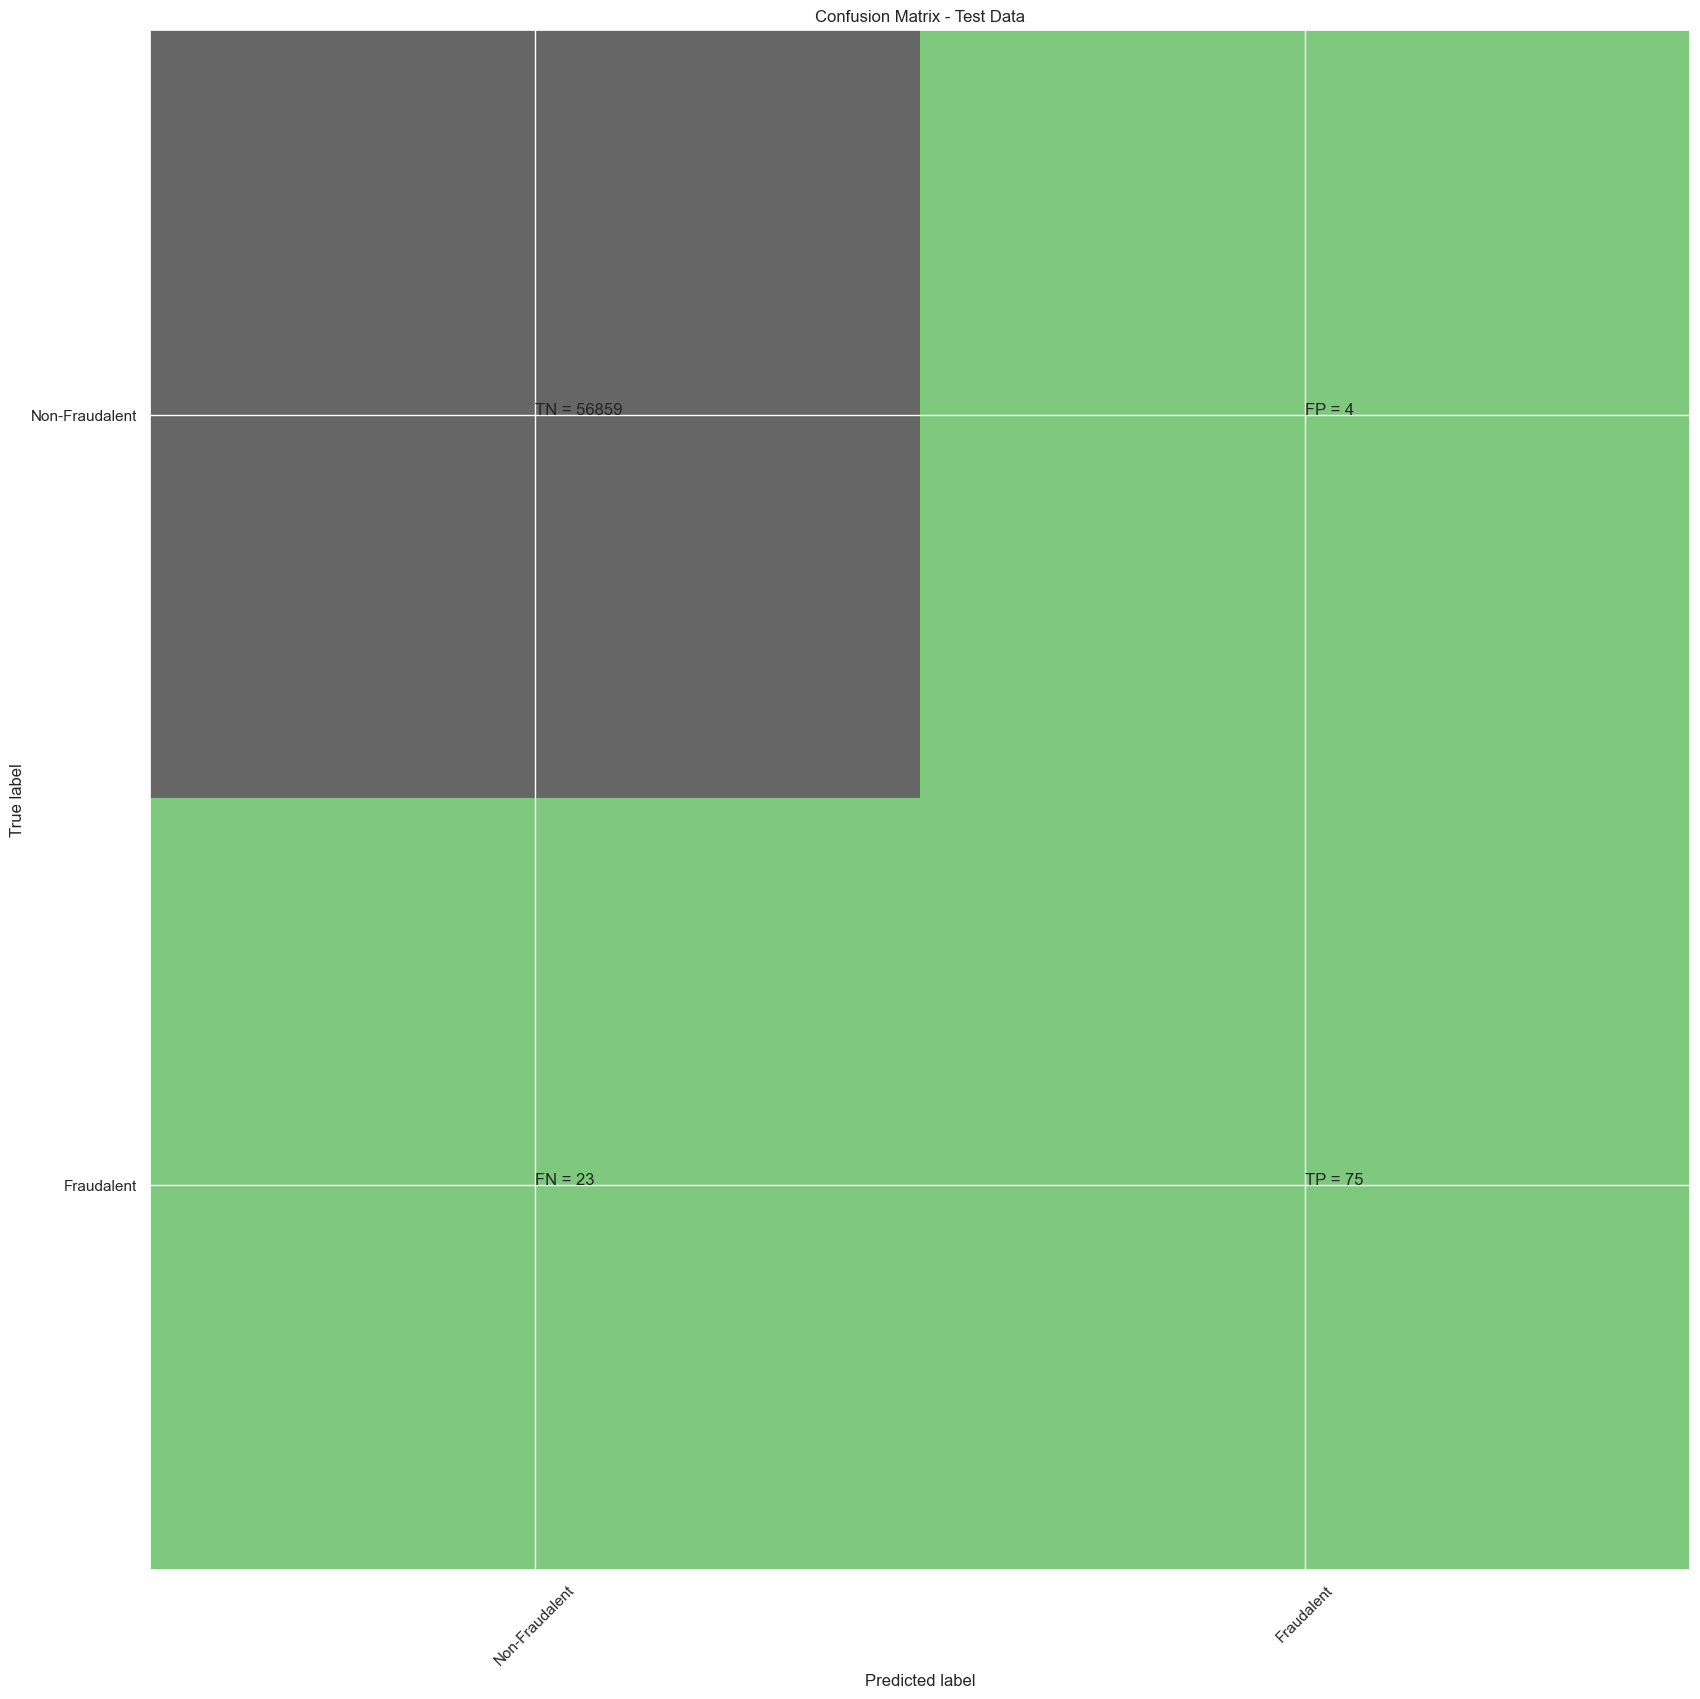

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


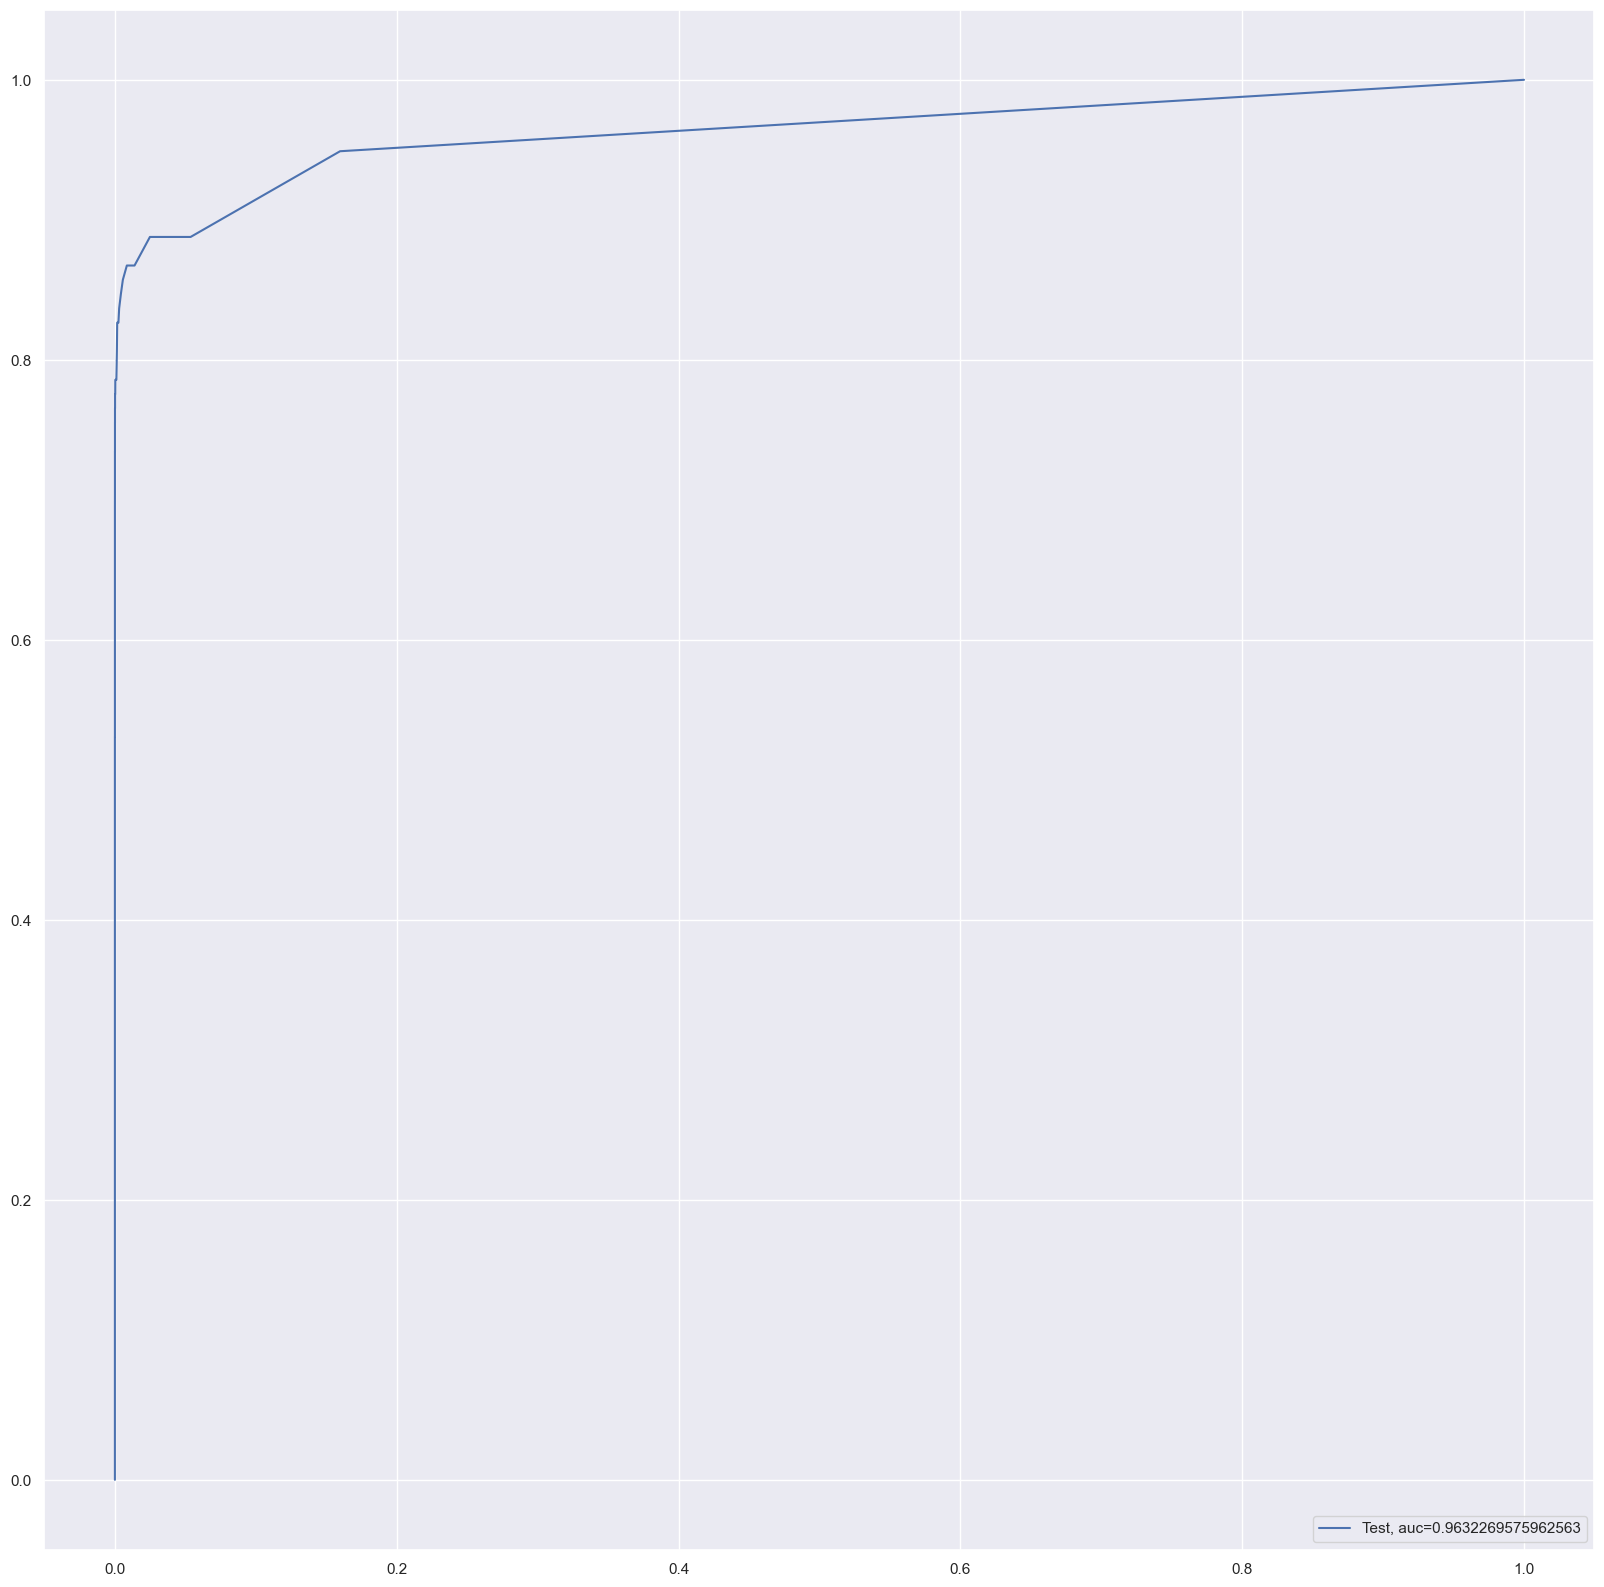

Time Taken by Model: --- 692.0286648273468 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999350432752234
Confusion Matrix


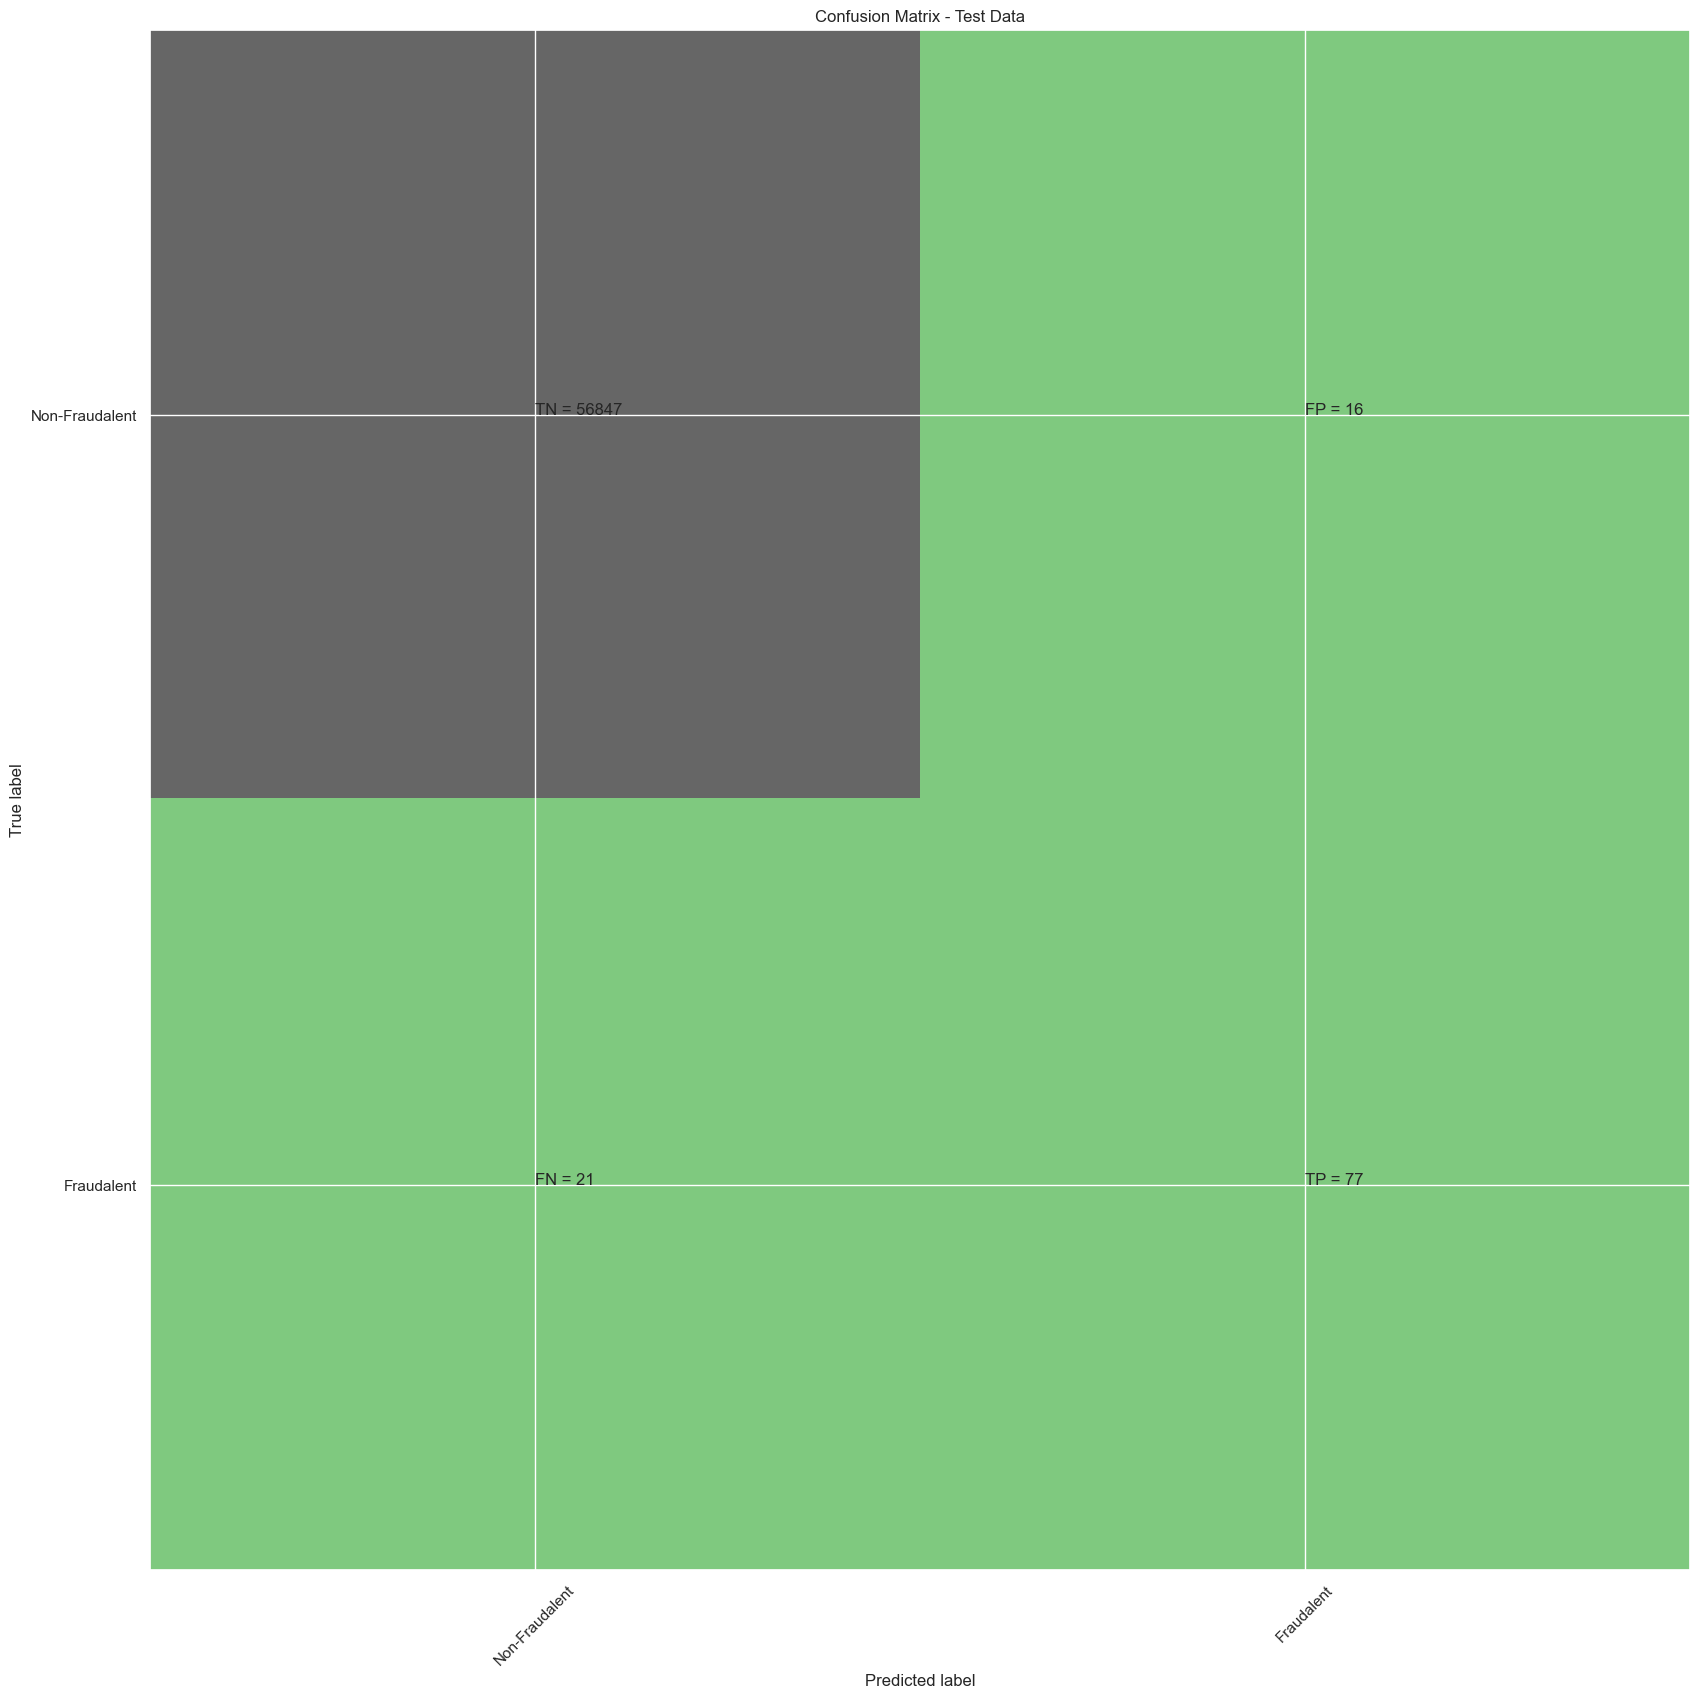

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9696561230052754
XGBoost threshold: 0.00012316476204432547
ROC for the test dataset 97.0%


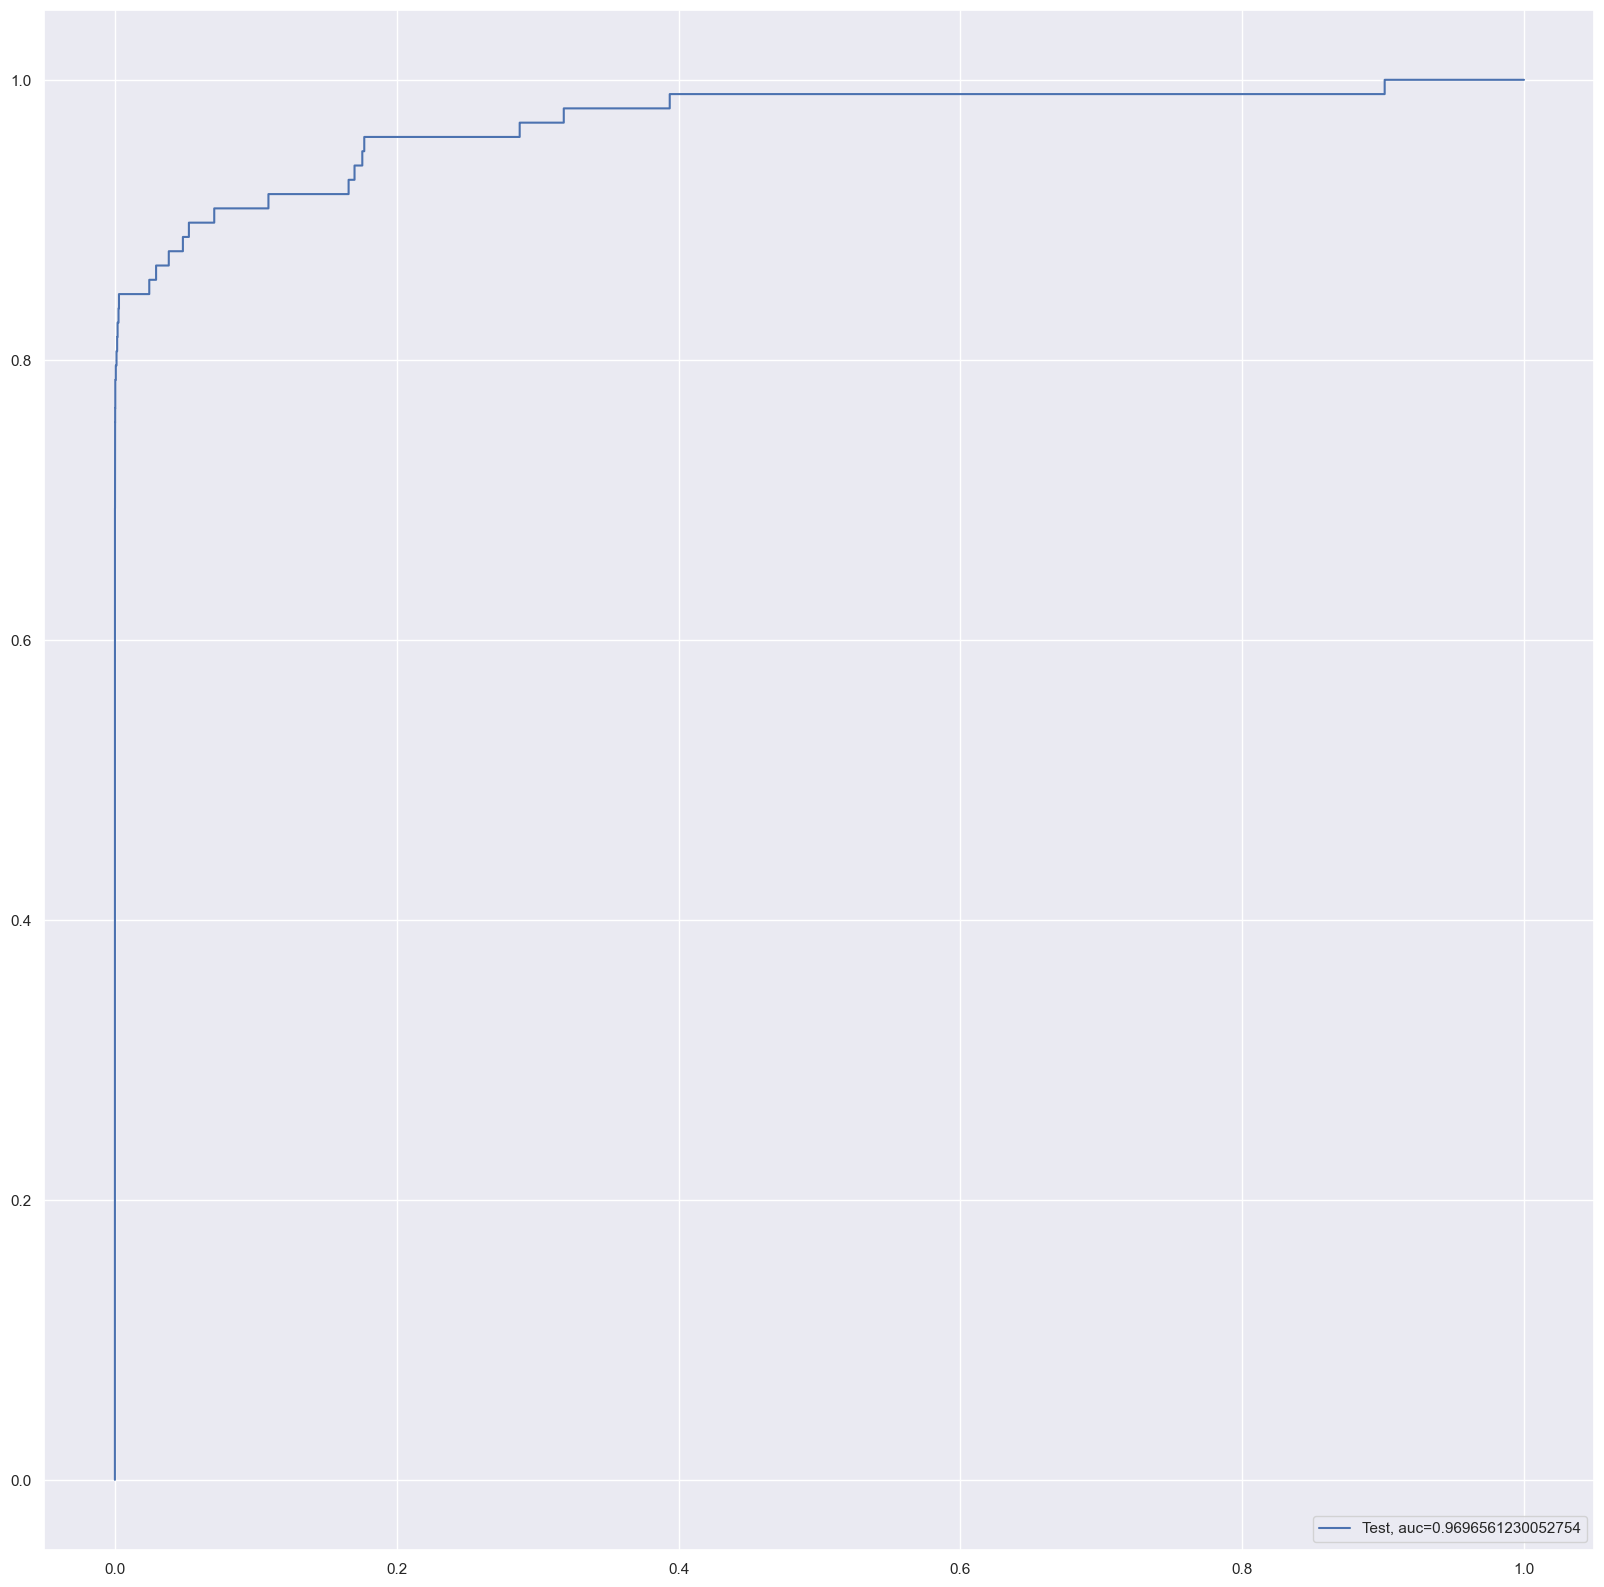

Time Taken by Model: --- 3.5527656078338623 seconds ---
--------------------------------------------------------------------------------


In [78]:
Data_Imbalance_Handling	 = "ADASYN Oversampling with StratifiedKFold CV "
# Running Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = BuildAndRunLogisticModel(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = BuildAndRunKNNModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = BuildAndRunTreeModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = BuildAndRunRandomForestModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = BuildAndRunXGBoostModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [79]:
df_Results

Data_Imbalance_Handling  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    
46  ADASYN Oversampling with StratifiedKFold CV    
47  ADASYN Oversampling with StratifiedKFold CV    
48  ADASYN Oversampling with StratifiedKFold CV    
49  ADASYN Oversampling with StratifiedKFold CV    
50  ADASYN Oversampling with StratifiedKFold CV    
51  ADASYN Oversampling with StratifiedKFold CV    
52  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998999   0.968540   0.001560  
1   Logistic Regression with L1 Regularisation  0.998982   0.965627   0.001329  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                      XGBoost  0.999298   0.927759   0.000028  
7                                          SVM  0.998560   0.891340   0.000904  
8   Logistic Regression with L2 Regularisation  0.999122   0.992566   0.002032  
9   Logistic Regression with L1 Regularisation  0.999175   0.983179   0.003335  
10                                         KNN  0.999210   0.895014   0.200000  
11               Tree Model with gini criteria  0.999245   0.909313   1.000000  
12            Tree Model with entropy criteria  0.999034   0.885442   1.000000  
13                               Random Forest  0.999579   0.955608   0.010000  
1

#### **_Results for ADASYN Oversampling:_**

- Based on the `Accuracy and ROC values`, `XGBoost` has delivered the `best results` when using the `ADASYN oversampling technique`.

#### **_Conclusion After Running Models on Oversampled Data:_**

- Based on the results, the `XGBOOST model` with `Random Oversampling and StratifiedKFold` Cross-Validation has delivered the `best performance`. Therefore, it is worthwhile to tune the hyperparameters of this model to achieve optimal results.

- However, it is important to note that the `Logistic Regression model` with `L2 Regularization` and `RepeatedKFold` Cross-Validation has yielded the `best results without any oversampling`.

---

### <code style="background:lightcyan;color:black">4.7 Fine-Tuning Model Hperparameters to Address Class Imbalance</code>

In [80]:
# Evaluating XGboost model
from xgboost import XGBClassifier

# Fitting model on training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

# Model accuracy
XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for the positive class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculating roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.9796544648846297
XGBoost threshold: 3.977149026468396e-05


In [81]:
# Let's tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
              param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5) 
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 3.66686468,  6.73455381,  6.7250689 ,  8.11076999,  8.04217868,
          8.13609009,  9.81242151,  9.62439017,  9.65663633, 10.69288864,
         10.33689308, 10.06213069]),
  'std_fit_time': array([1.59243869, 0.06538296, 0.04350531, 0.03211137, 0.08934956,
         0.02375553, 0.12000263, 0.16871266, 0.08501041, 0.20418888,
         0.18609013, 0.18689765]),
  'mean_score_time': array([0.01283736, 0.00743184, 0.0062593 , 0.00717478, 0.00710449,
         0.00792294, 0.00622058, 0.00761633, 0.00853672, 0.00759735,
         0.00827503, 0.00835547]),
  'std_score_time': array([0.0054588 , 0.00233091, 0.00232435, 0.00274222, 0.00153066,
         0.00184569, 0.00380619, 0.00167926, 0.00133818, 0.00179508,
         0.00123335, 0.00143002]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value=99

In [82]:
# Let's tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
              param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5) 
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([5.0857338 , 5.80252295, 6.47022018, 7.32190948, 8.08126497]),
  'std_fit_time': array([0.03860351, 0.0629102 , 0.07197351, 0.10250561, 0.26470114]),
  'mean_score_time': array([0.00618105, 0.00756497, 0.0068234 , 0.00851169, 0.0080658 ]),
  'std_score_time': array([0.00384837, 0.0022639 , 0.00146971, 0.00184295, 0.00312661]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': array([nan, nan, nan, nan, nan]),
  'std_test_sc

In [83]:
# Define the parameter grid to find the best parameters for {'max_depth': ? , 'min_child_weight': ? , 'n_estimators': ? }
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5) # Removed iid=False
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([6.3534627 , 6.6277514 , 6.94179125, 5.94725246, 6.17349539,
         6.79879465, 6.1784337 , 6.51909728, 6.84674807, 7.02586942,
         7.31252718, 7.58147507, 6.87116814, 7.21977615, 7.54596272,
         6.8465991 , 7.19991965, 7.48290071, 7.60900707, 7.95345283,
         8.46616921, 7.57858372, 8.01796899, 8.46557803, 7.50391512,
         8.00922794, 8.34444633]),
  'std_fit_time': array([0.04665071, 0.04027882, 0.05270135, 0.22455213, 0.15444421,
         0.03997272, 0.08535763, 0.10263877, 0.09090164, 0.04699934,
         0.08485445, 0.08859639, 0.02671494, 0.08454038, 0.06853931,
         0.06715858, 0.11567844, 0.05094924, 0.06424649, 0.05956396,
         0.13035409, 0.08231026, 0.05810512, 0.07653714, 0.07555331,
         0.11724071, 0.05642675]),
  'mean_score_time': array([0.00756001, 0.00516858, 0.00662766, 0.00603895, 0.00820055,
         0.00566025, 0.00645156, 0.00540795, 0.0039505 , 0.0070437 ,
         0.00414724, 0.00757828, 0.00877986, 0.005

In [84]:
# With 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 110 parameters tuned above, we will now check for learning rate

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
              param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([8.67989016, 8.82757297, 9.2584415 , 8.81983962, 8.75377173]),
  'std_fit_time': array([0.07642785, 0.21115941, 0.43394724, 0.11504359, 0.30441938]),
  'mean_score_time': array([0.00658607, 0.00615988, 0.00811195, 0.00637331, 0.00909786]),
  'std_score_time': array([0.00256696, 0.0035359 , 0.00106012, 0.00237866, 0.00186935]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': array([nan, nan, nan, nan, nan]

In [85]:
# With 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 110 tuned above parameters tuned above, let's now check for gamma

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
              param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([8.53296199, 8.89767237, 8.84148183, 8.74655862, 8.49463468]),
  'std_fit_time': array([0.16579636, 0.0368003 , 0.2471655 , 0.07460487, 0.24370547]),
  'mean_score_time': array([0.00578012, 0.00480142, 0.00651398, 0.00830035, 0.00643358]),
  'std_score_time': array([0.00330045, 0.00246552, 0.00341089, 0.00118819, 0.00334441]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': array([nan, nan, nan, nan, nan]),
  'std_test_score': array([nan, nan, nan, nan, nan]),

In [86]:
# Evaluate XGboost model by taking the tuned parameters
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np # Import numpy for nan handling
import pandas as pd # Import pandas for DataFrame operations

# fit model on training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=4, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

# Handle potential missing values in X_test before predicting
# We'll fill with the median of the original X data for consistency
# Alternatively, you could use the median from X_train_pt_df if using the scaled data
for col in X_test.columns:
    if X_test[col].isnull().any():
        median_val = X[col].median() # Use median from original X
        X_test[col].fillna(median_val, inplace=True)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993679886237953
XGboost roc_value: 0.9812076071129786
XGBoost threshold: 0.003549796063452959


---

### <code style="background:#fff4e6;color:black">Refining Tuned Parameters and Optimizing Learning Rate</code>

#### `Parameters Tuned:`
With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130, and gamma: 0.1 set, we will now focus on optimizing the learning rate.

#### `Further Tuning:`
We will narrow down the parameters 'max_depth', 'min_child_weight', and 'n_estimators' for the XGBoost model.

#### `Optimizing n_estimators:`
Next, we will fine-tune the n_estimators parameter for the XGBoost model.

In [87]:
# With 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 110 , gamma: 0.0 parameters tuned above we will now check for other parameters

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5) # Removed iid=False as it's deprecated and removed
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([11.43139076, 11.34036164, 11.26946998, 11.33582659, 11.15664573,
         11.17719755, 11.55087686, 11.49890366, 11.25665188]),
  'std_fit_time': array([0.05572093, 0.12786134, 0.08631657, 0.1040842 , 0.08557979,
         0.04789858, 0.09415769, 0.02145323, 0.27458978]),
  'mean_score_time': array([0.00609798, 0.0066781 , 0.00589924, 0.00716534, 0.00970078,
         0.00805759, 0.004913  , 0.00779653, 0.00894046]),
  'std_score_time': array([0.00206937, 0.00213355, 0.00365272, 0.00229887, 0.00141021,
         0.00093975, 0.00279661, 0.00148659, 0.000861  ]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value=1e+20),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                   

In [88]:
# Evaluating XGboost model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np # Importing numpy for nan handling
import pandas as pd # Importing pandas for DataFrame operations

# fitting model on training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=np.nan, n_estimators=110, n_jobs=1, # Changed missing=None to missing=np.nan
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
XGBmodel.fit(X_over, y_over)

# Handling potential missing values in X_test before predicting
# This part of the code is already correct, but ensure it's applied to X_test before scoring
for col in X_test.columns:
    if X_test[col].isnull().any():
        median_val = X[col].median() # Use median from original X
        X_test[col].fillna(median_val, inplace=True)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculating roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993153210091115
XGboost roc_value: 0.9846976460070337
XGBoost threshold: 0.005552986171096563


**_Adjusting Parameters Based on ROC Performance_**

Due to a drop in the ROC value, we will disregard the new values of 'colsample_bytree': 0.7 and 'subsample': 0.7

---

In [89]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=np.nan, n_estimators=110, n_jobs=1, # Changed missing=None to missing=np.nan
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993679886237953
XGboost roc_value: 0.9812076071129786
XGBoost threshold: 0.003549796063452959


#### Displaying Important Features of the Best Model for Dataset Understanding

Top feature index: 14
2nd top feature index: 10
3rd top feature index: 4


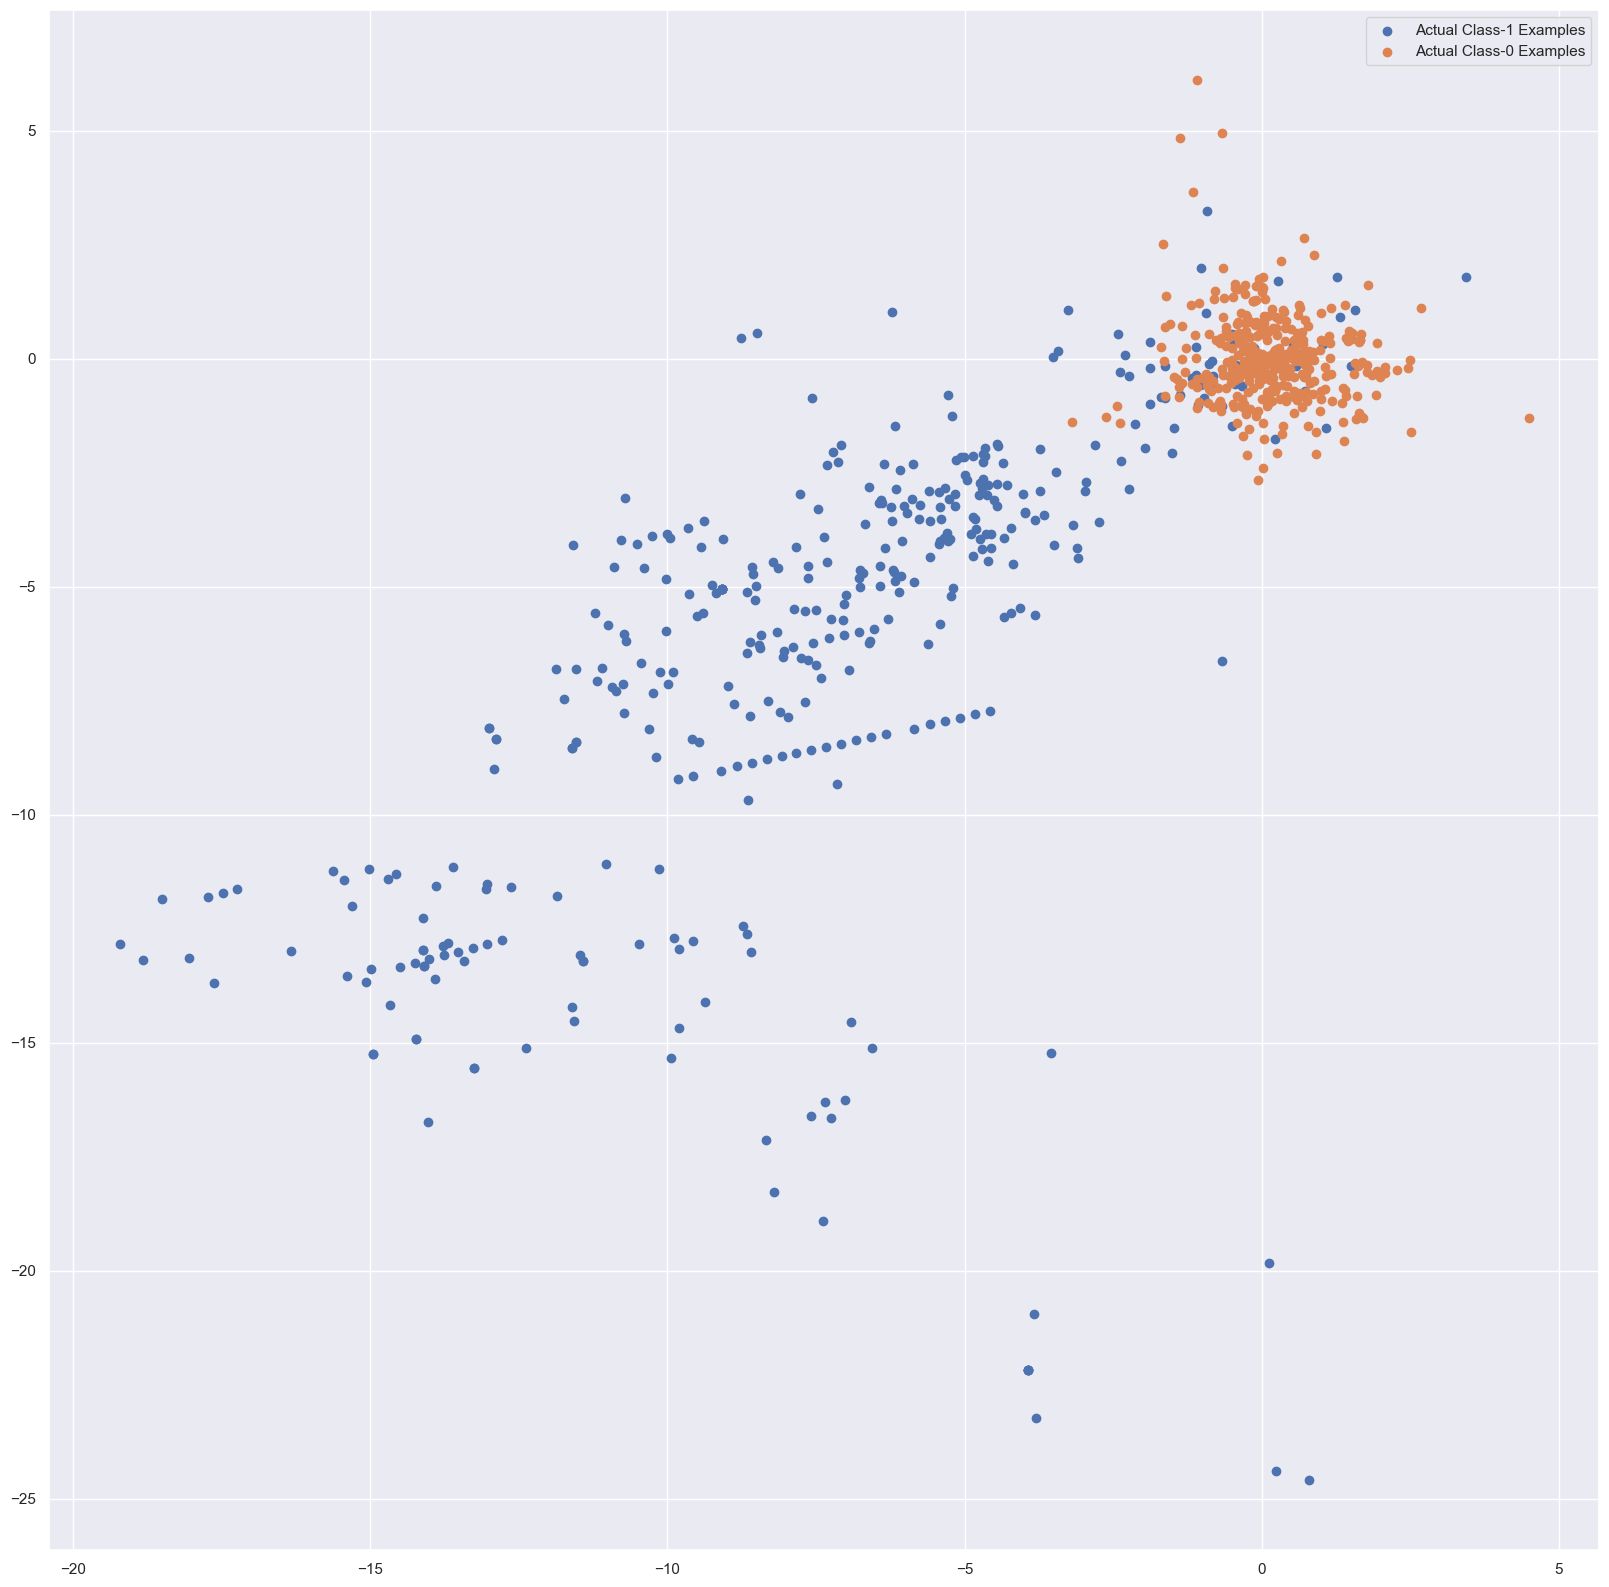

In [90]:
# Extract feature importances
feature_importances = clf.feature_importances_

# Get indices of top 3 features
top_indices = np.argsort(feature_importances)[-3:][::-1]

# Print top features
print(f'Top feature index: {top_indices[0] + 1}')
print(f'2nd top feature index: {top_indices[1] + 1}')
print(f'3rd top feature index: {top_indices[2] + 1}')

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = top_indices[0]
second_top_var_index = top_indices[1]

# Convert X_train to numpy array if not already
X_train_np = X_train.to_numpy()

# Separate class 1 and class 0 examples
X_train_1 = X_train_np[y_train == 1.0]
X_train_0 = X_train_np[y_train == 0.0]

# Shuffle class 0 examples
np.random.shuffle(X_train_0)

# Plotting
plt.figure(figsize=(20, 20))
plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [91]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9812076071129786
XGBoost threshold: 0.003549796063452959


---

## <code style="background:lightgrey;color:black">Conclusion:</code> 

### <code style="background:lightcyan;color:black">Model Selection Summary</code>

After `thorough evaluation` of `various models` on `oversampled data`, the `XGBoost model` utilizing `Random Oversampling and StratifiedKFold Cross-Validation` emerged as the `top performer`. </br>


#### <code style="background:#fff4e6;color:black">Performance Metrics:</code>
- `Model Accuracy:` 0.9993
- `XGBoost ROC Value:` 0.9812
- `Optimal XGBoost Threshold:` 0.0035


### <code style="background:lightcyan;color:black">Insights:</code>
Upon reviewing the results, it's evident that `Logistic Regression with L2 Regularization` and `RepeatedKFold Cross-Validation` achieved `superior performance without employing any oversampling techniques`.

Based on these findings, `we have selected the XGBoost model with Random Oversampling` and `StratifiedKFold CV` for further refinement through `hyperparameter tuning to maximize its predictive capability`.